In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, plot_biedge_counts, 
                                compare_graphs_diff, compare_graphs_diff_normalized, compare_graphs_diff_percent)

import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def draw_all_graphs(dictionary, n_instances):
    for elem in dictionary.values():
        fig = plt.figure()
        ax = fig.add_subplot()
        sns.heatmap(np.tril(elem)/ n_instances,ax = ax, annot = True, cmap = 'Reds')

In [4]:
a = pickle.load(open(Path("data/bcounts/column/seed_0/bcounts.pkl"),'rb'))
b0 = pickle.load(open(Path("data/bcounts/adjusted/seed_0/bcounts.pkl"),'rb'))
b1 = pickle.load(open(Path("data/bcounts/adjusted/seed_1/bcounts.pkl"),'rb'))
b2 = pickle.load(open(Path("data/bcounts/adjusted/seed_2/bcounts.pkl"),'rb'))
c0 = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/bcounts.pkl"),'rb'))
c1 = pickle.load(open(Path("data/bcounts/bshuffled/seed_1/bcounts.pkl"), 'rb'))
c2 = pickle.load(open(Path("data/bcounts/bshuffled/seed_2/bcounts.pkl"), 'rb'))
d0 = pickle.load(open(Path("data/bcounts/underlying_1/seed_0/bcounts.pkl"),'rb'))
d1 = pickle.load(open(Path("data/bcounts/underlying_1/seed_1/bcounts.pkl"),'rb'))
d2 = pickle.load(open(Path("data/bcounts/underlying_1/seed_2/bcounts.pkl"),'rb'))

In [5]:
amax = pickle.load(open(Path("data/bcounts/column/seed_0/mbcounts.pkl"),'rb'))
bmax = pickle.load(open(Path("data/bcounts/adjusted/seed_0/mbcounts.pkl"),'rb'))
cmax = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/mbcounts.pkl"),'rb'))
dmax = pickle.load(open(Path("data/bcounts/underlying/seed_0/mbcounts.pkl"),'rb'))
amax[6] = a[6]
bmax[4] = b0[4]
cmax[6] = c0[6]
dmax[7] = d0[7]

In [6]:
def get_position(row, col, dictionary_list, normalized = False):
    if normalized:
        return [m[row][col]/m[0][1] for m in dictionary_list.values()]
    else:
        return [m[row][col] for m in a.values()]

In [7]:
def extract_normalized_edges_pos(dictionary):
    edges_01 = [m[1][0]/m[0][1] for m in dictionary.values()]
    edges_last = [m[-1][-2]/m[0][1] for m in dictionary.values()]
    edges_0n = [m[-1][0]/m[0][1] for m in dictionary.values()]
    return edges_01, edges_last, edges_0n

def extract_percent_edges_pos(dictionary):
    edges_01 = [m[1][0]/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_last = [m[-1][-2]/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_0n = [m[-1][0]/np.sum(np.tril(m)) for m in dictionary.values()]
    return edges_01, edges_last, edges_0n

def extract_edges_pos(dictionary):
    edges_01 = [m[1][0] for m in dictionary.values()]
    edges_last = [m[-1][-2] for m in dictionary.values()]
    edges_0n = [m[-1][0] for m in dictionary.values()]
    return edges_01, edges_last, edges_0n

def cumul_edges_pos(dictionary):
    edges_spine = [np.sum(np.diag(m,-1))/m[0][1] for m in dictionary.values()]
    edges_other = [np.sum(np.tril(m,-2))/m[0][1] for m in dictionary.values()]
    edges_ratio = [np.sum(np.diag(m,-1))/np.sum(np.tril(m,-2)) for m in dictionary.values()]
    return edges_spine, edges_other, edges_ratio

def group_edges_pos(dictionary):
    edges_g1 = [np.sum(np.diag(m,-2))/m[0][1] for m in dictionary.values()]
    edges_g2 = [(m[1][0] + m[-1][0] + m[-1][-2])/m[0][1] for m in dictionary.values()]
    edges_g3 = [np.sum(np.tril(m, -m.shape[0]+2))/m[0][1] for m in dictionary.values()]
    return edges_g1, edges_g2, edges_g3

def group_edges_pos_percent(dictionary):
    edges_g1 = [np.sum(np.diag(m,-2))/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_g2 = [(m[1][0] + m[-1][0] + m[-1][-2])/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_g3 = [np.sum(np.tril(m, -m.shape[0]+2))/np.sum(np.tril(m)) for m in dictionary.values()]
    return edges_g1, edges_g2, edges_g3

In [8]:
def get_position_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_01, edges_last, edges_0n = extract_normalized_edges_pos(bcounts_dictionary)
            for i, elem in enumerate(edges_01):
                bcounts.append([elem, i+1, '01', name])
            for i, elem in enumerate(edges_last):
                bcounts.append([elem, i+1, 'nn-1', name])
            for i, elem in enumerate(edges_0n):
                bcounts.append([elem, i+1, '0n', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [9]:
def get_cumul_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_spine, edges_other, edges_ratio = cumul_edges_pos(bcounts_dictionary)
            for i, elem in enumerate(edges_spine):
                bcounts.append([elem, i+1, 'spine', name])
            for i, elem in enumerate(edges_other):
                bcounts.append([elem, i+1, 'other', name])
            for i, elem in enumerate(edges_ratio):
                bcounts.append([elem, i+1, 'ratio', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [10]:
def get_group_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_g1, edges_g2, edges_g3 = group_edges_pos(bcounts_dictionary)
            for i, elem in enumerate(edges_g1):
                bcounts.append([elem, i+1, 'Group 1', name])
            for i, elem in enumerate(edges_g2):
                bcounts.append([elem, i+1, 'Group 2', name])
            for i, elem in enumerate(edges_g3):
                bcounts.append([elem, i+1, 'Group 3', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [11]:
def get_percent_group_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_g1, edges_g2, edges_g3 = group_edges_pos_percent(bcounts_dictionary)
            for i, elem in enumerate(edges_g1):
                bcounts.append([elem, i+1, 'Group 1', name])
            for i, elem in enumerate(edges_g2):
                bcounts.append([elem, i+1, 'Group 2', name])
            for i, elem in enumerate(edges_g3):
                bcounts.append([elem, i+1, 'Group 3', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [12]:
underlying_folder_list = [Path(x) for x in ["data/bcounts/underlying_1", "data/bcounts/underlying_2", "data/bcounts/underlying_3"]]
bshuffled_folder_list = [Path("data/bcounts/bshuffled")]
column_folder_list = [Path("data/bcounts/column")]
udf = get_position_dataframe(underlying_folder_list, 'underlying')
bdf = get_position_dataframe(bshuffled_folder_list, 'bshuffled')
cdf = get_position_dataframe(column_folder_list, 'column')

<ipython-input-7-fb88fc6534d4>:2: RuntimeWarning: invalid value encountered in double_scalars
  edges_01 = [m[1][0]/m[0][1] for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:3: RuntimeWarning: invalid value encountered in double_scalars
  edges_last = [m[-1][-2]/m[0][1] for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:4: RuntimeWarning: invalid value encountered in double_scalars
  edges_0n = [m[-1][0]/m[0][1] for m in dictionary.values()]


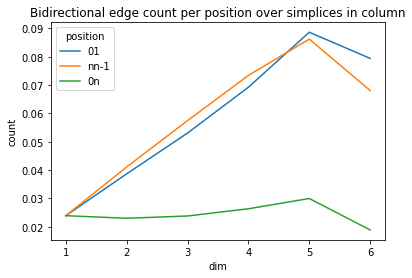

In [13]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = cdf, x = "dim", y = 'count', hue = 'position', ax = ax)
ax.set_title("Bidirectional edge count per position over simplices in column")
figure.savefig("counts_normalized_position_column")

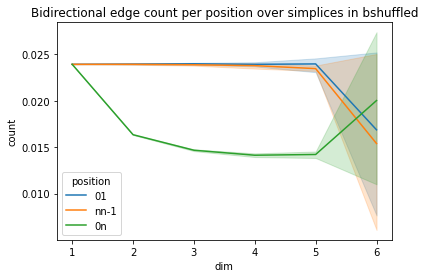

In [14]:
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = bdf, x = "dim", y = 'count', hue = 'position',  ax = ax)
ax.set_title("Bidirectional edge count per position over simplices in bshuffled")
figure.savefig("counts_normalized_position_bshuffled")

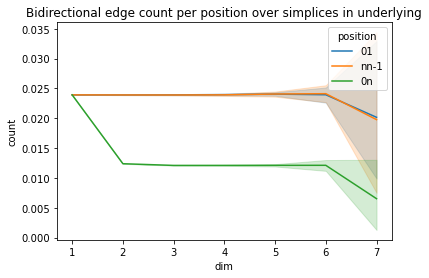

In [15]:
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = udf, x = "dim", y = 'count', hue = 'position', ax = ax)
ax.set_title("Bidirectional edge count per position over simplices in underlying")
figure.savefig("counts_normalized_position_underlying")

In [16]:
udf = get_cumul_dataframe(underlying_folder_list, 'underlying')
bdf = get_cumul_dataframe(bshuffled_folder_list, 'bshuffled')
cdf = get_cumul_dataframe(column_folder_list, 'column')

<ipython-input-7-fb88fc6534d4>:20: RuntimeWarning: invalid value encountered in double_scalars
  edges_spine = [np.sum(np.diag(m,-1))/m[0][1] for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:21: RuntimeWarning: invalid value encountered in double_scalars
  edges_other = [np.sum(np.tril(m,-2))/m[0][1] for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:22: RuntimeWarning: divide by zero encountered in double_scalars
  edges_ratio = [np.sum(np.diag(m,-1))/np.sum(np.tril(m,-2)) for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:22: RuntimeWarning: invalid value encountered in double_scalars
  edges_ratio = [np.sum(np.diag(m,-1))/np.sum(np.tril(m,-2)) for m in dictionary.values()]


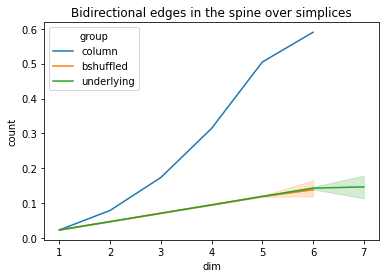

In [17]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'spine'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges in the spine over simplices')
figure.savefig("normalized_spine_count")

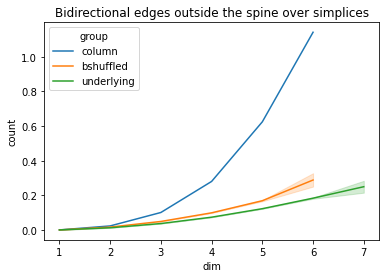

In [18]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'other'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges outside the spine over simplices')
figure.savefig("normalized_other_count")

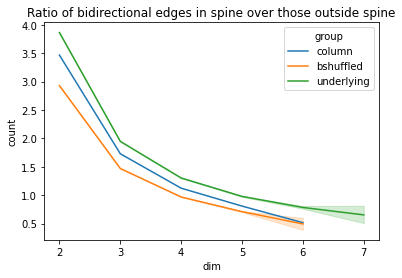

In [19]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'ratio'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Ratio of bidirectional edges in spine over those outside spine')
figure.savefig("normalized_ratio_count")

In [20]:
udf = get_group_dataframe(underlying_folder_list, 'underlying')
bdf = get_group_dataframe(bshuffled_folder_list, 'bshuffled')
cdf = get_group_dataframe(column_folder_list, 'column')

<ipython-input-7-fb88fc6534d4>:26: RuntimeWarning: invalid value encountered in double_scalars
  edges_g1 = [np.sum(np.diag(m,-2))/m[0][1] for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:27: RuntimeWarning: invalid value encountered in double_scalars
  edges_g2 = [(m[1][0] + m[-1][0] + m[-1][-2])/m[0][1] for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:28: RuntimeWarning: invalid value encountered in double_scalars
  edges_g3 = [np.sum(np.tril(m, -m.shape[0]+2))/m[0][1] for m in dictionary.values()]


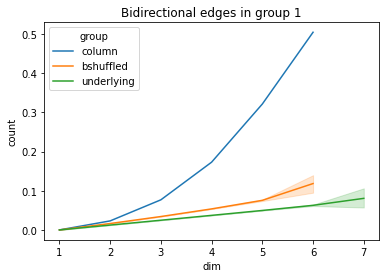

In [21]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'Group 1'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges in group 1')
figure.savefig("G1_normalized")

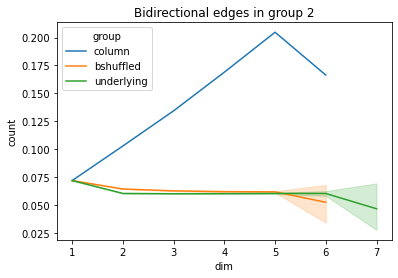

In [22]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'Group 2'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges in group 2')
figure.savefig("G2_normalized")

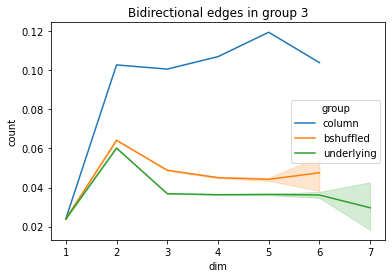

In [23]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'Group 3'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges in group 3')
figure.savefig("G3_normalized")

In [24]:
udf = get_percent_group_dataframe(underlying_folder_list, 'underlying')
bdf = get_percent_group_dataframe(bshuffled_folder_list, 'bshuffled')
cdf = get_percent_group_dataframe(column_folder_list, 'column')

<ipython-input-7-fb88fc6534d4>:32: RuntimeWarning: invalid value encountered in double_scalars
  edges_g1 = [np.sum(np.diag(m,-2))/np.sum(np.tril(m)) for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:33: RuntimeWarning: invalid value encountered in double_scalars
  edges_g2 = [(m[1][0] + m[-1][0] + m[-1][-2])/np.sum(np.tril(m)) for m in dictionary.values()]
<ipython-input-7-fb88fc6534d4>:34: RuntimeWarning: invalid value encountered in double_scalars
  edges_g3 = [np.sum(np.tril(m, -m.shape[0]+2))/np.sum(np.tril(m)) for m in dictionary.values()]


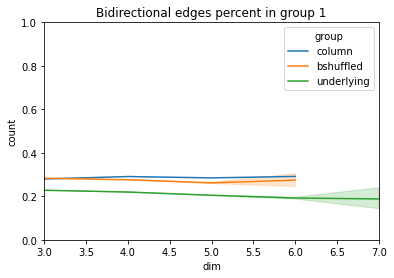

In [25]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'Group 1'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges percent in group 1')
ax.set_xlim([3,7])
ax.set_ylim([0,1])
figure.savefig("G1_percent")

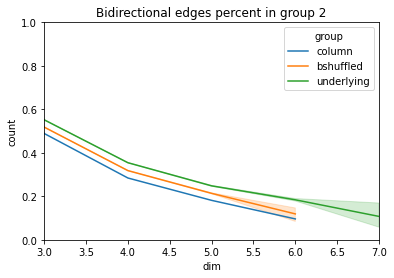

In [26]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'Group 2'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges percent in group 2')
ax.set_xlim([3,7])
ax.set_ylim([0,1])
figure.savefig("G2_percent")

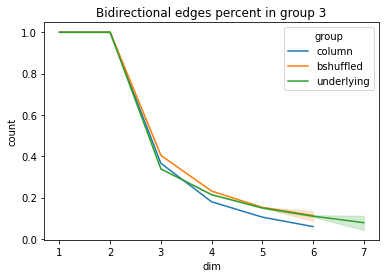

In [27]:
dataframe = pd.concat([cdf, bdf, udf])
figure = plt.figure()
ax = figure.add_subplot()
sns.lineplot(data = dataframe[dataframe['position'] == 'Group 3'], x = "dim", y = 'count', hue = 'group', ax = ax)
ax.set_title('Bidirectional edges percent in group 3')
figure.savefig("G3_percent")

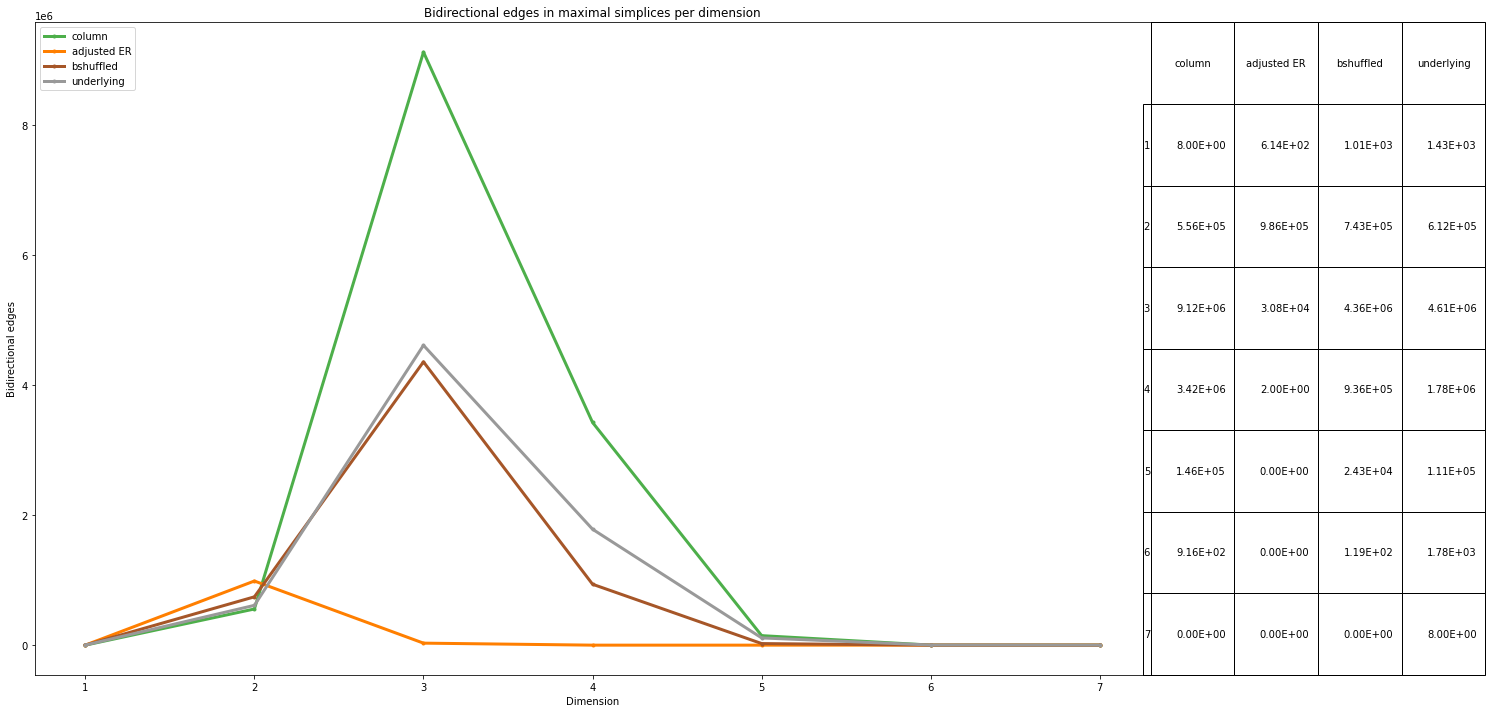

In [28]:
plot_biedge_counts([amax,bmax,cmax,dmax], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcount_few",
                  figtitle = "Bidirectional edges in maximal simplices per dimension")

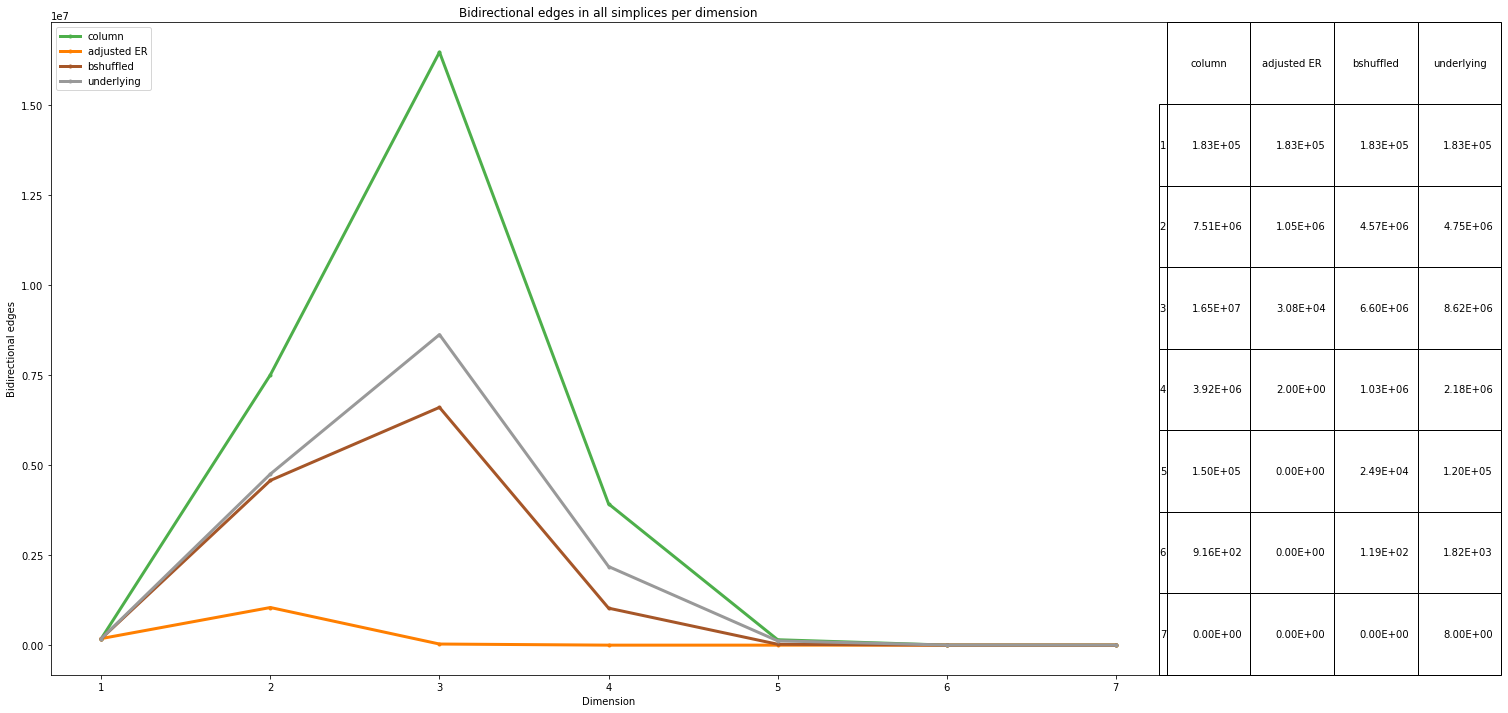

In [29]:
plot_biedge_counts([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bcount_few",
                  figtitle = "Bidirectional edges in all simplices per dimension")

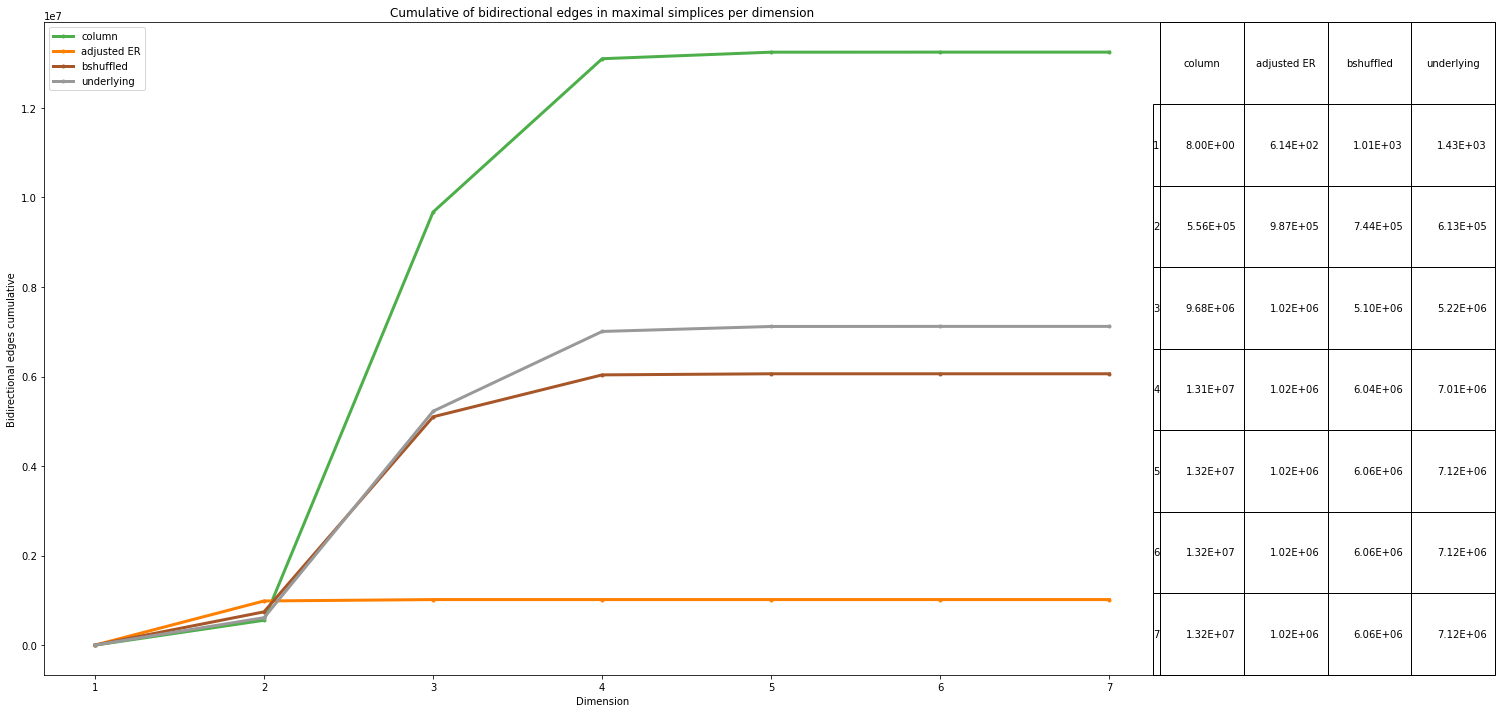

In [30]:
plot_biedge_cumulative([amax,bmax,cmax,dmax], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcumul_few",
                      figtitle = "Cumulative of bidirectional edges in maximal simplices per dimension")

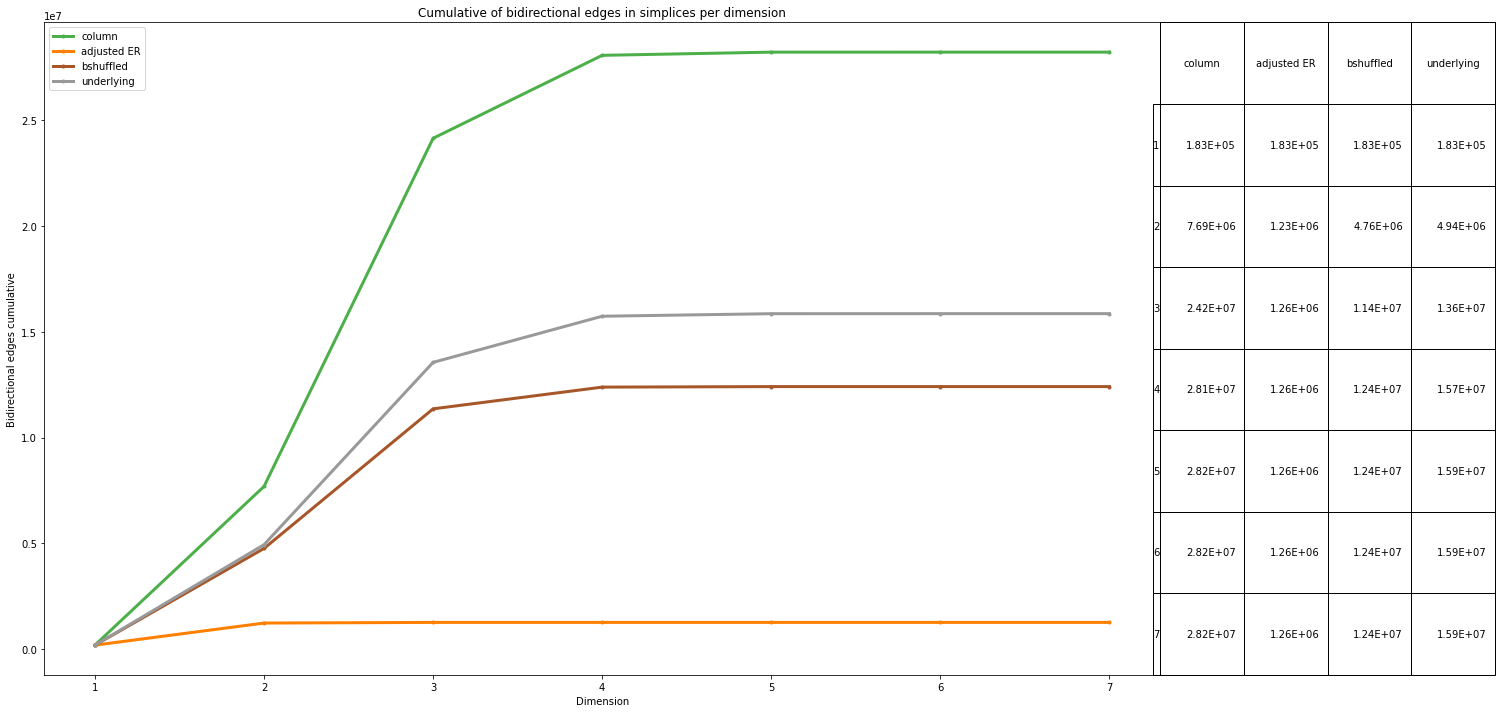

In [31]:
plot_biedge_cumulative([a,b0,c0,d0], 6, 3, ["column", "adjusted ER", "bshuffled", "underlying"], "bcumul_few",
                      figtitle = "Cumulative of bidirectional edges in simplices per dimension")

<ipython-input-32-43a5cf6623c2>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


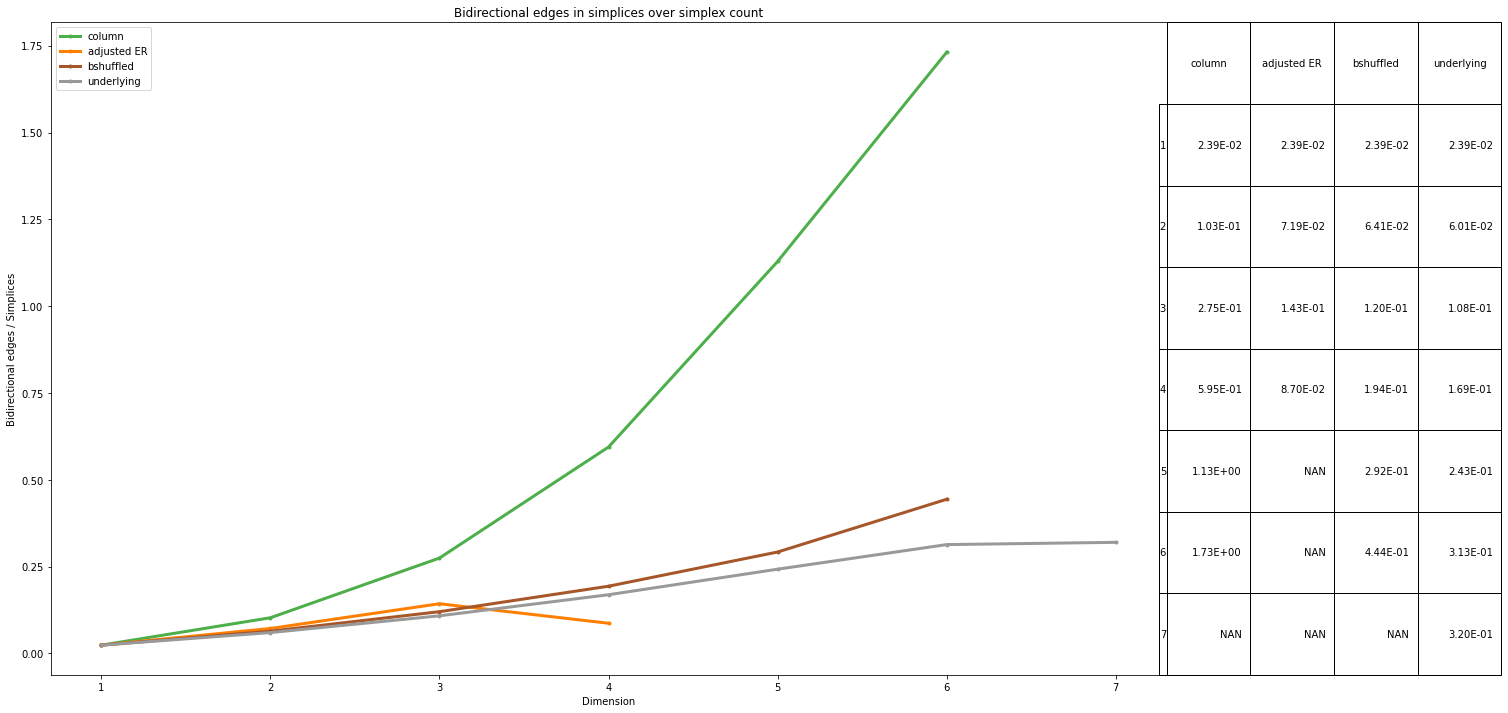

In [32]:
normalized_list = []
for x in [a, b0, c0, d0]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "adjusted ER", "bshuffled", "underlying"], "bcount_few_normalized",
                  ylabel = "Bidirectional edges / Simplices", 
                  figtitle = "Bidirectional edges in simplices over simplex count")

<ipython-input-33-c459484934c3>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


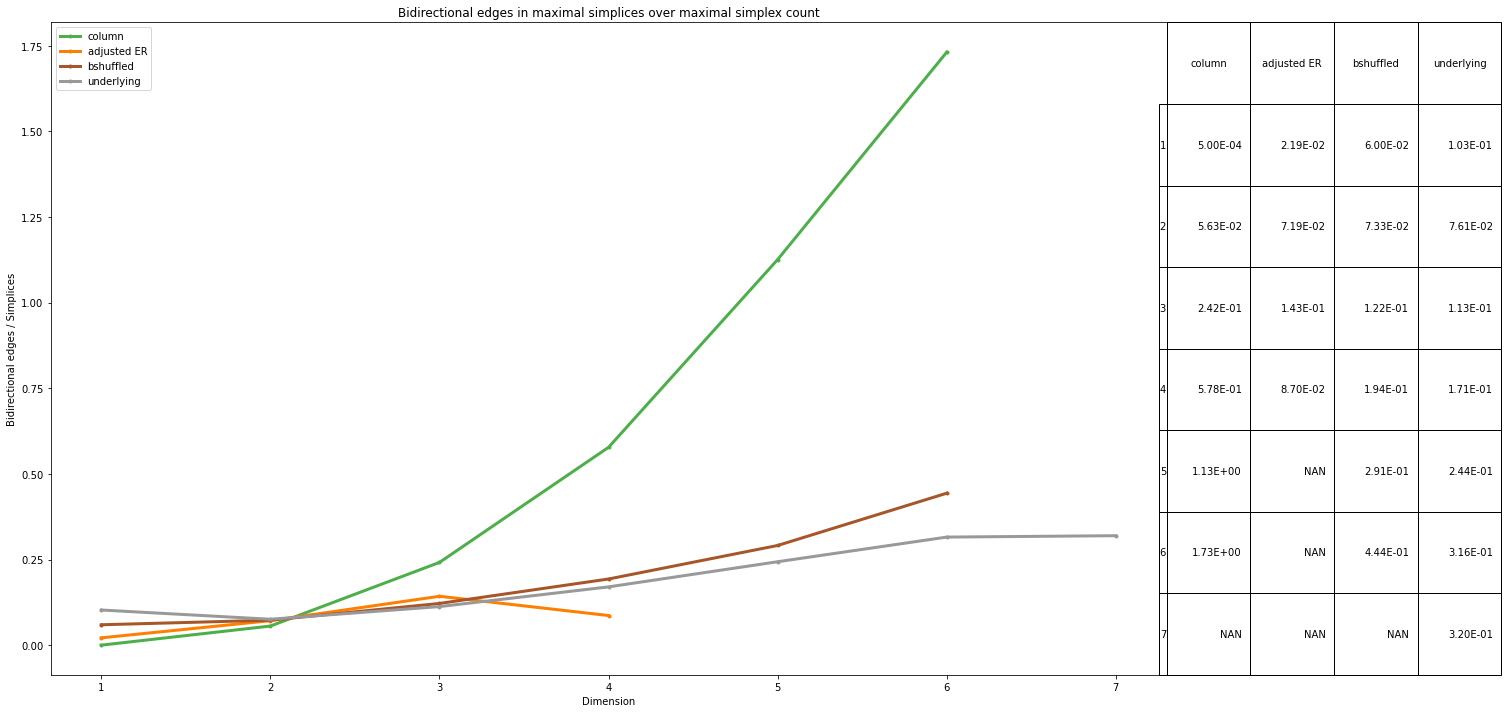

In [33]:
normalized_list = []
for x in [amax, bmax, cmax, dmax]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "adjusted ER", "bshuffled", "underlying"], "mbcount_few_normalized",
                  ylabel = "Bidirectional edges / Simplices", 
                  figtitle = "Bidirectional edges in maximal simplices over maximal simplex count")

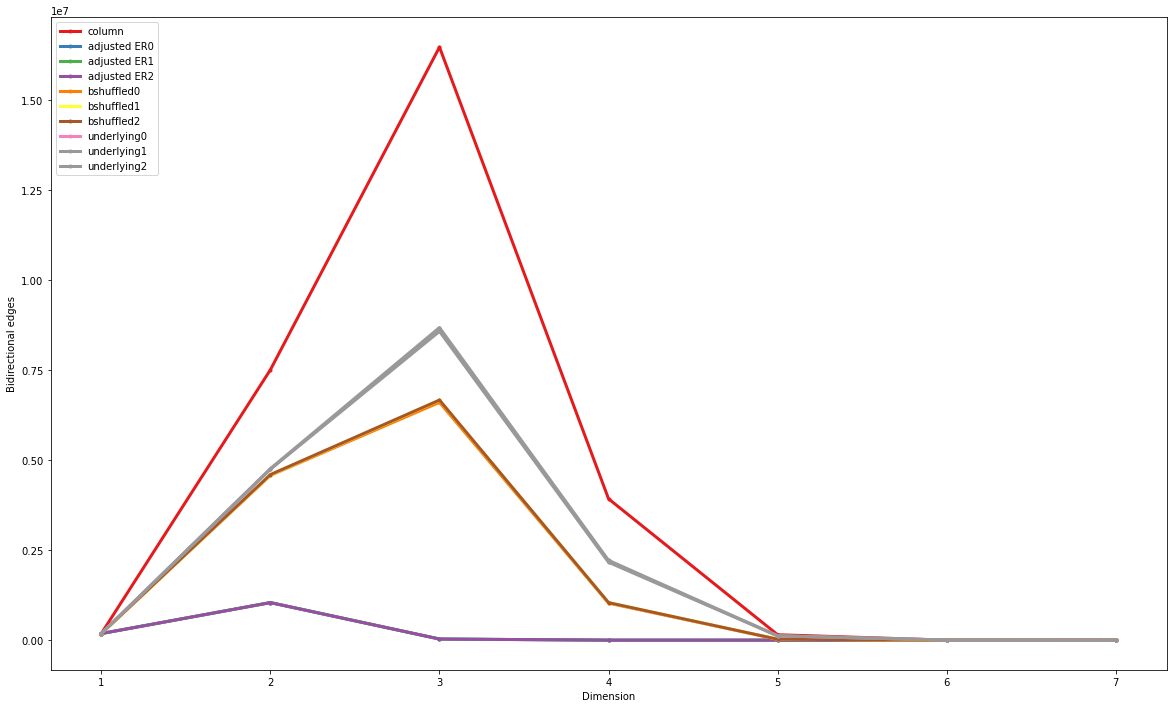

In [34]:
plot_biedge_counts([a,b0,b1,b2,c0,c1,c2,d0,d1,d2], 6, 7, 
                    ["column", "adjusted ER0", "adjusted ER1", "adjusted ER2",
                     "bshuffled0", "bshuffled1", "bshuffled2",
                     "underlying0", "underlying1", "underlying2"], "bcount_all", plot_table = False)

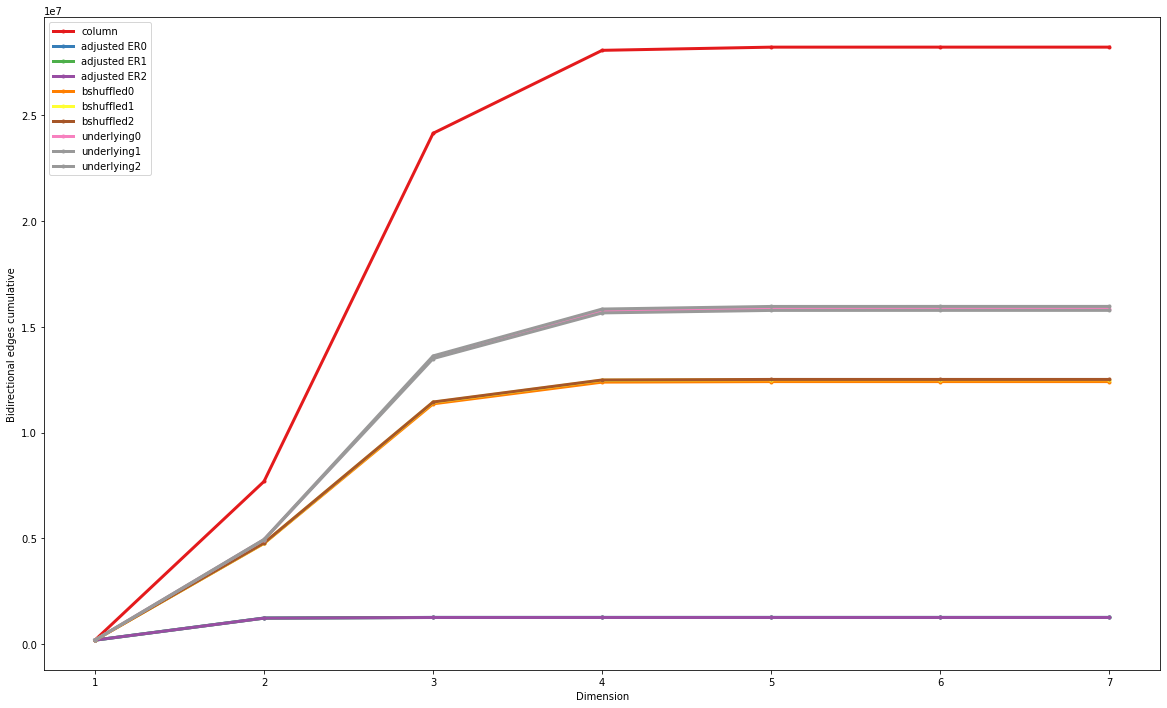

In [35]:
plot_biedge_cumulative([a,b0,b1,b2,c0,c1,c2,d0,d1,d2], 6, 7, 
                    ["column", "adjusted ER0", "adjusted ER1", "adjusted ER2",
                     "bshuffled0", "bshuffled1", "bshuffled2",
                     "underlying0", "underlying1", "underlying2"], "bcumul_all", plot_table = False)

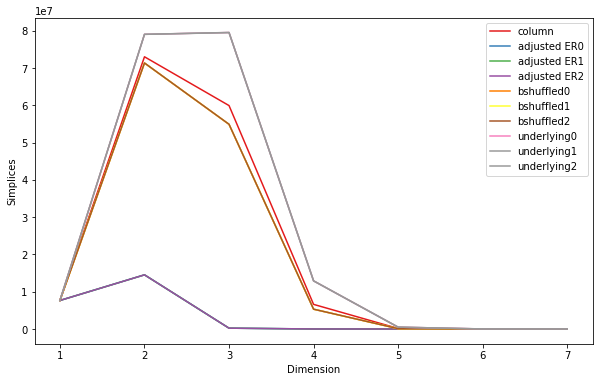

In [36]:
plot_simplex_counts([a,b0,b1,b2,c0,c1,c2,d0,d1,d2], 6, 7, 
                    ["column", "adjusted ER0", "adjusted ER1", "adjusted ER2",
                     "bshuffled0", "bshuffled1", "bshuffled2",
                     "underlying0", "underlying1", "underlying2"], "simplex_count")

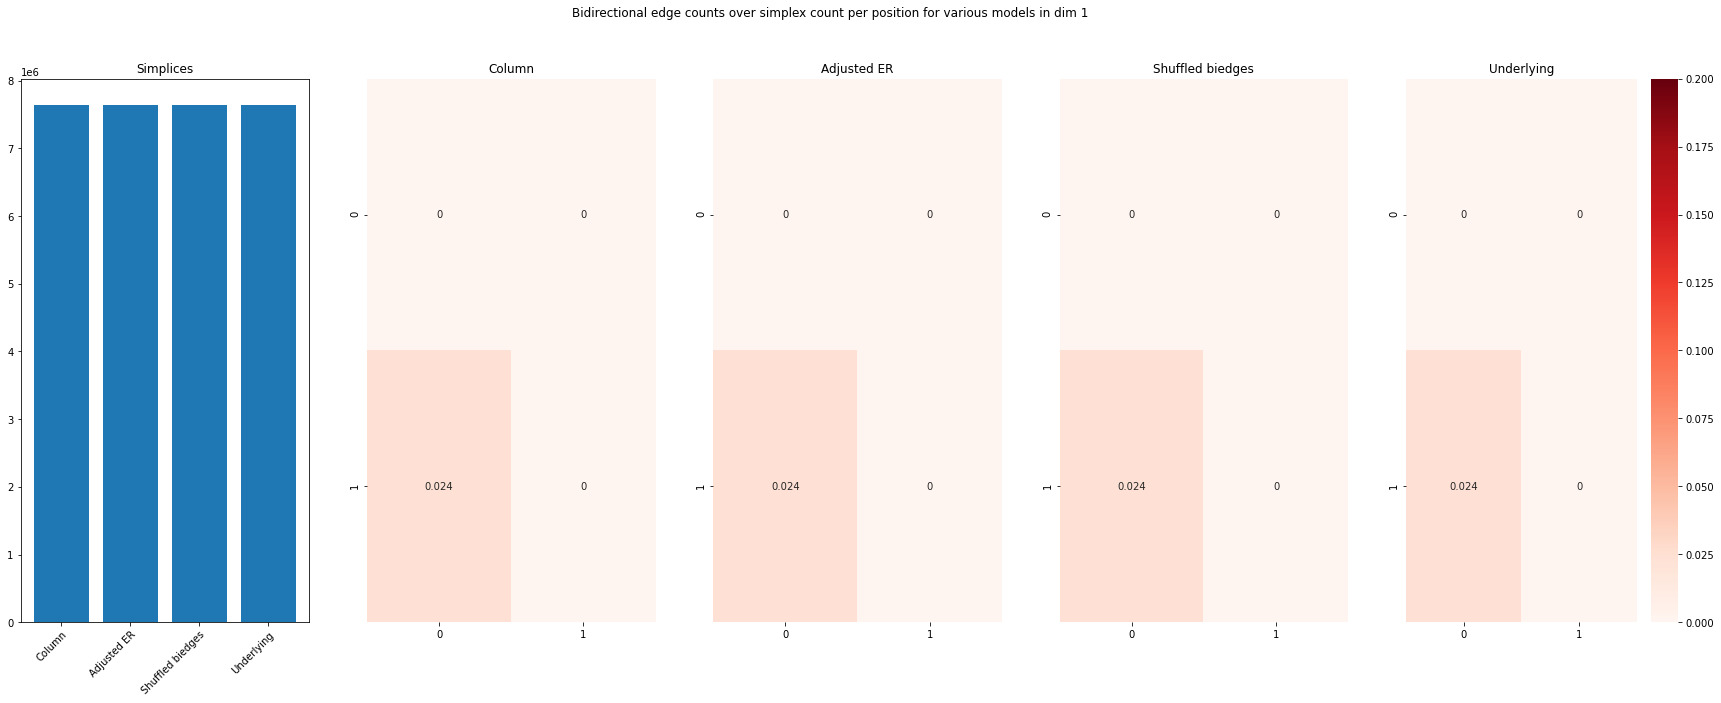

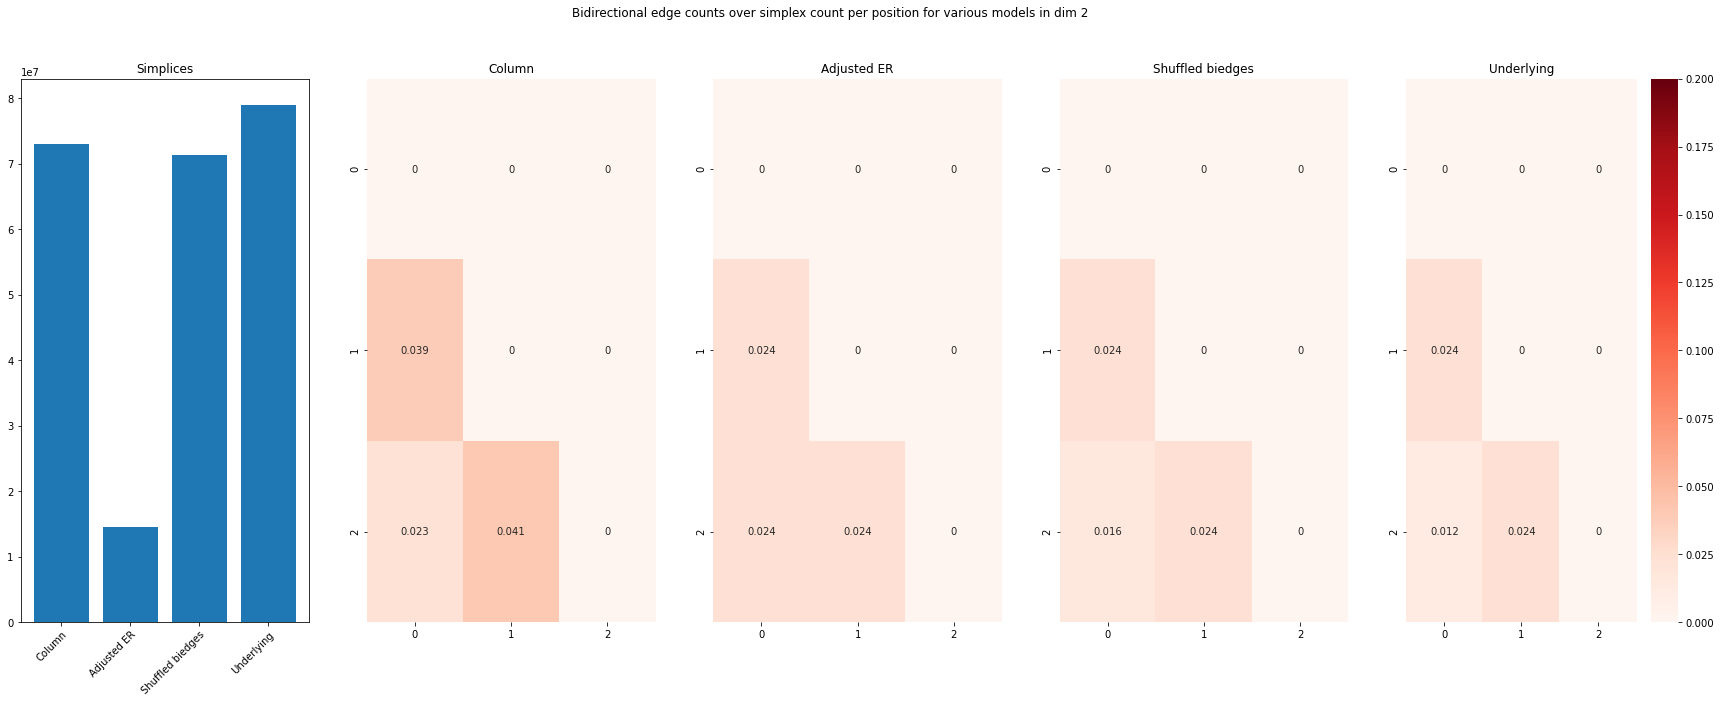

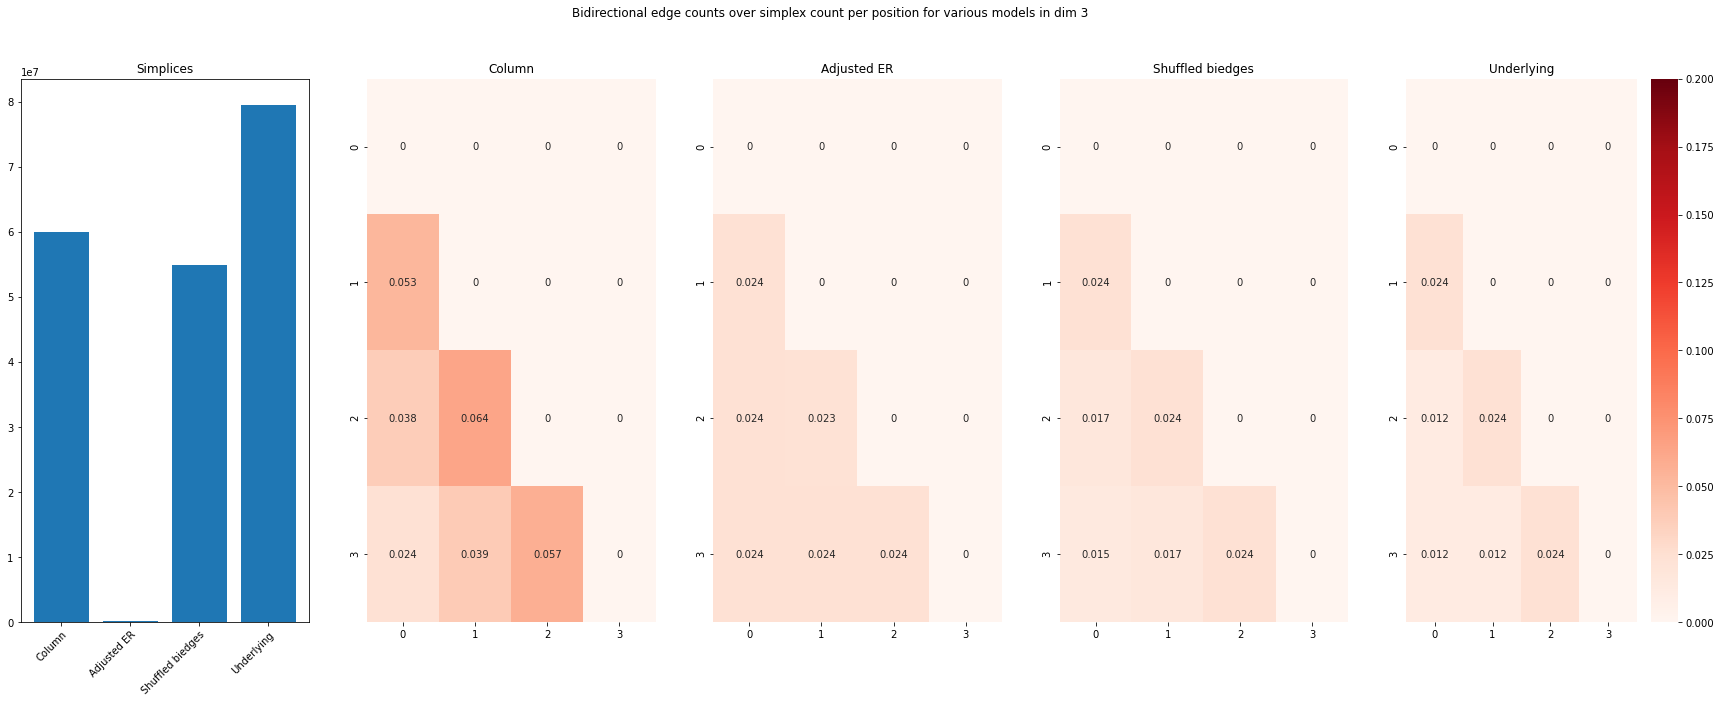

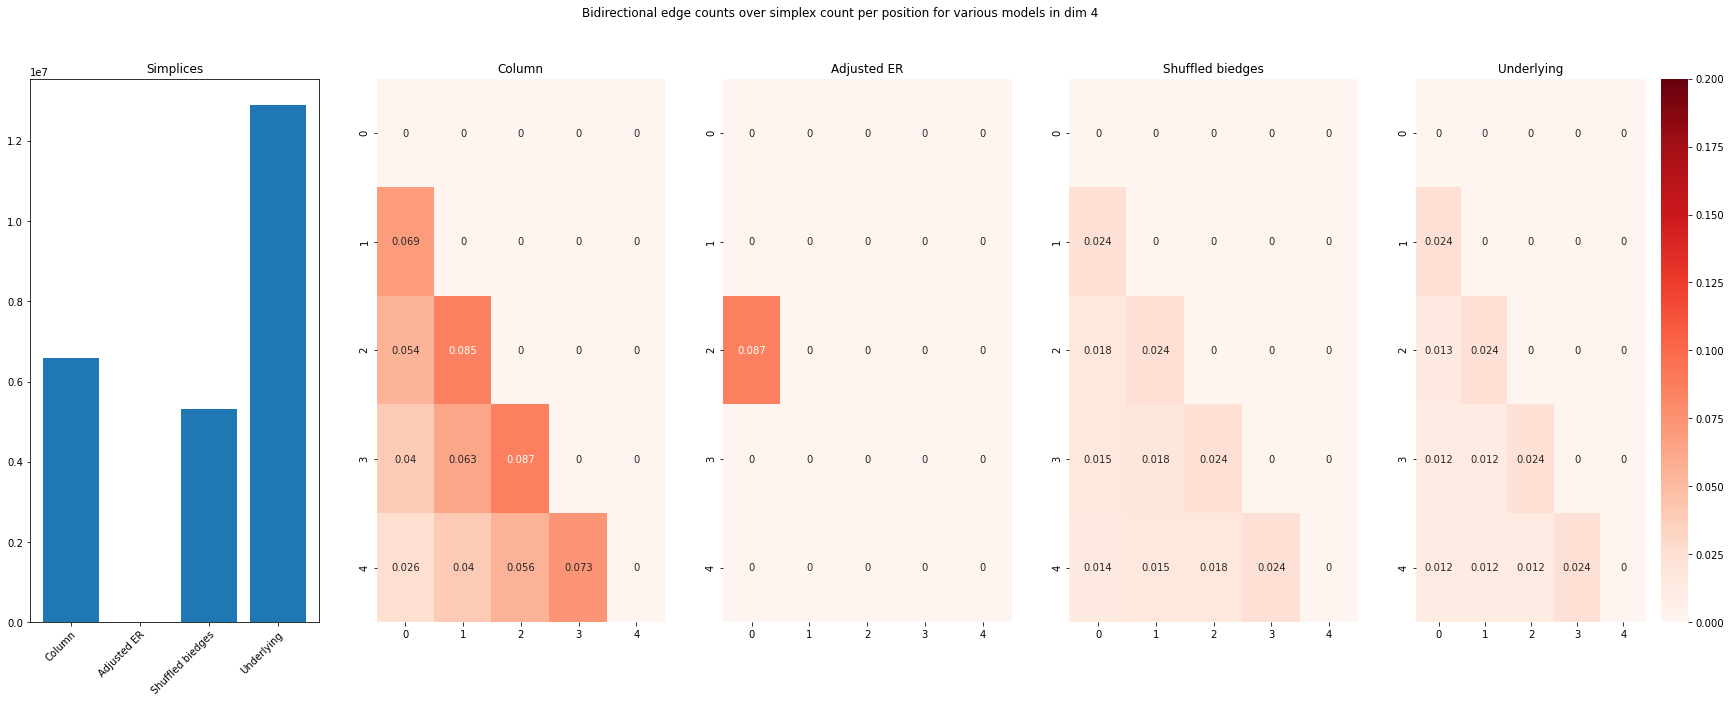

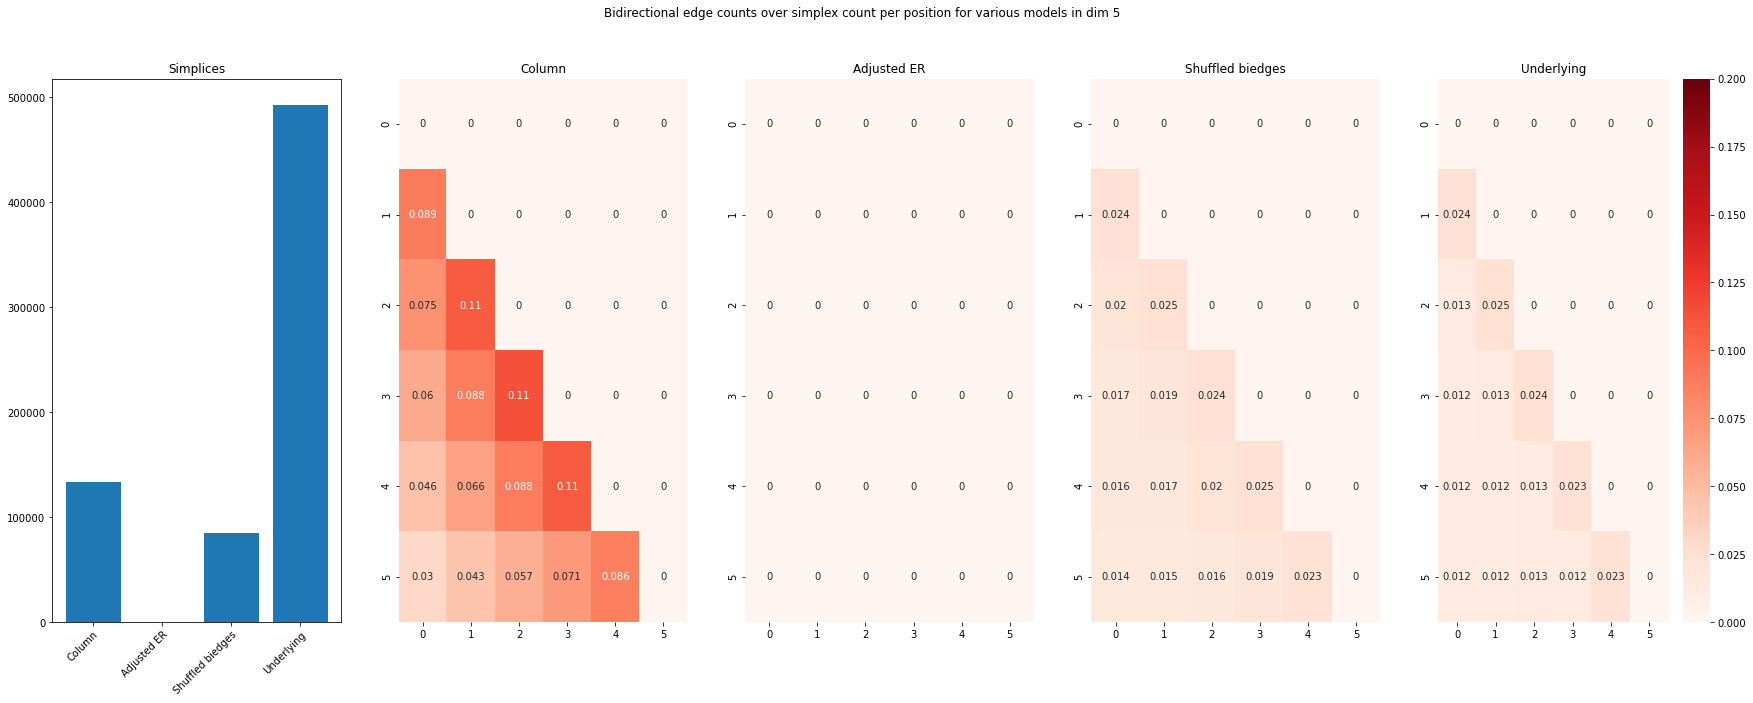

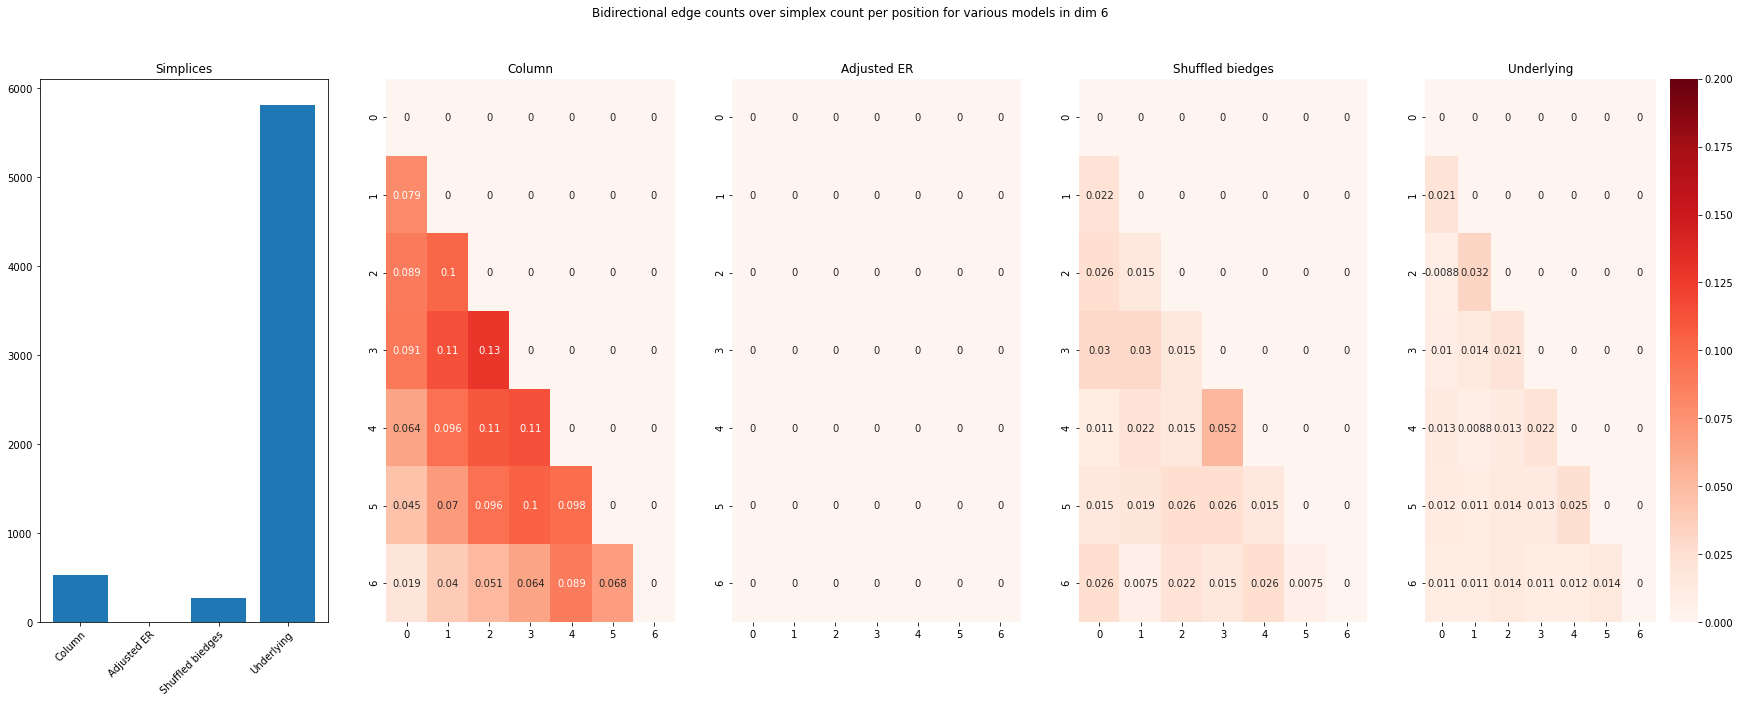

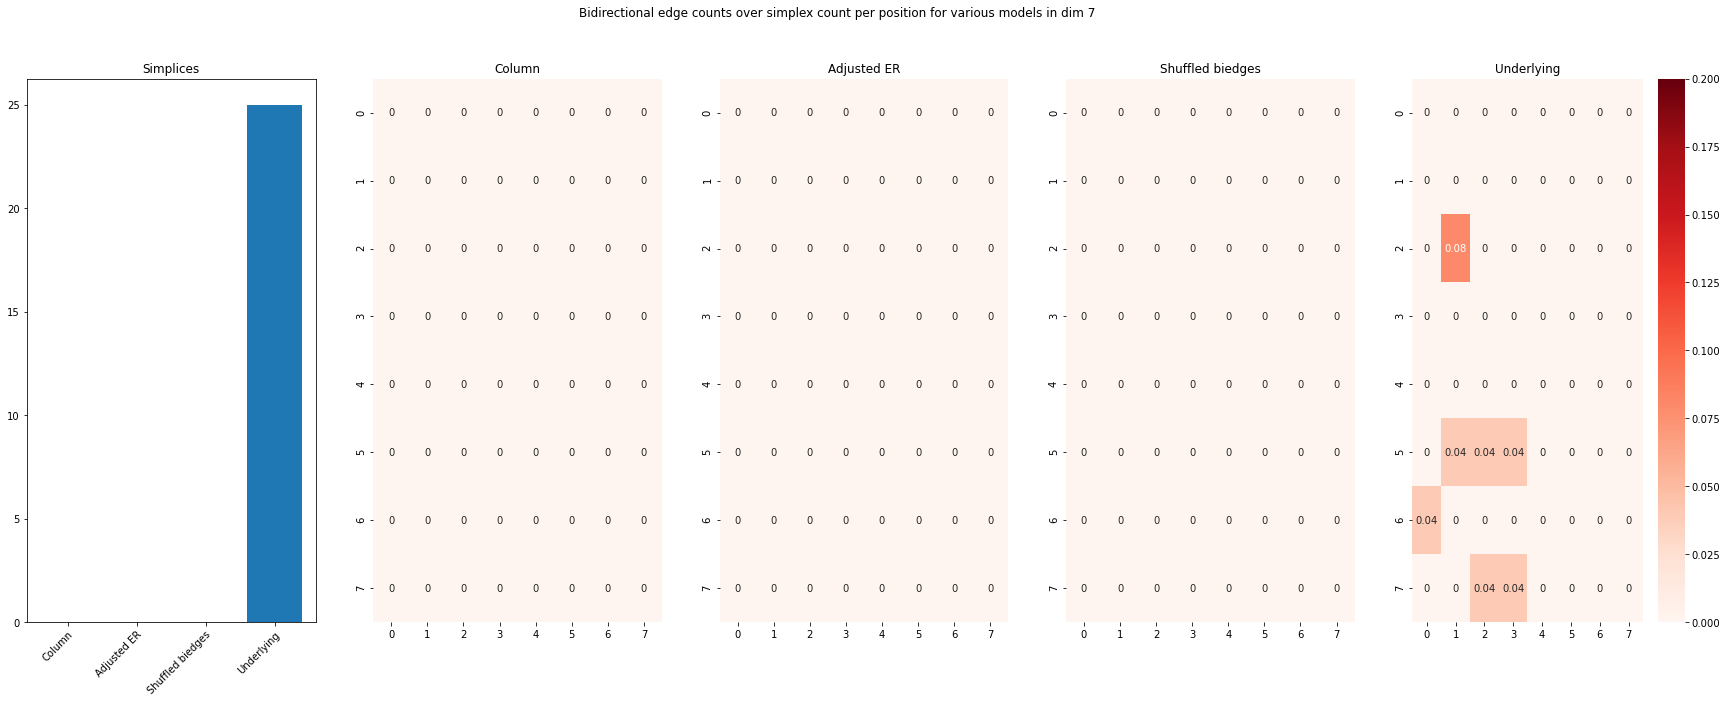

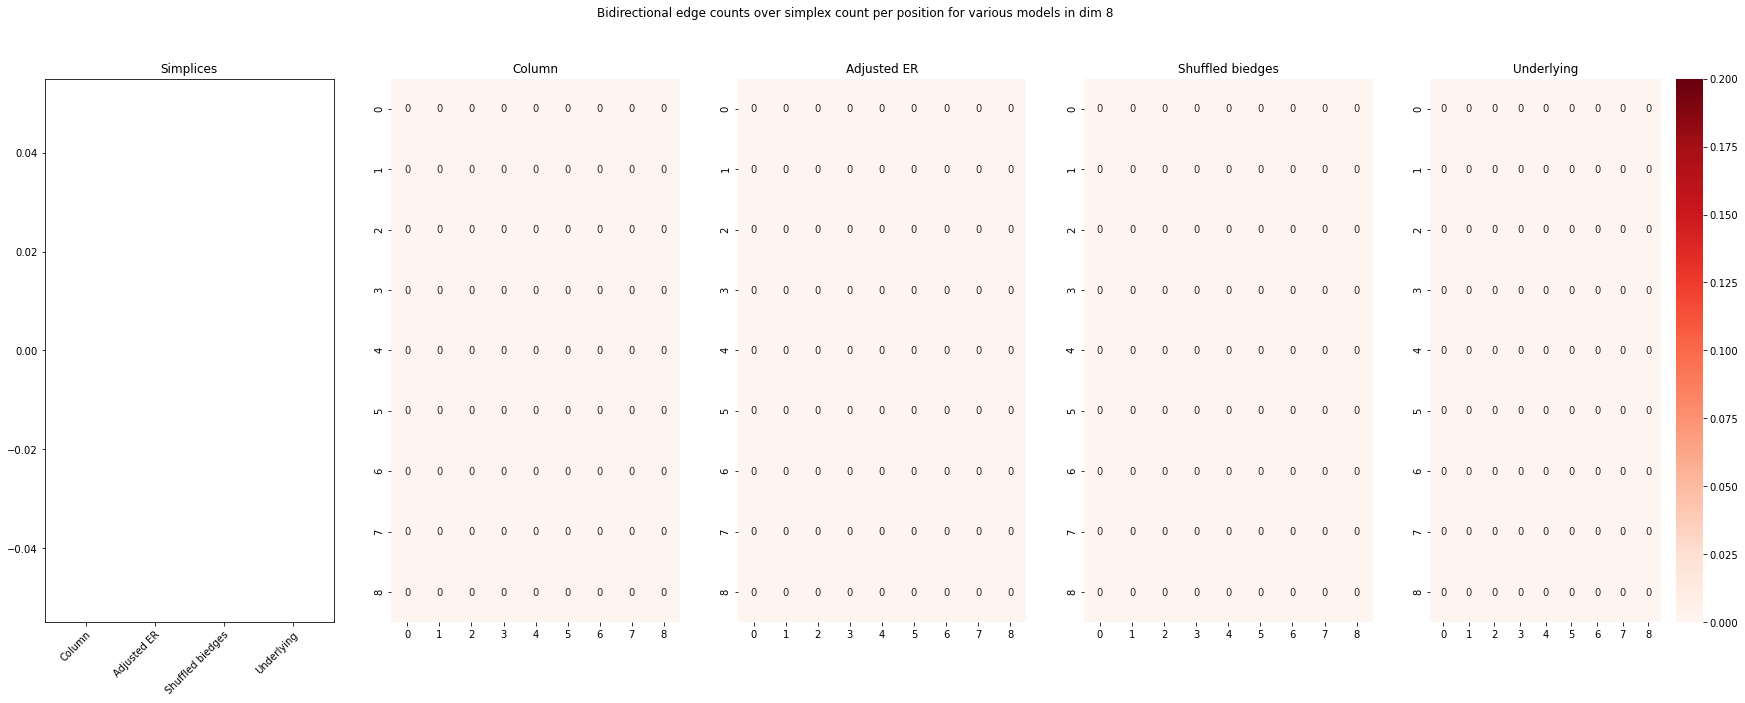

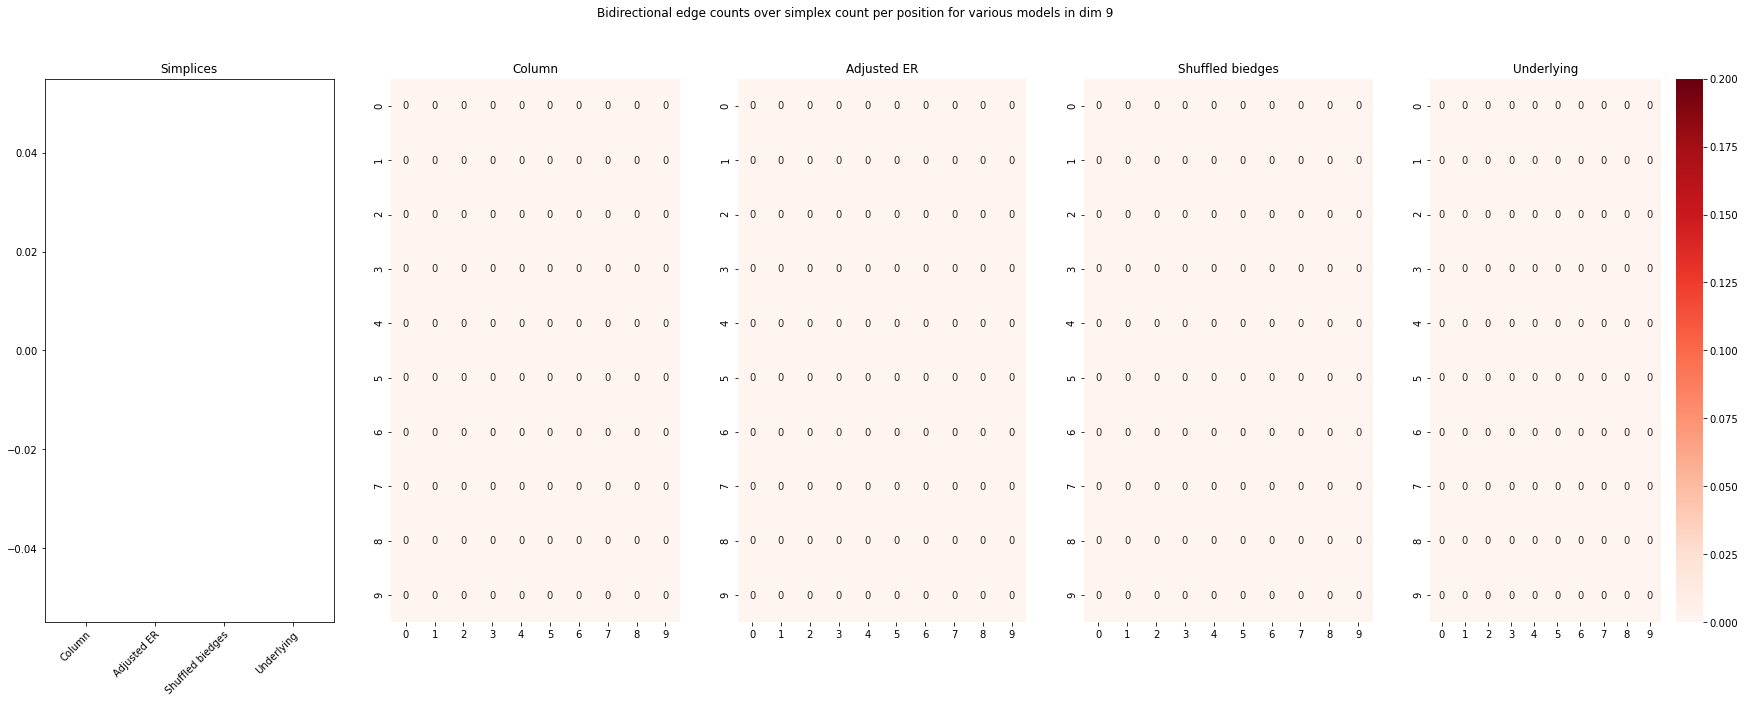

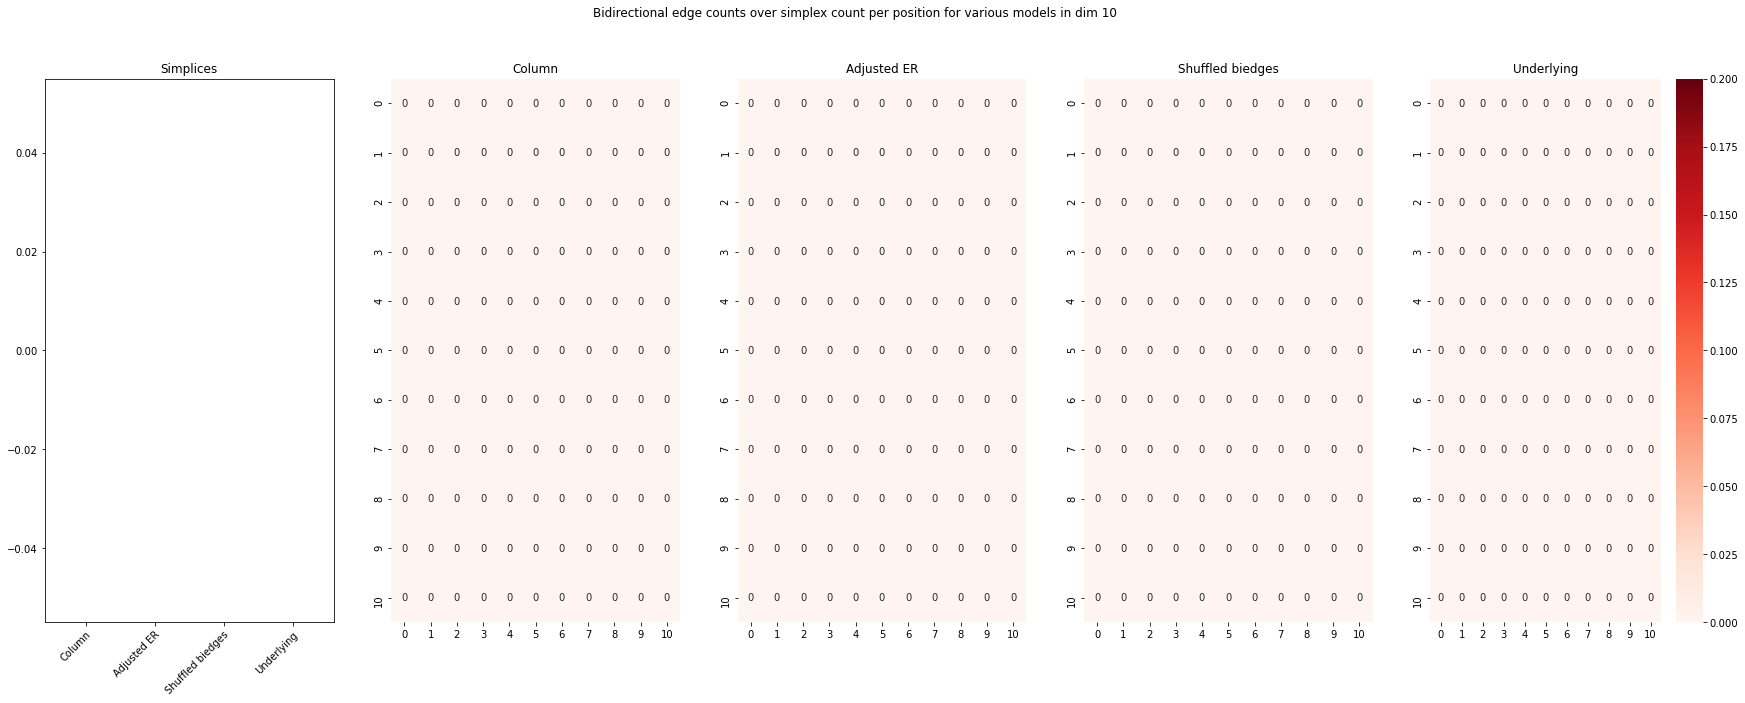

In [37]:
compare_graphs_normalized([a,b0,c0,d0], 1, "bcounts_norm")

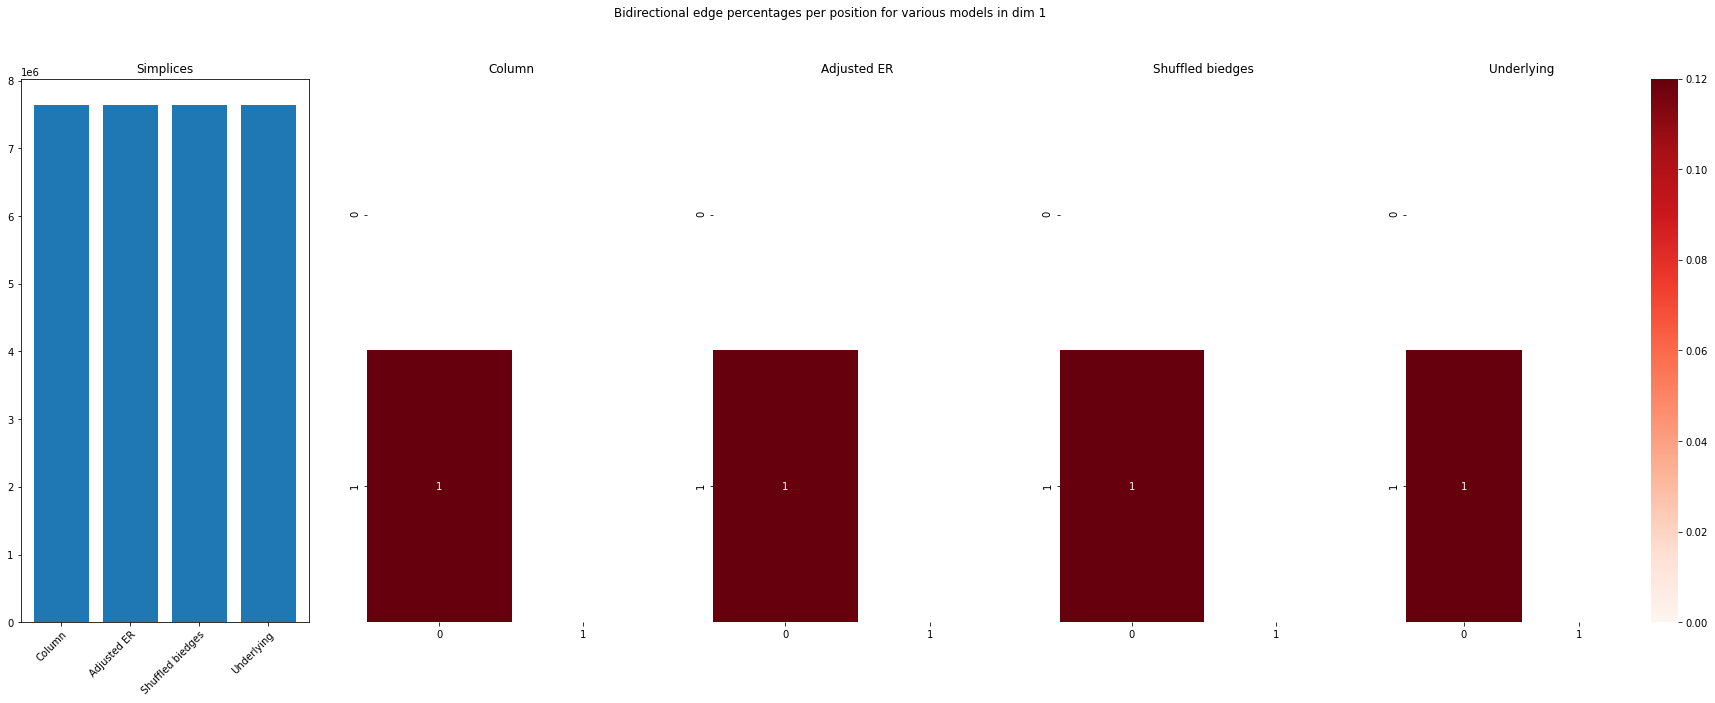

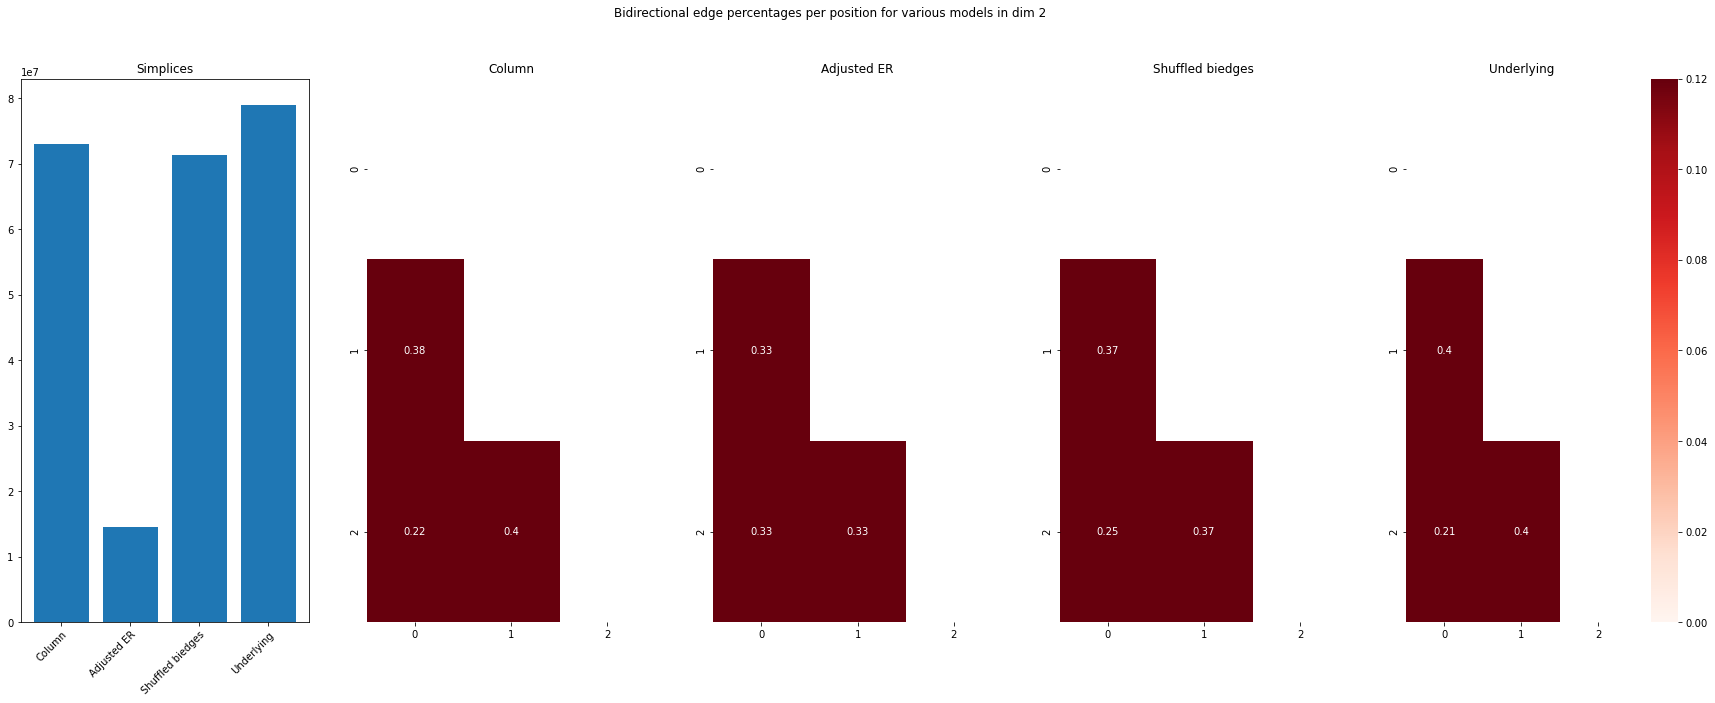

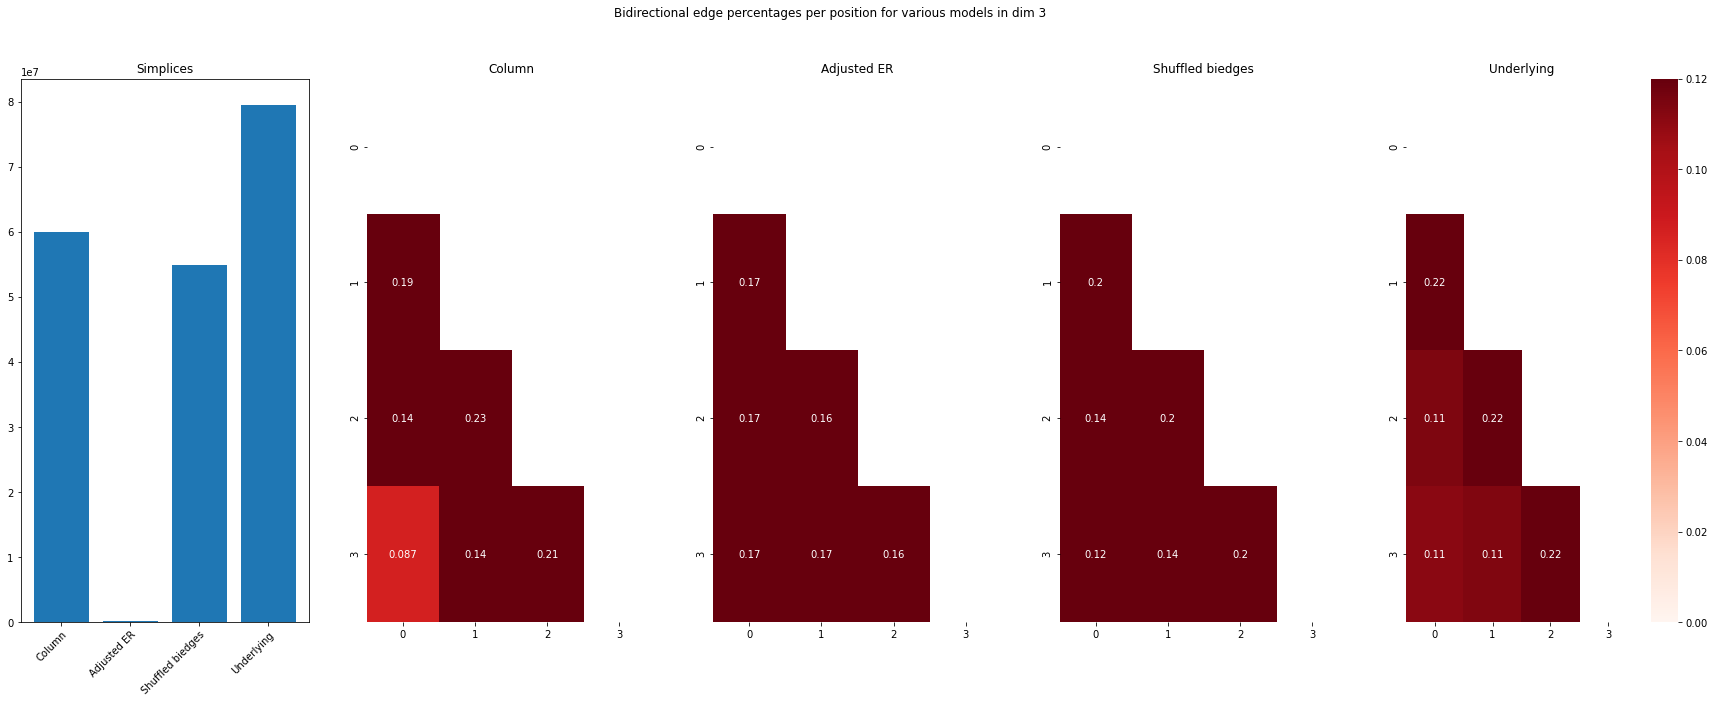

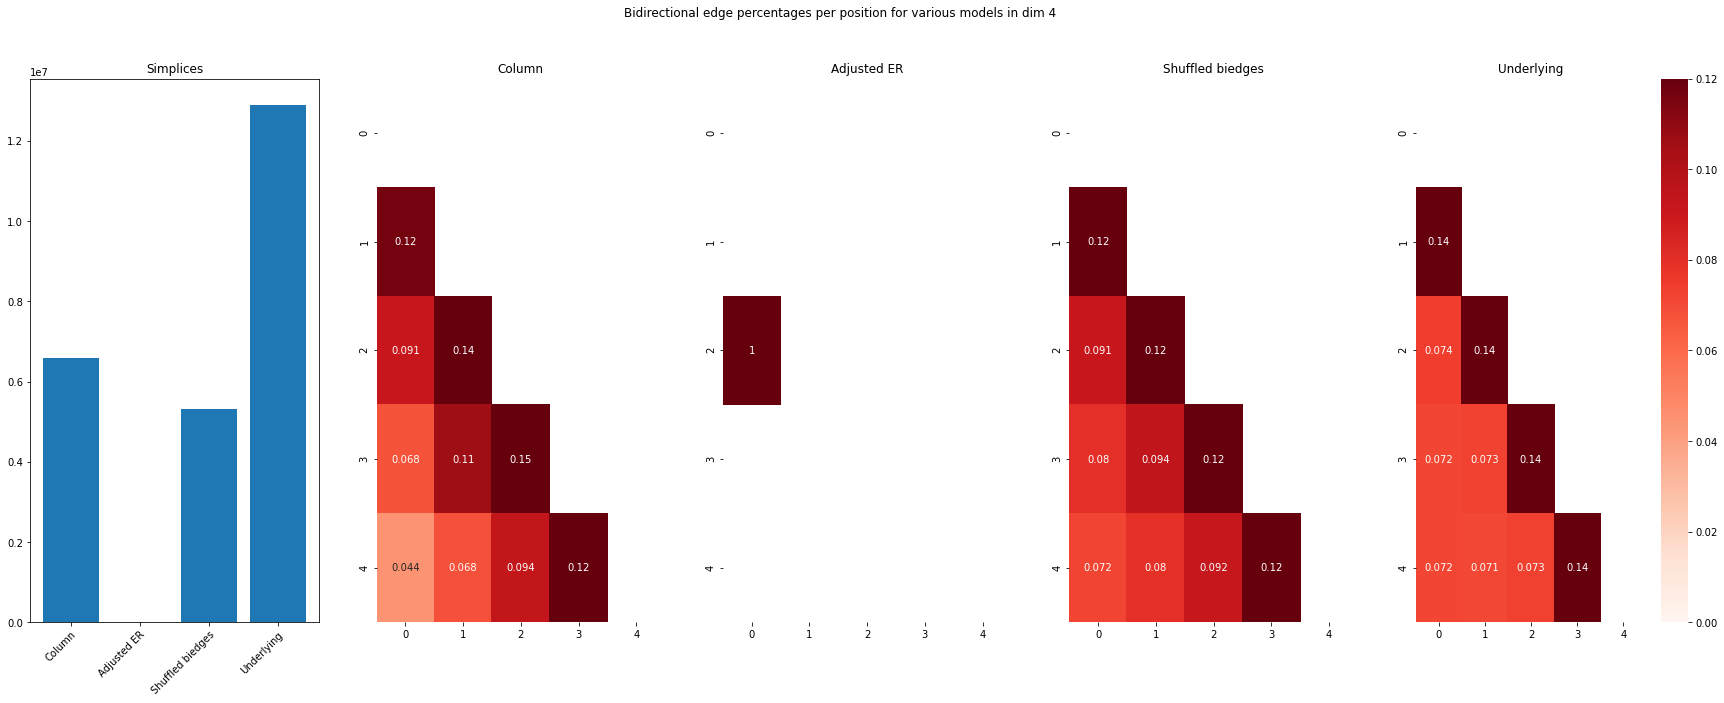

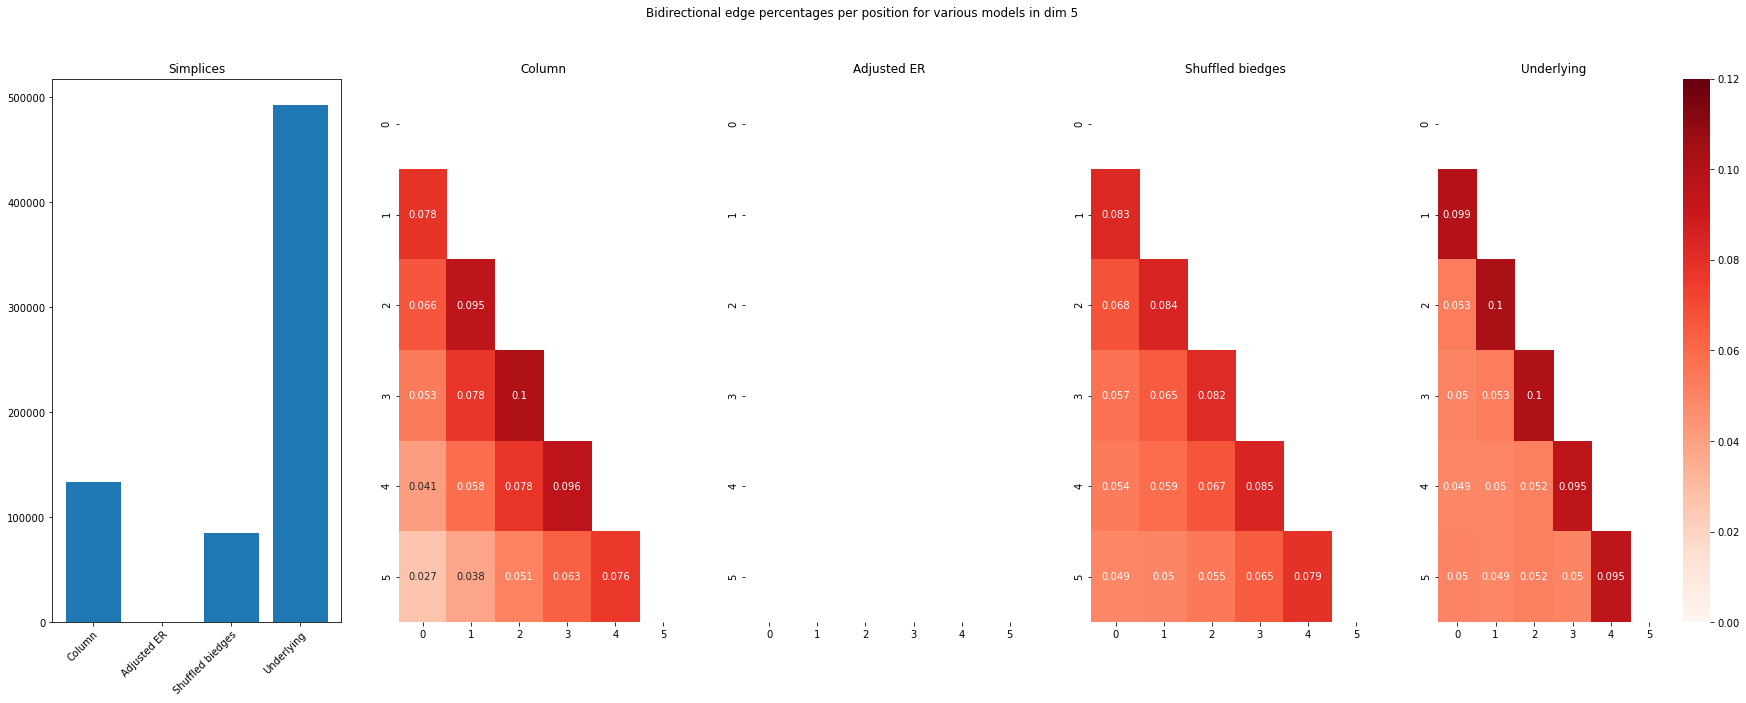

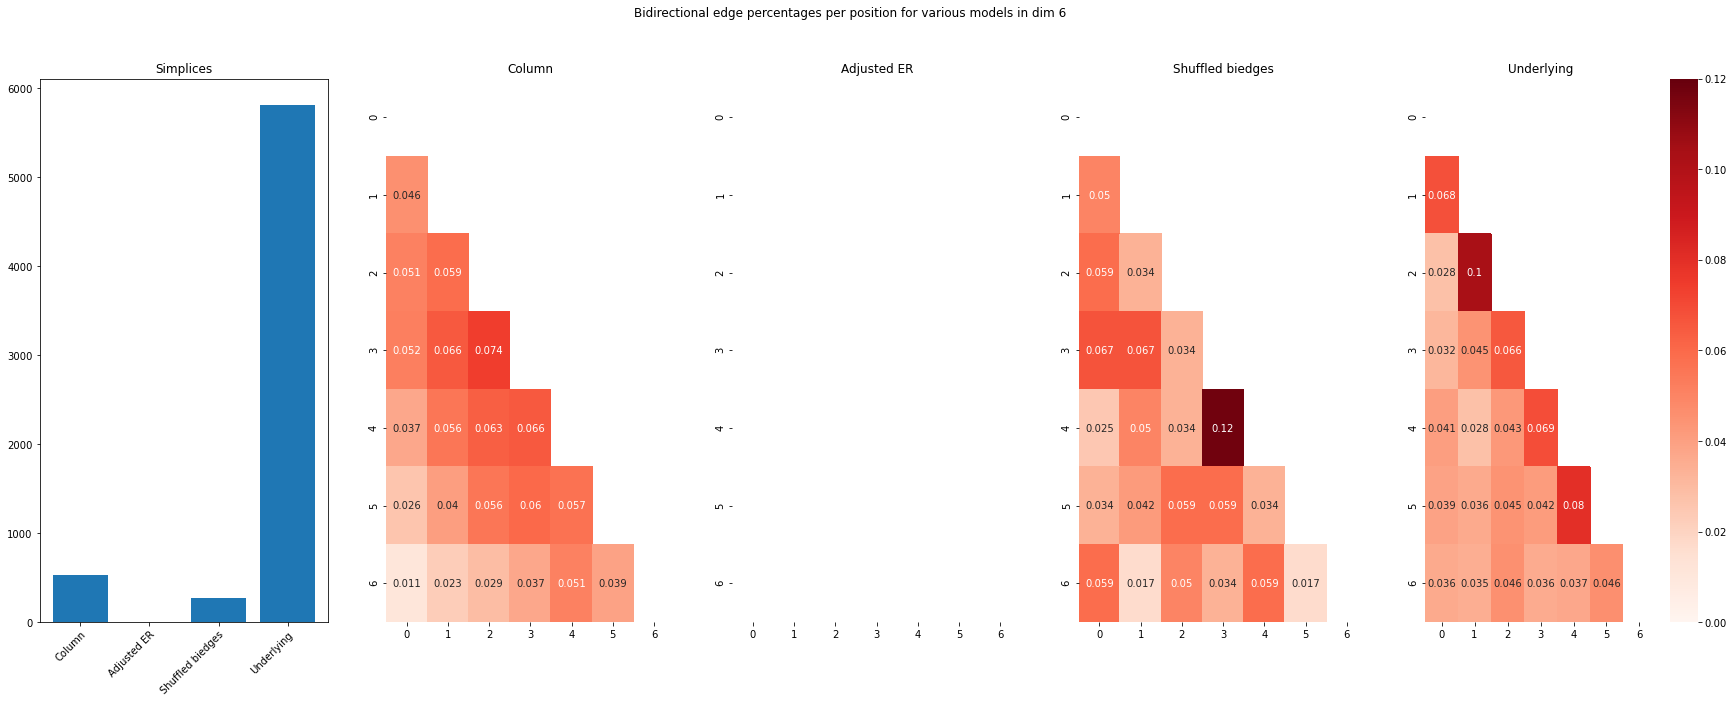

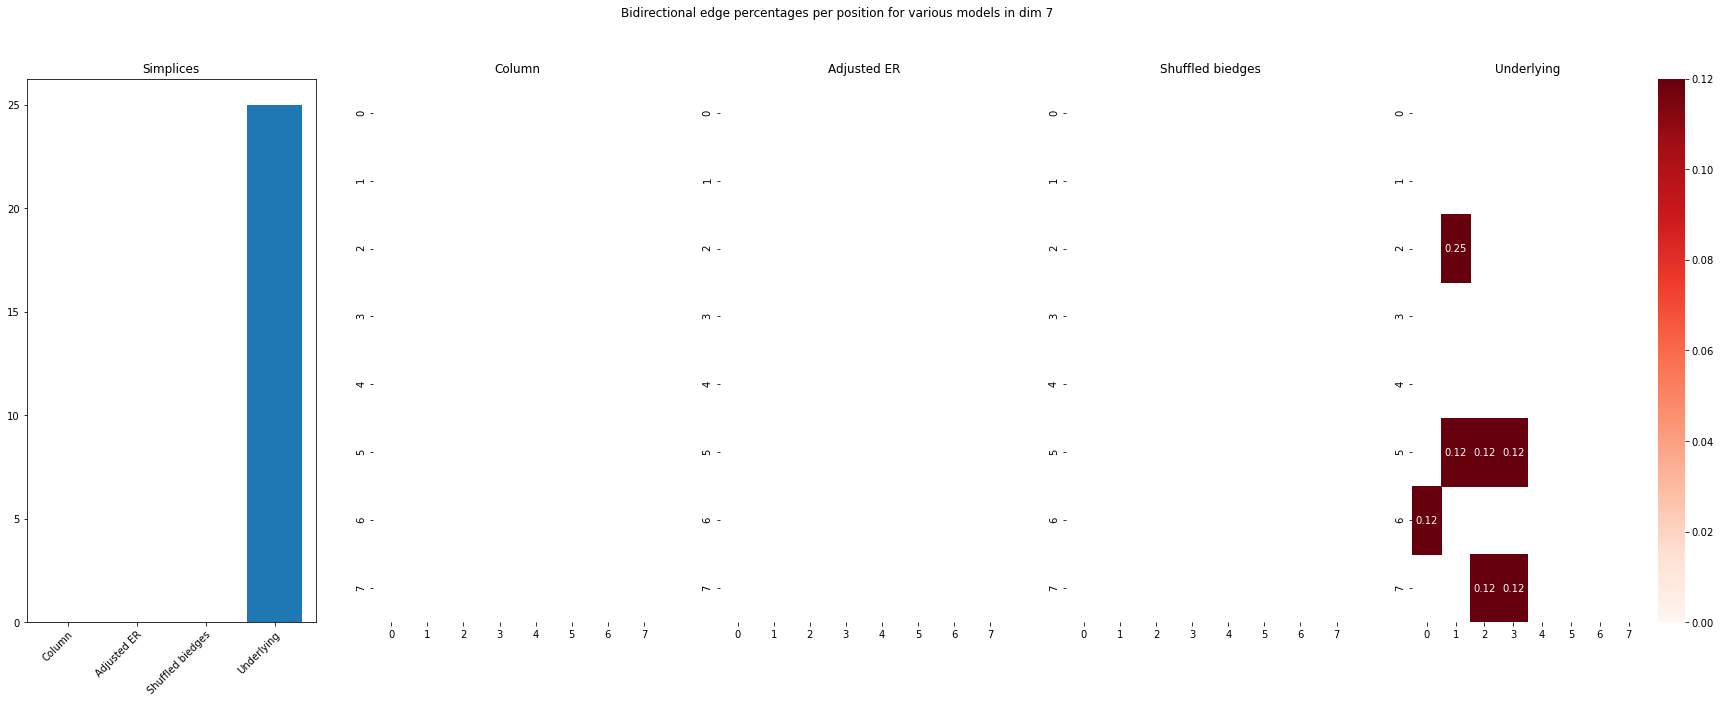

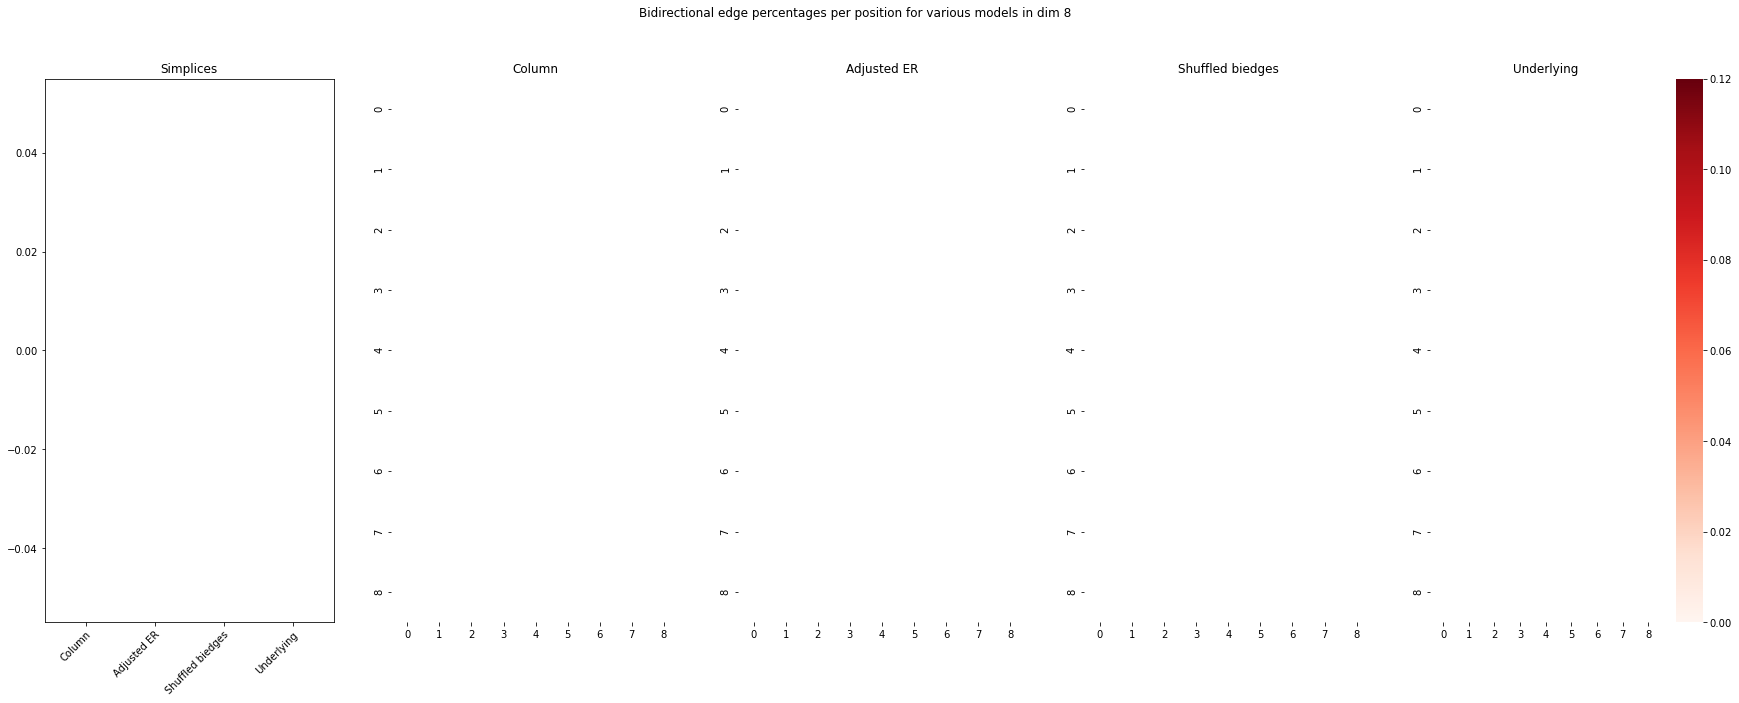

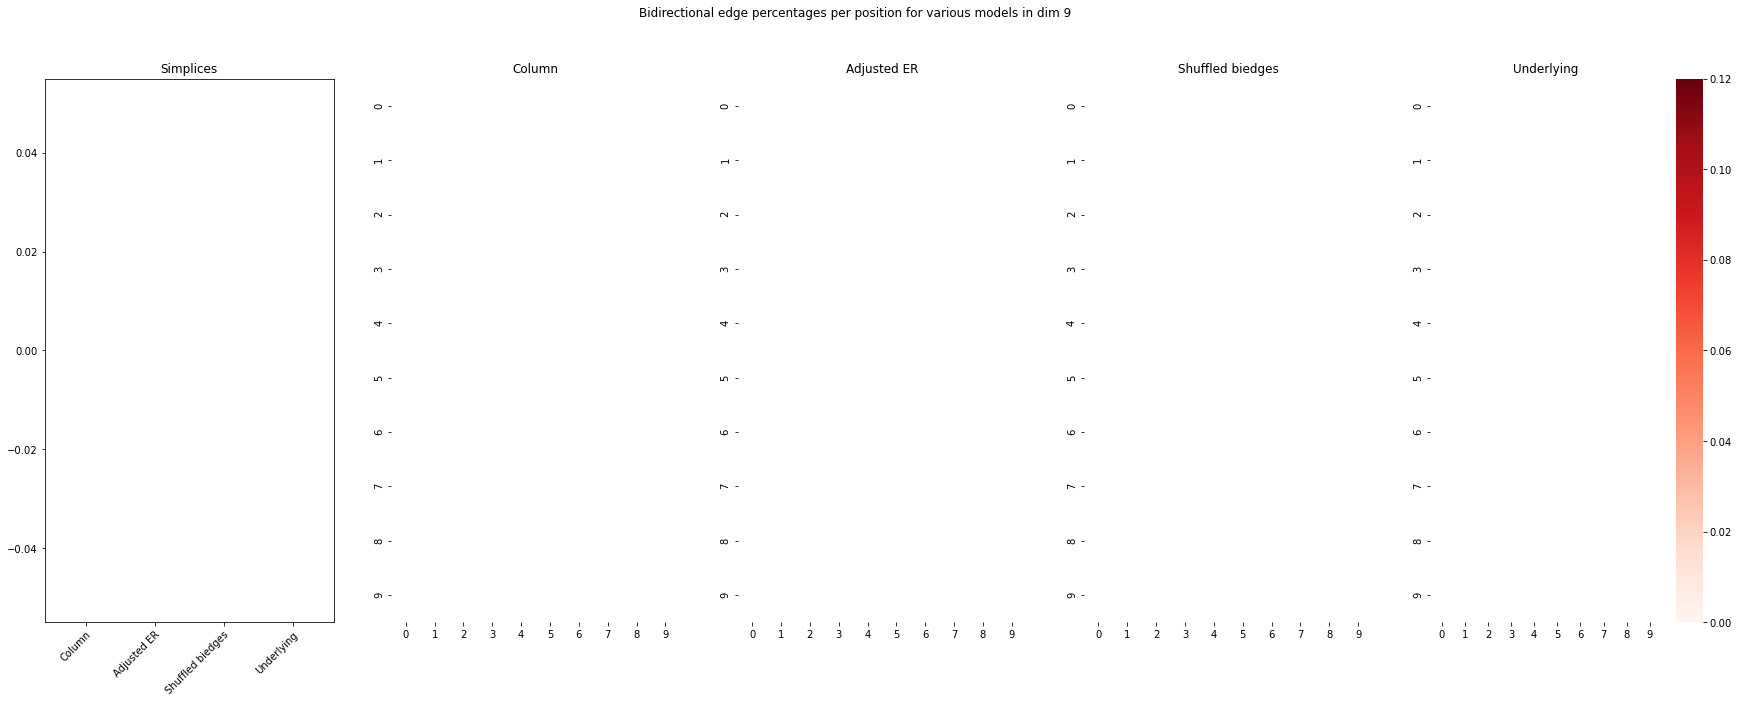

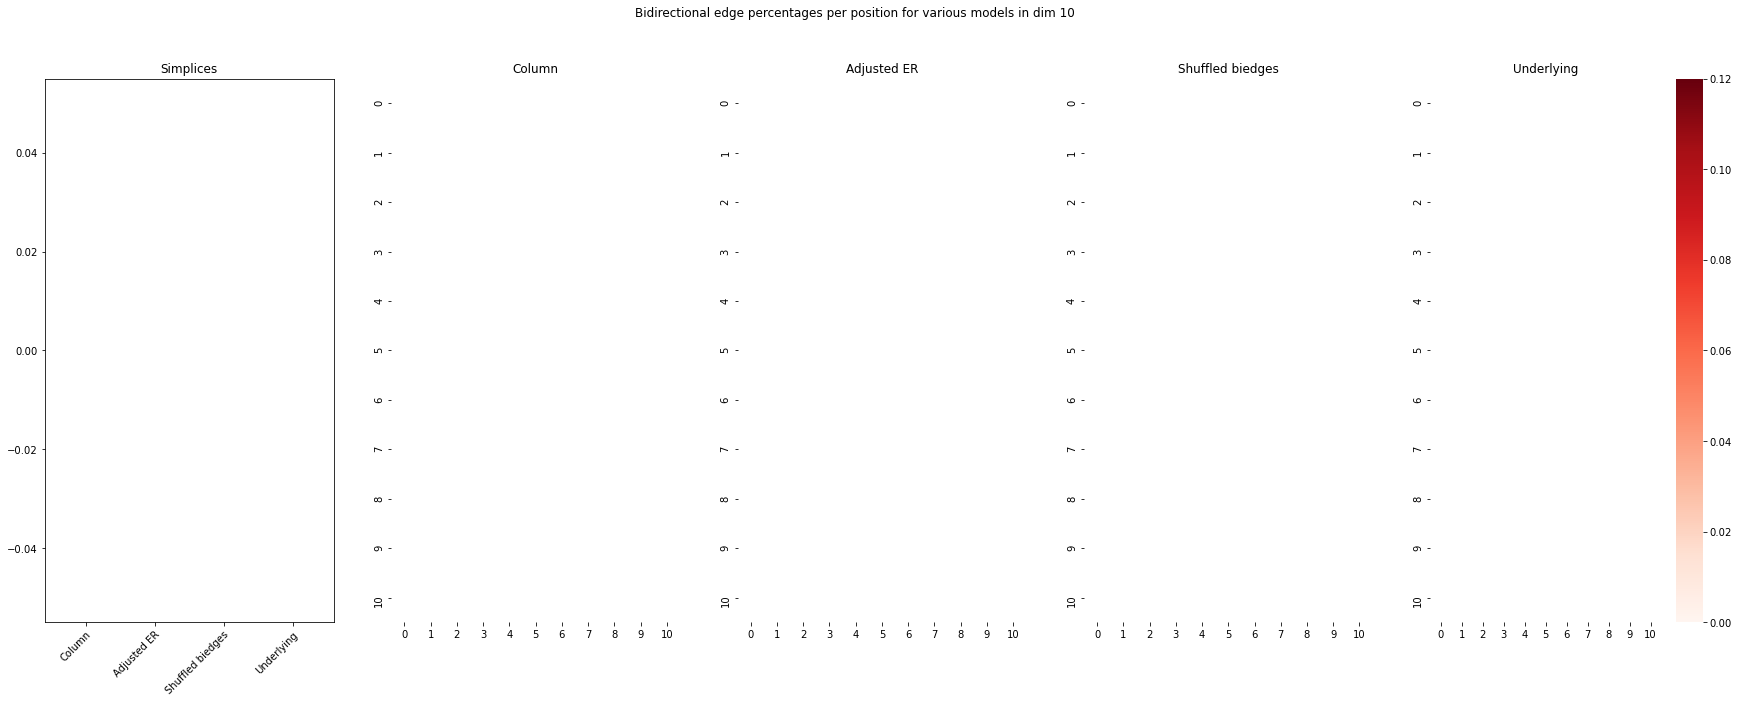

In [38]:
compare_graphs_percent([a,b0,c0,d0], 1, "bcounts_percent")

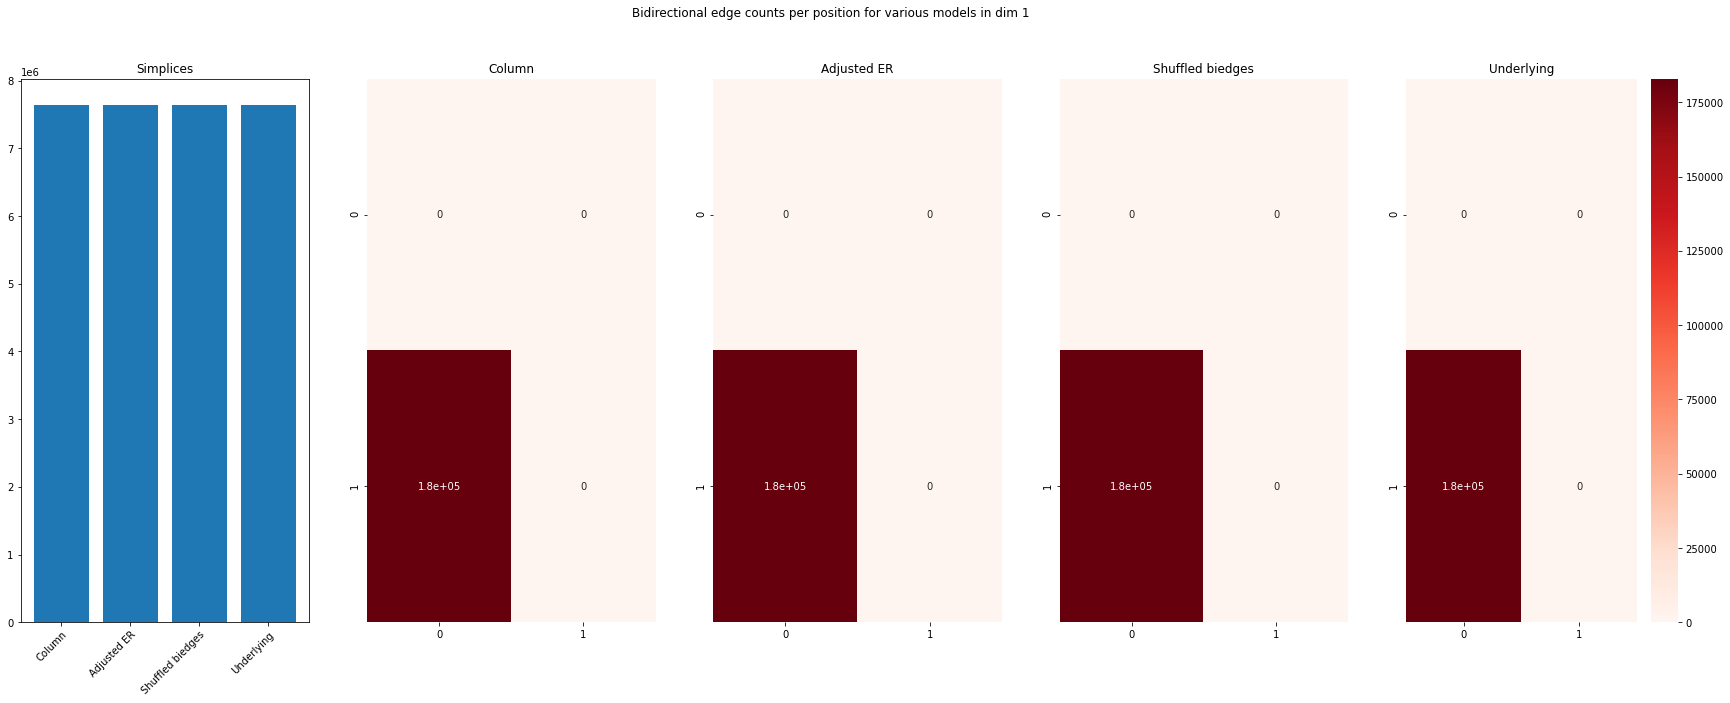

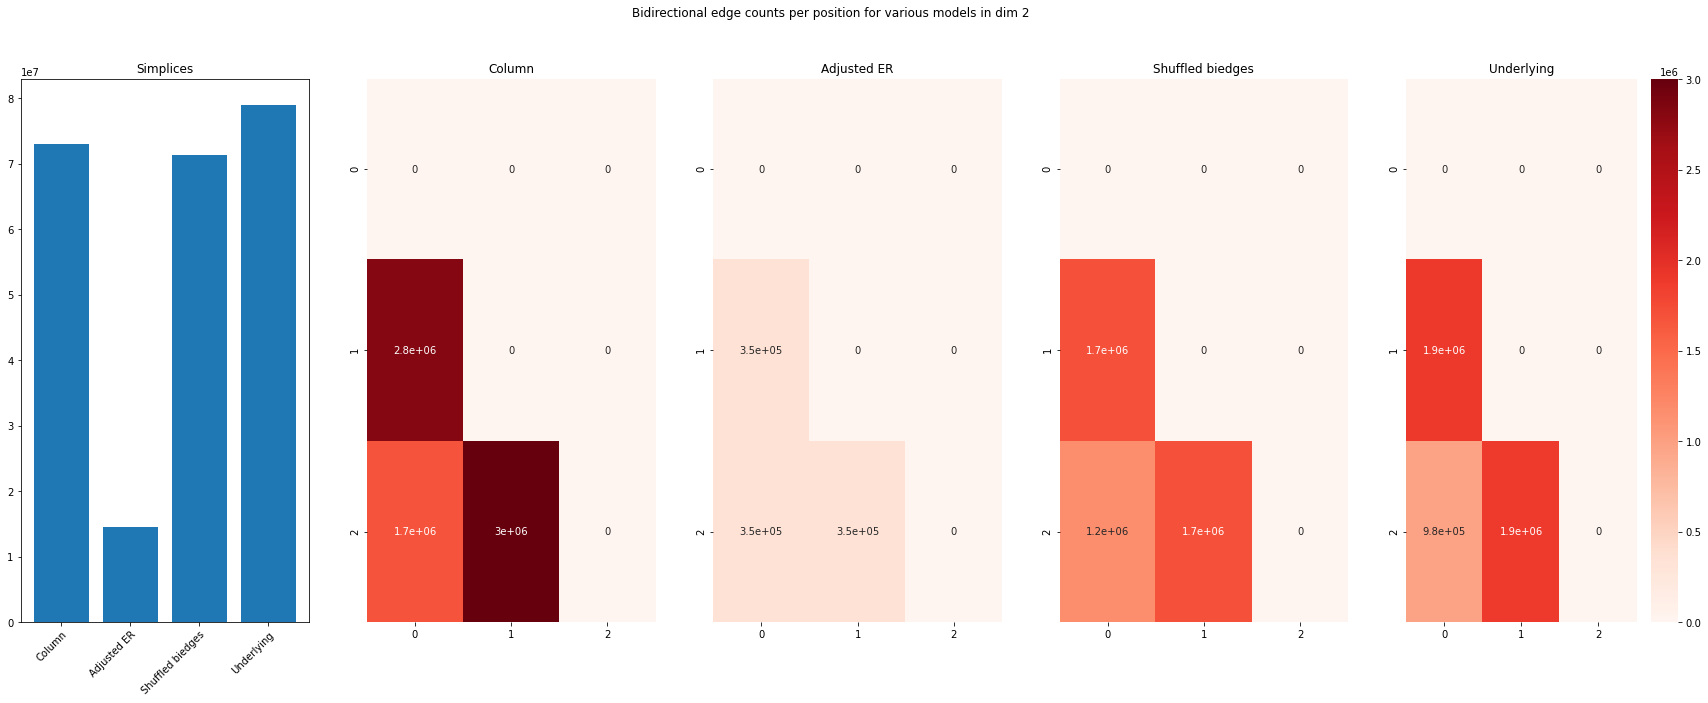

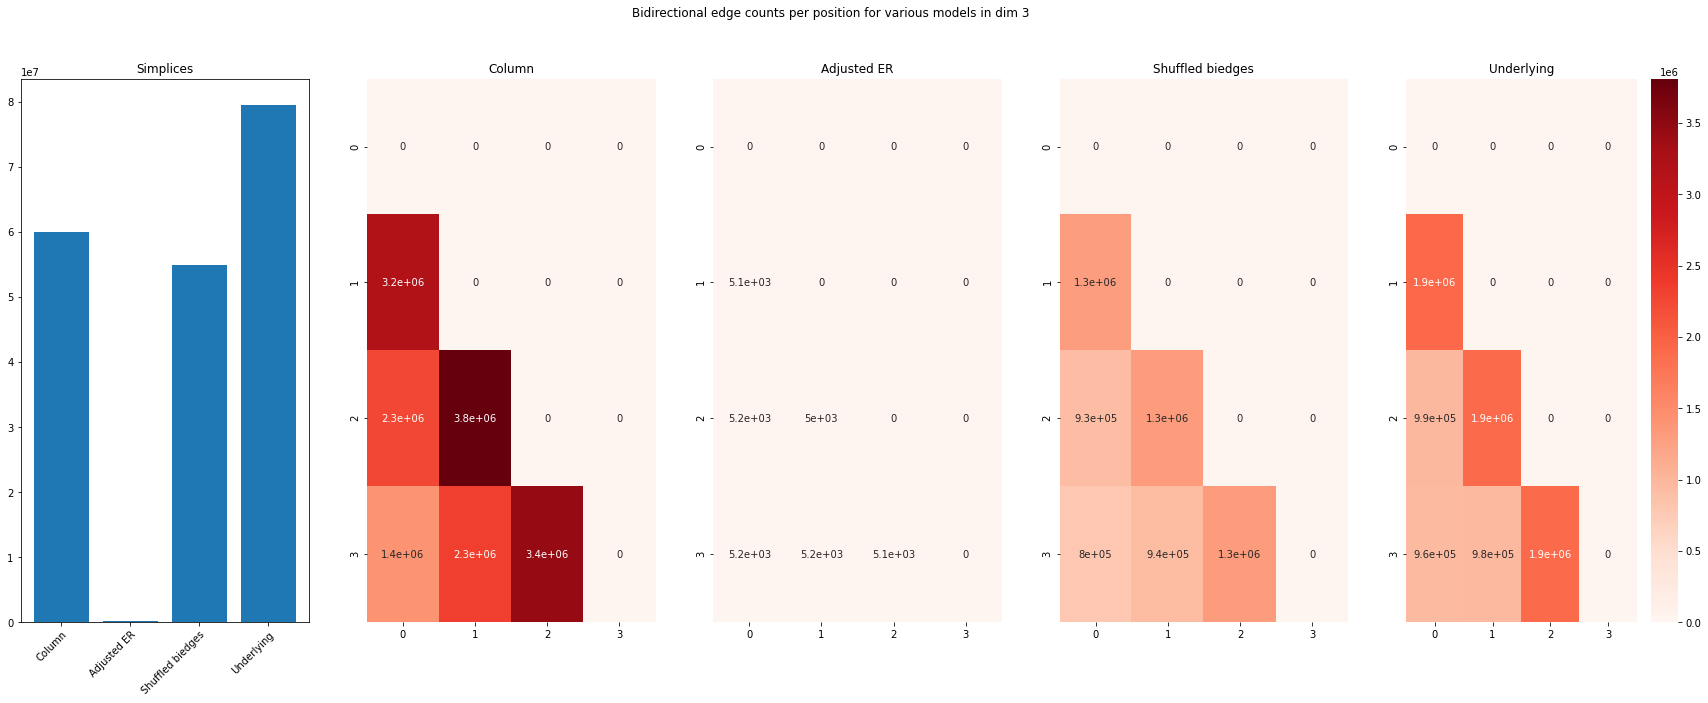

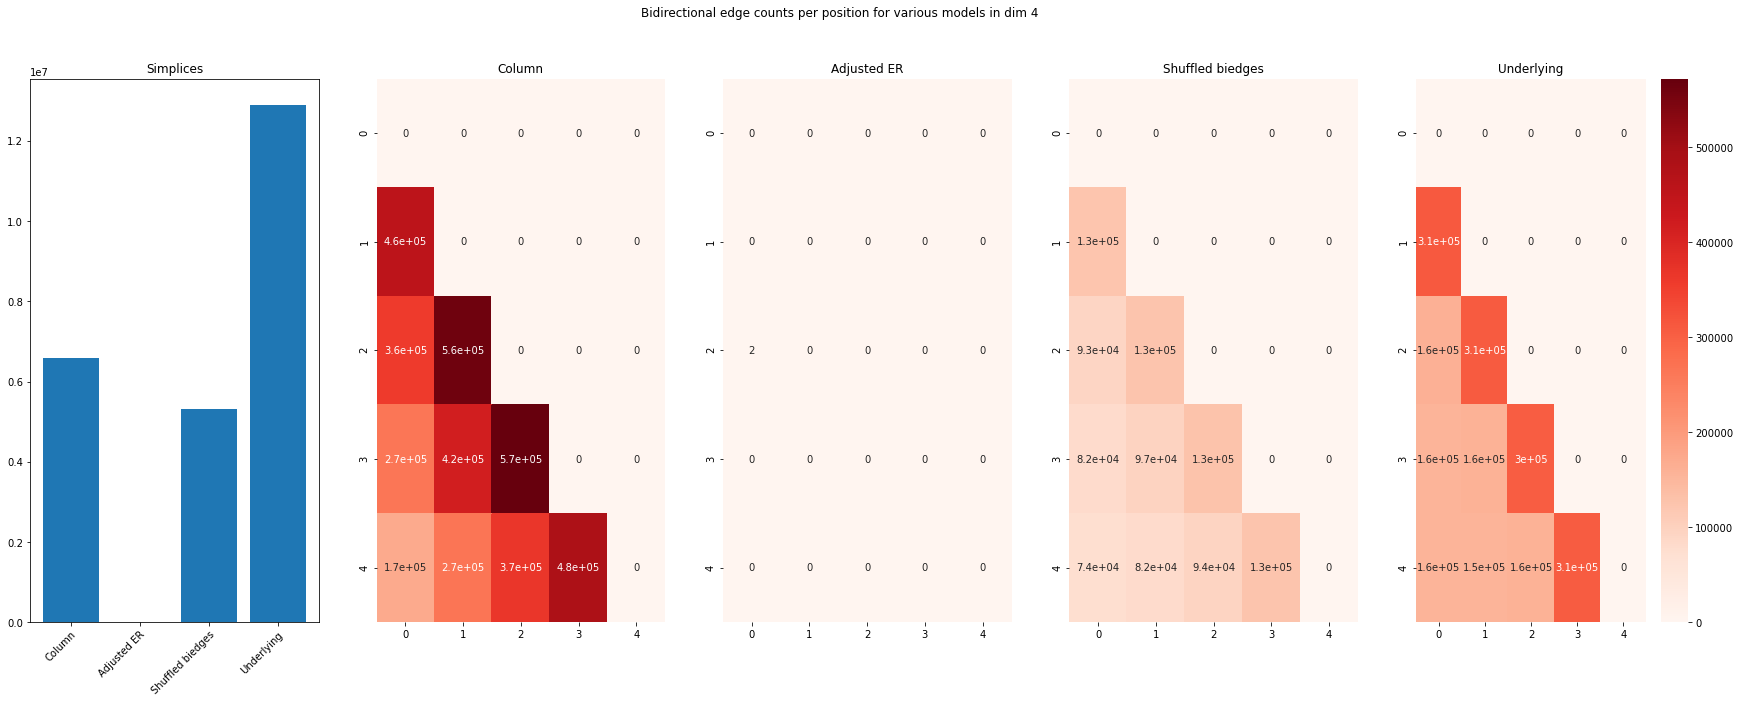

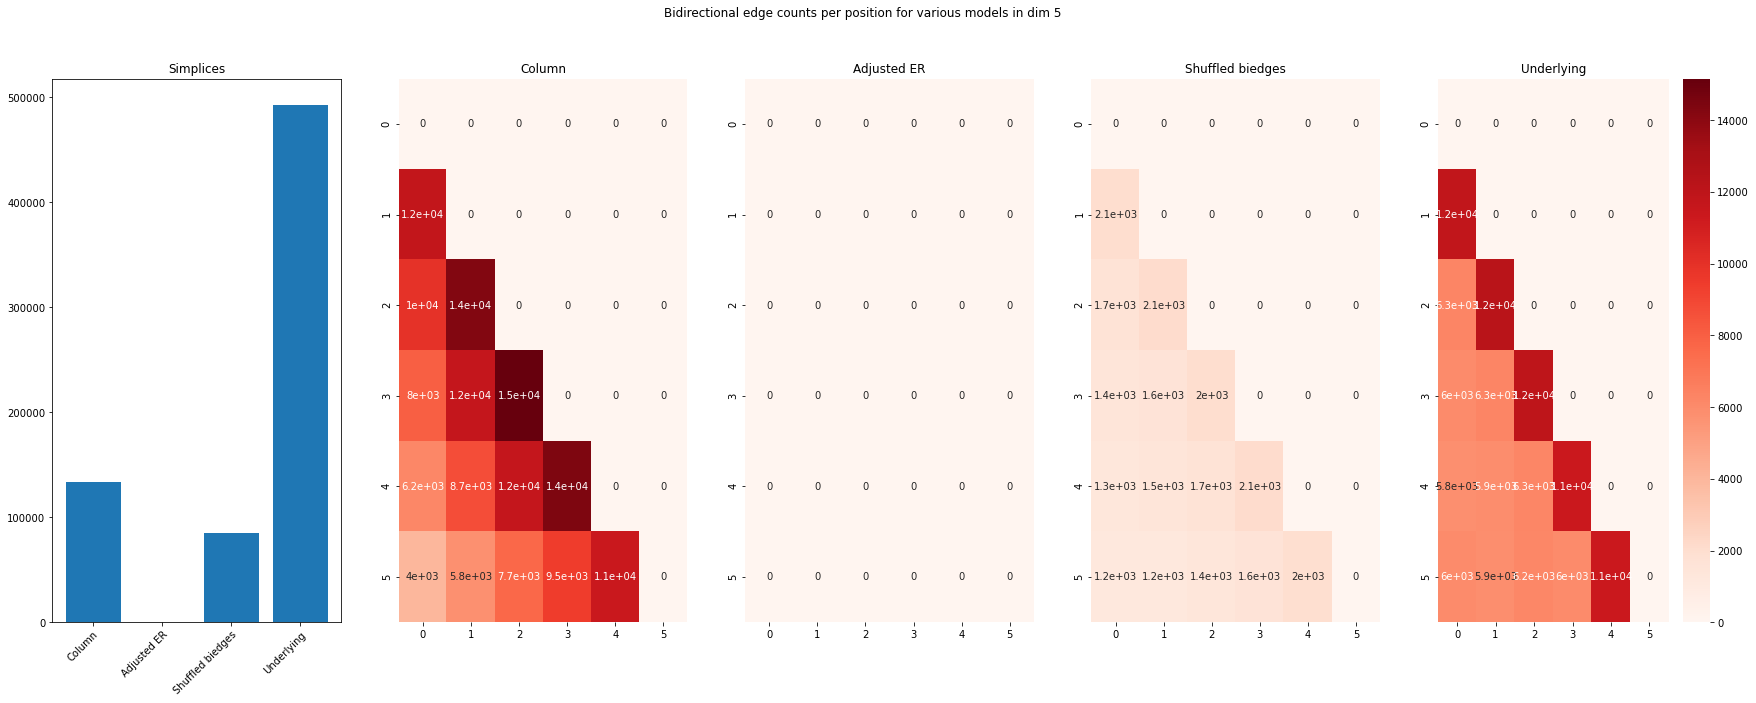

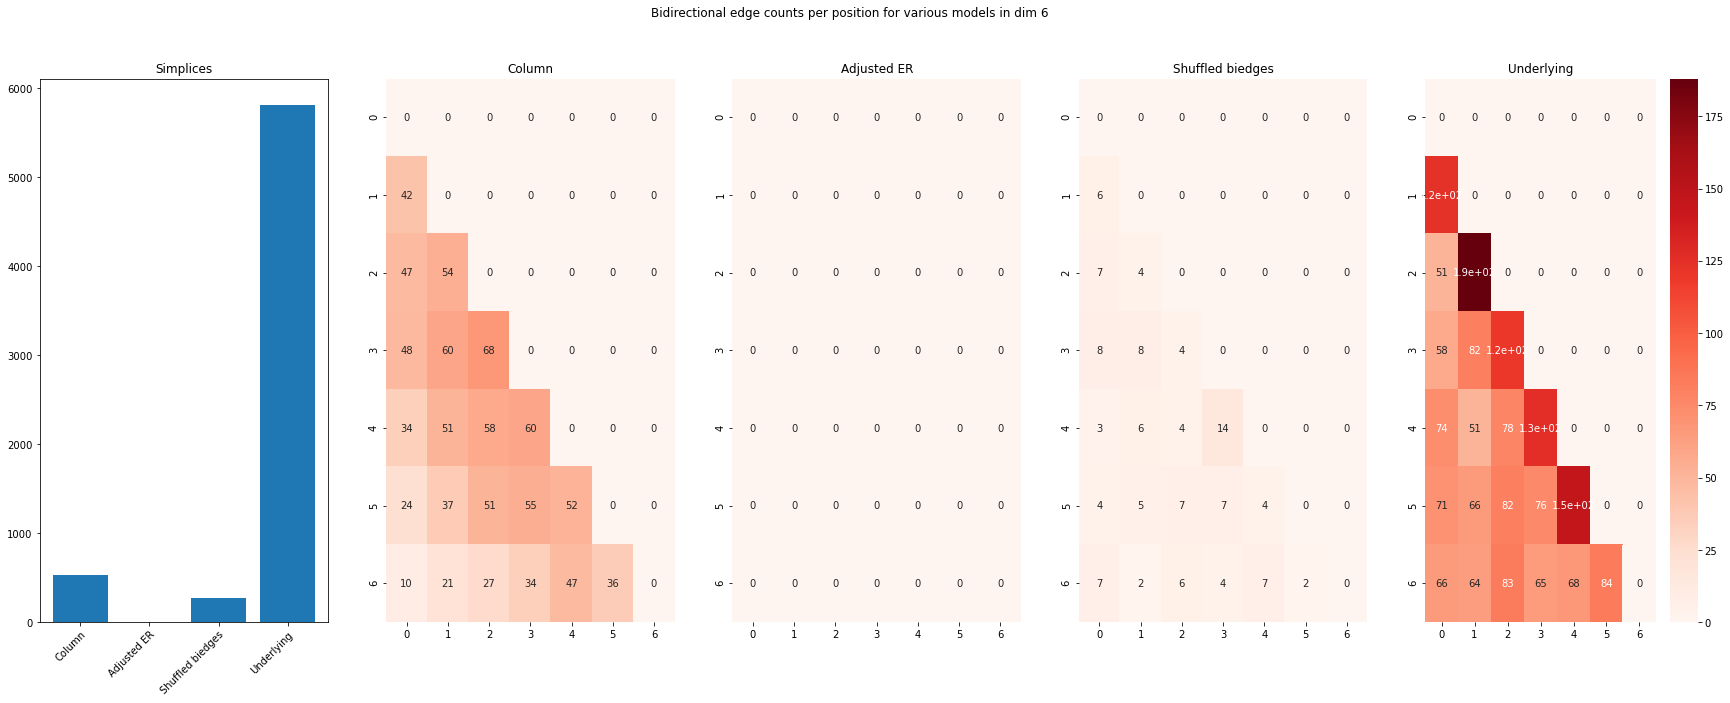

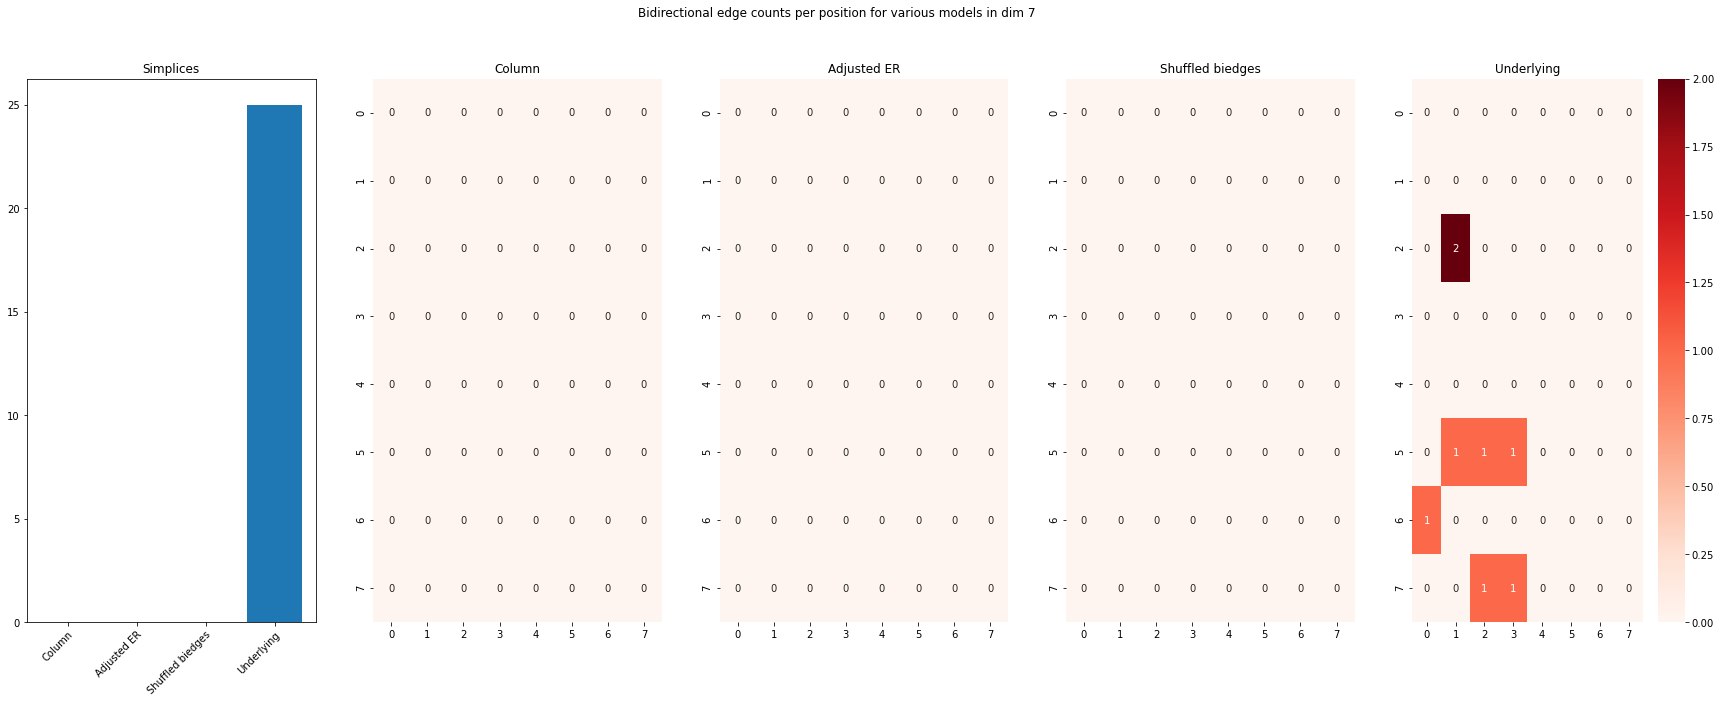

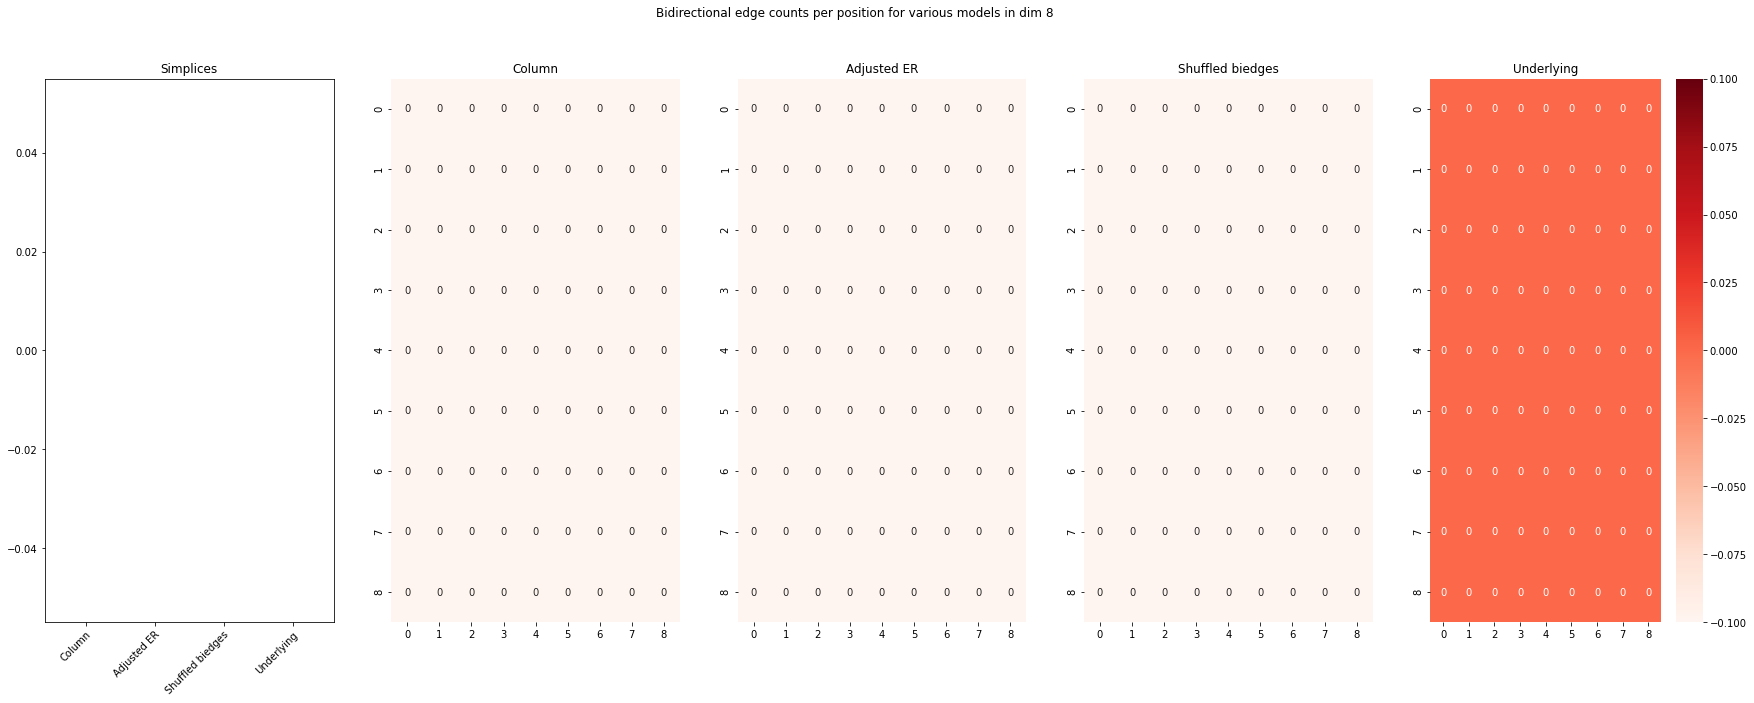

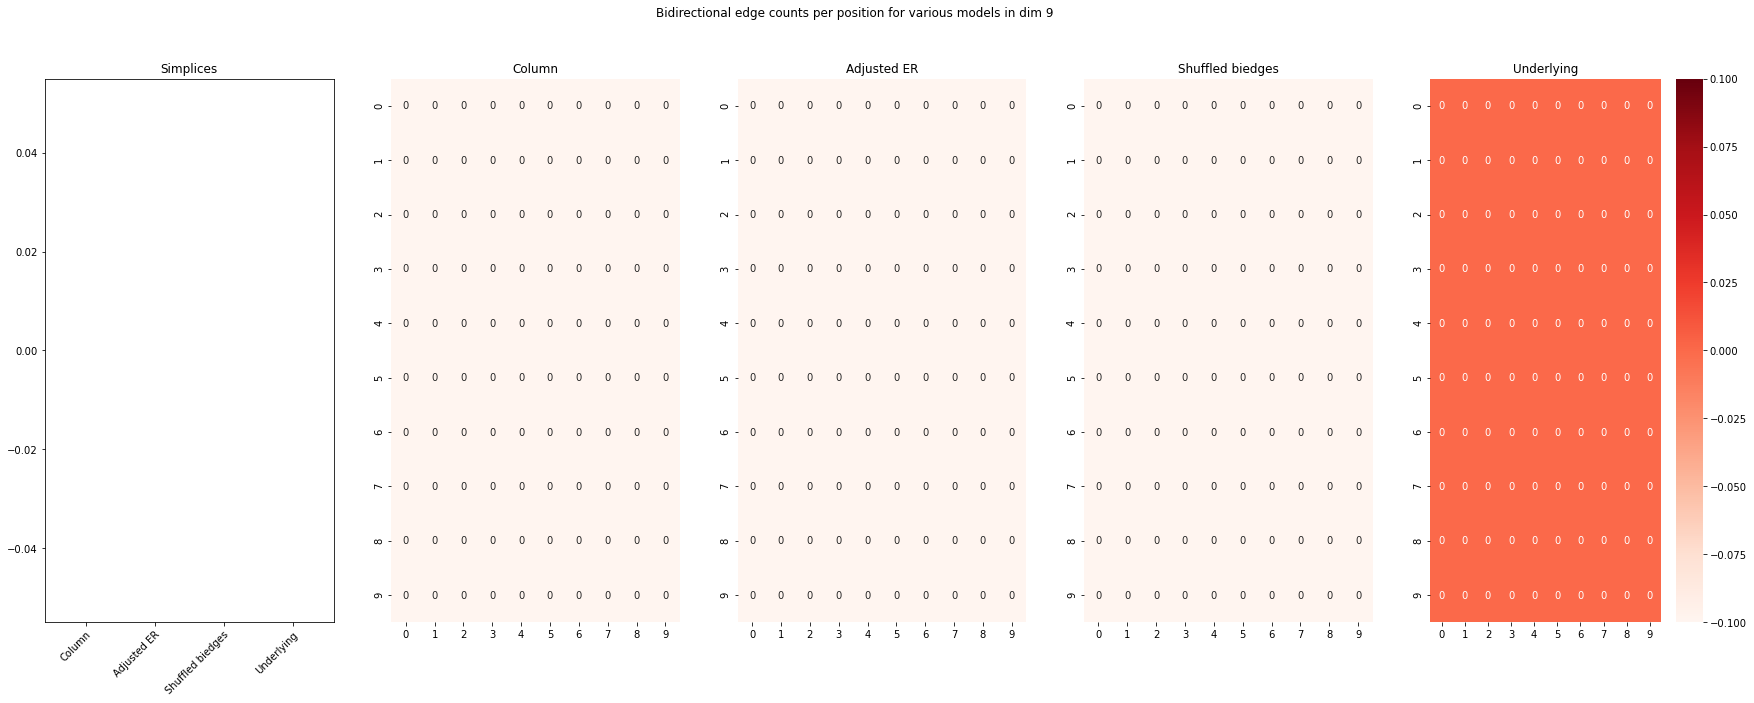

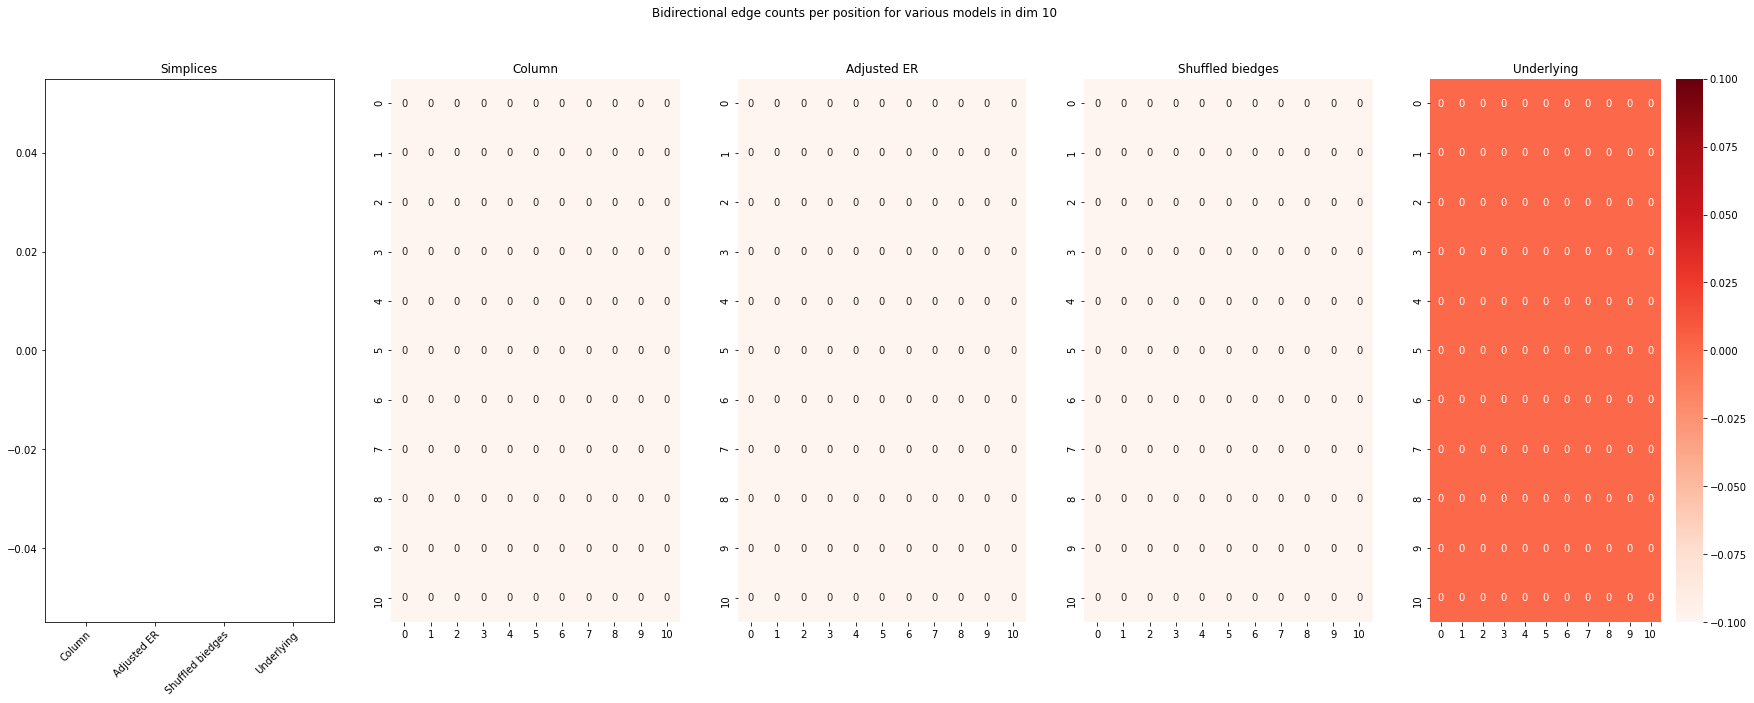

In [39]:
compare_graphs([a,b0,c0,d0], 1, "bcounts_dim")

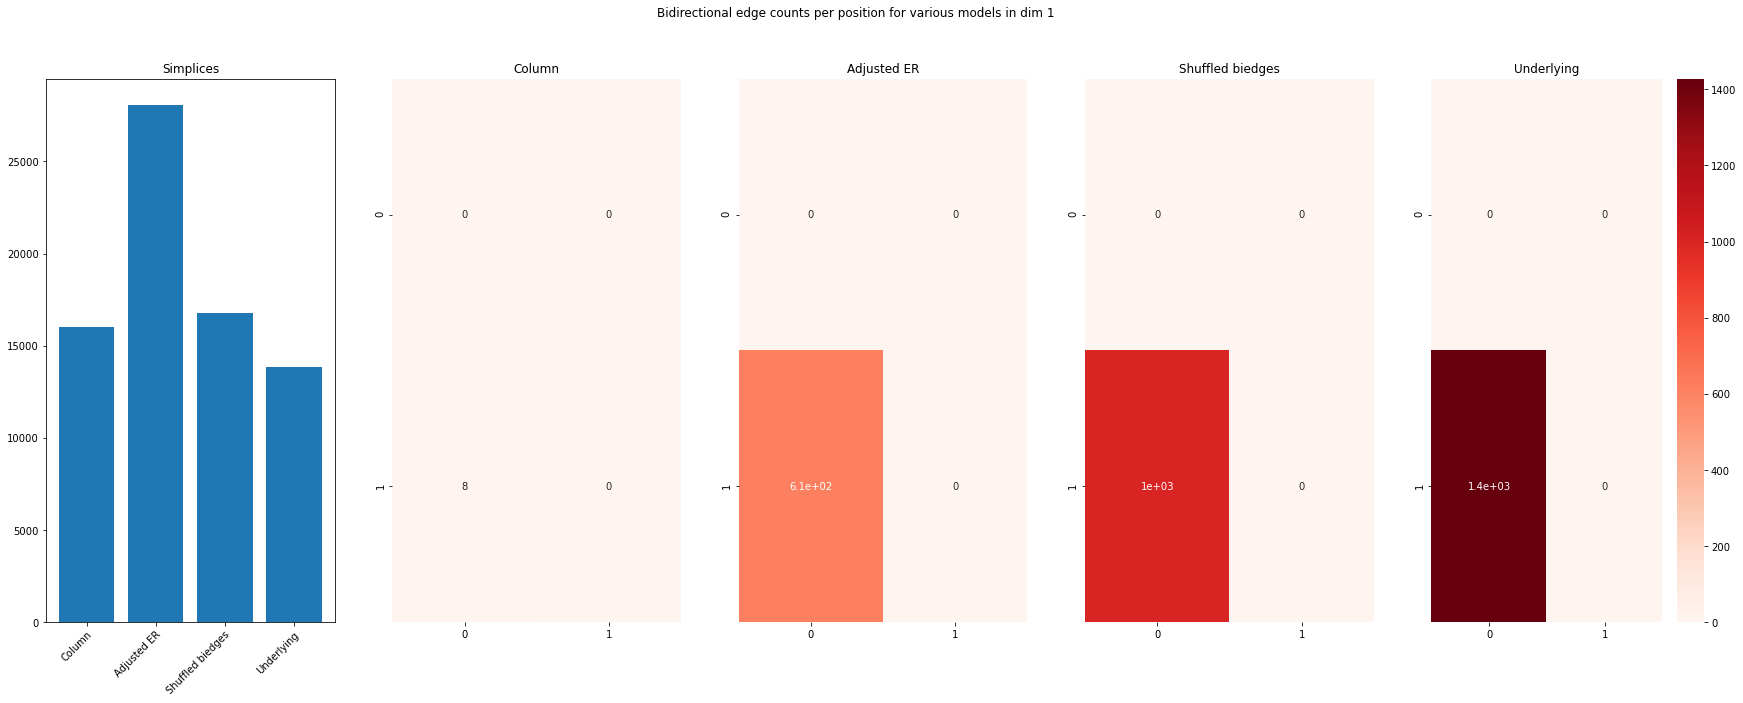

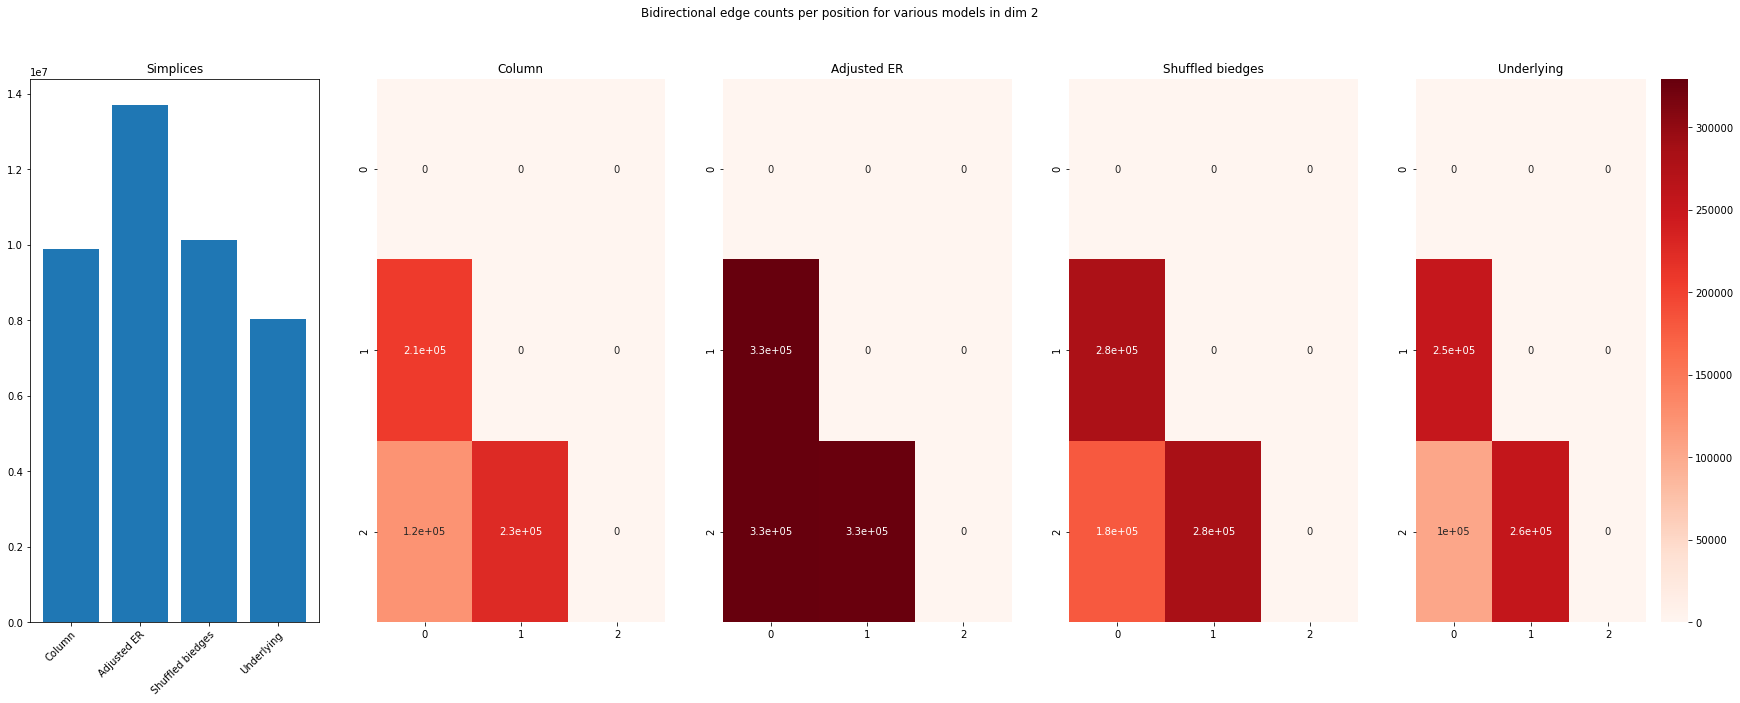

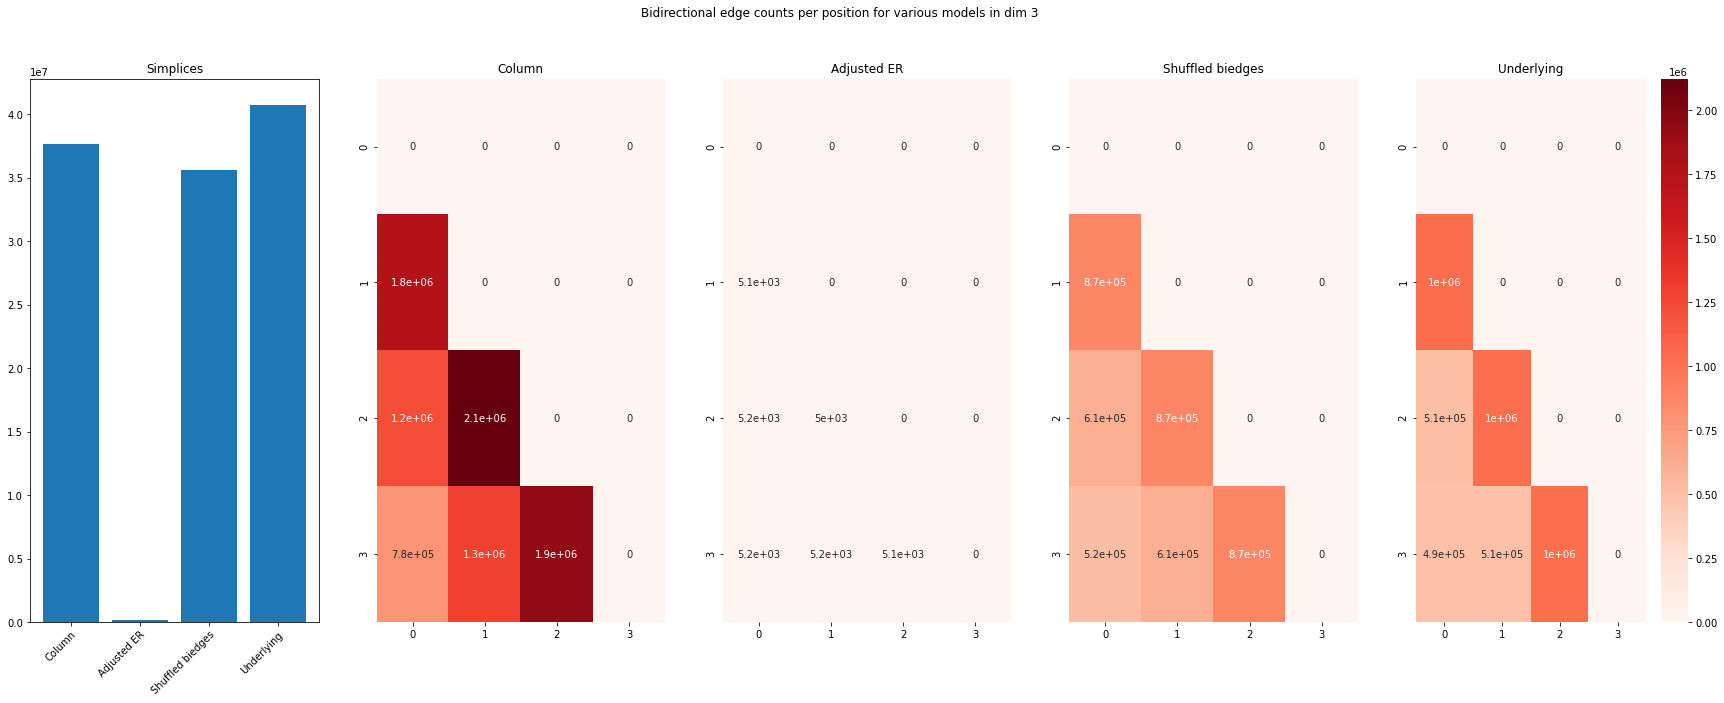

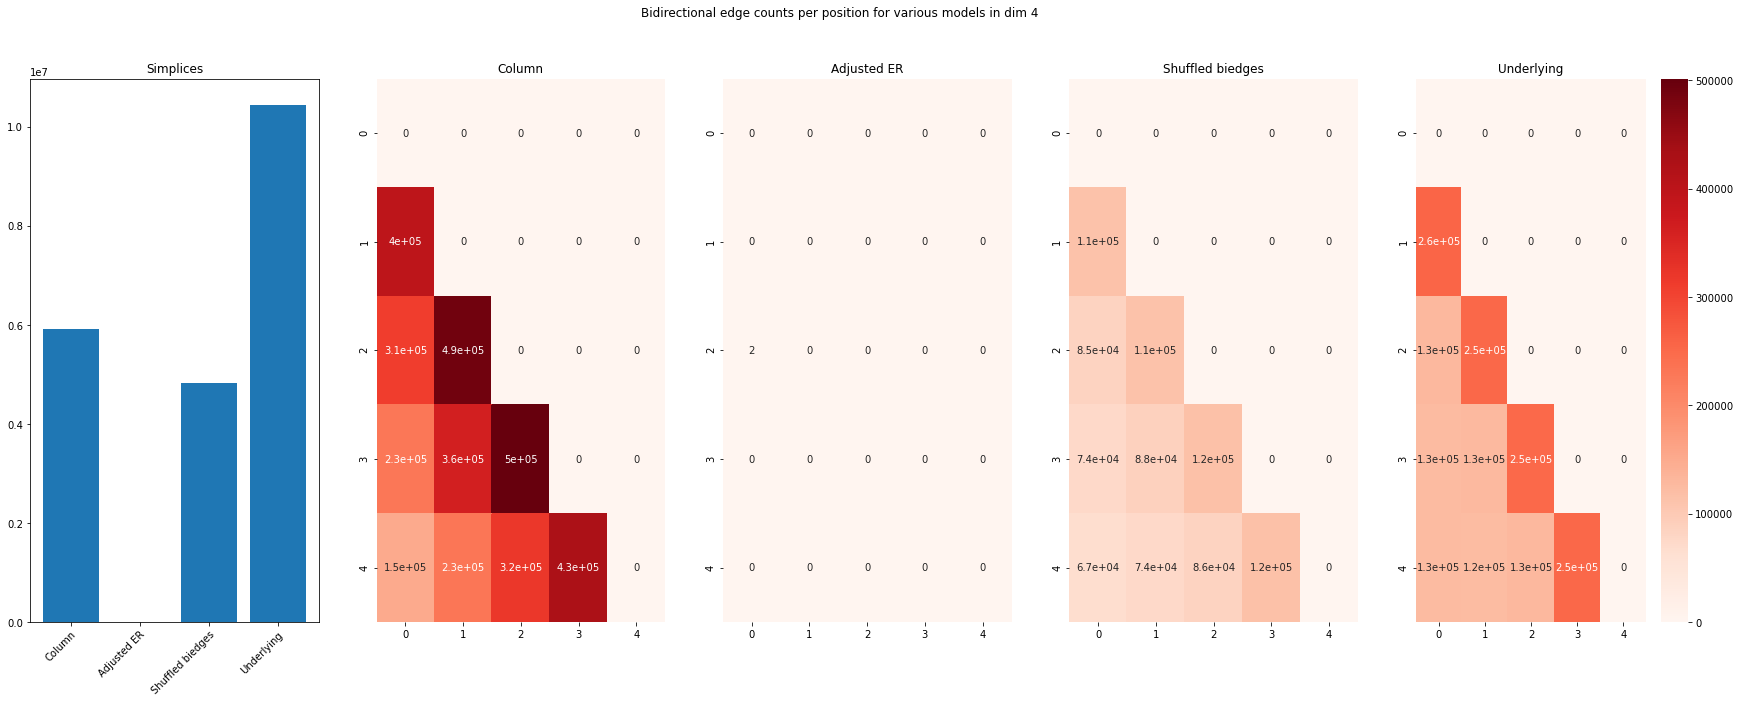

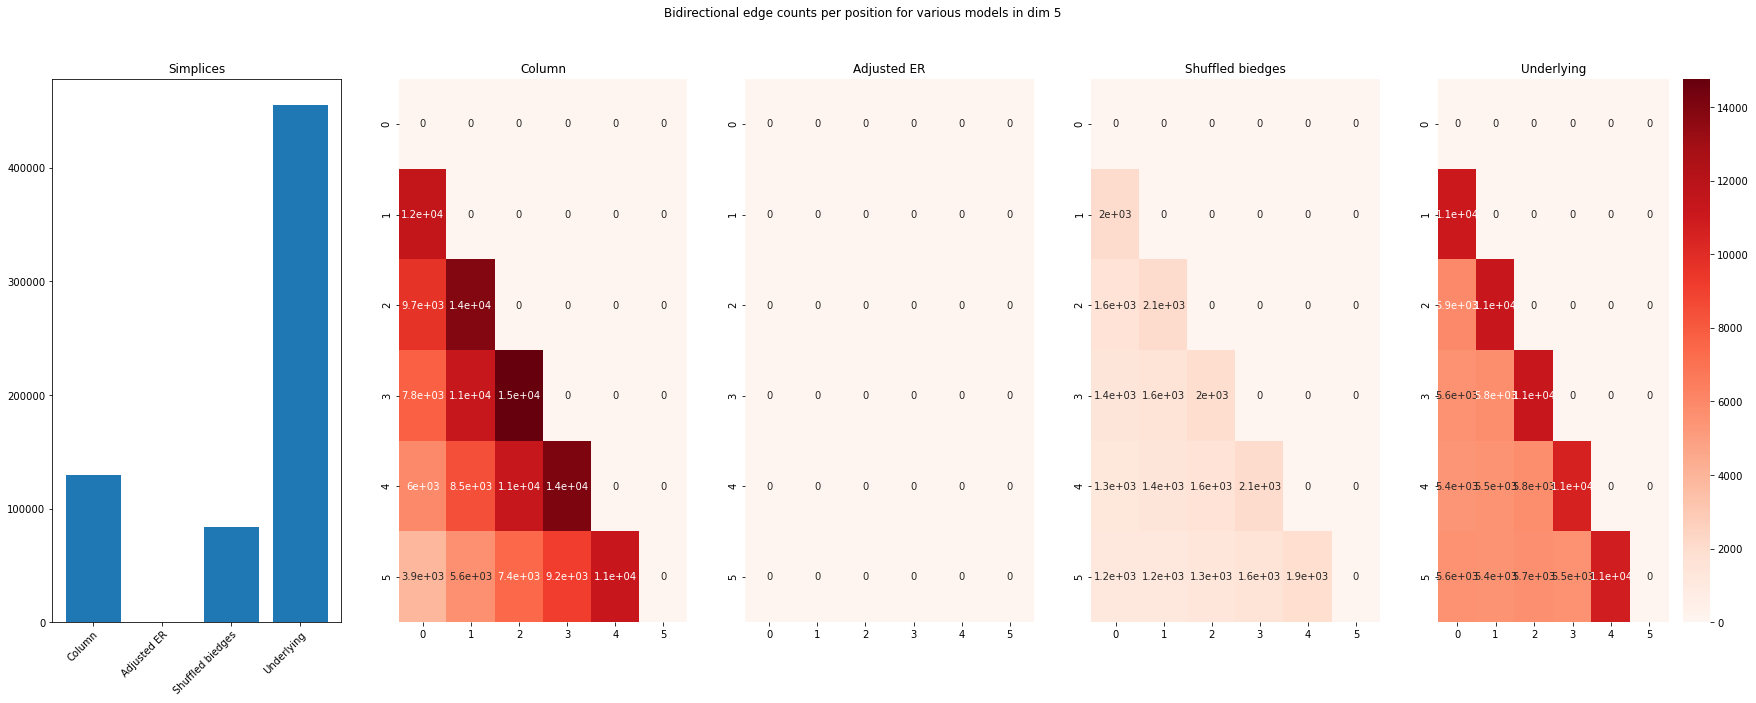

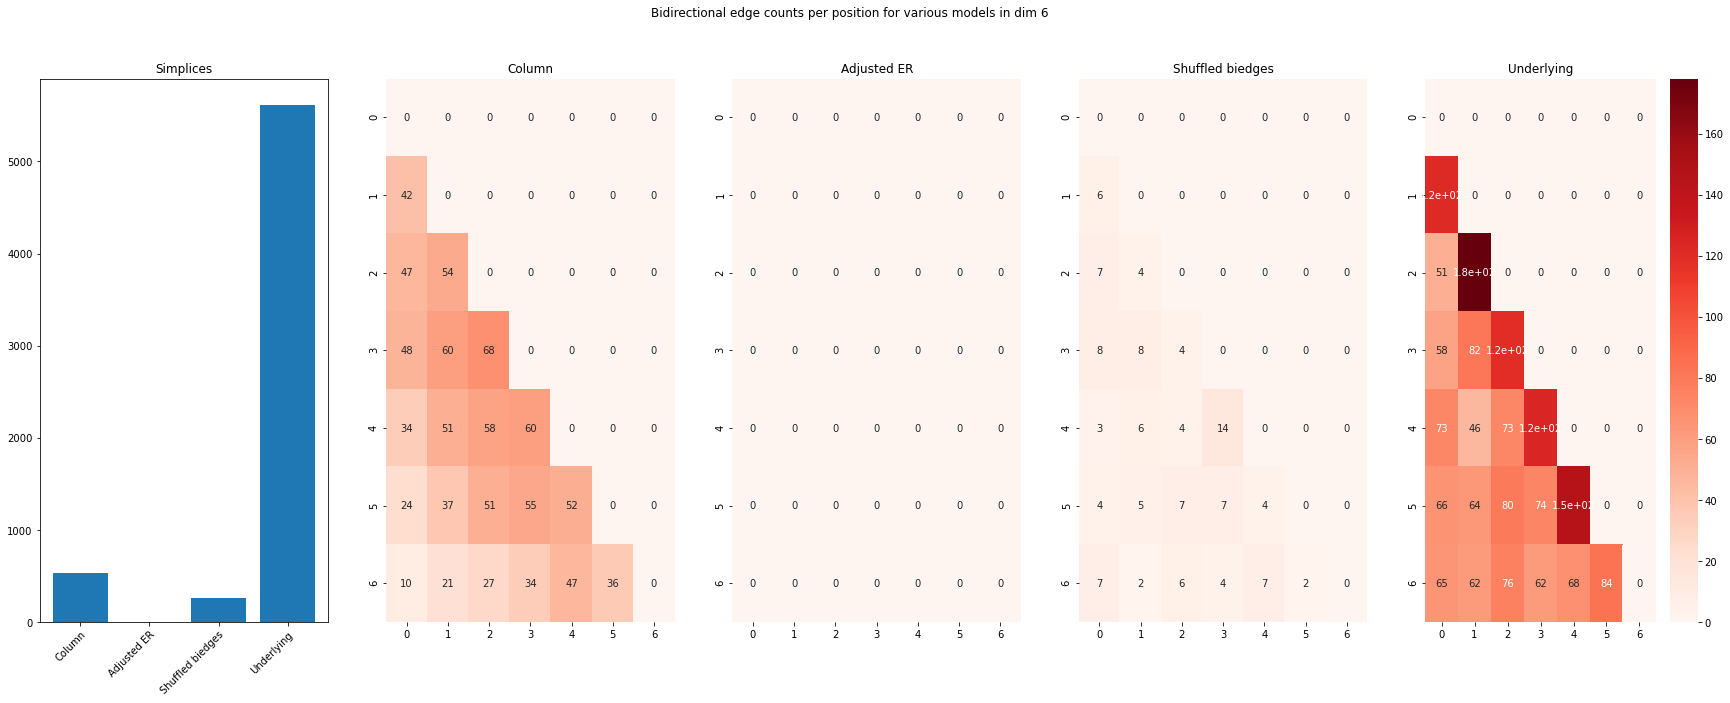

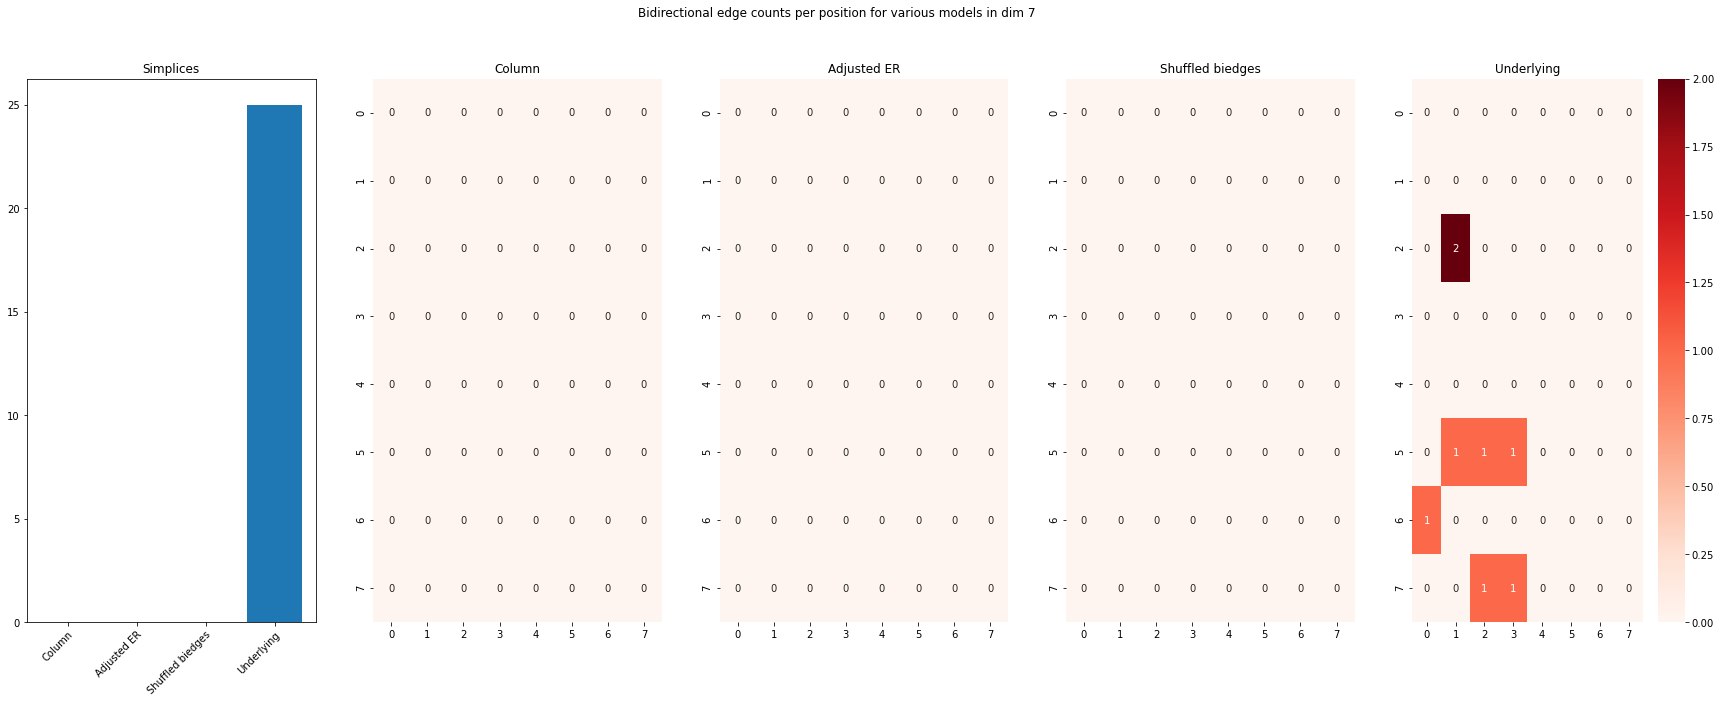

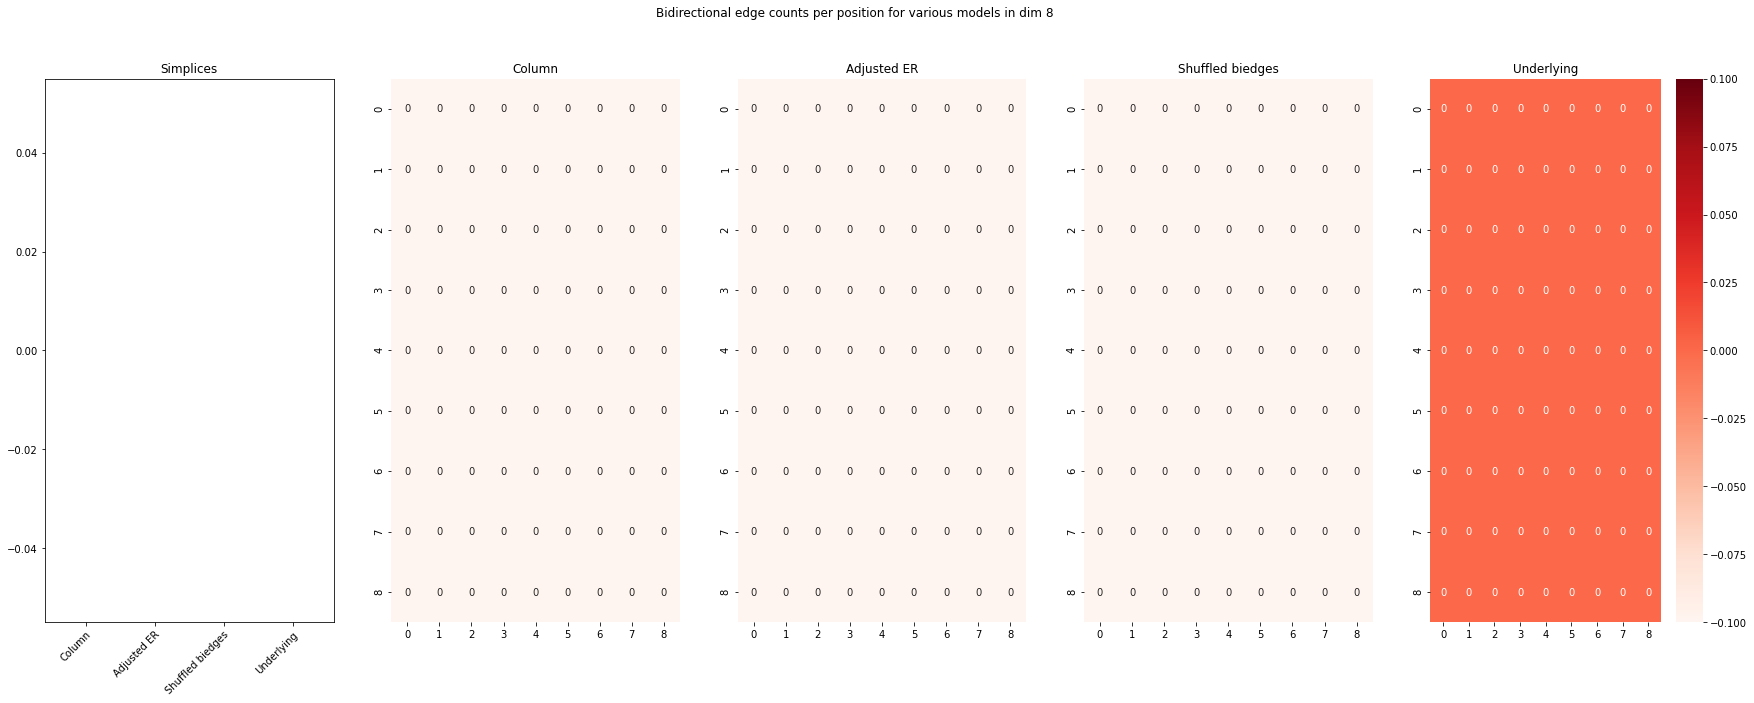

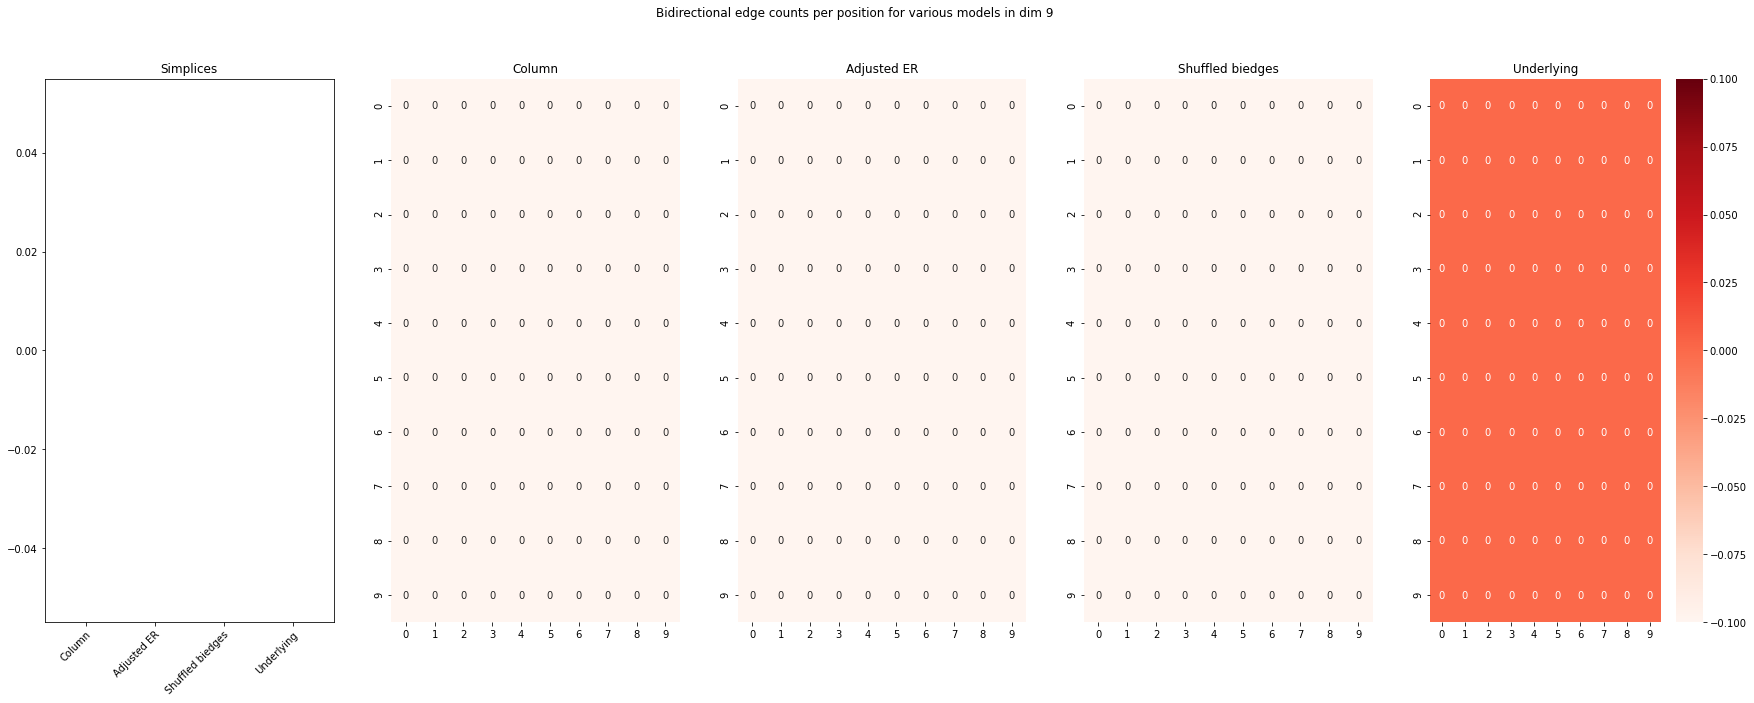

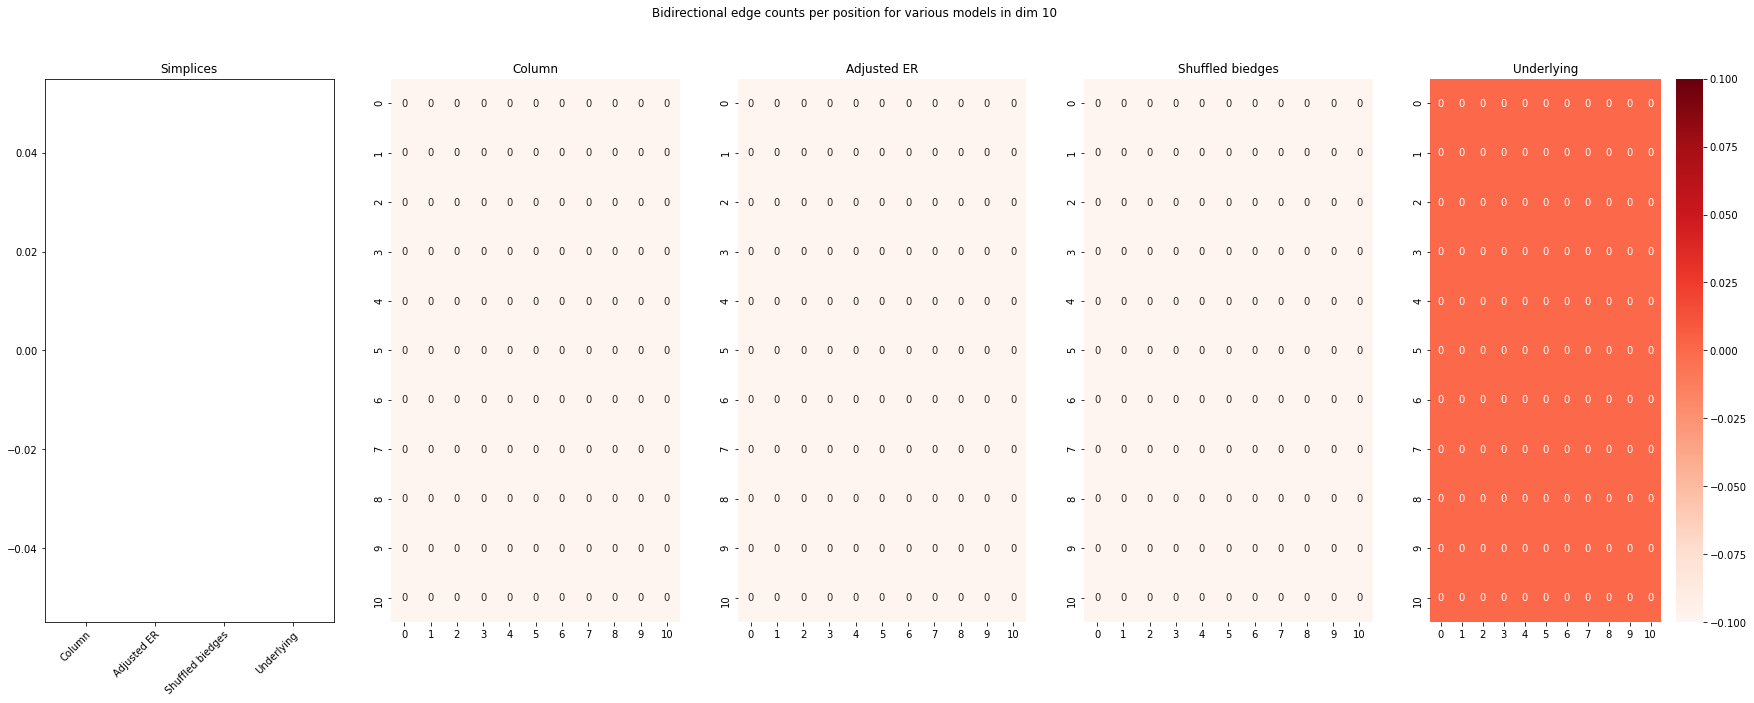

In [40]:
compare_graphs([amax,bmax,cmax,dmax], 1, "mbcounts_dim")

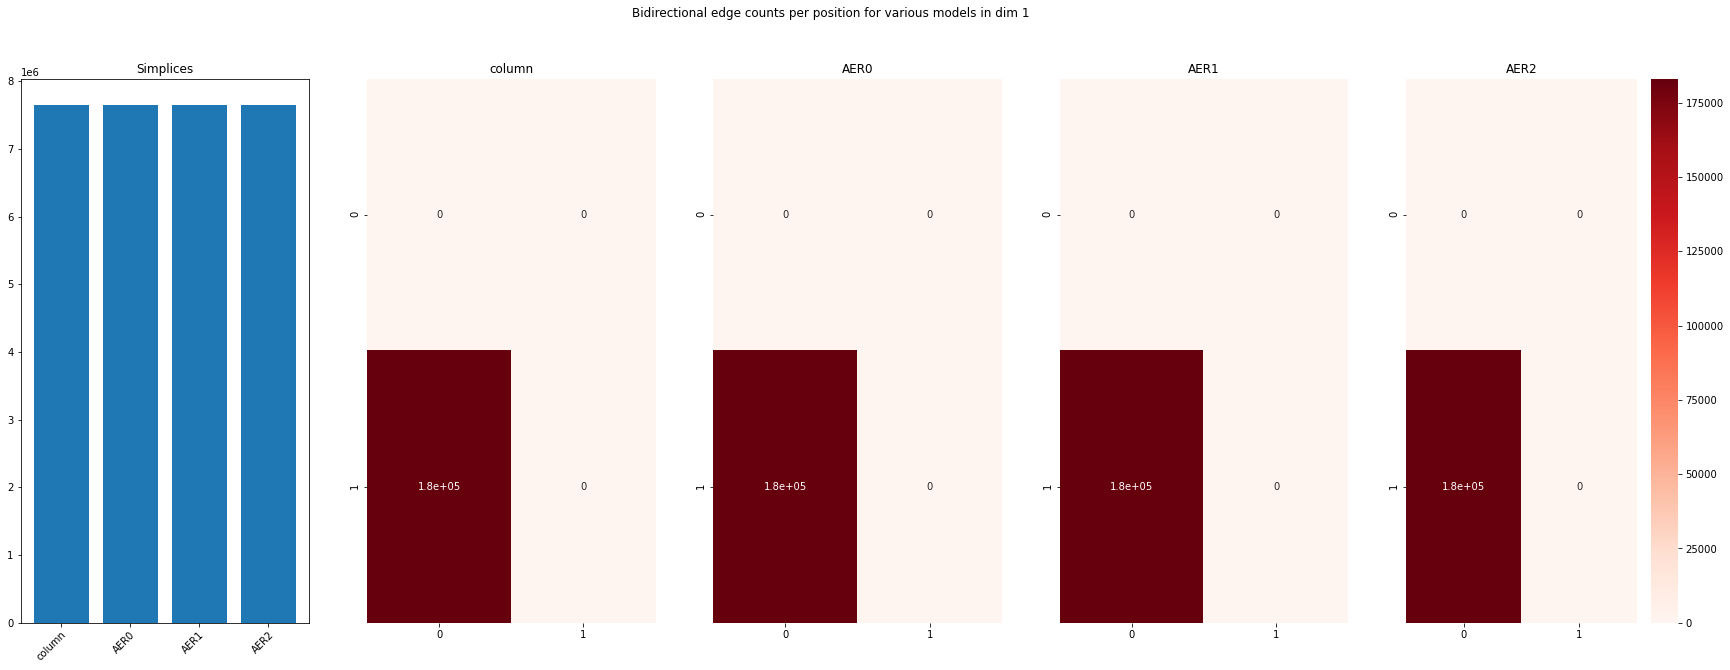

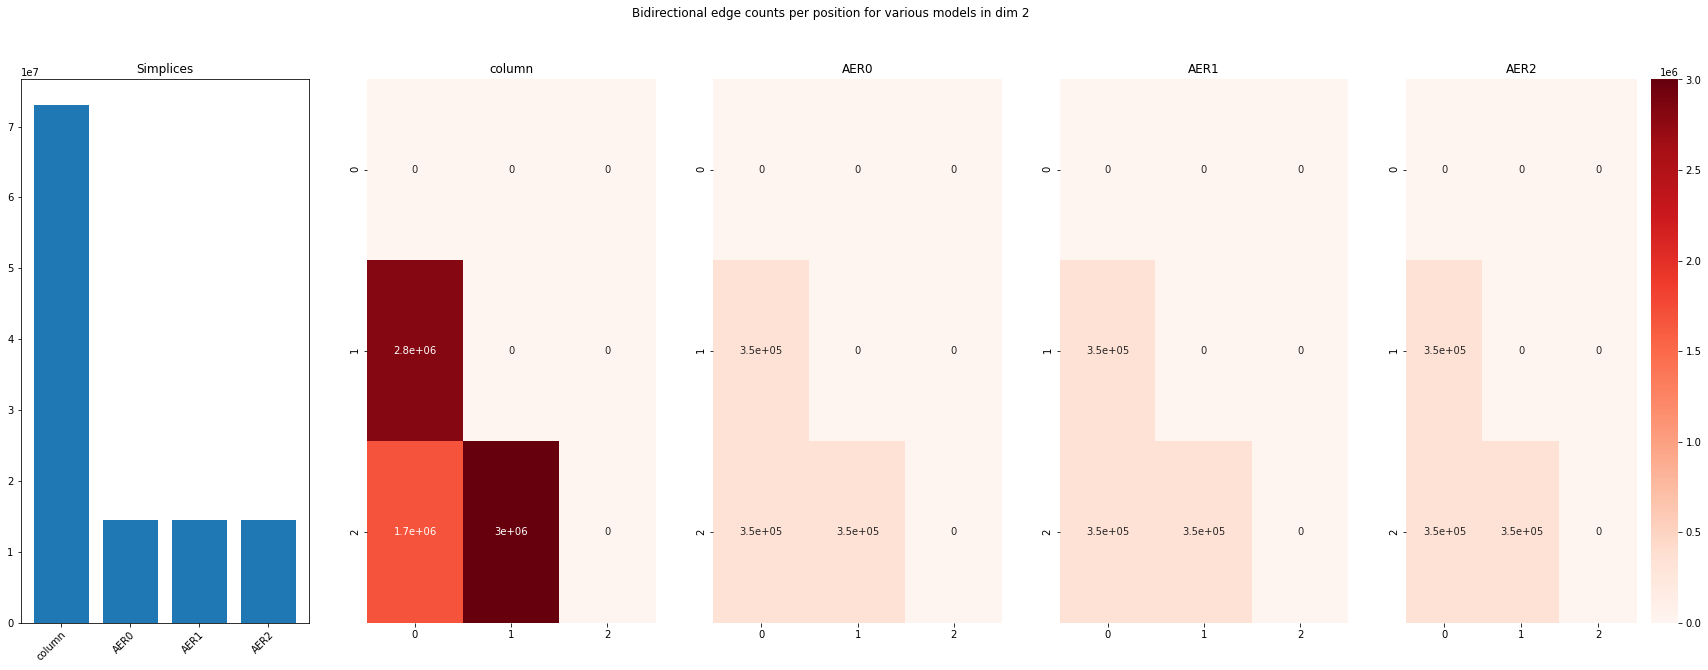

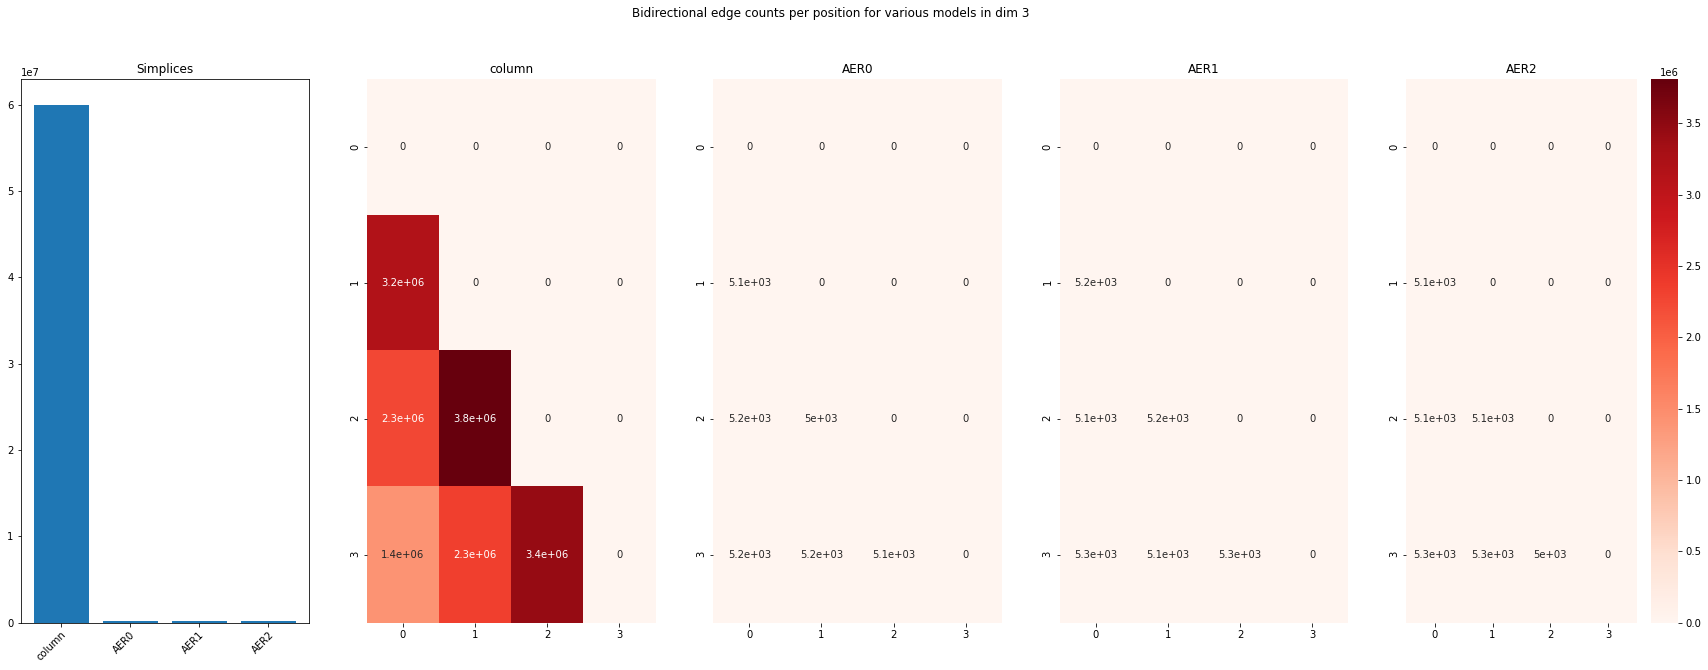

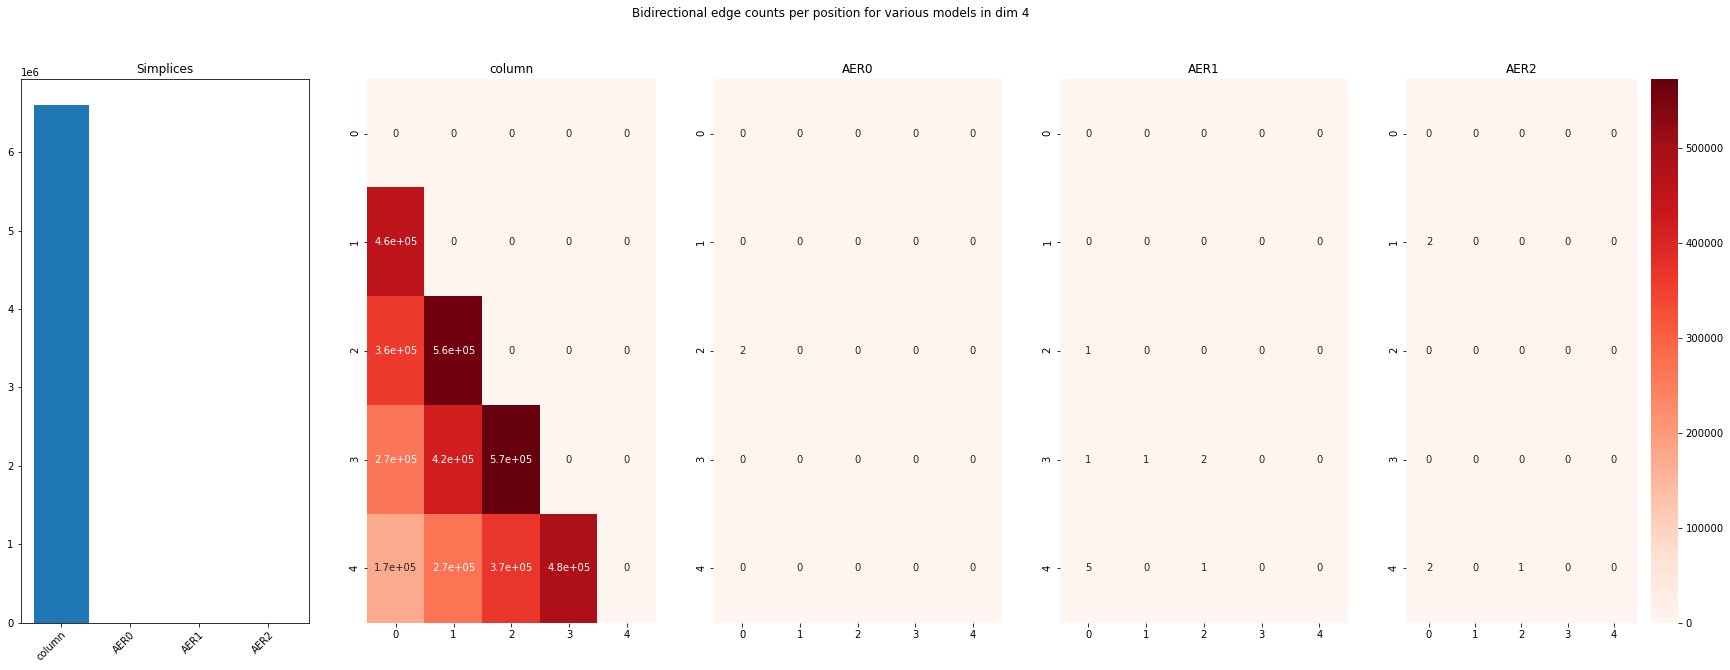

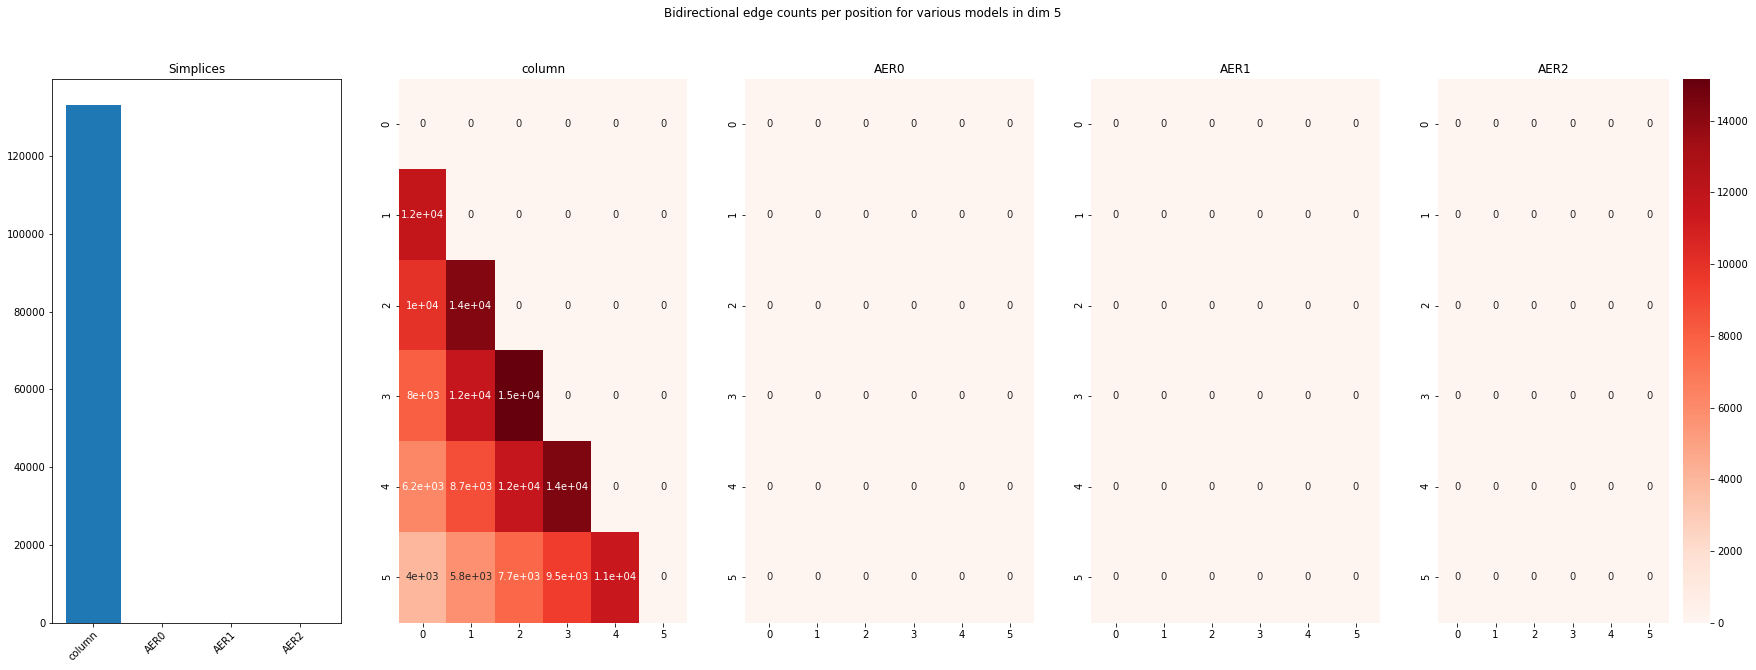

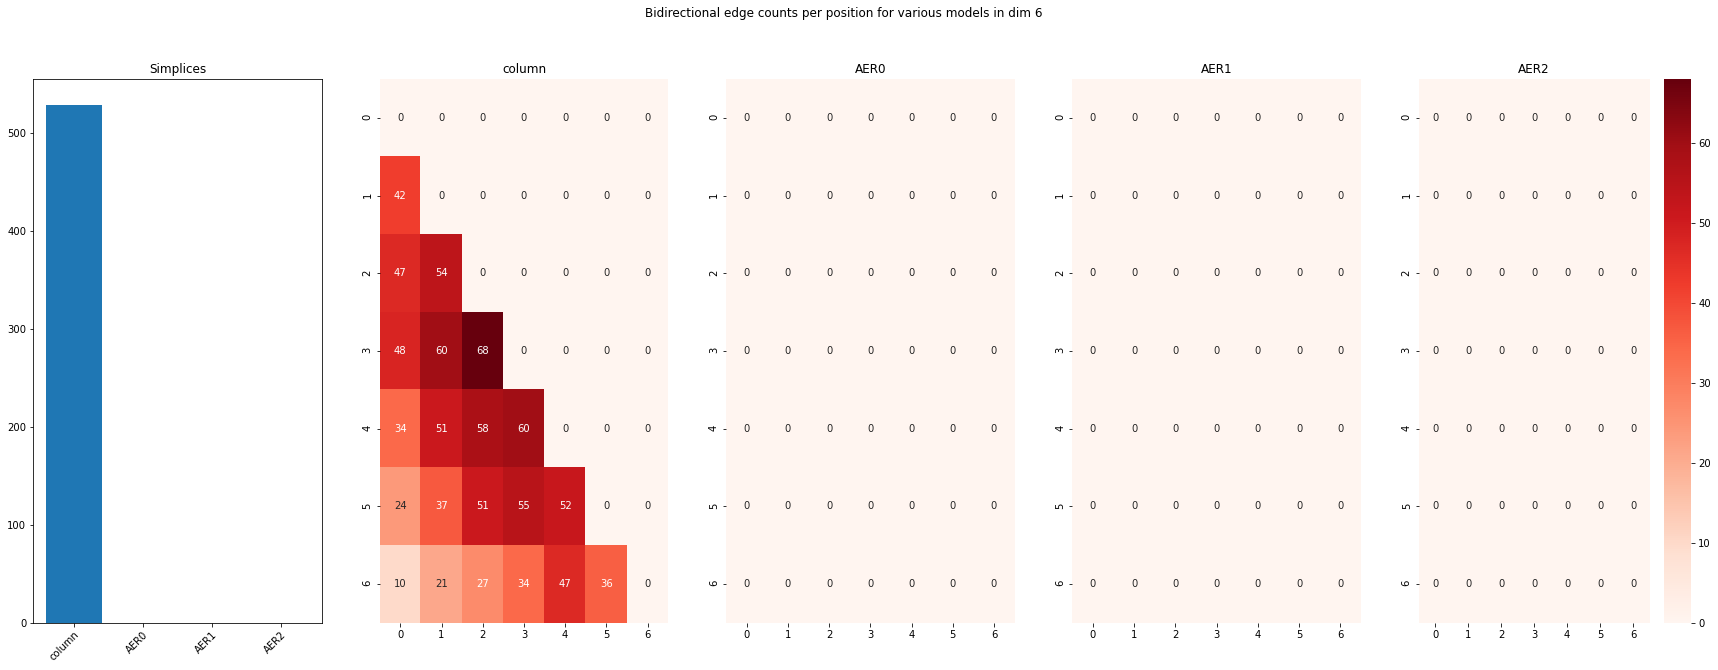

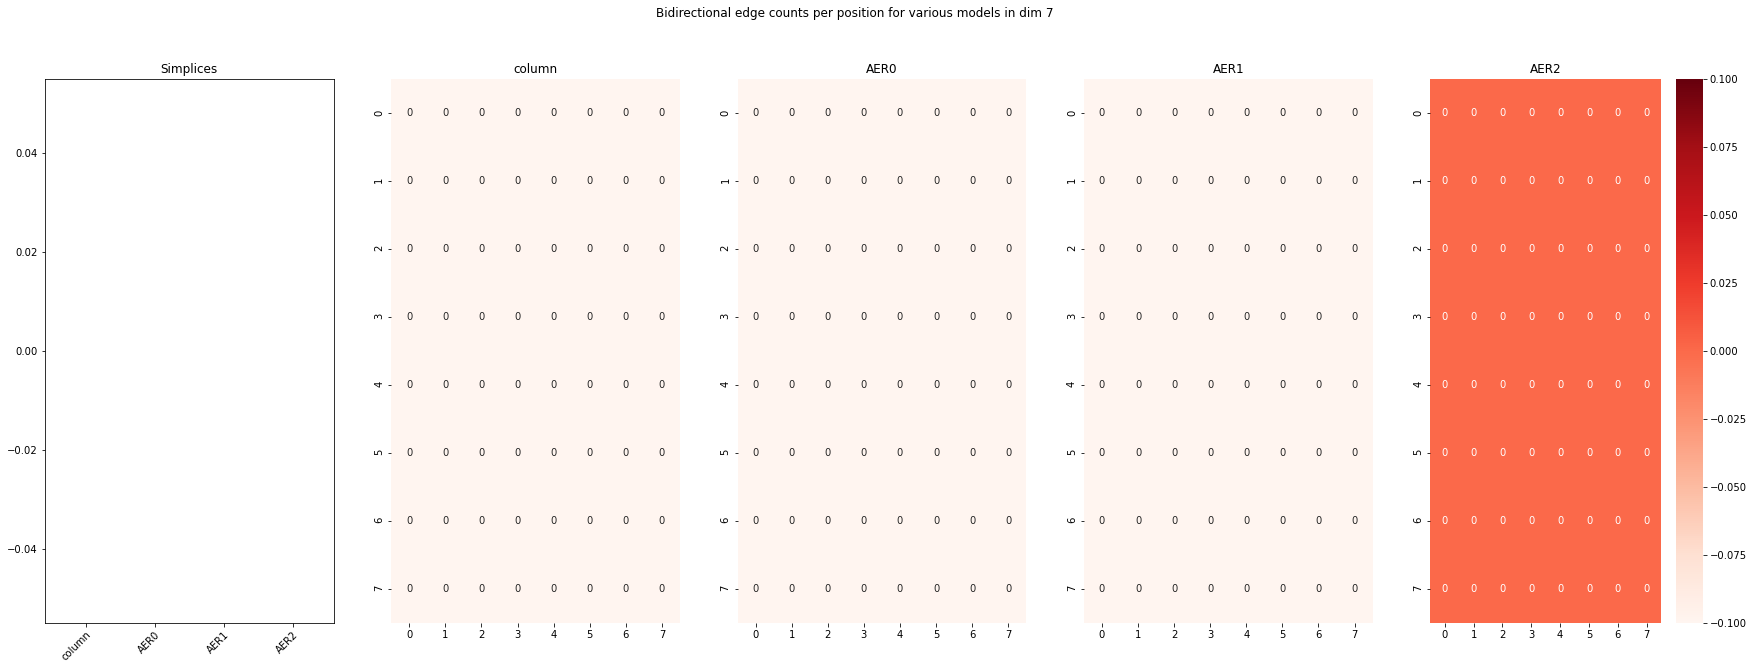

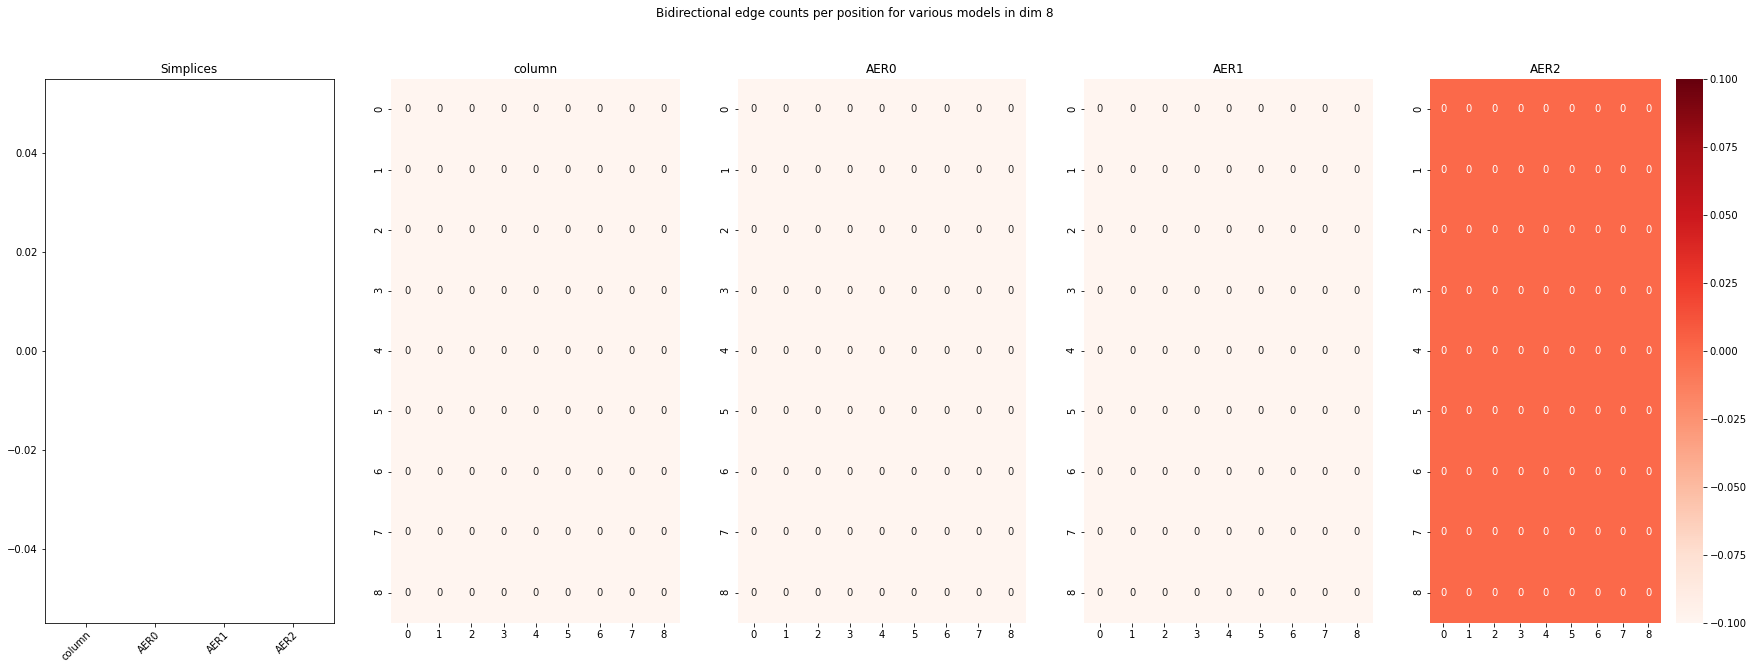

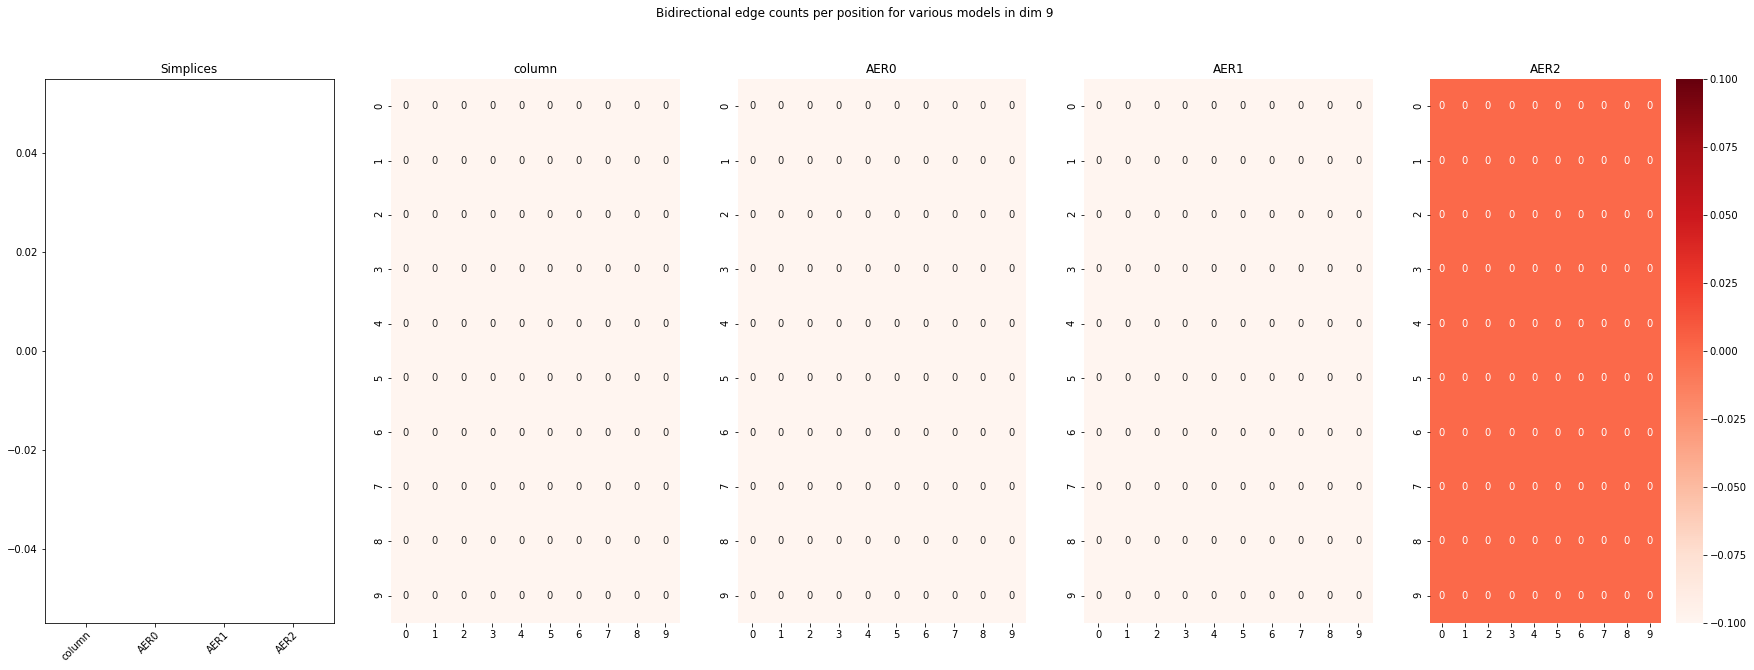

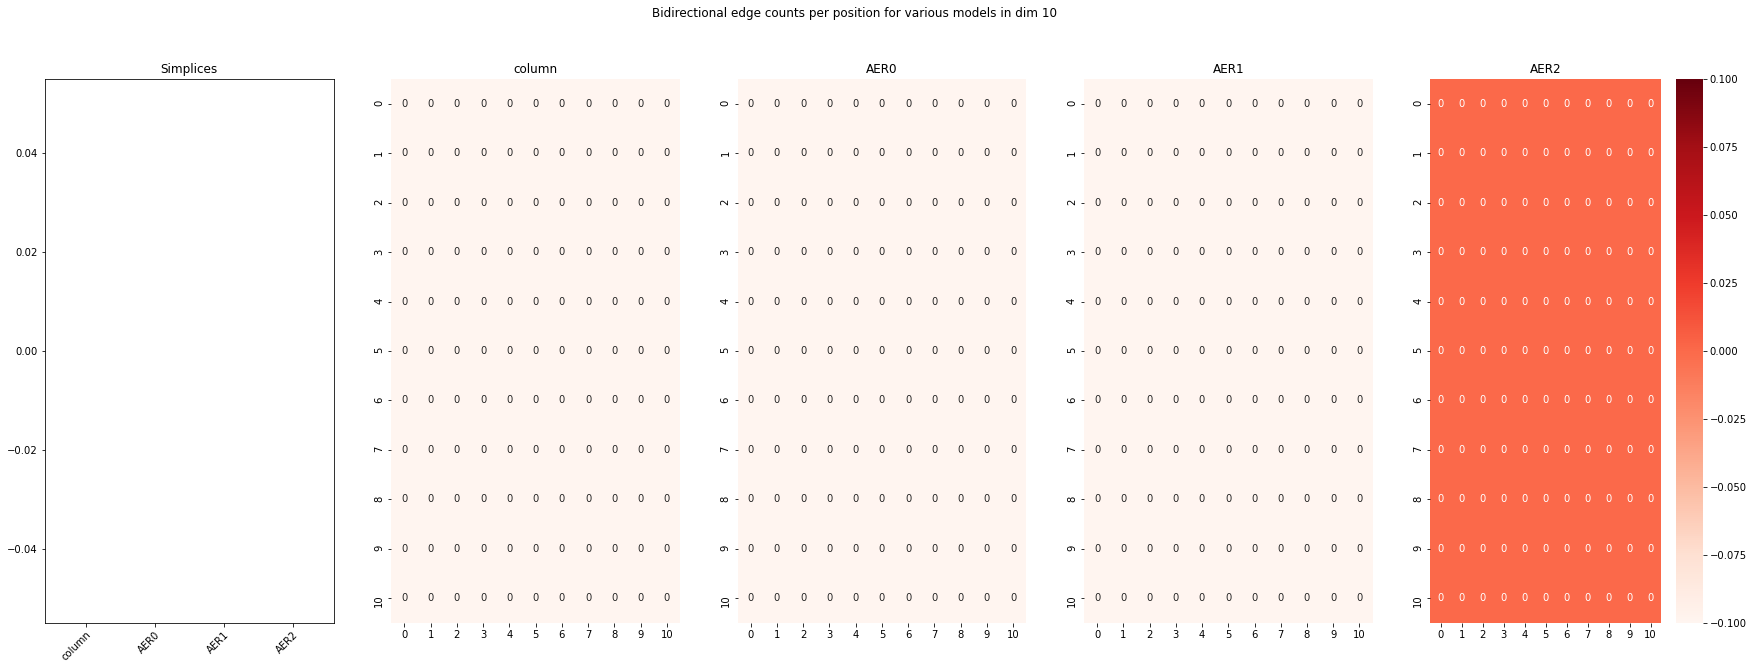

In [41]:
compare_graphs([a,b0,b1,b2], 1, "variance_dim", title_list = ["Simplices", "column", "AER0", "AER1", "AER2"])

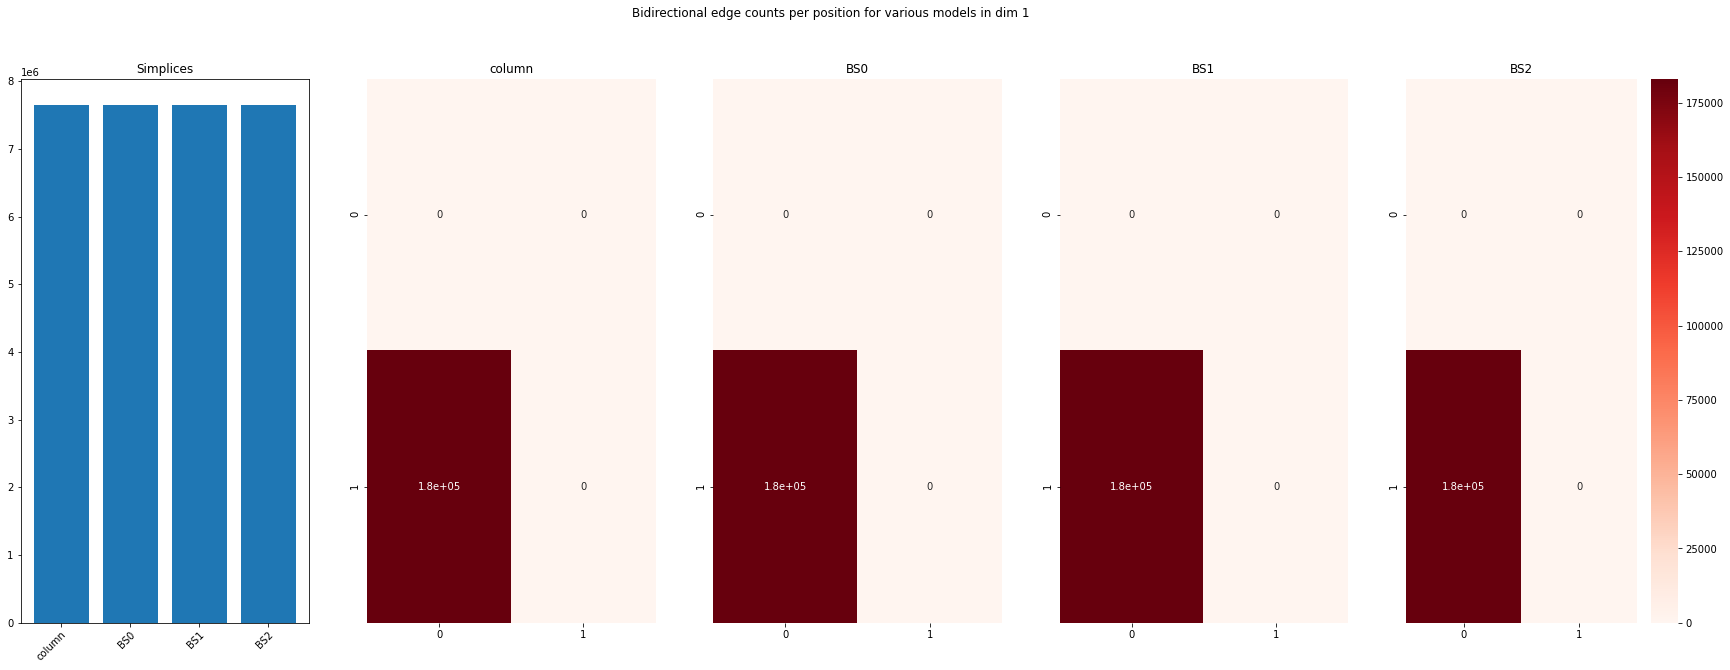

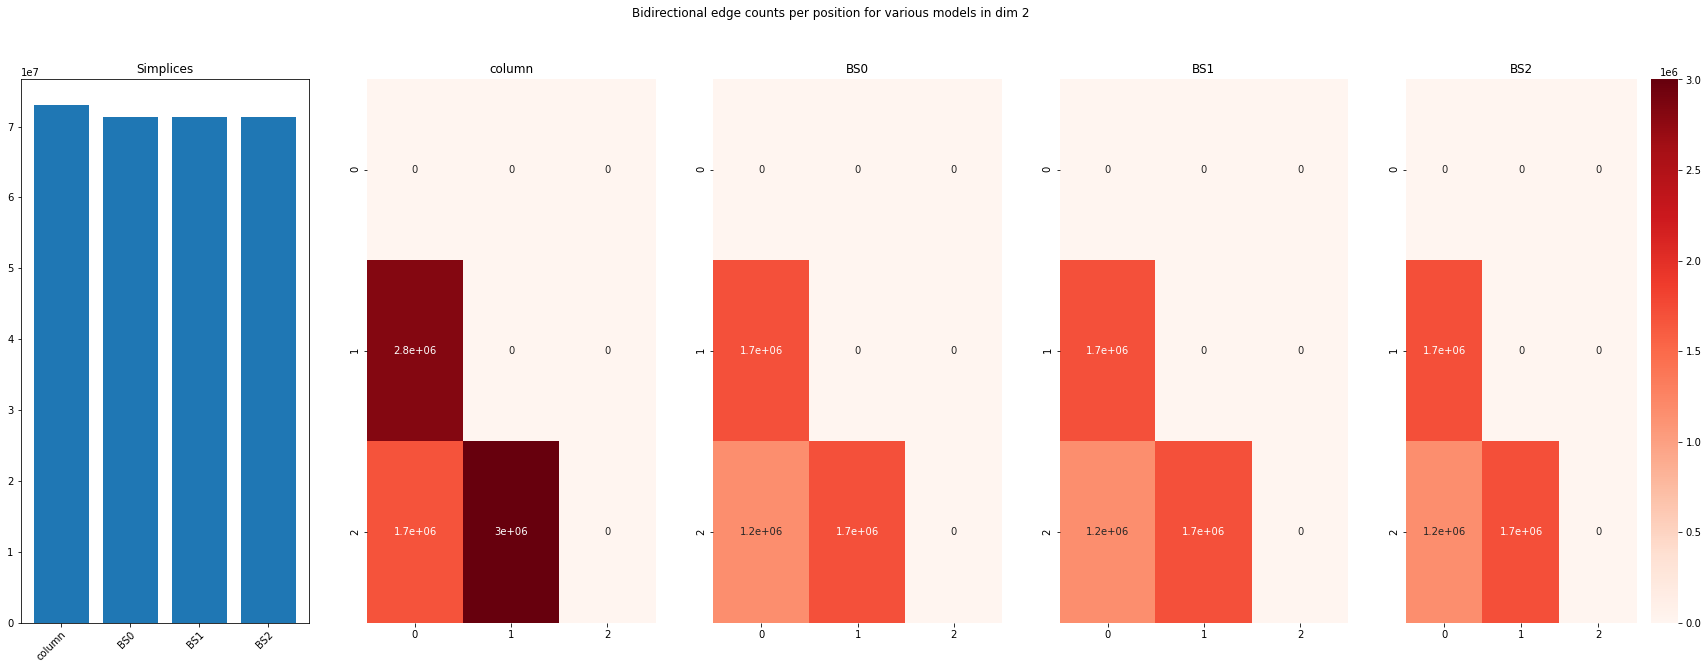

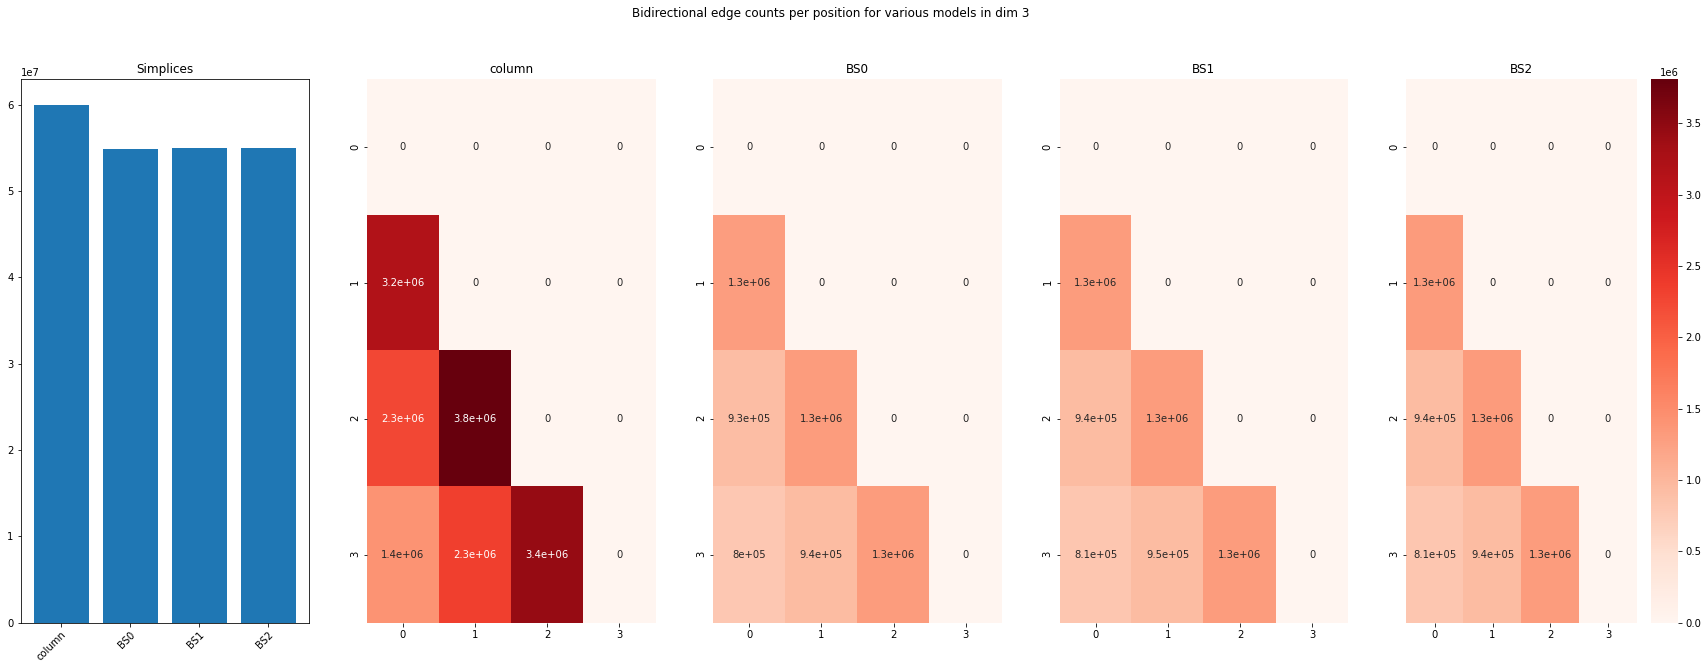

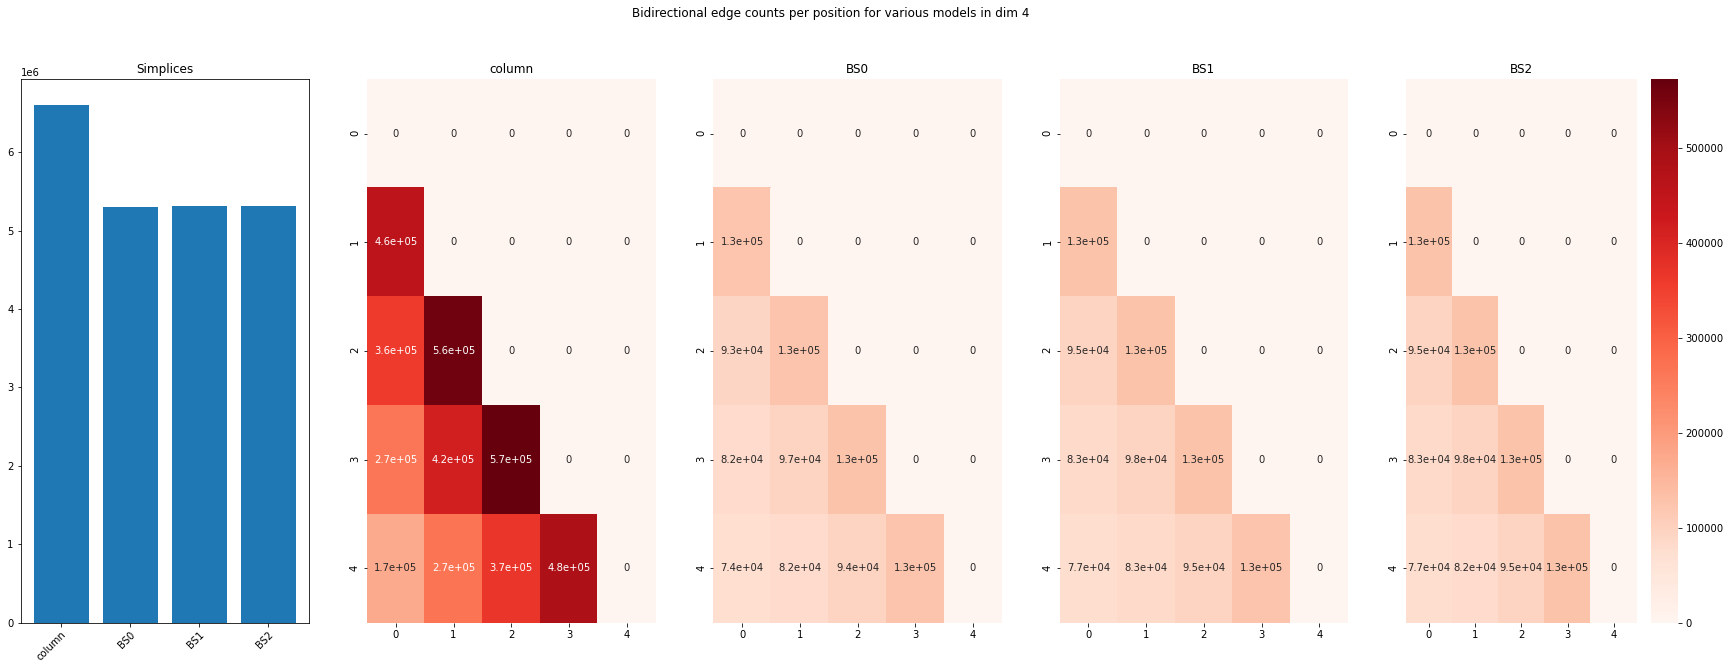

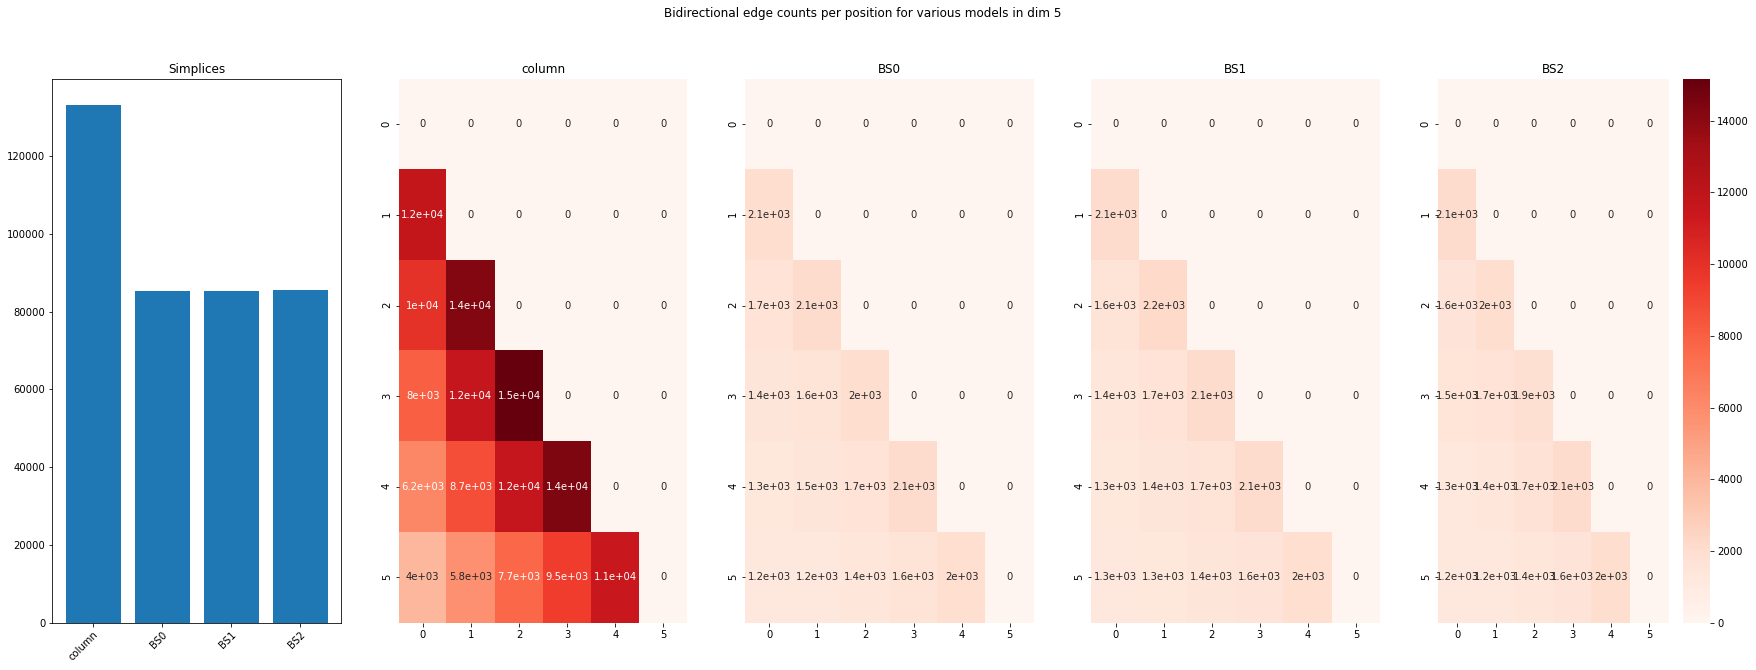

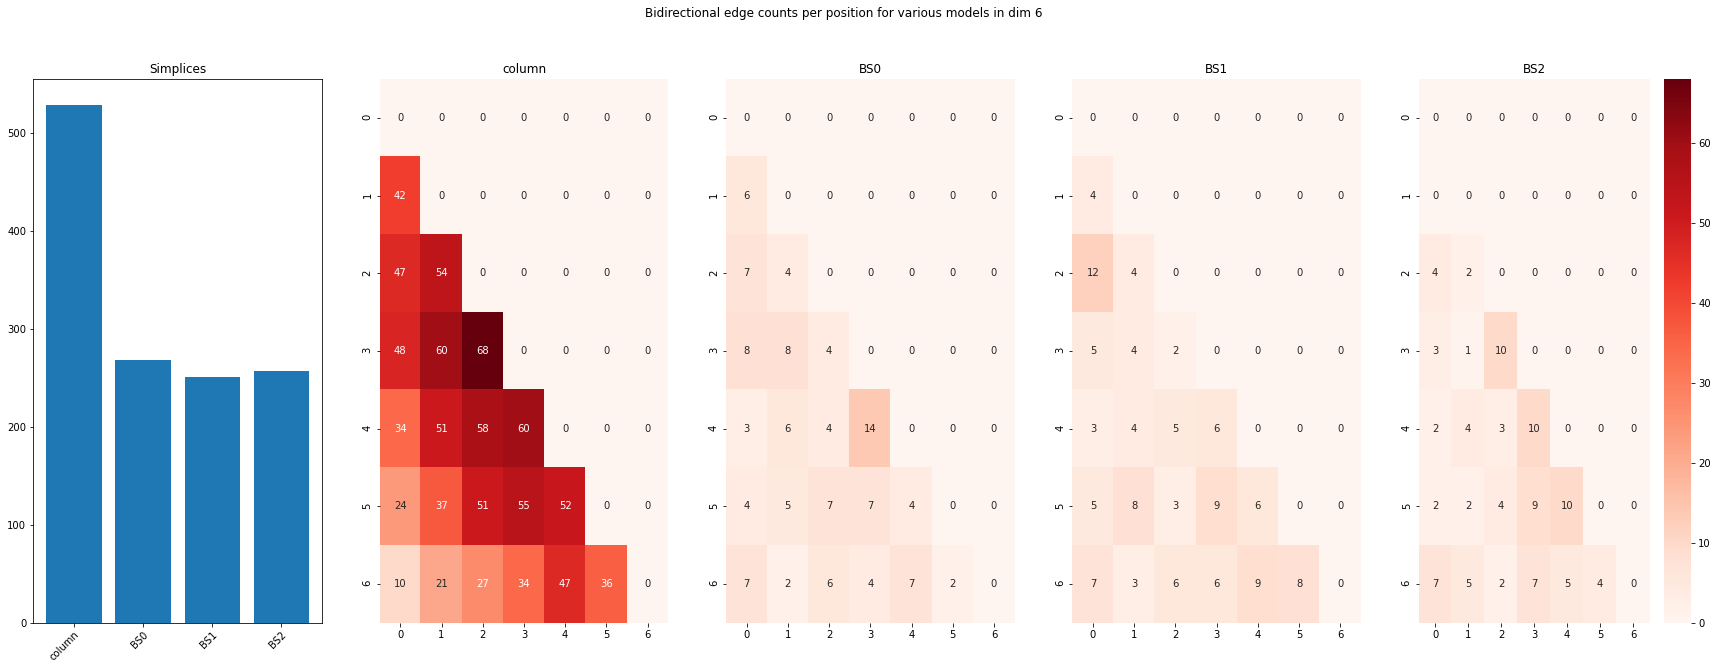

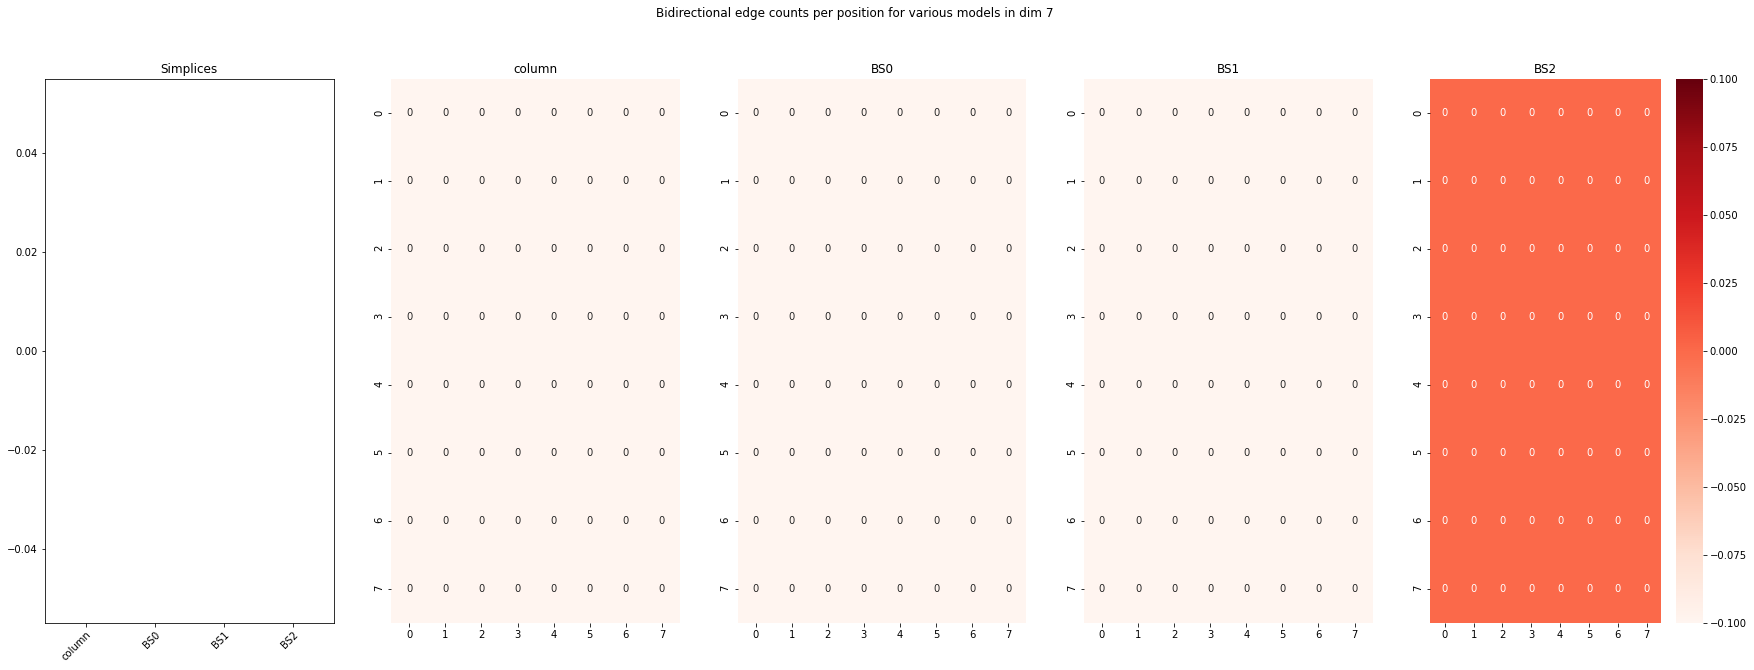

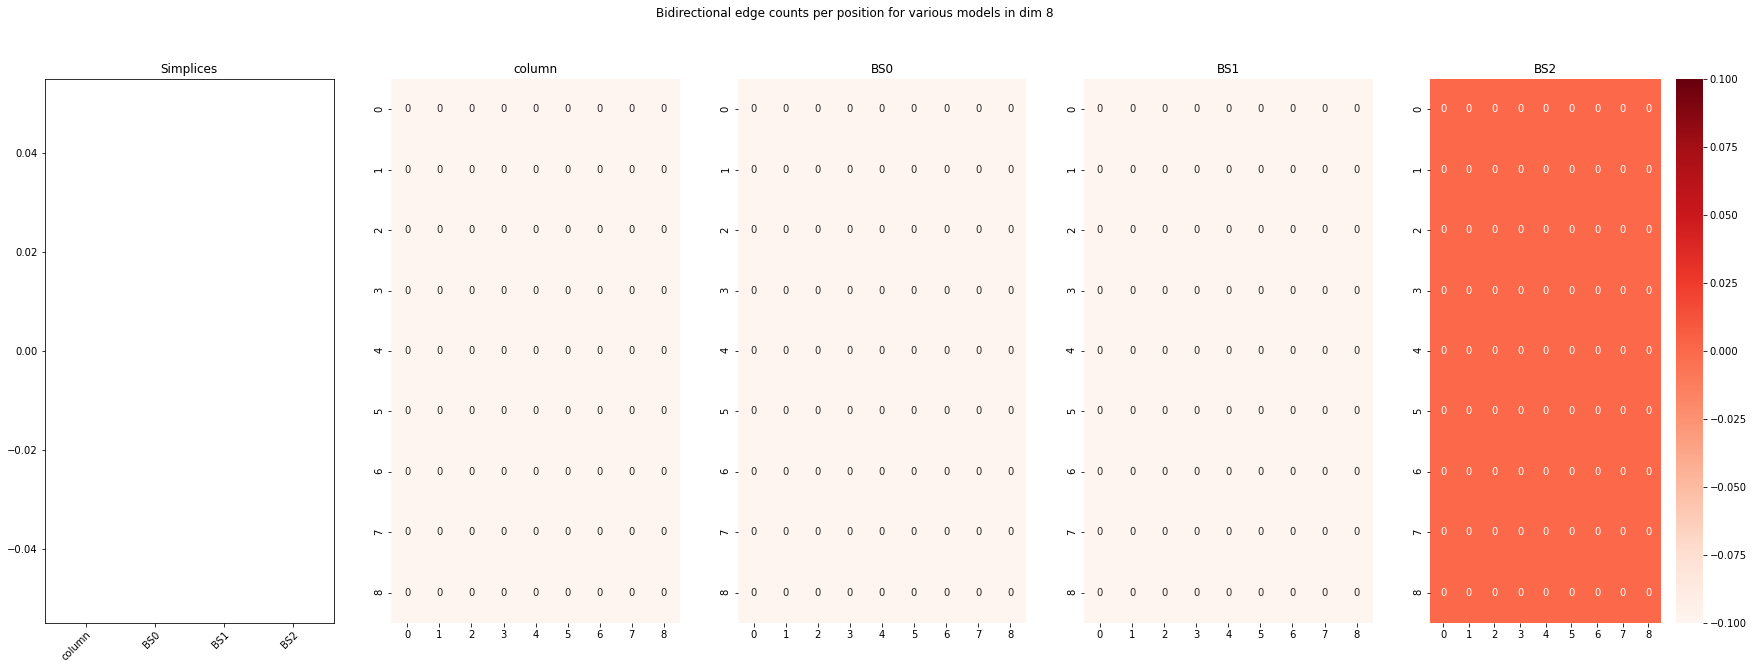

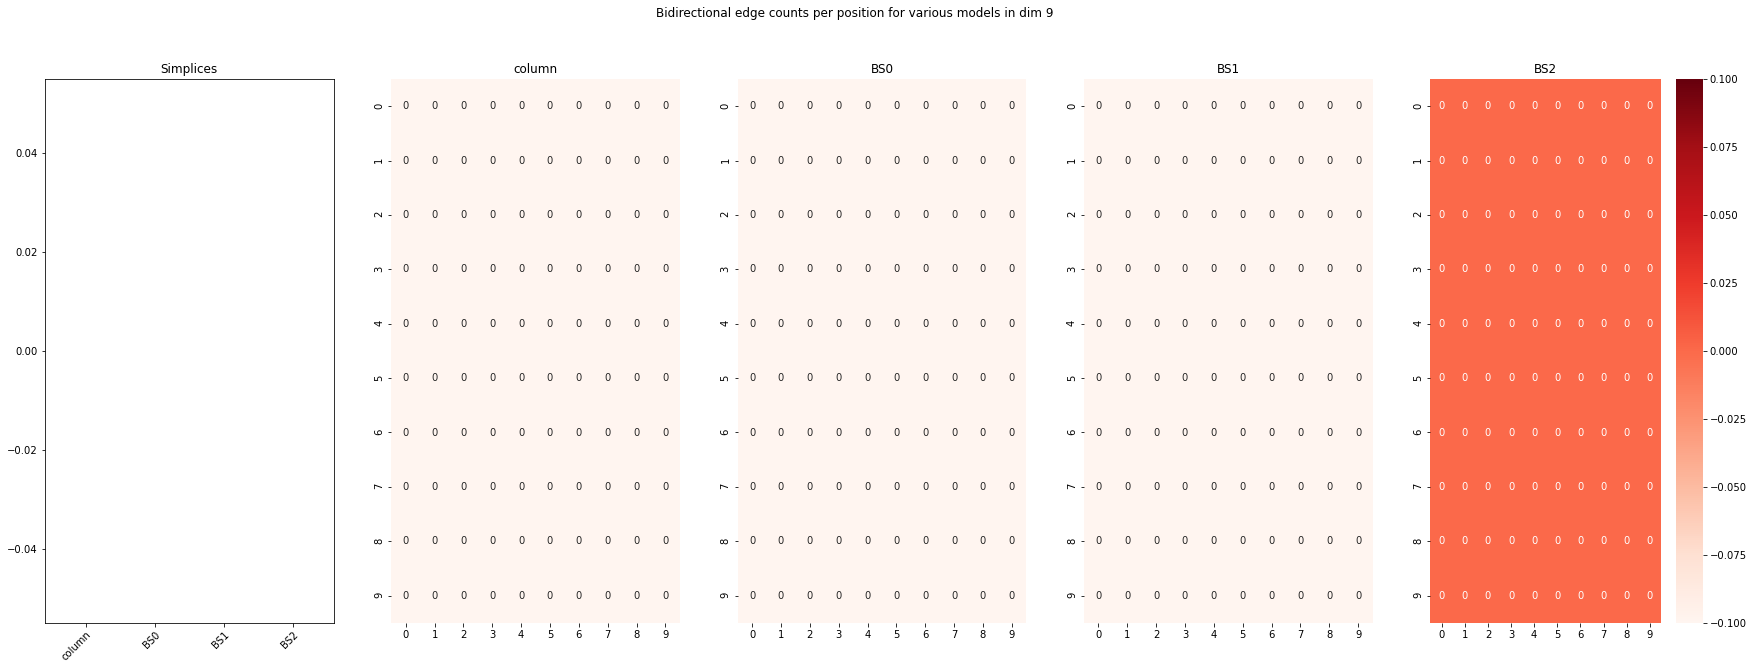

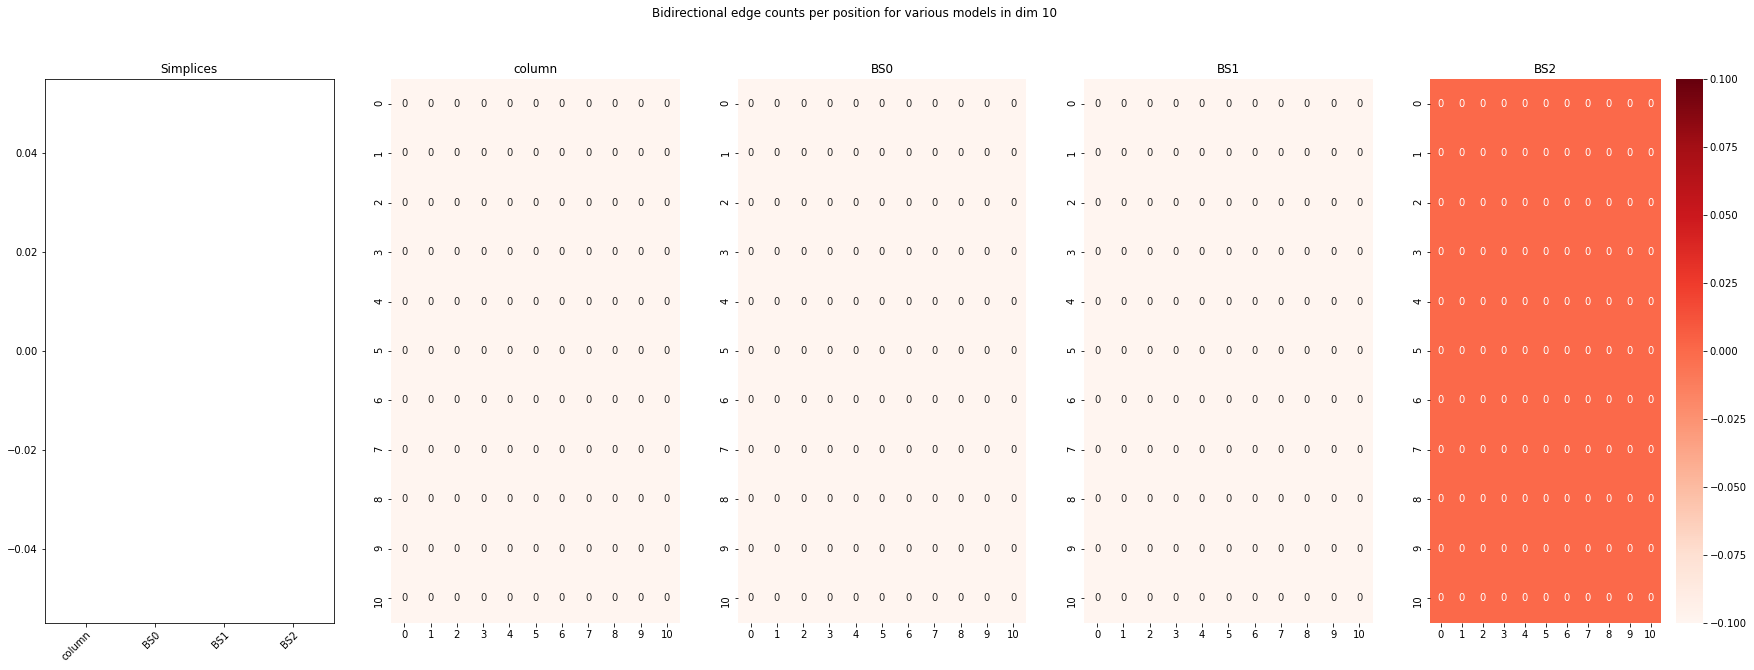

In [42]:
compare_graphs([a,c0,c1,c2], 1, "variance_dim_bshuffled", title_list = ["Simplices", "column", "BS0", "BS1", "BS2"])

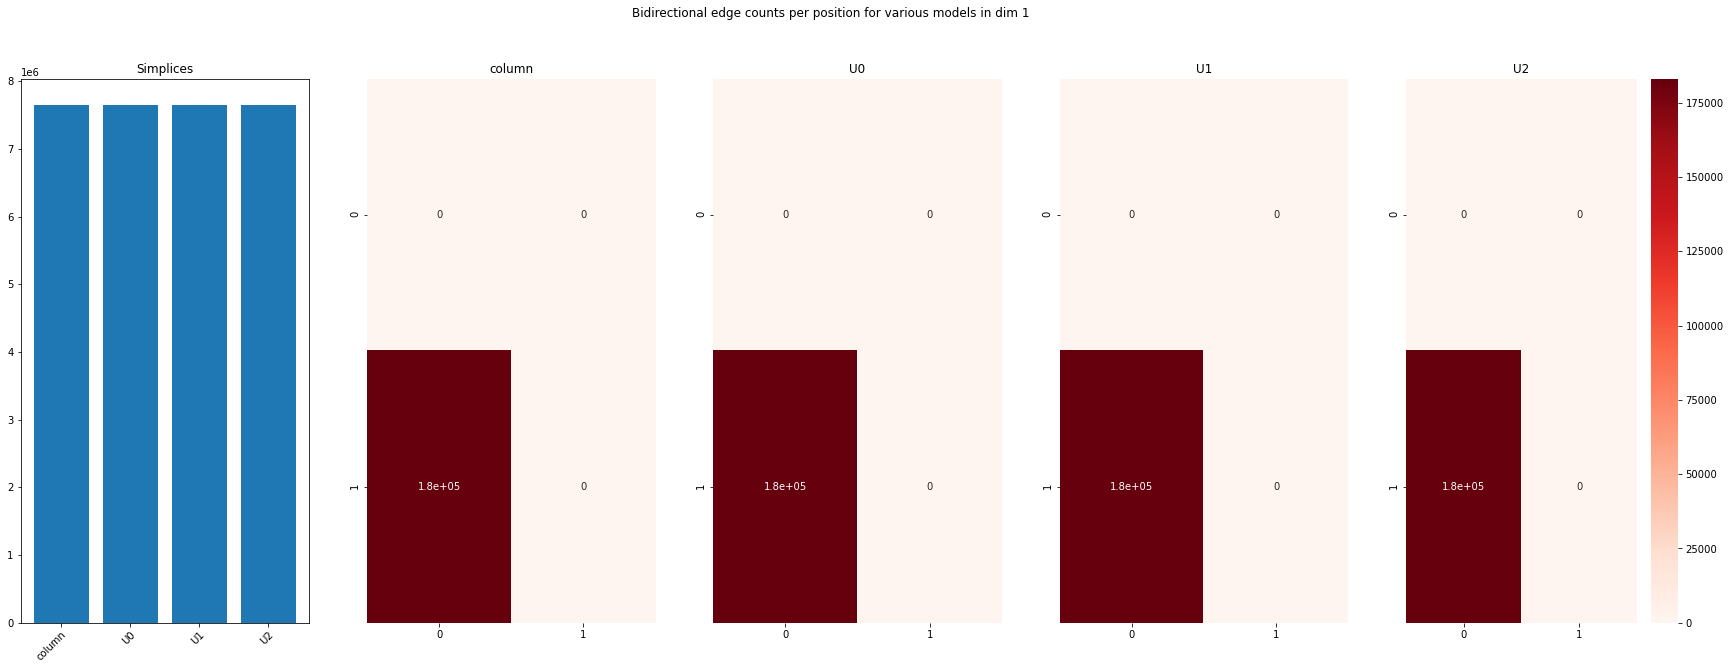

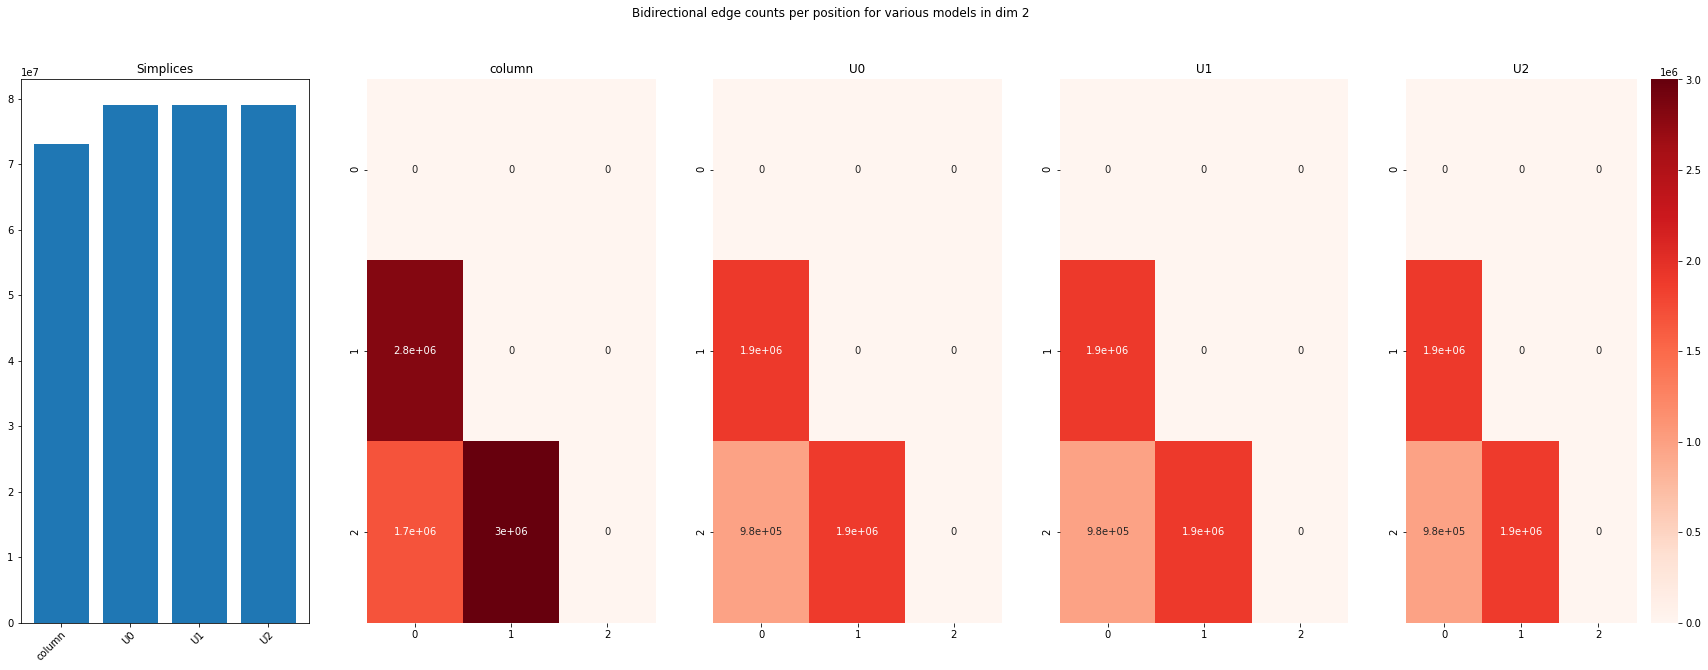

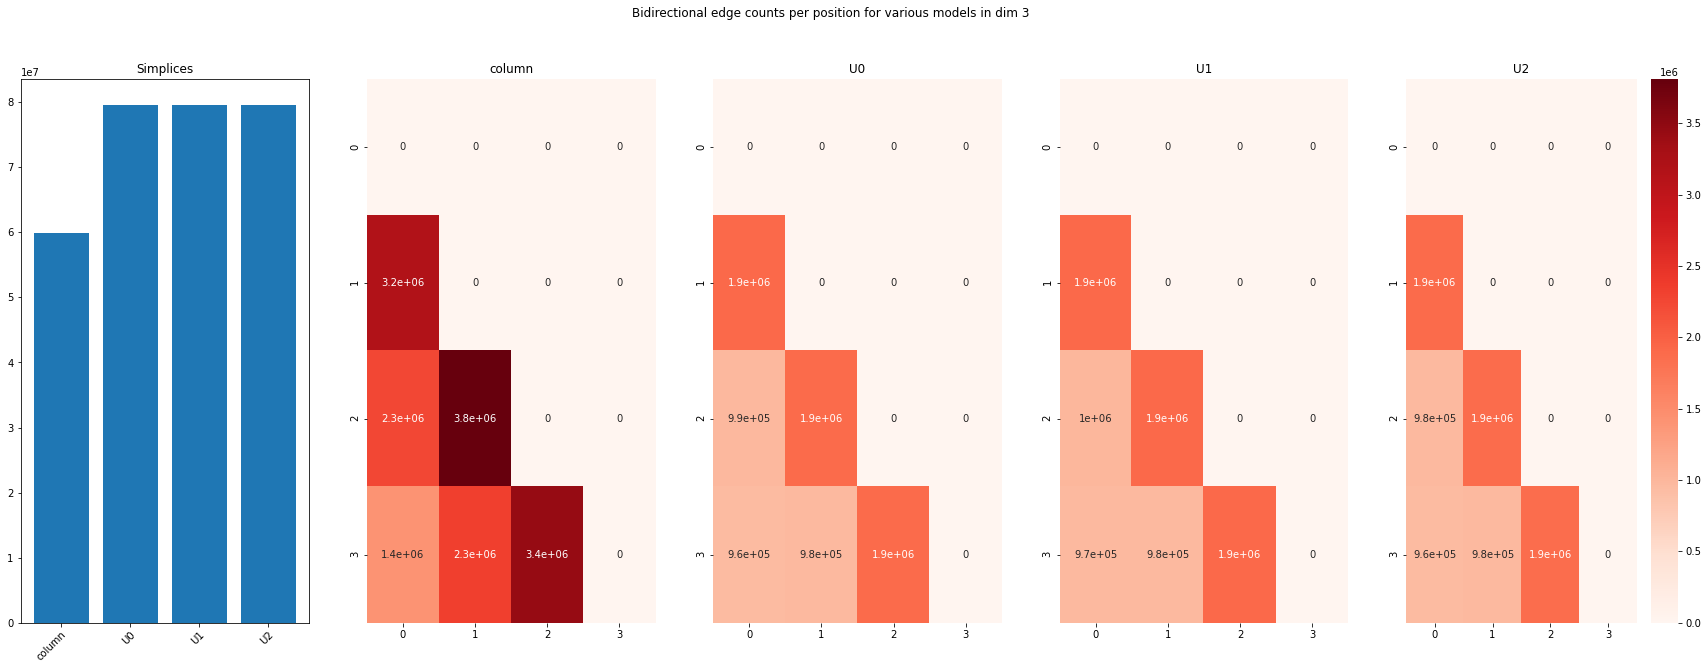

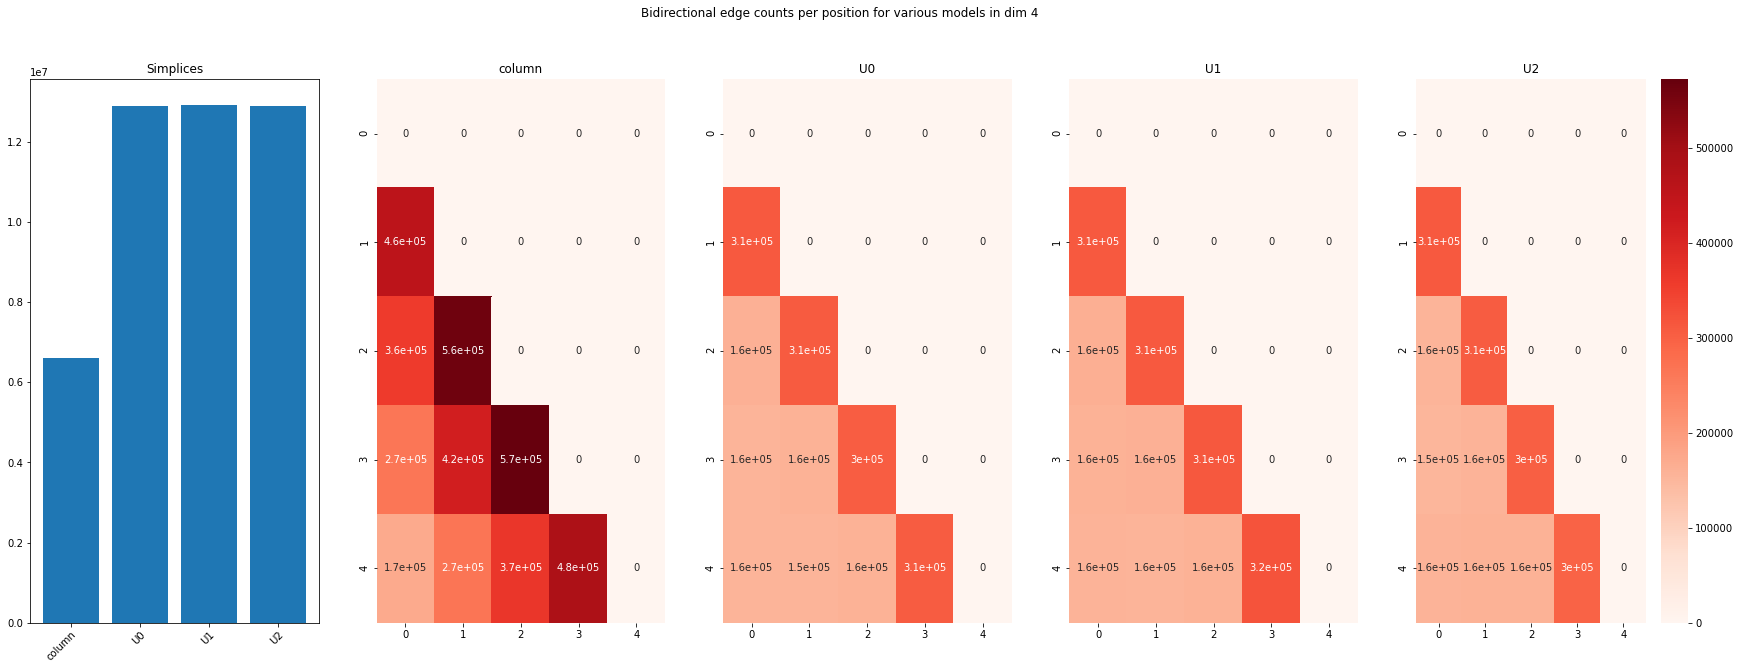

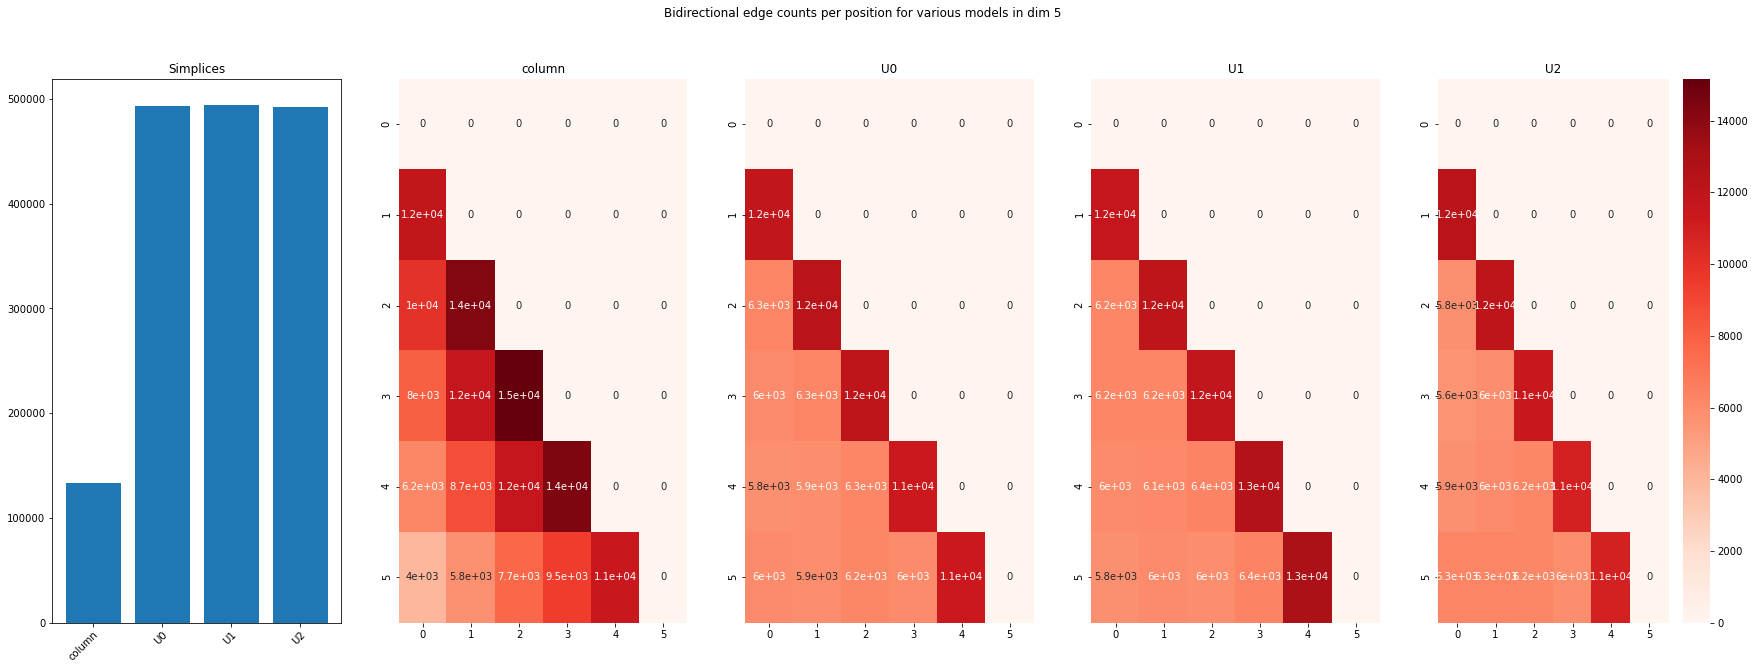

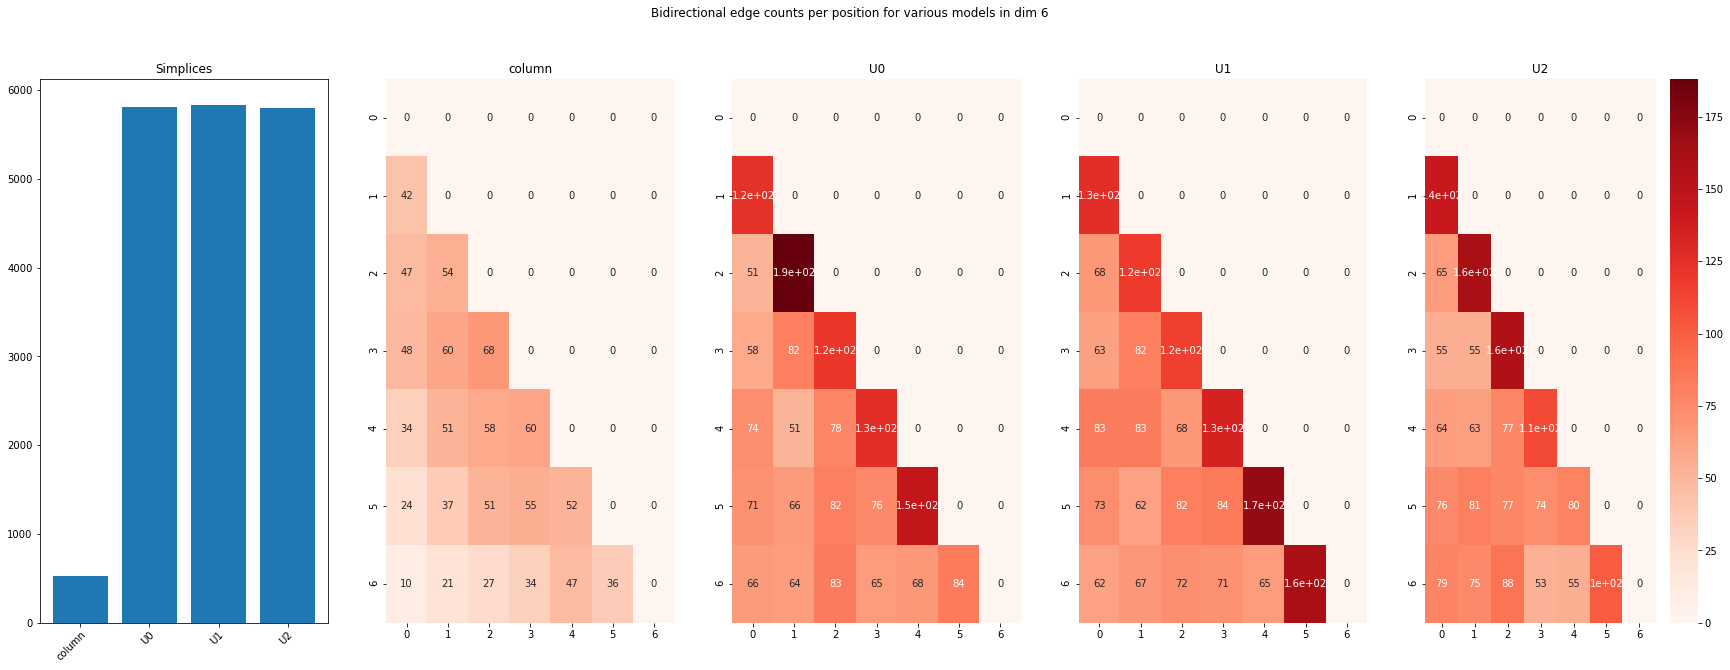

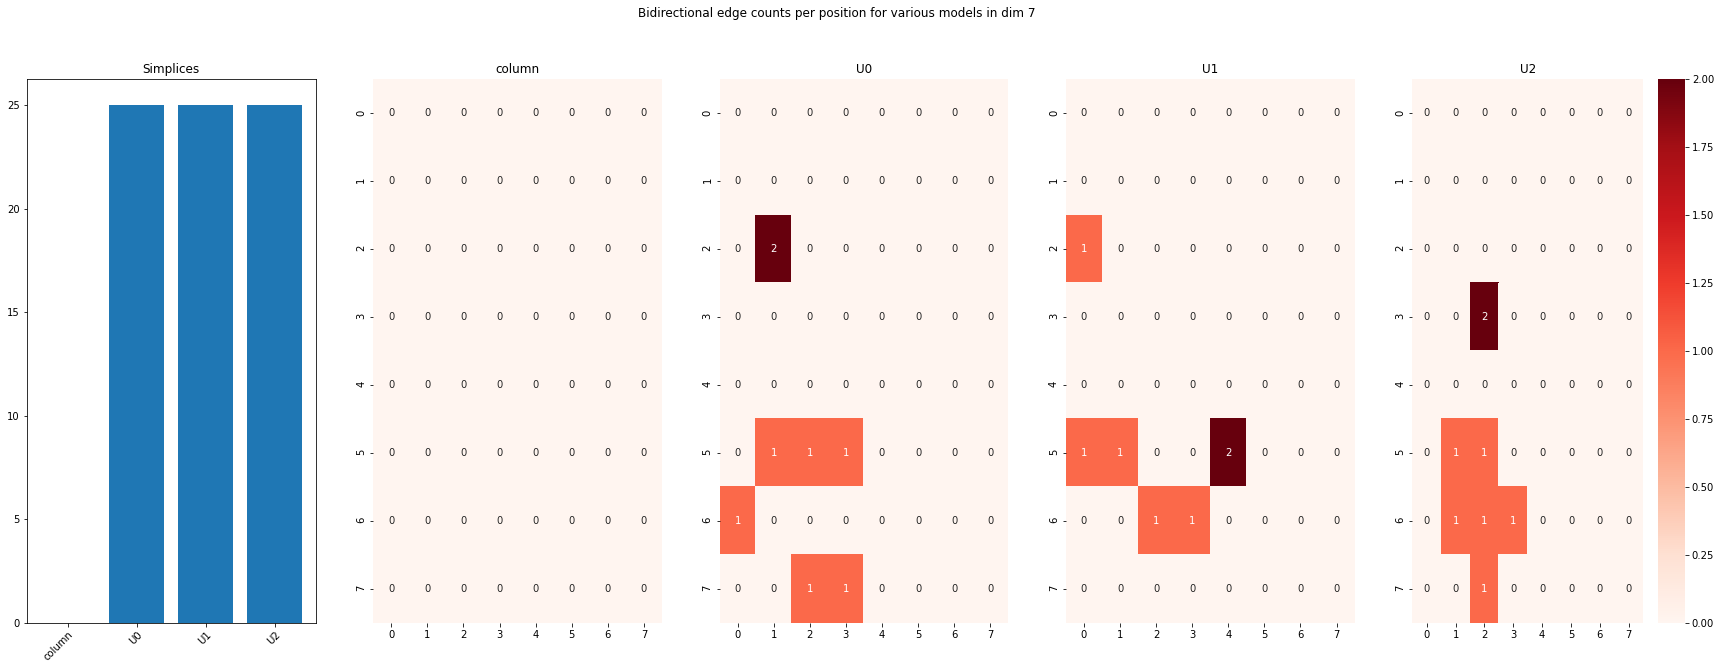

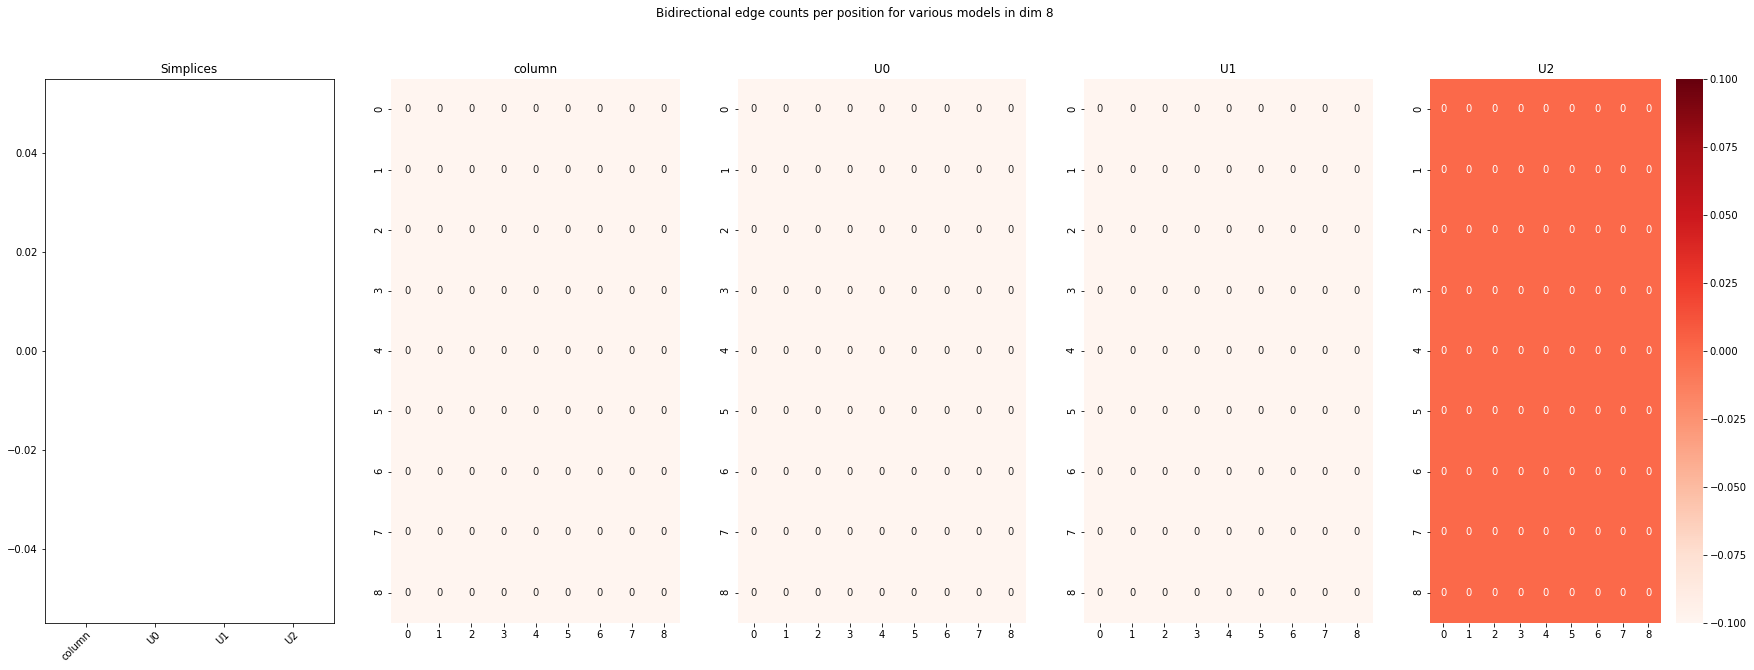

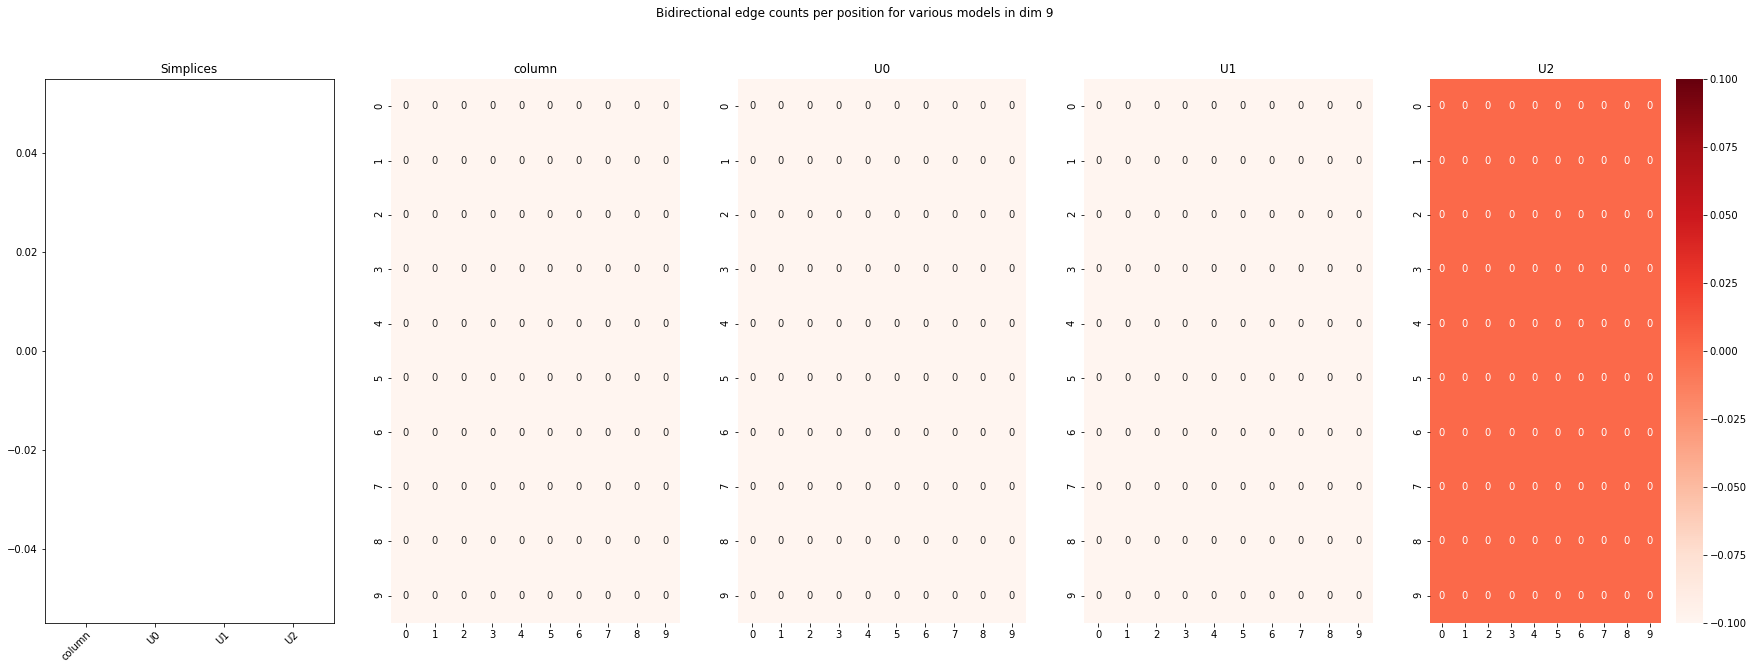

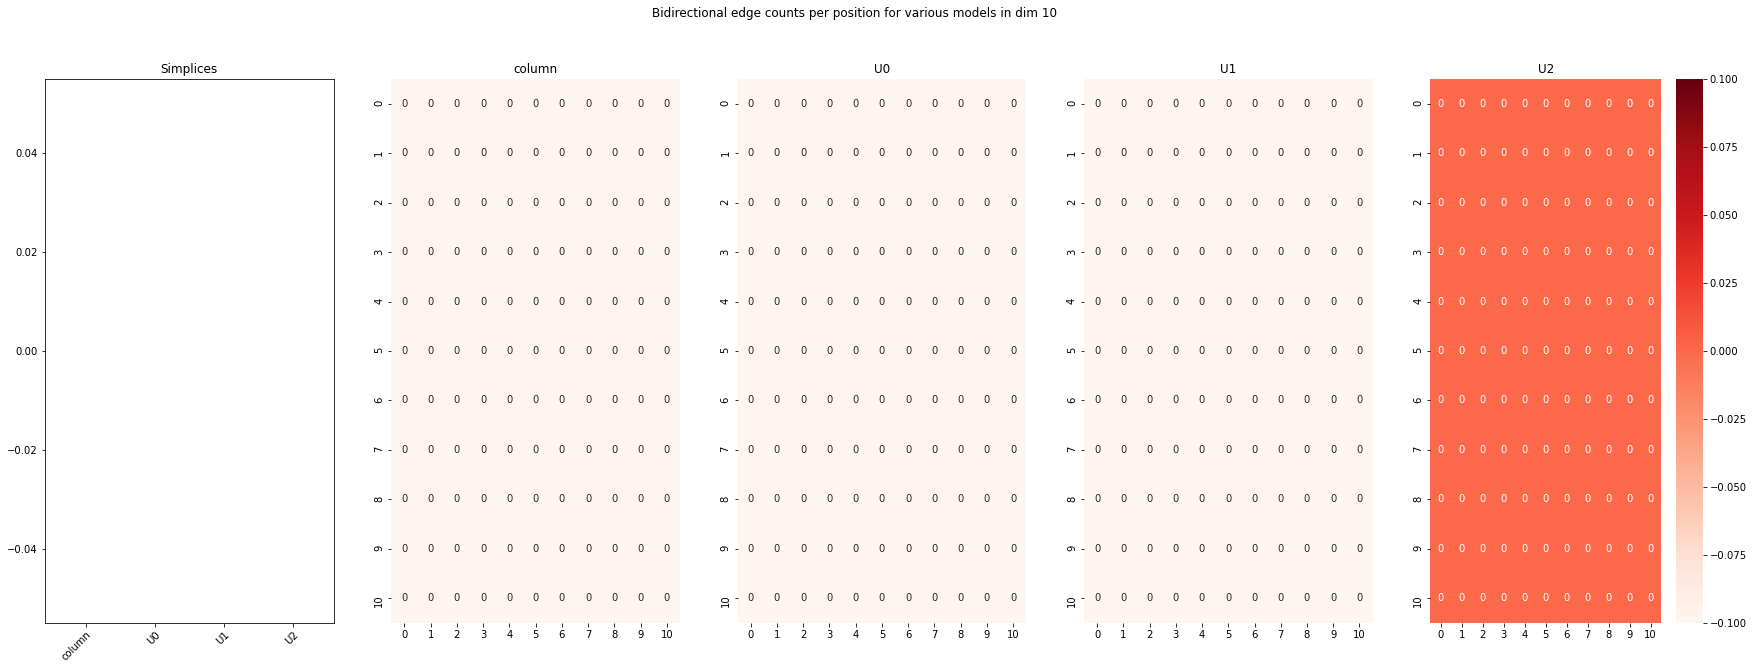

In [43]:
compare_graphs([a,d0,d1,d2], 1, "variance_dim_underlying", title_list = ["Simplices", "column", "U0", "U1", "U2"])

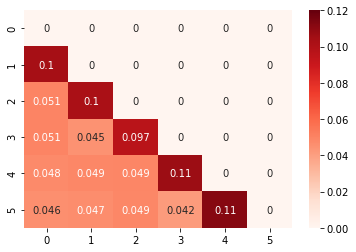

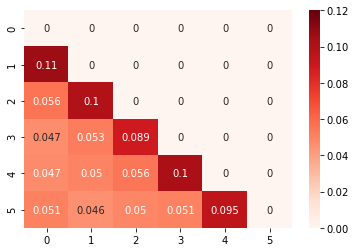

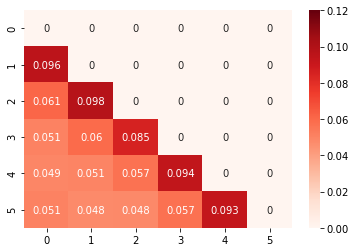

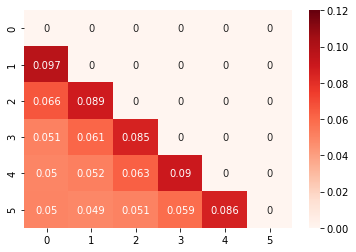

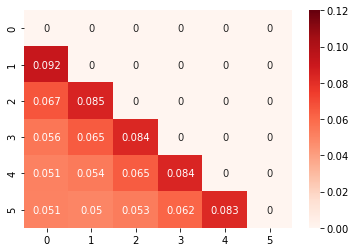

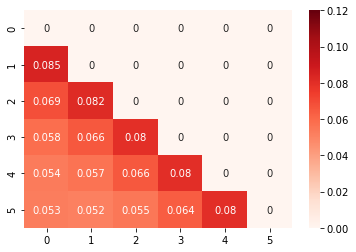

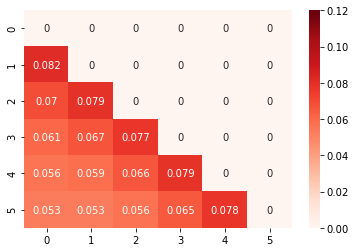

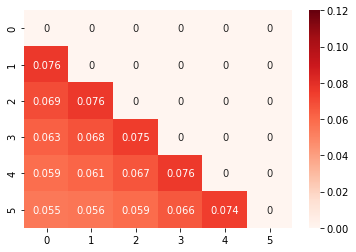

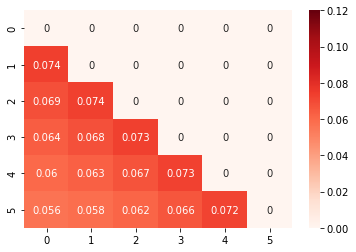

In [44]:
for ee in range(1,10):
    a = pickle.load(open(Path(f"data/bcounts/test_1/dim5/ee{ee}/bcount.pkl"), 'rb'))
    fig = plt.figure()
    ax = fig.add_subplot()
    m = np.tril(a[5])
    m = m / np.sum(m)
    sns.heatmap(m, annot = True, cmap = 'Reds', ax = ax, vmax = 0.12)
    fig.savefig(f"Simplex5{ee}EEPC", facecolor = 'white')

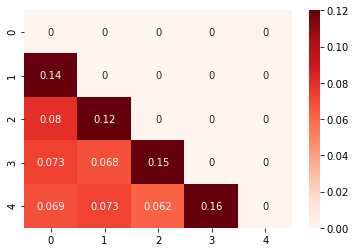

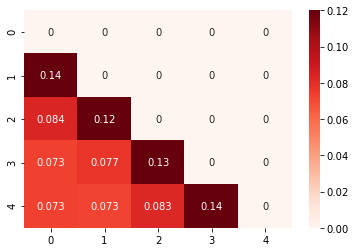

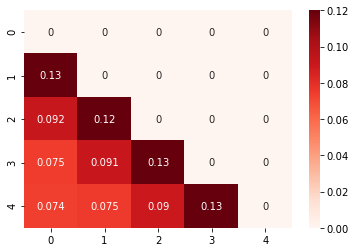

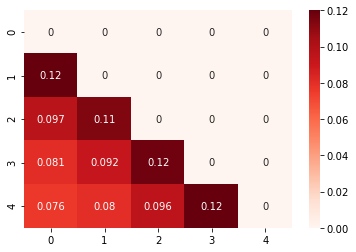

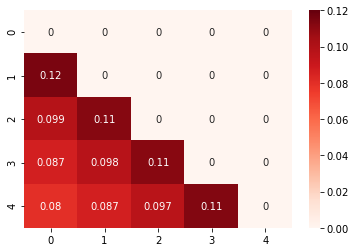

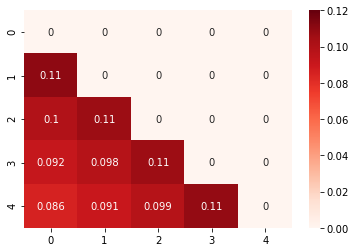

In [45]:
for ee in range(1,7):
    a = pickle.load(open(Path(f"data/bcounts/test_1/dim4/ee{ee}/bcount.pkl"), 'rb'))
    fig = plt.figure()
    ax = fig.add_subplot()
    m = np.tril(a[4])
    m = m / np.sum(m)
    sns.heatmap(m, annot = True, cmap = 'Reds', ax = ax, vmax = 0.12)
    fig.savefig(f"Simplex4{ee}EEPC", facecolor = 'white')

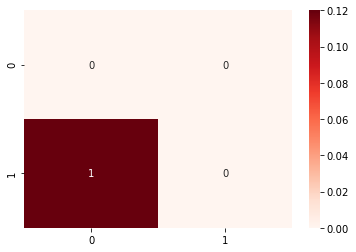

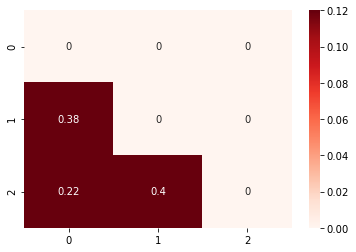

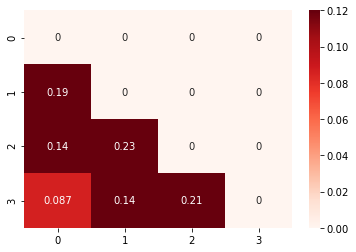

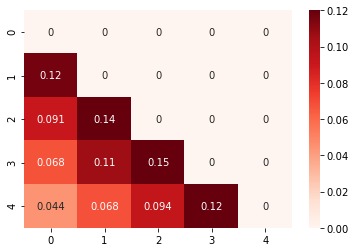

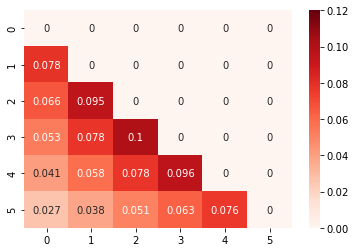

In [46]:
for dim in range(1,6):
    a = pickle.load(open(Path(f"data/bcounts/column/seed_0/bcounts.pkl"), 'rb'))
    fig = plt.figure()
    ax = fig.add_subplot()
    m = np.tril(a[dim])
    m = m / np.sum(m)
    sns.heatmap(m, annot = True, cmap = 'Reds', ax = ax, vmax = 0.12)
    fig.savefig(f"Column" +str(dim), facecolor = 'white')

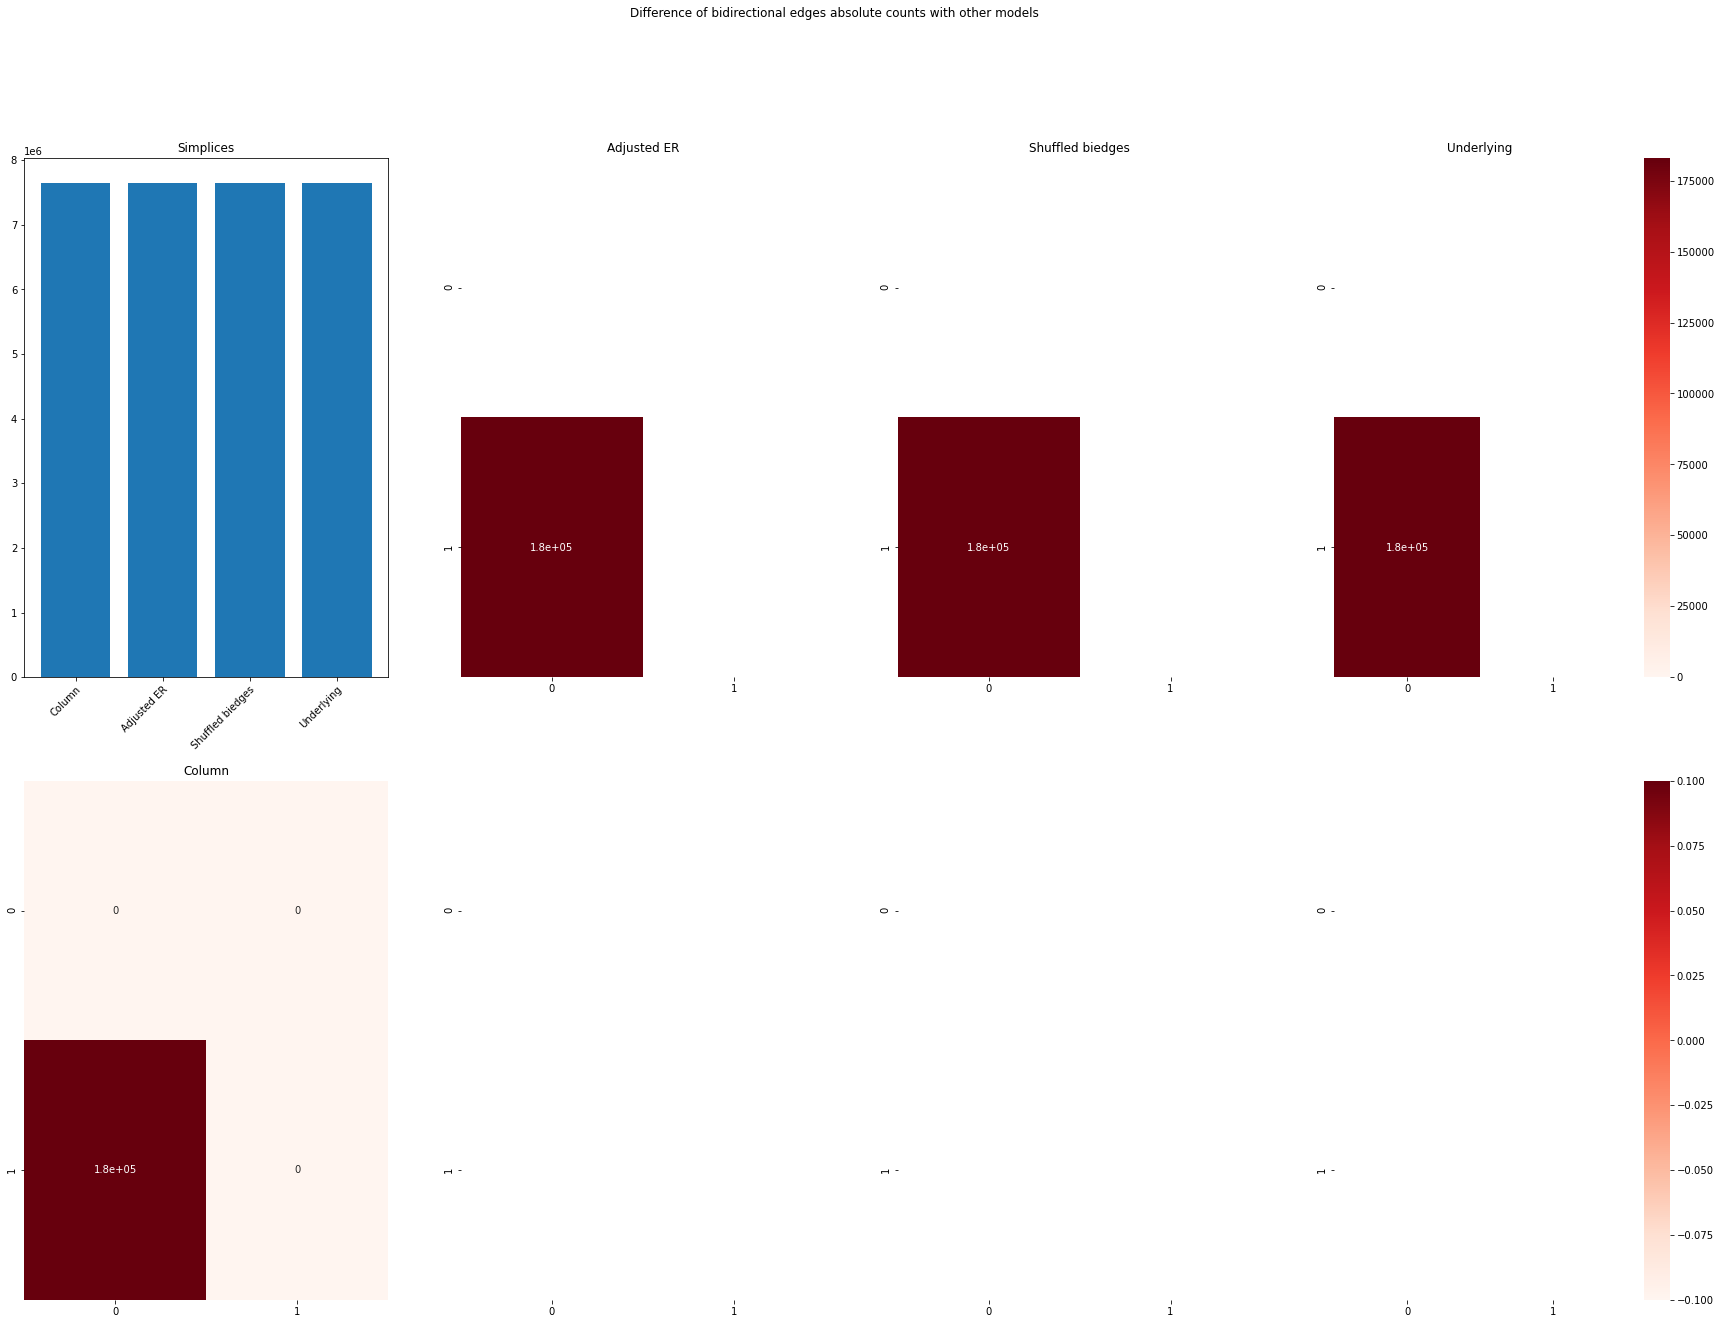

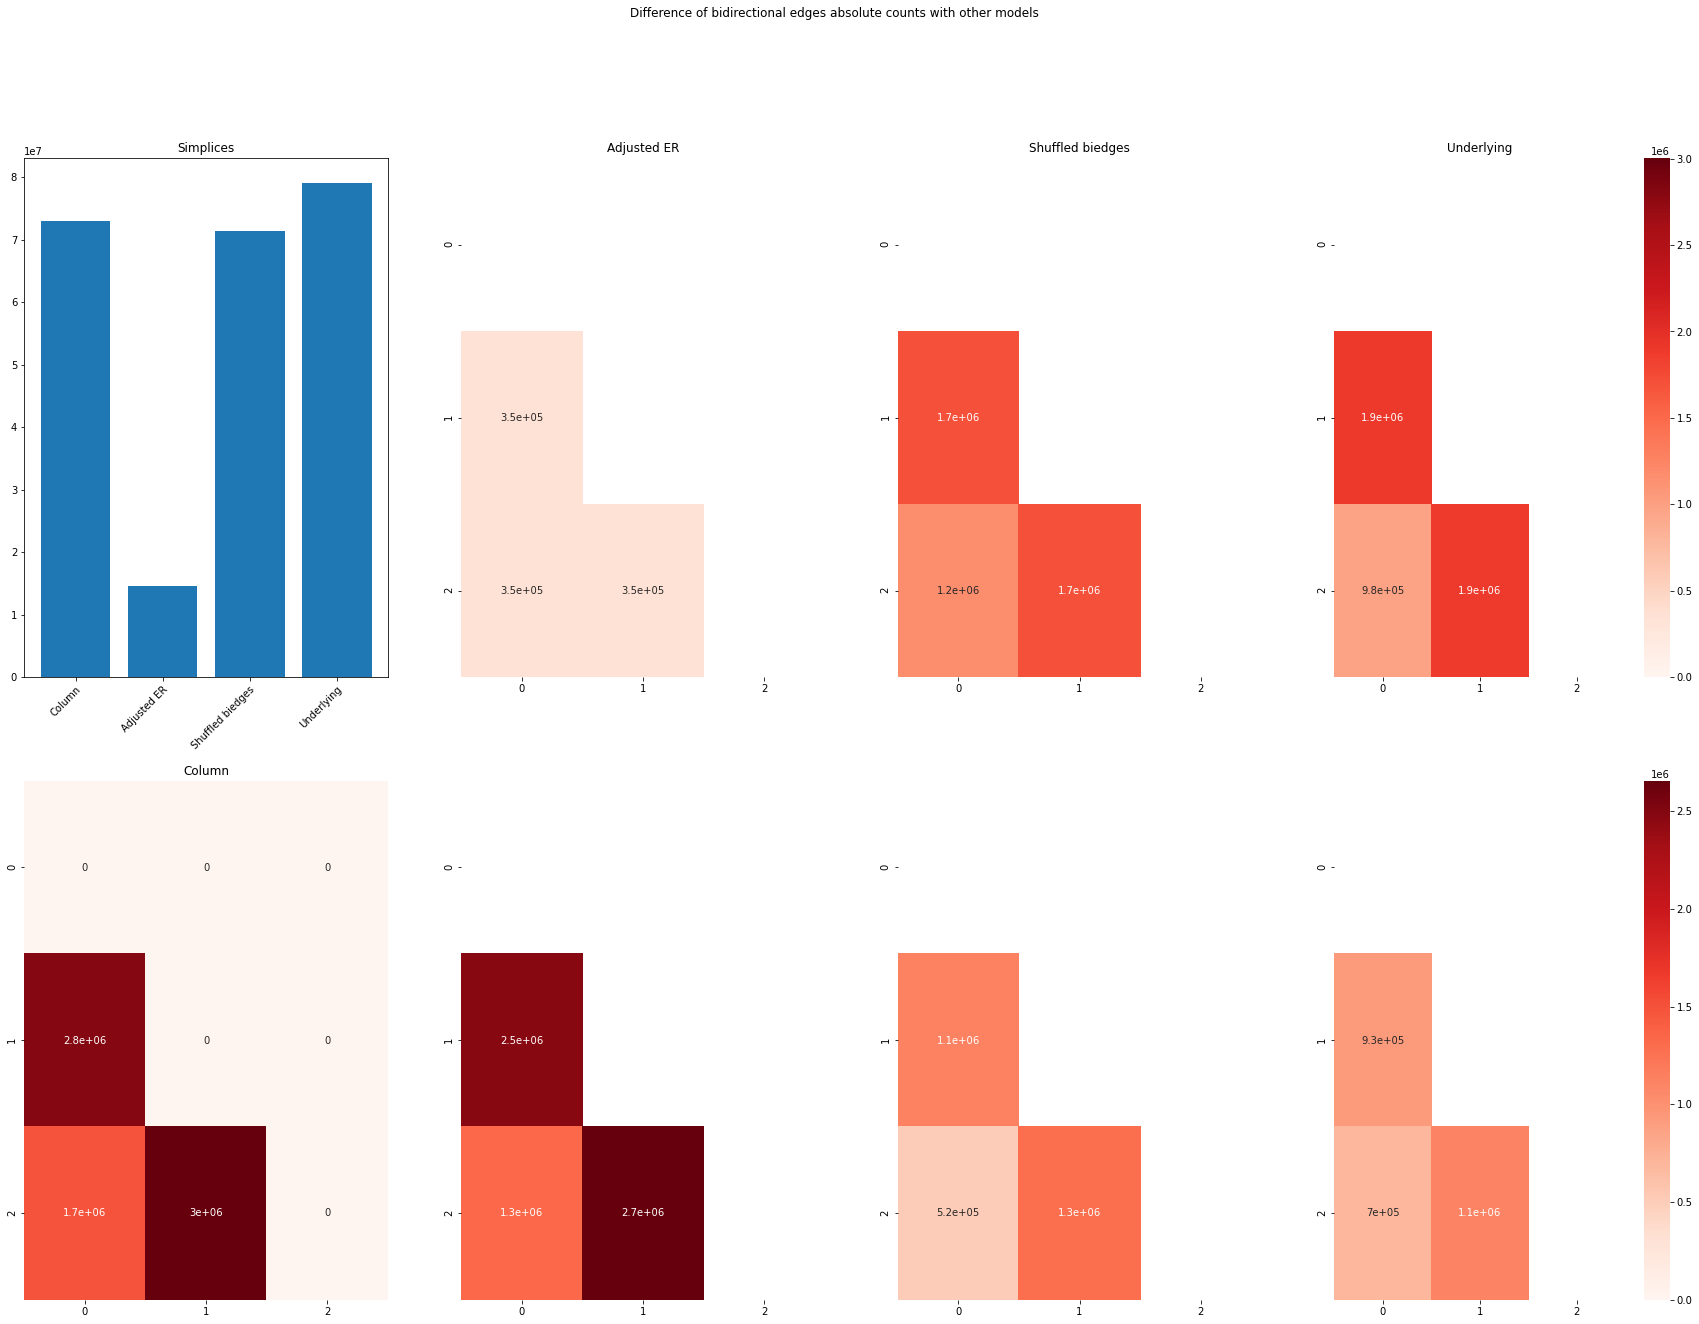

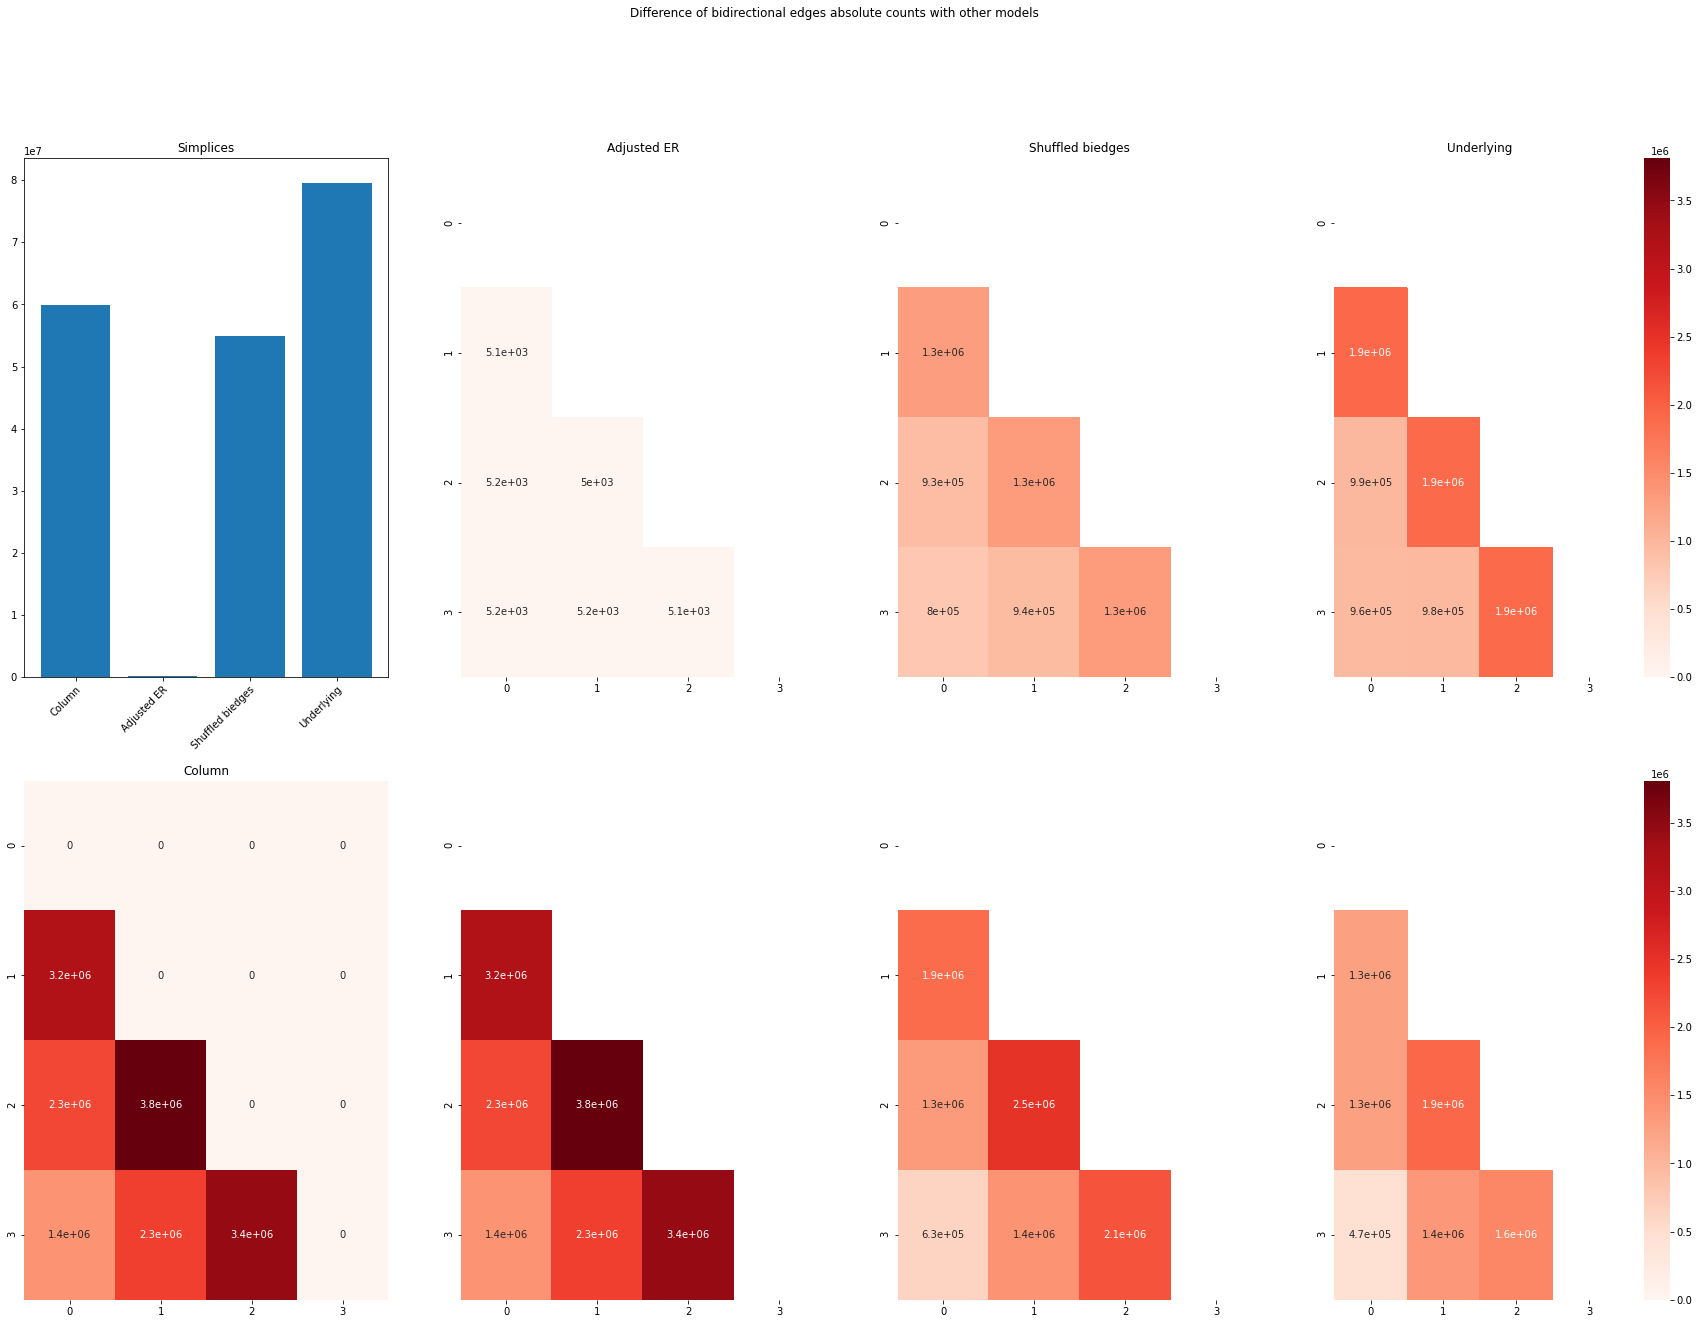

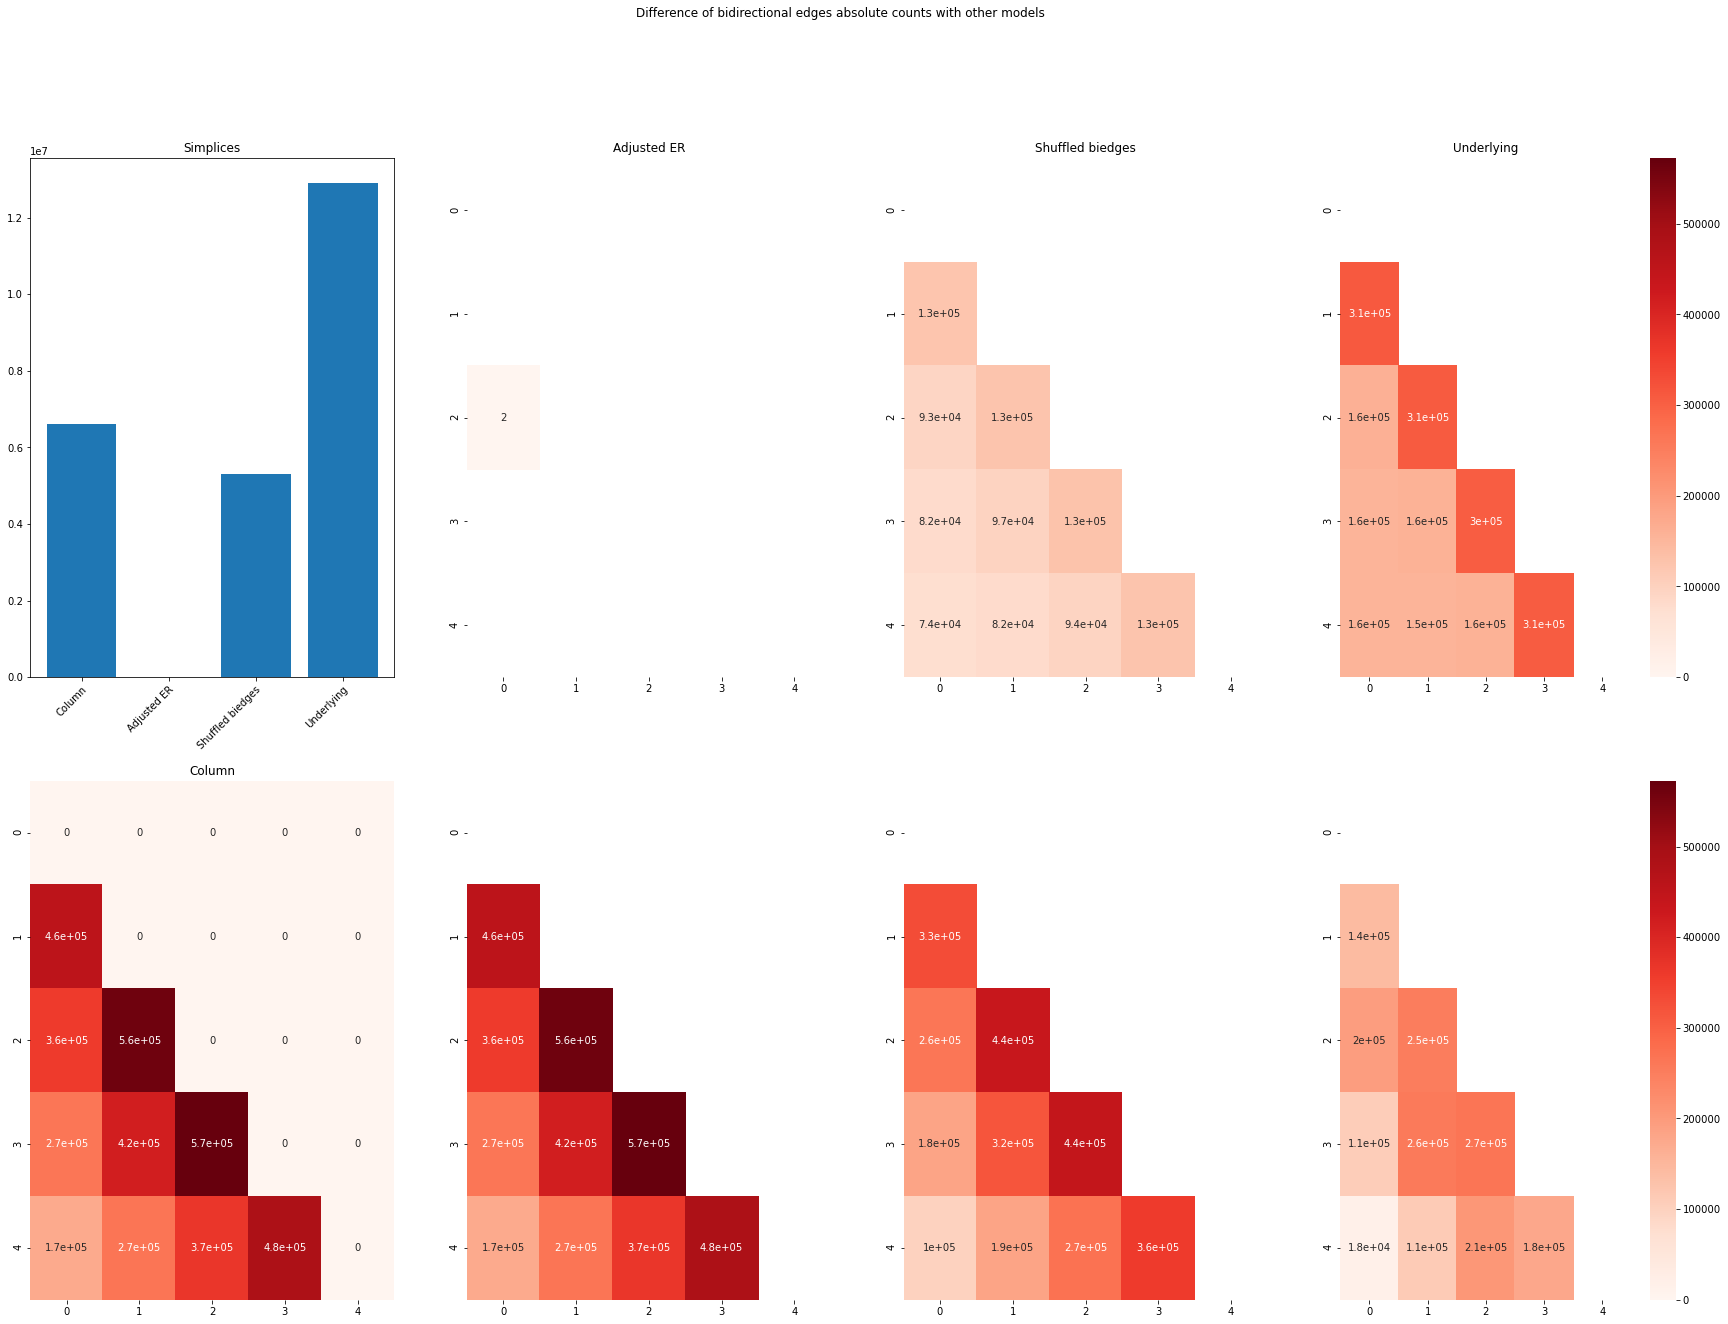

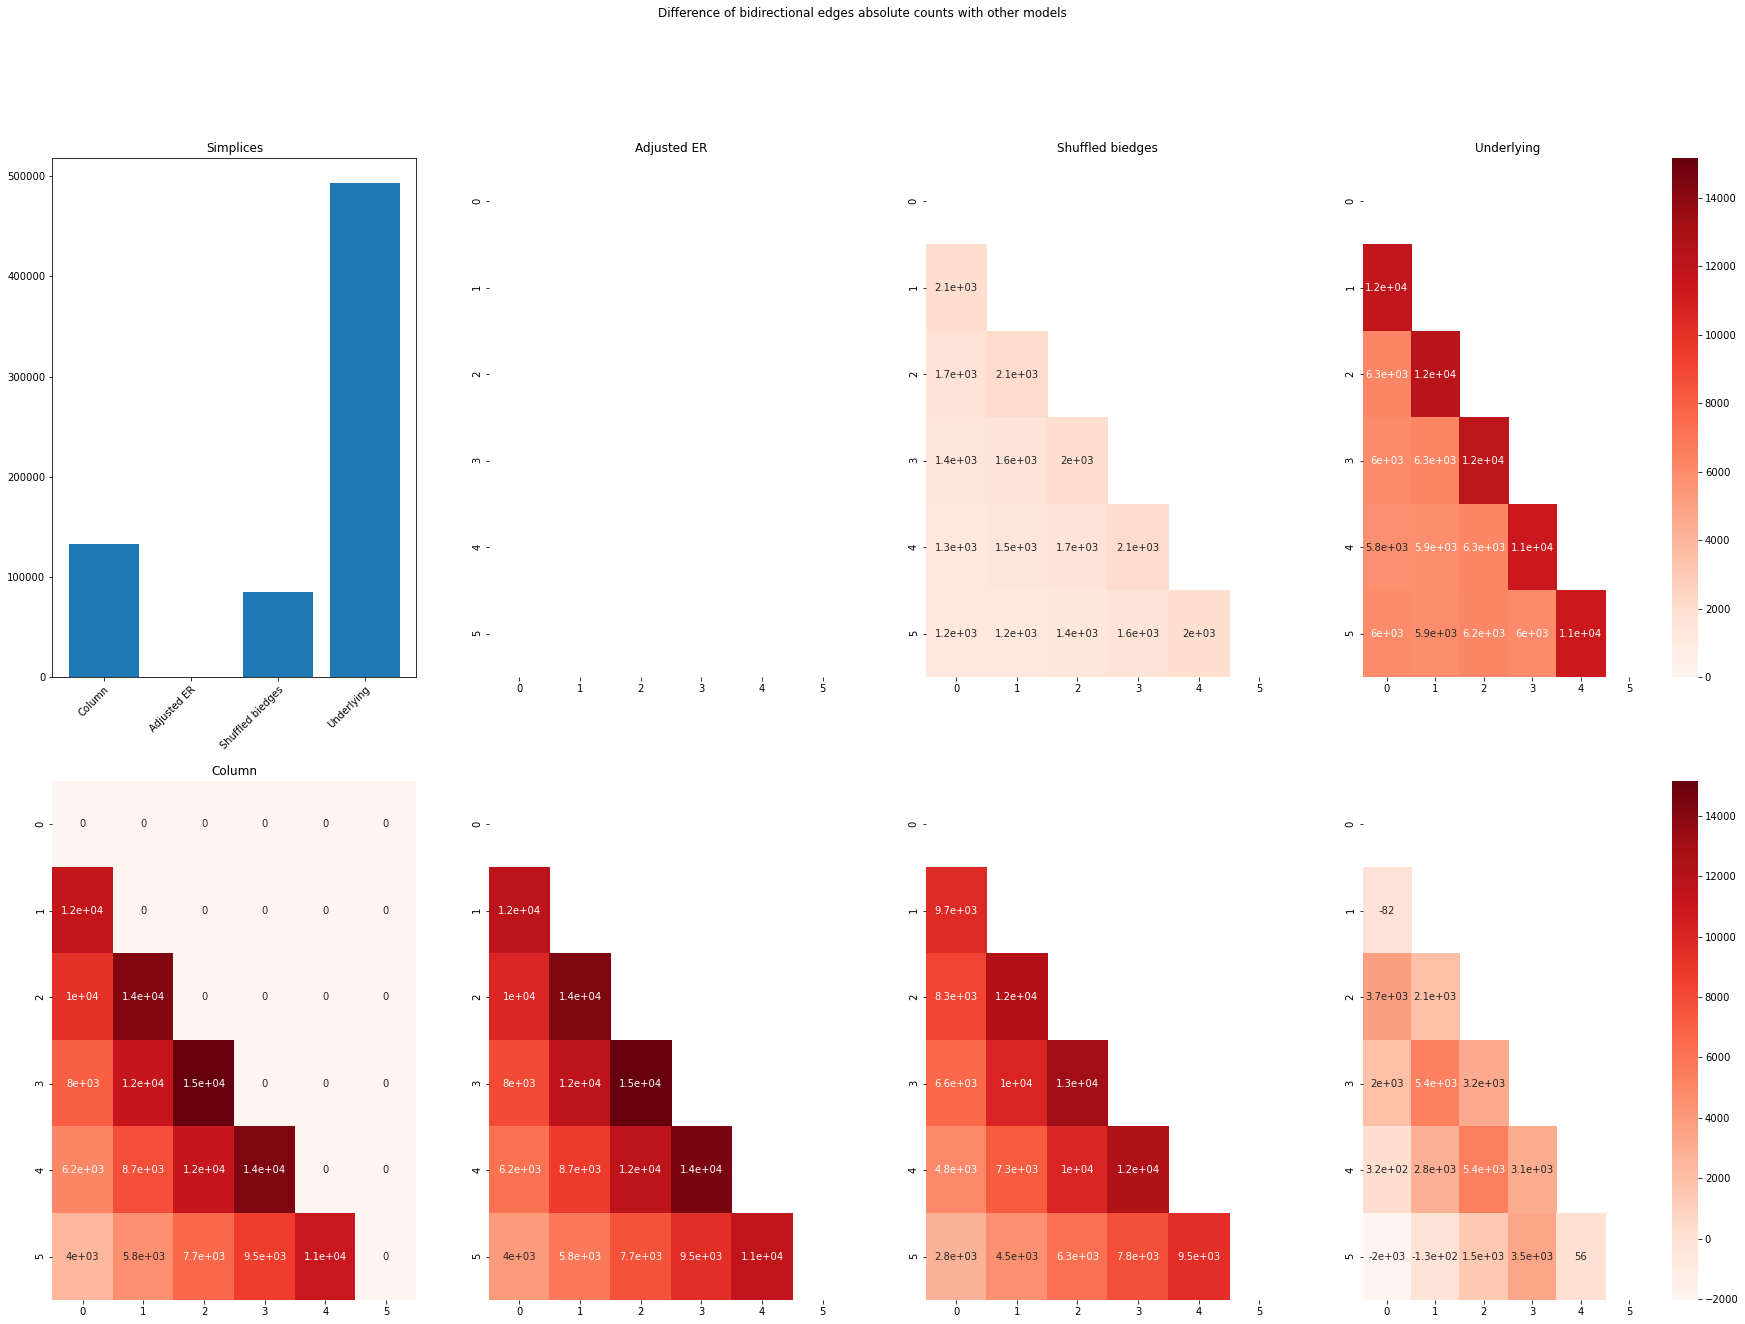

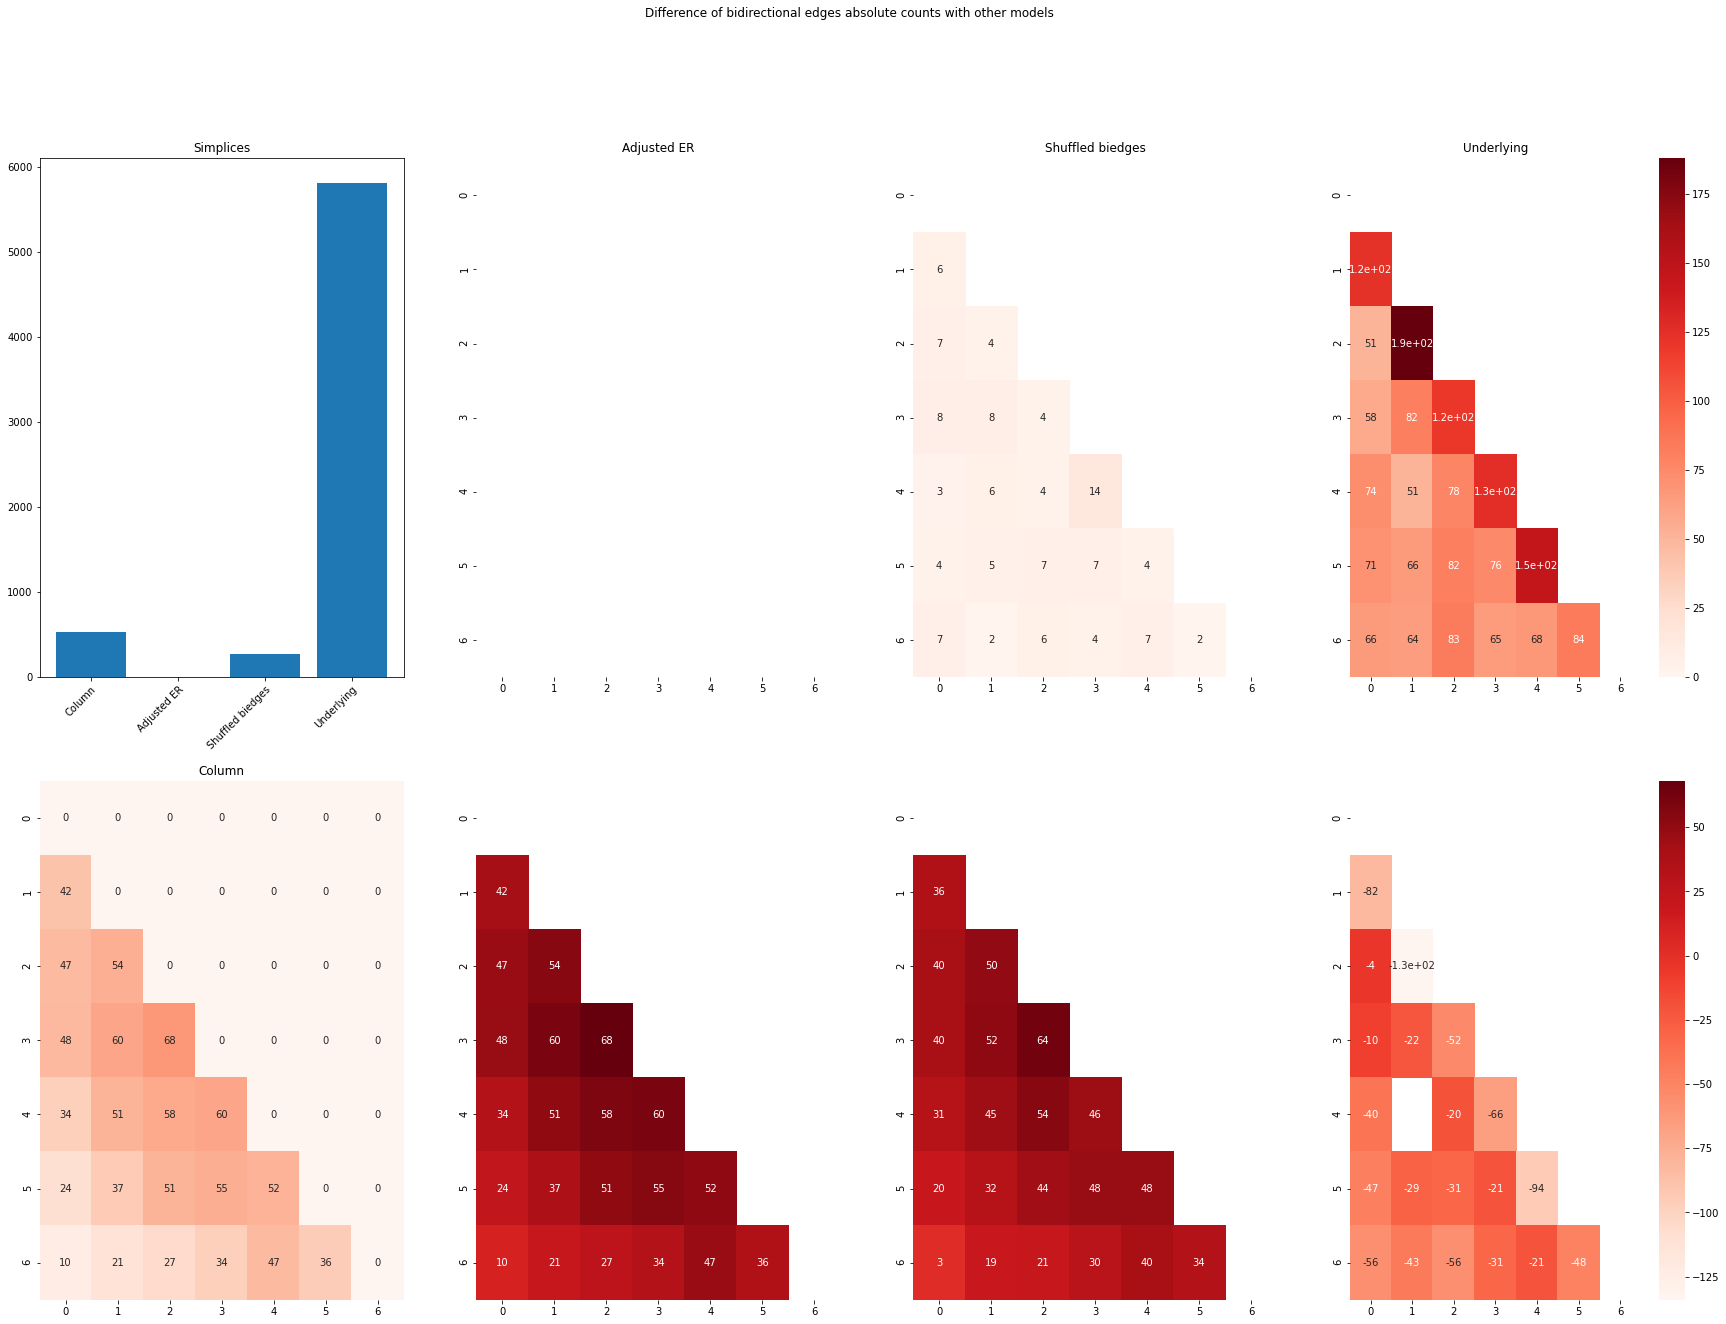

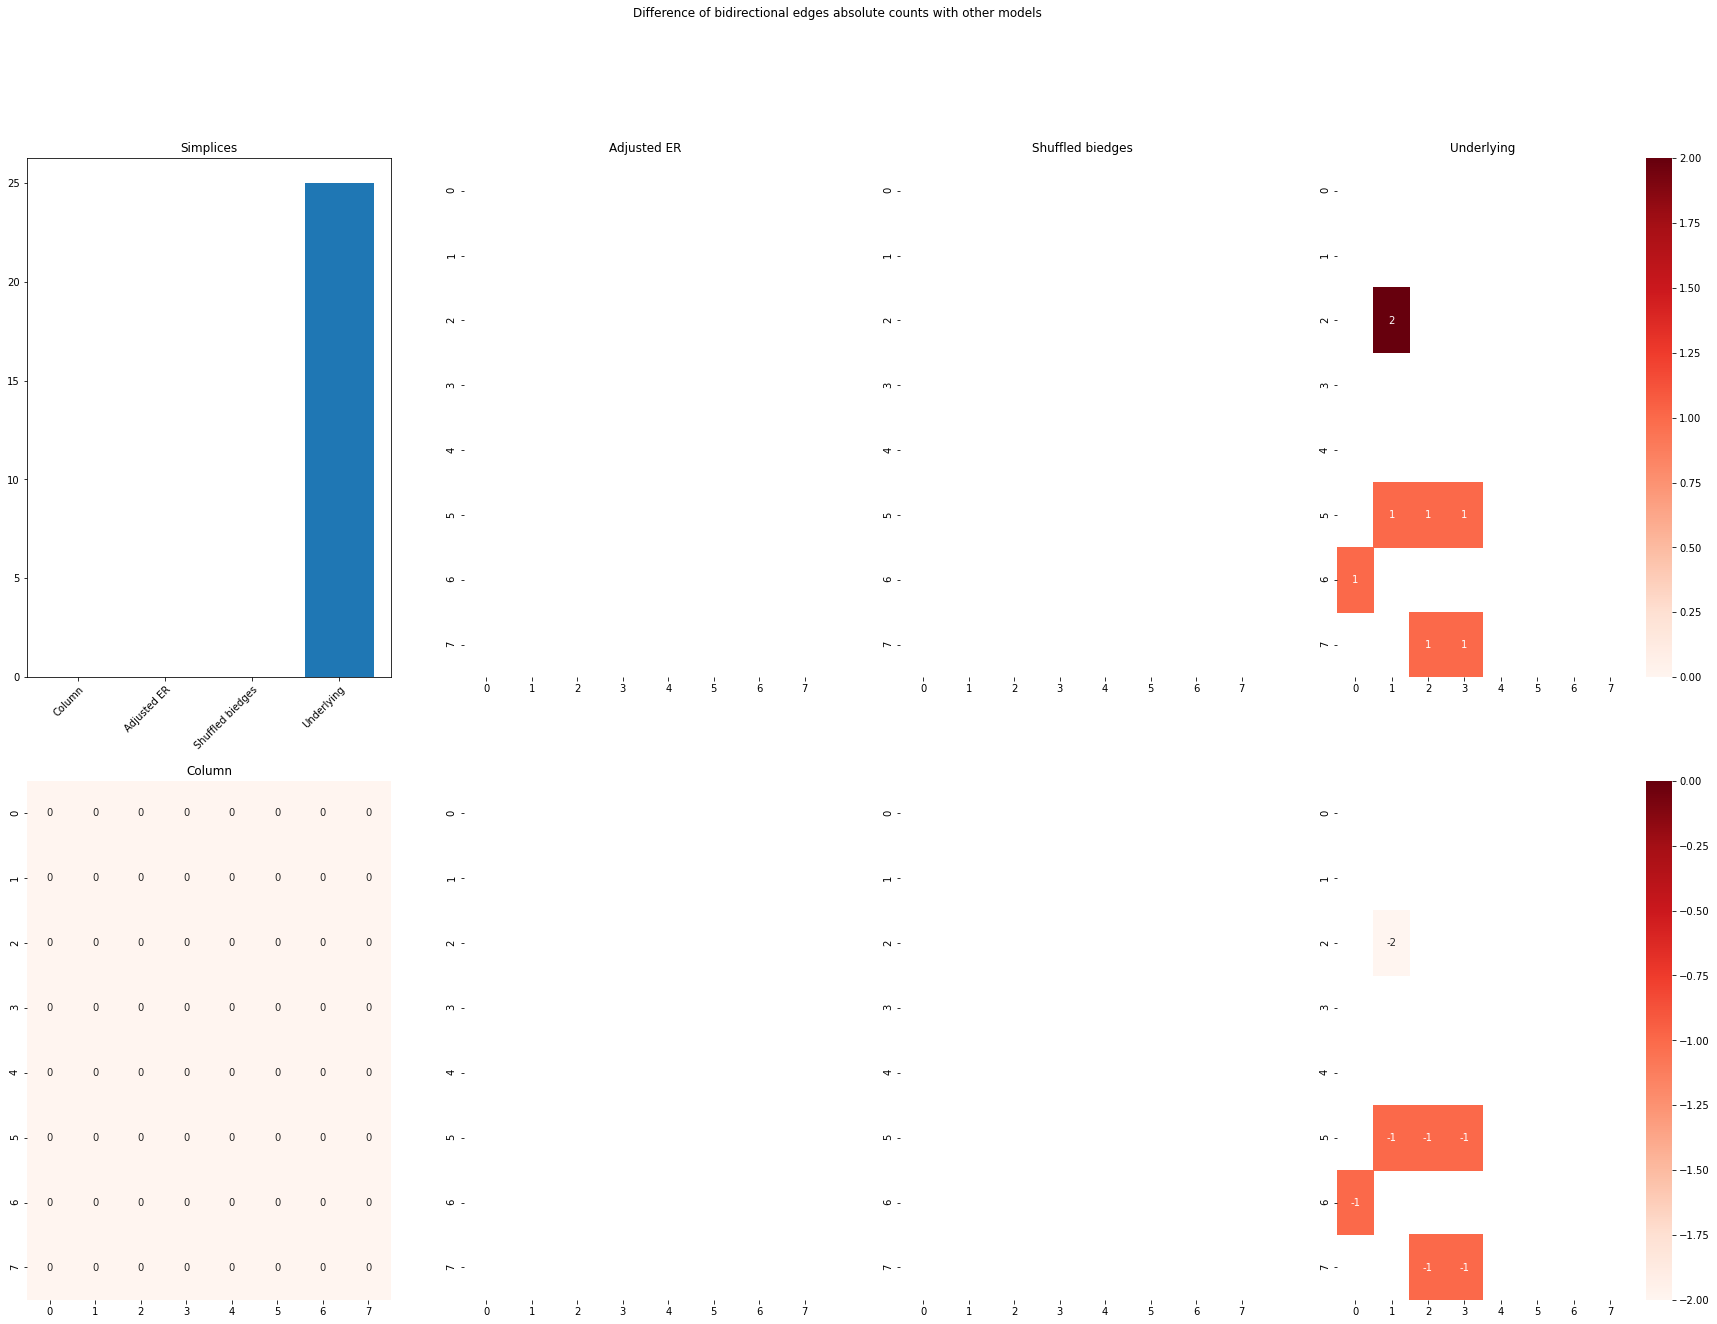

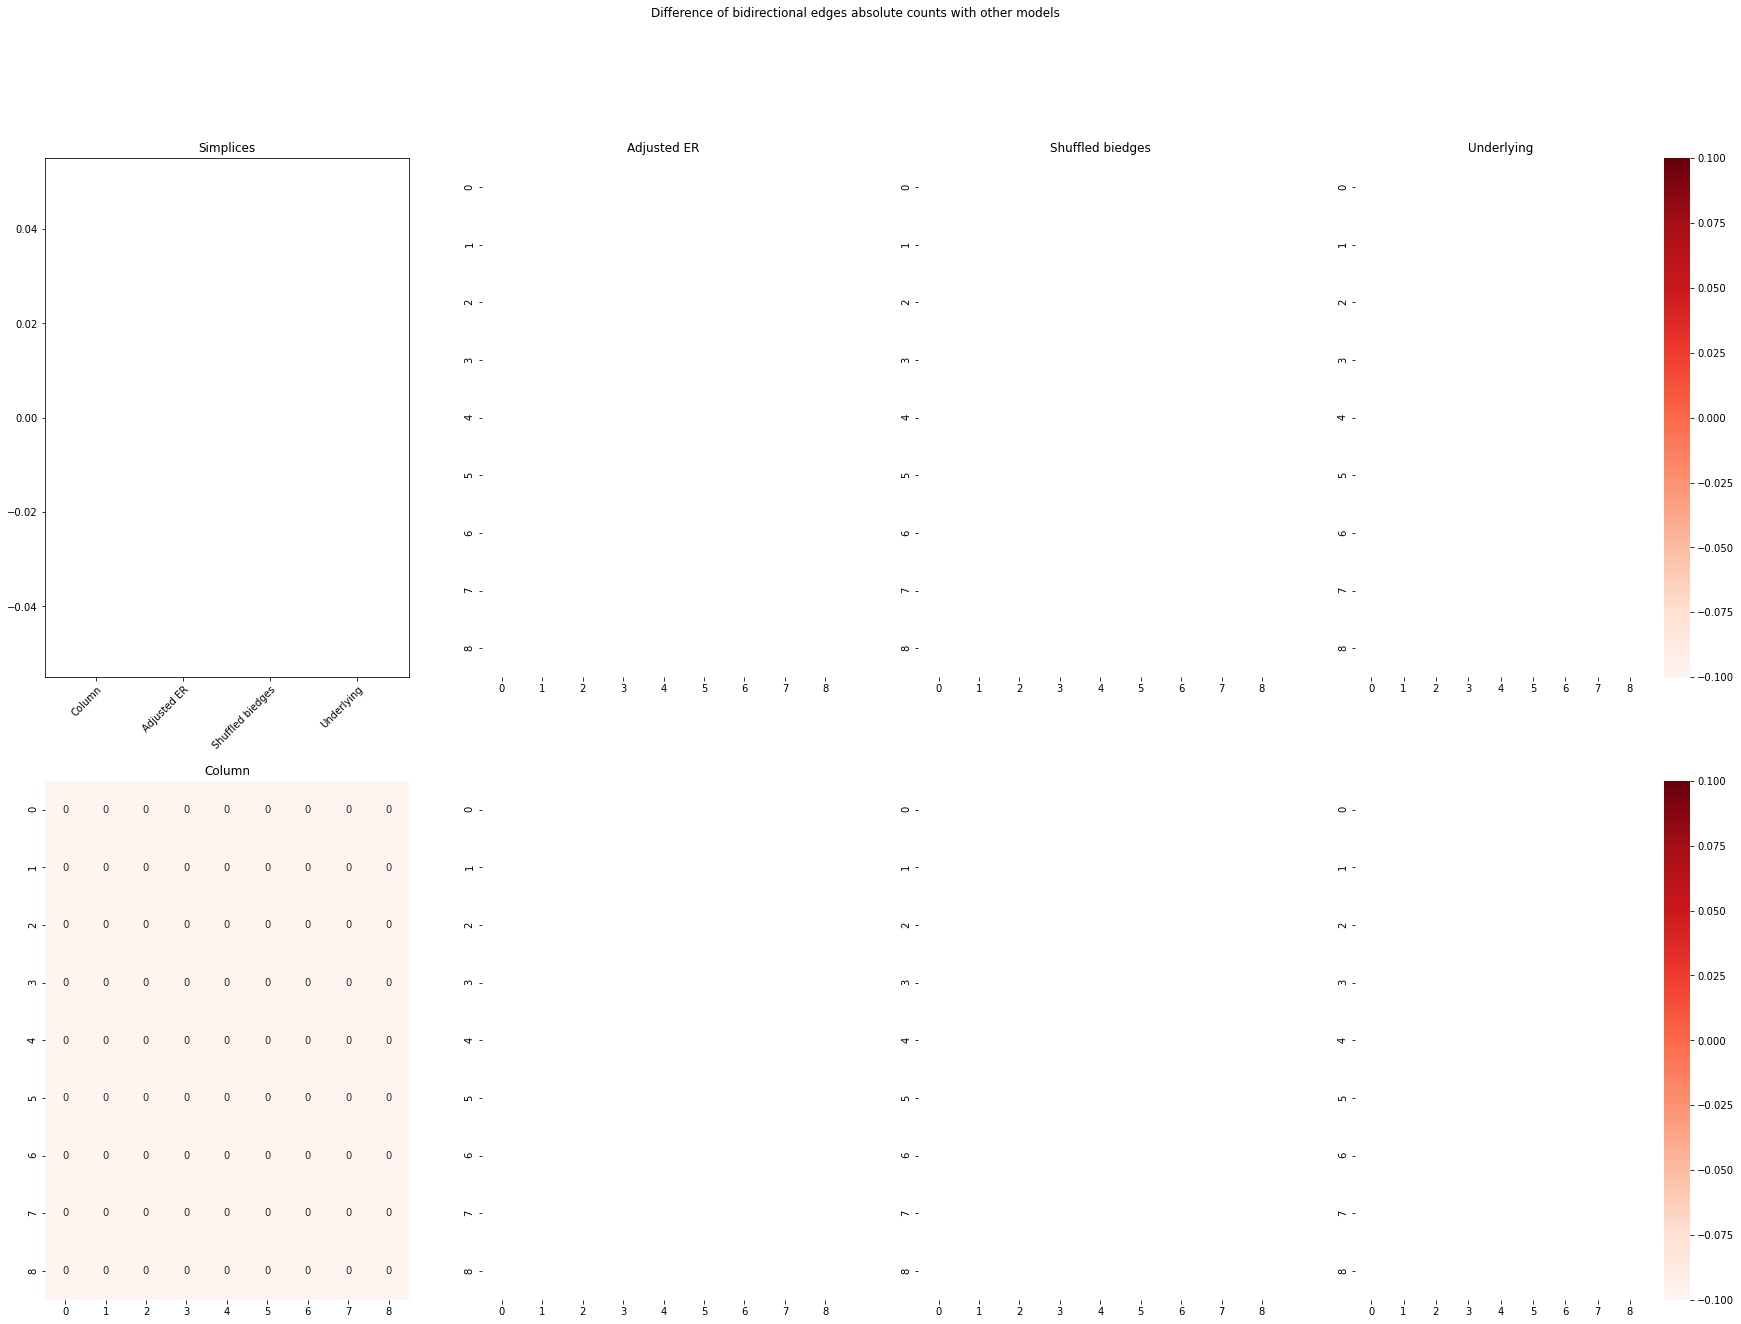

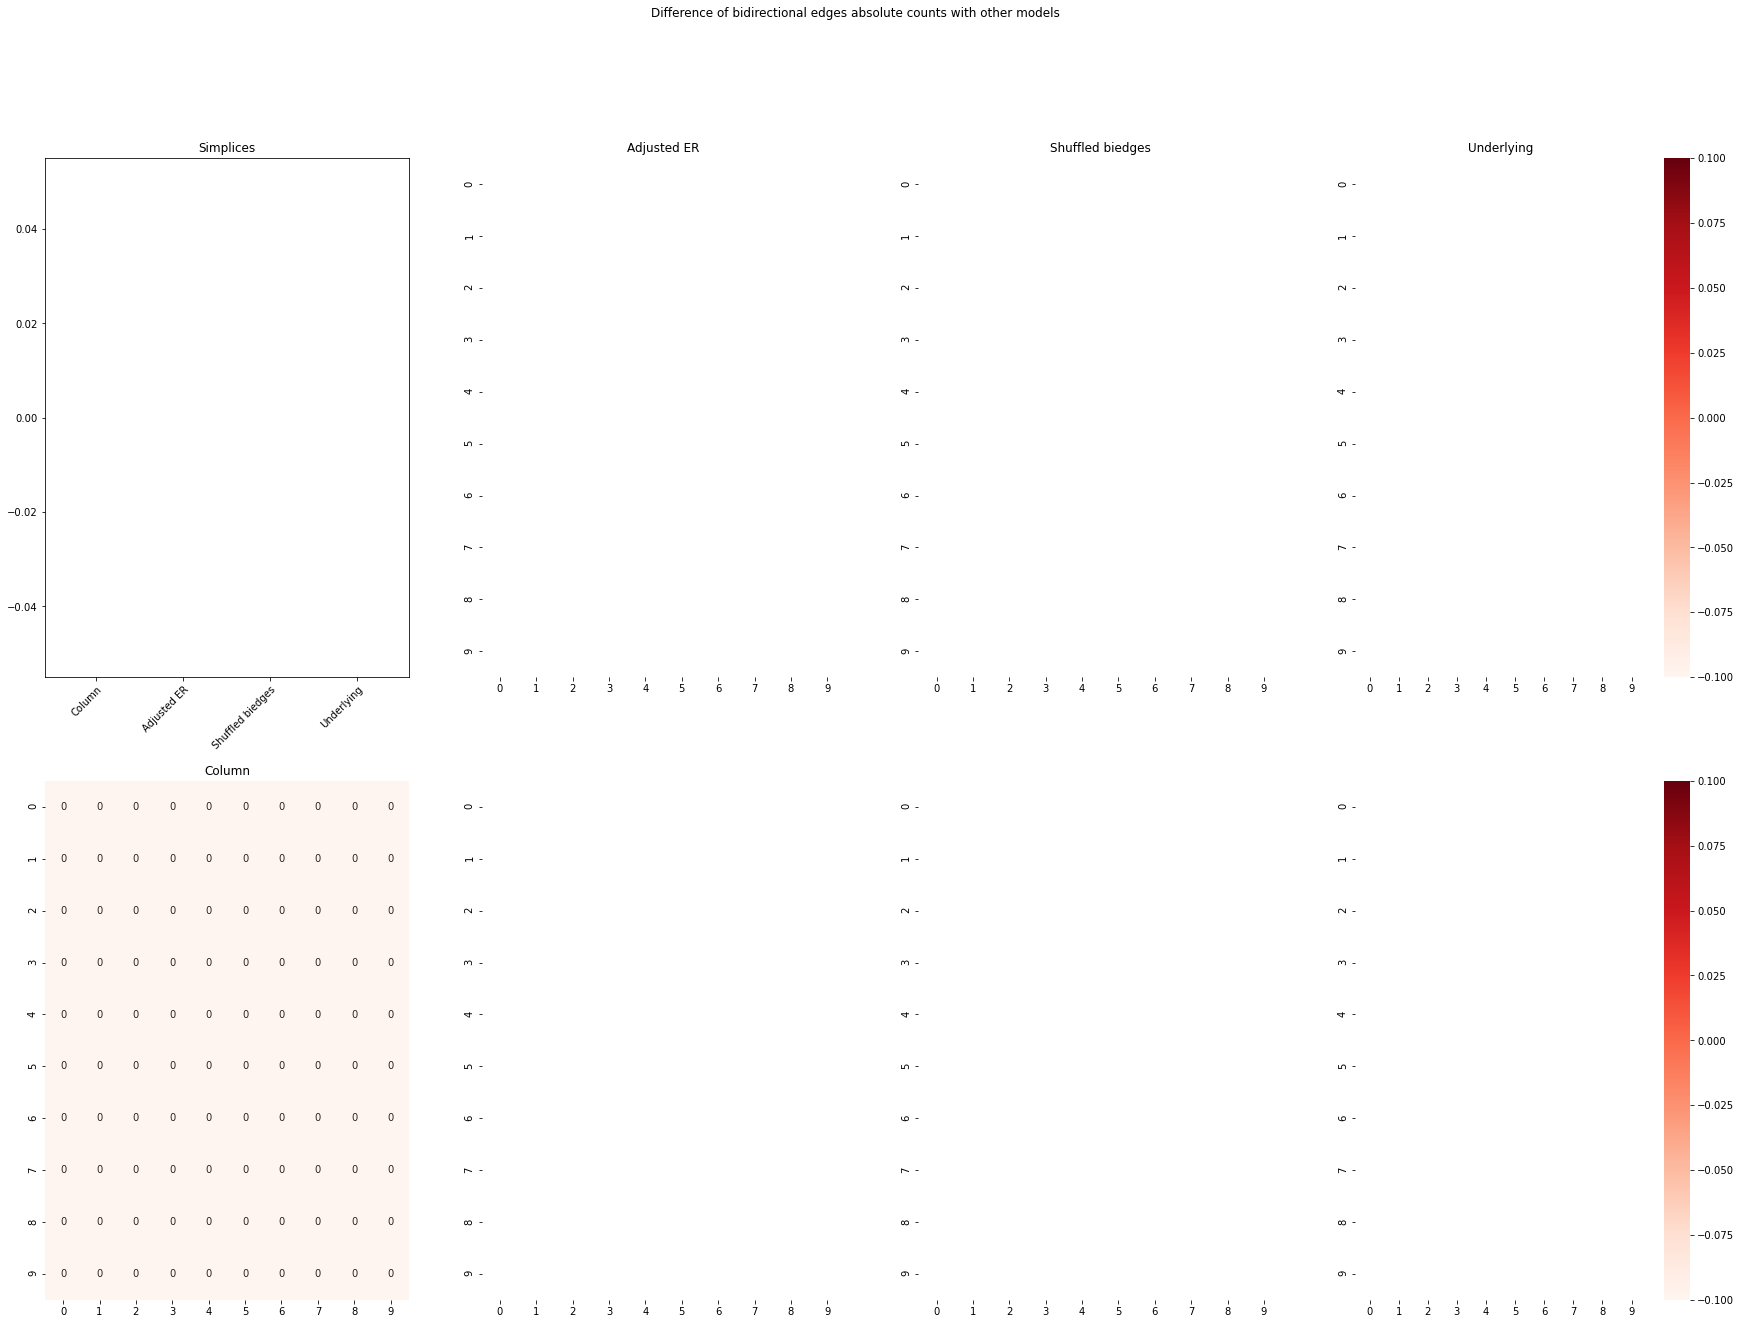

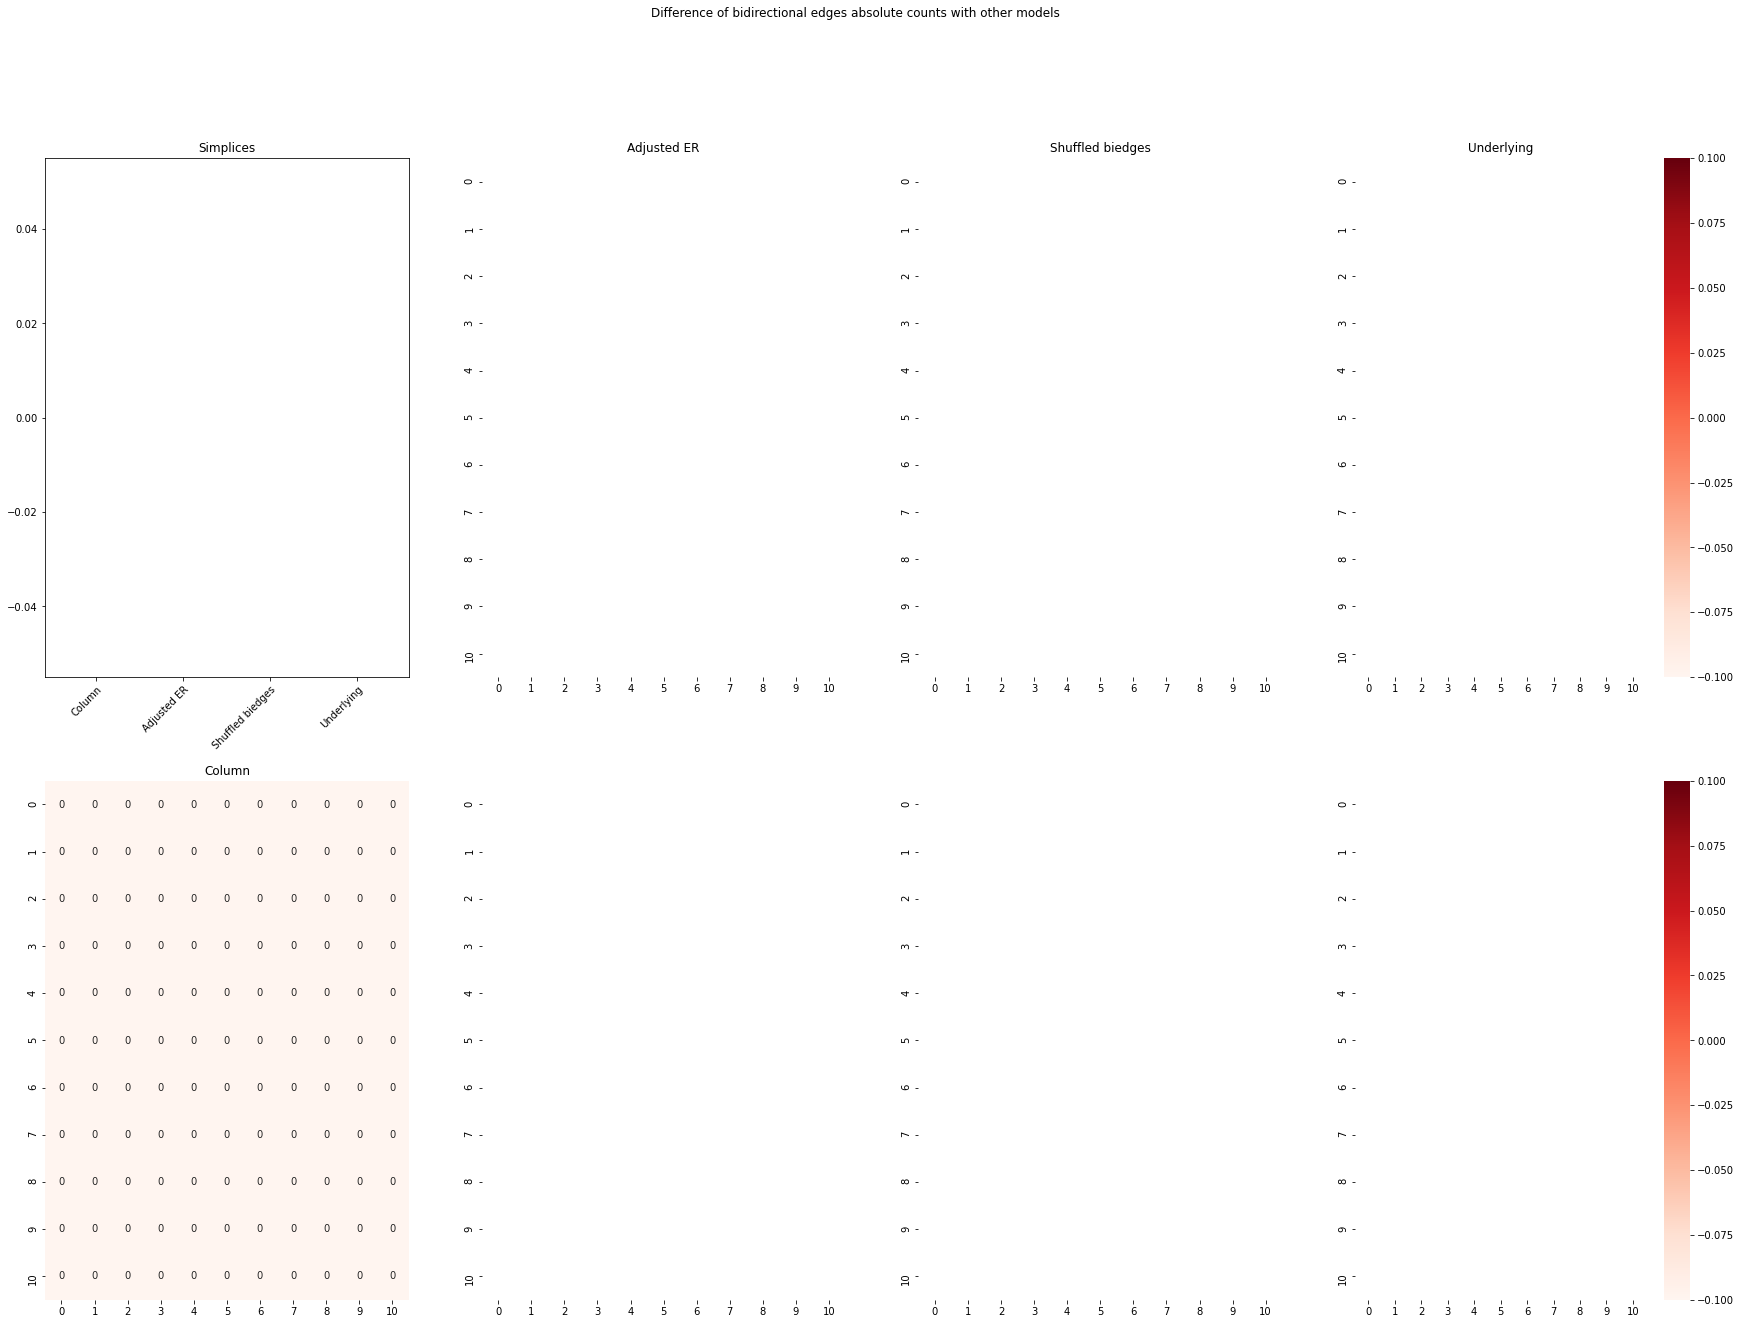

In [47]:
compare_graphs_diff([a,b0,c0,d0], 1, "difference")

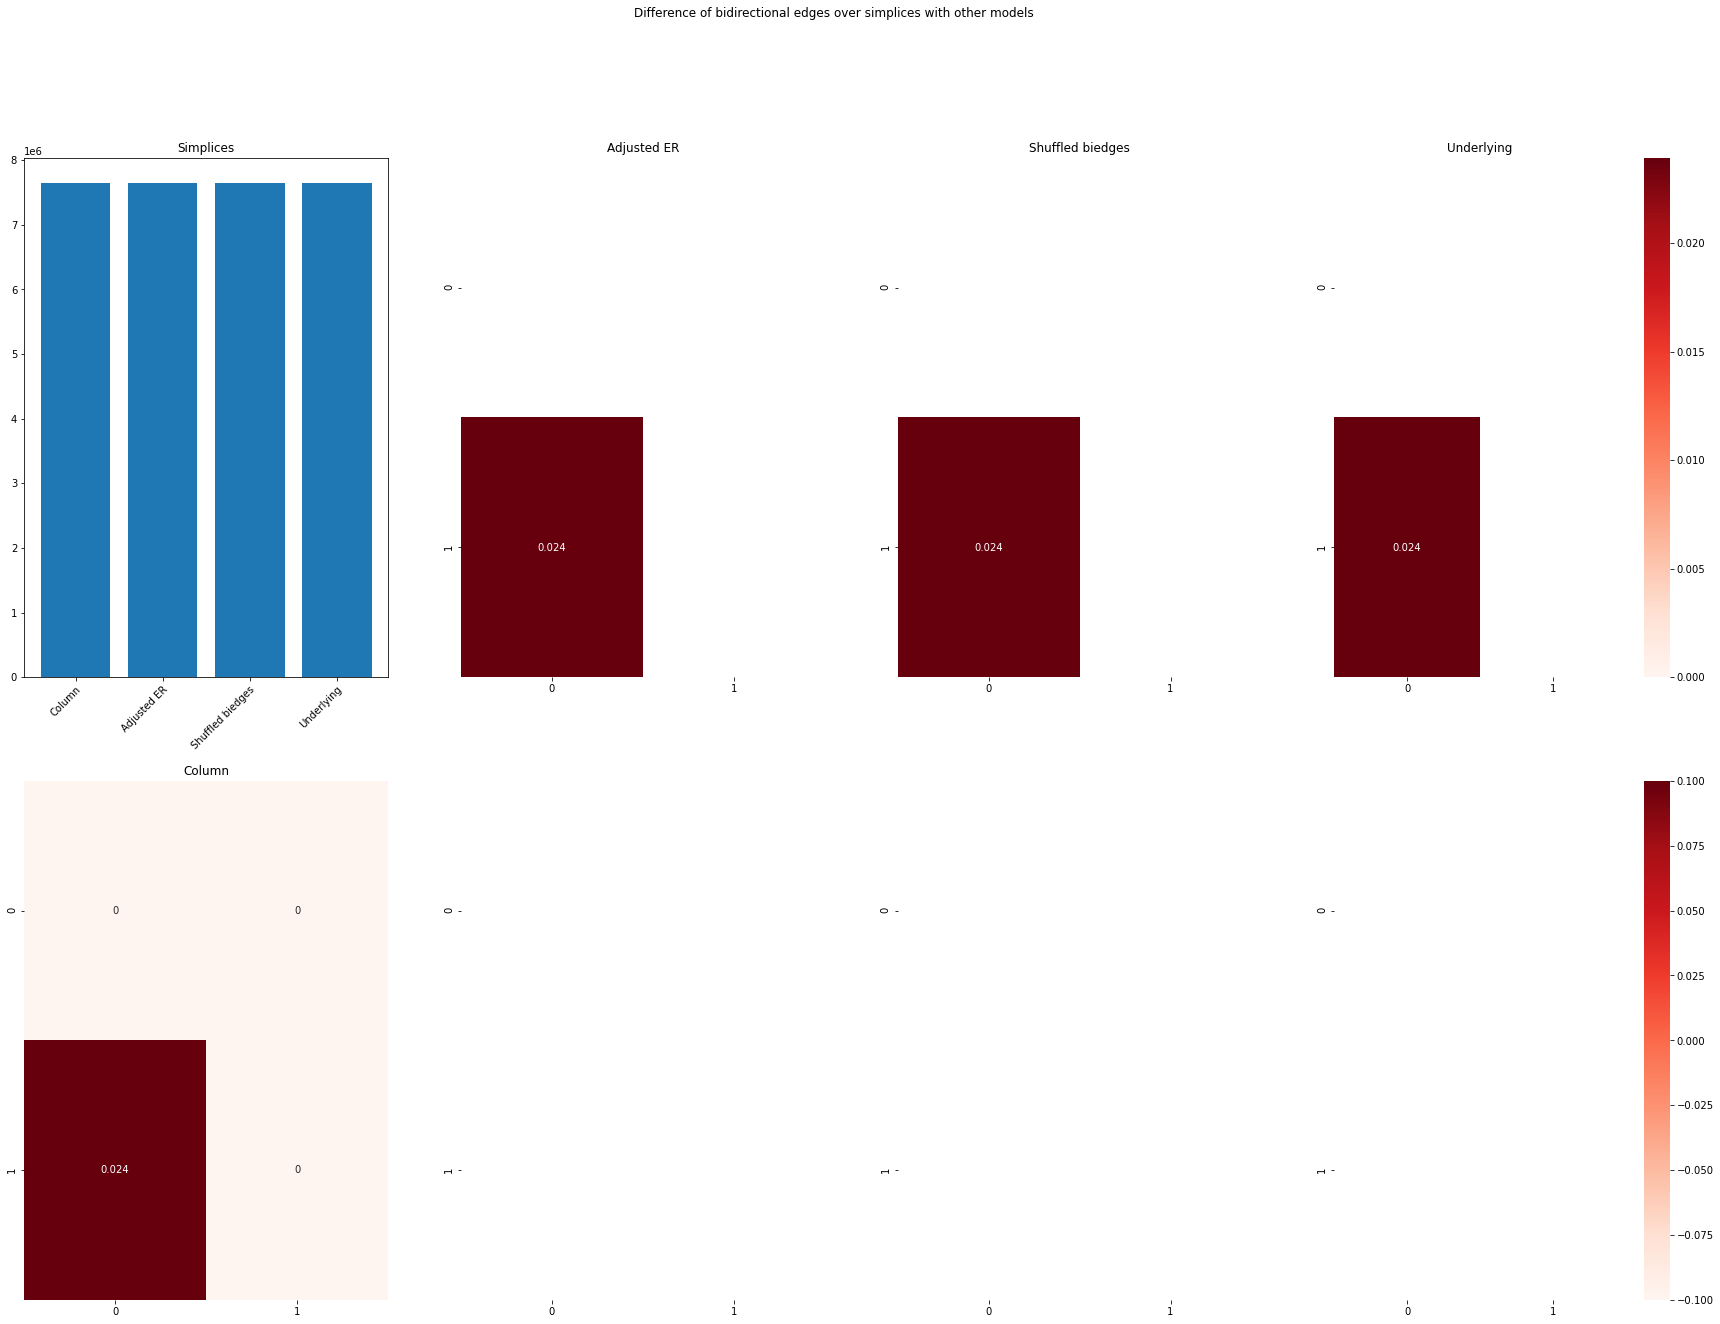

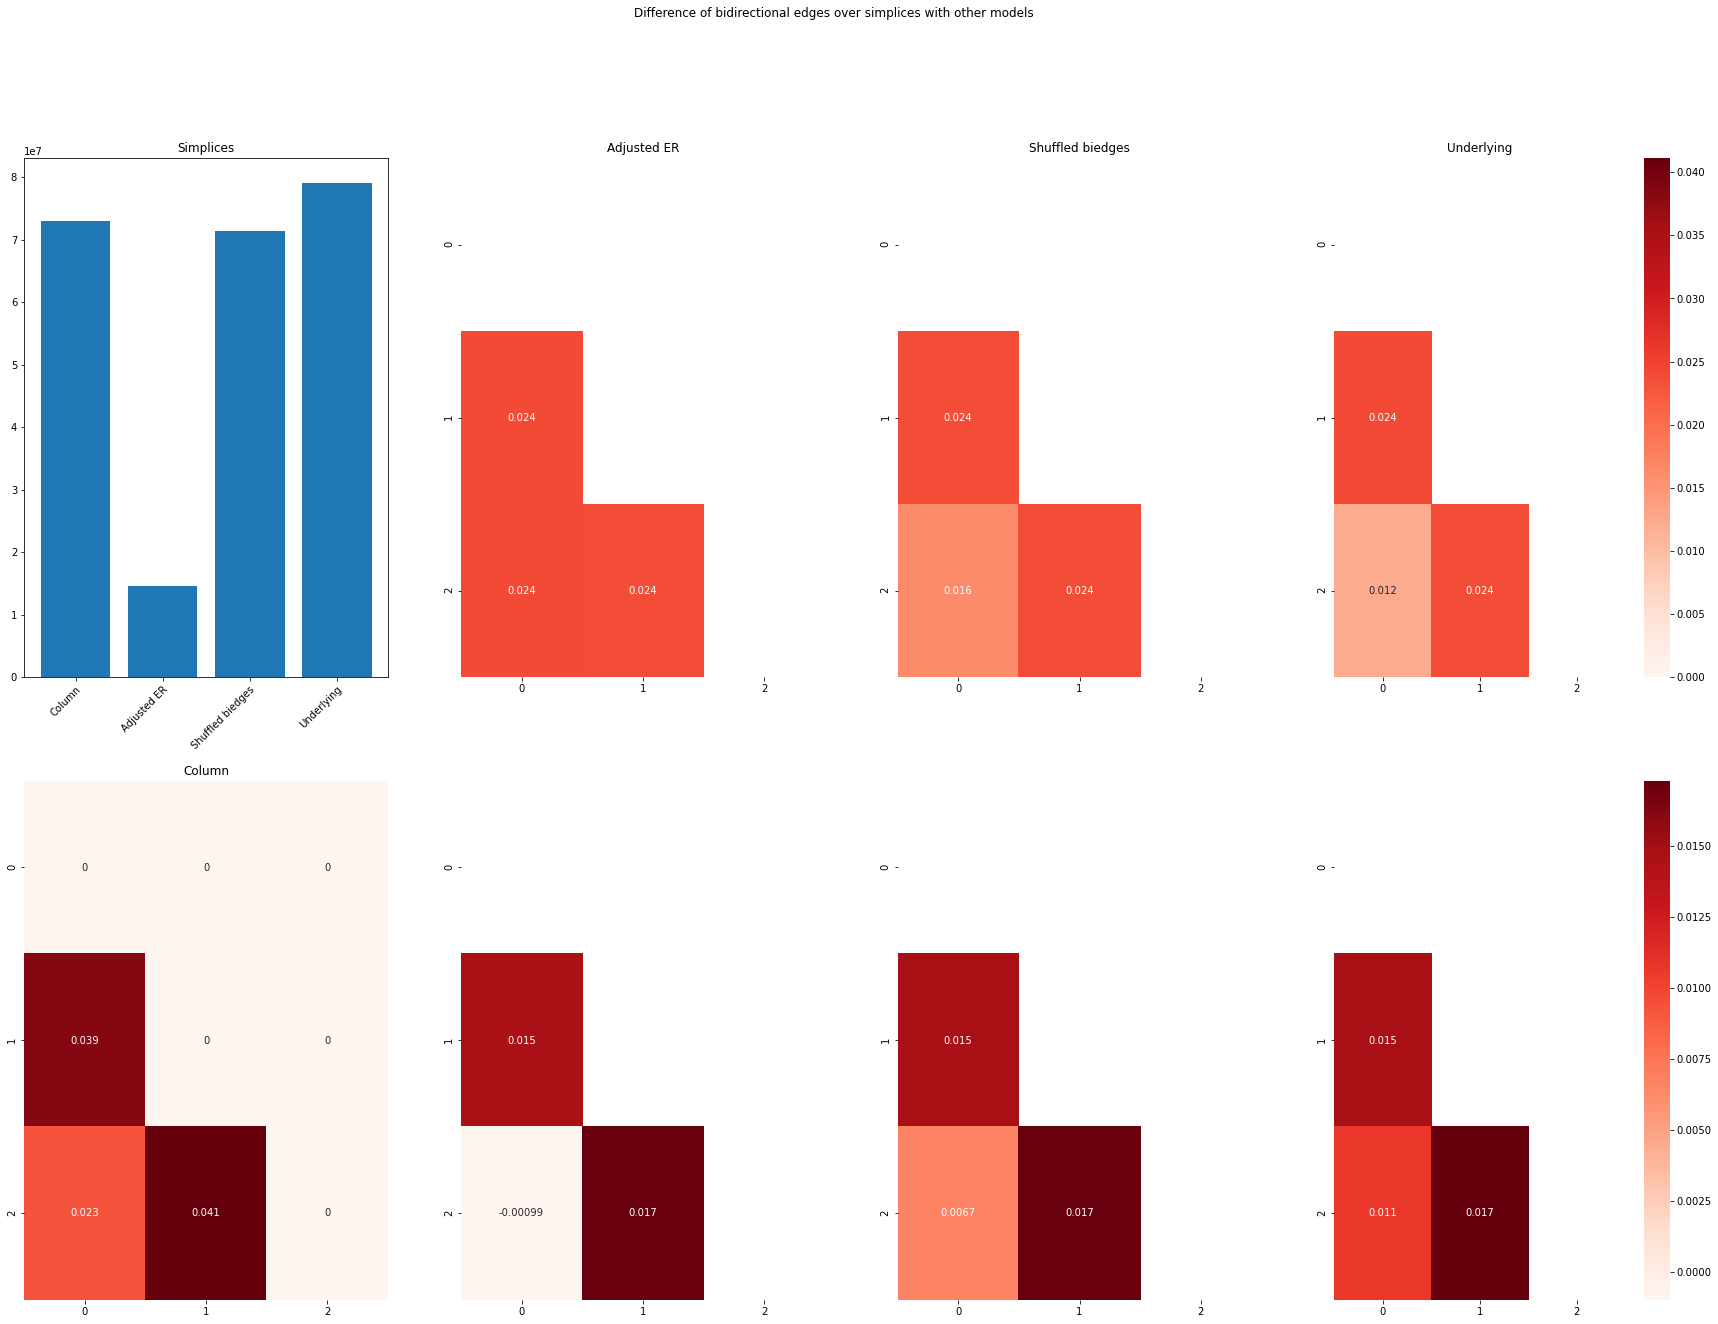

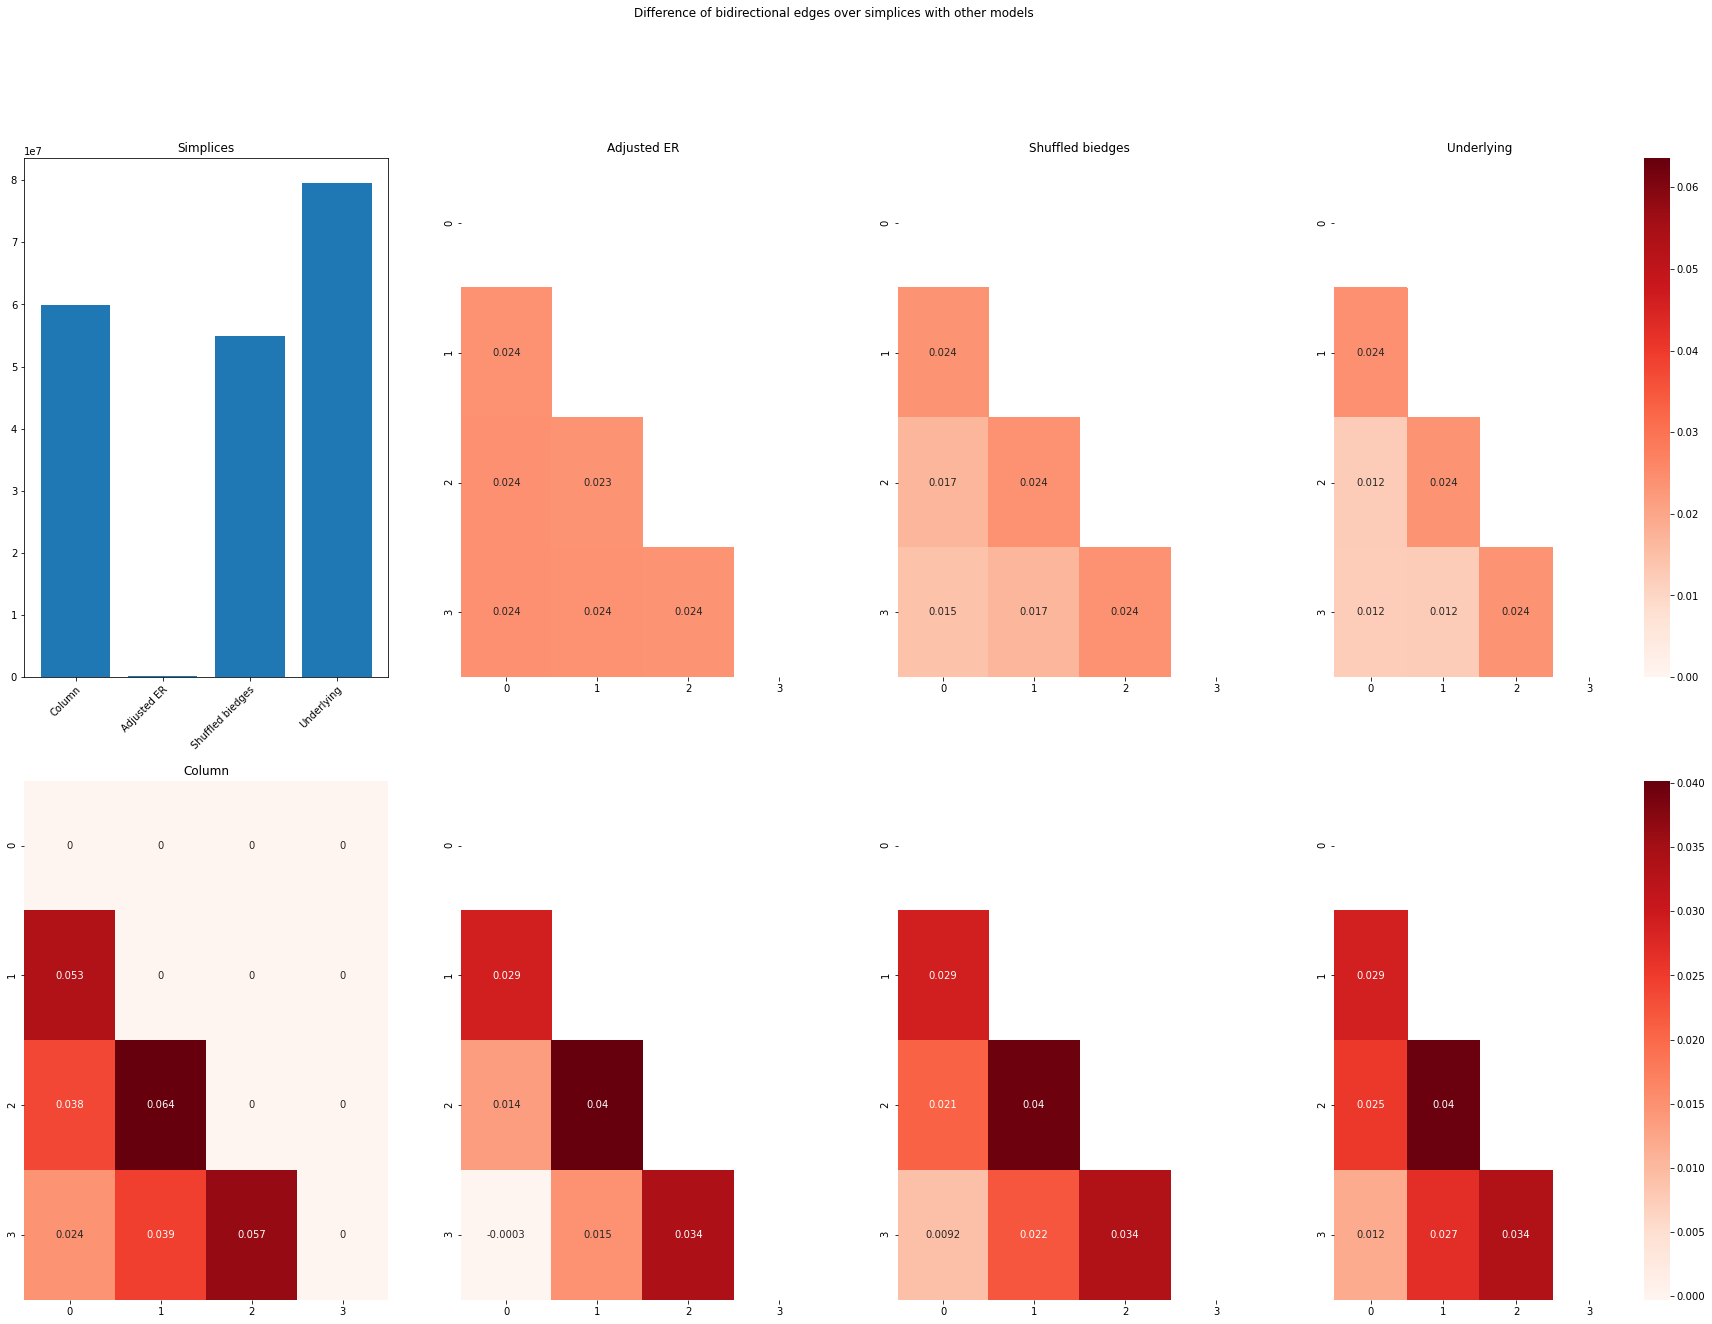

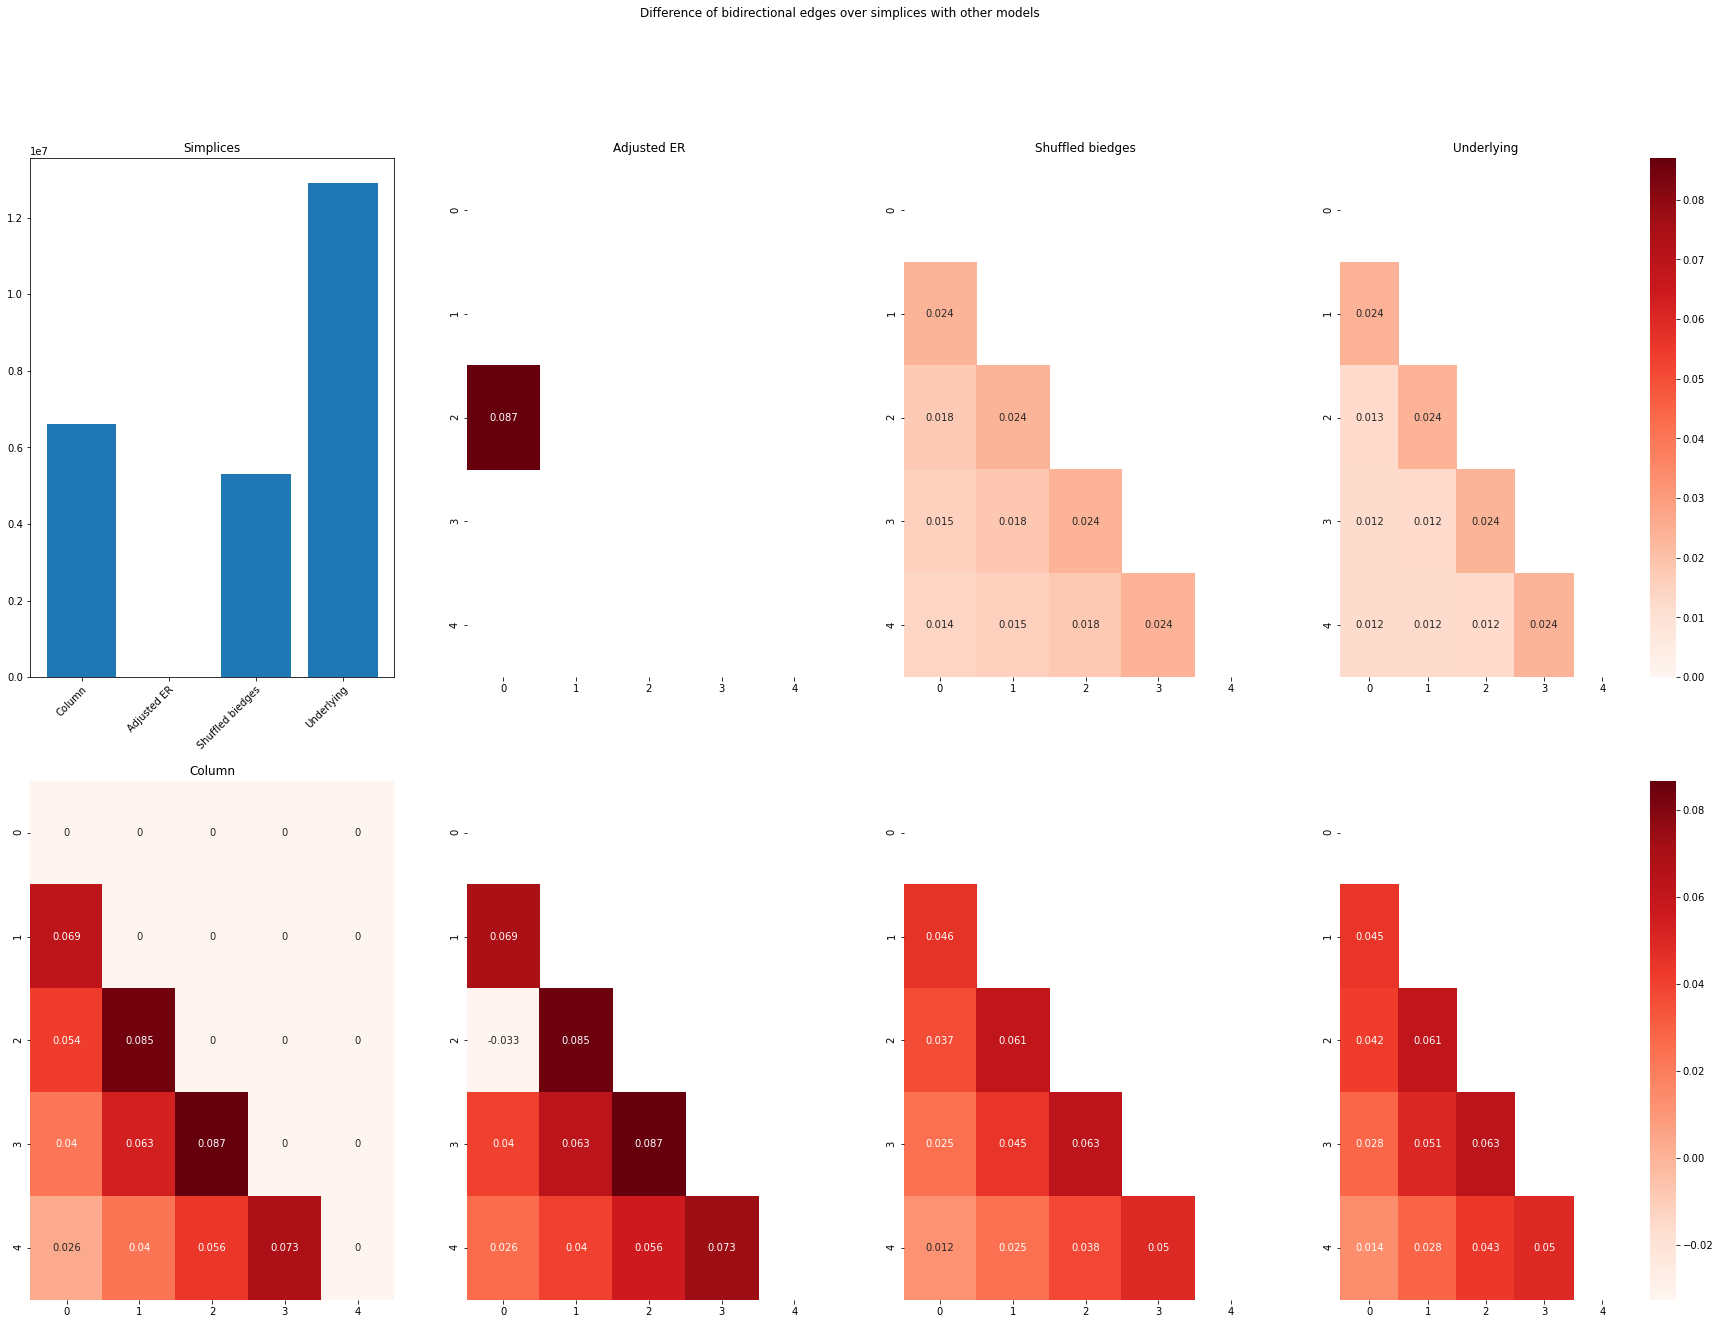

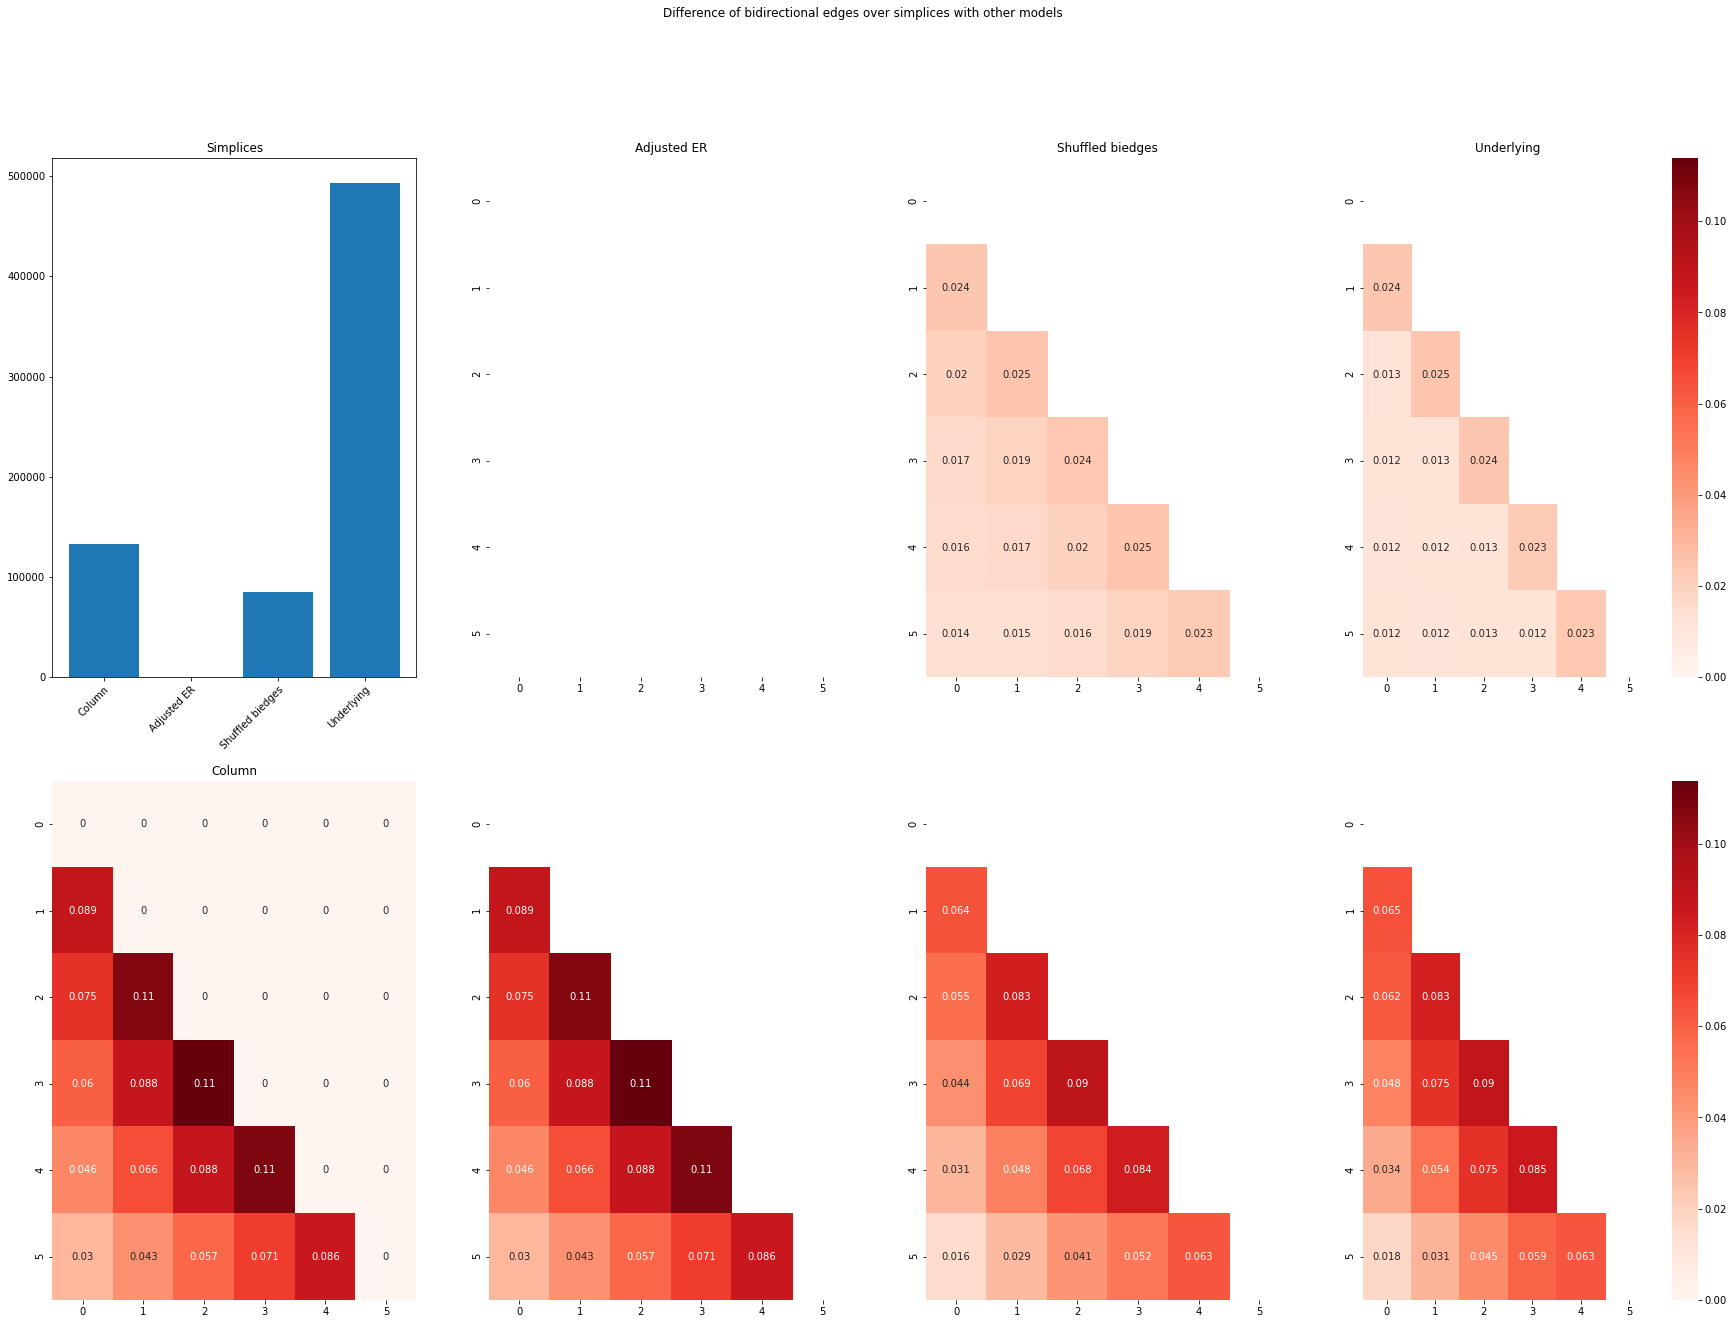

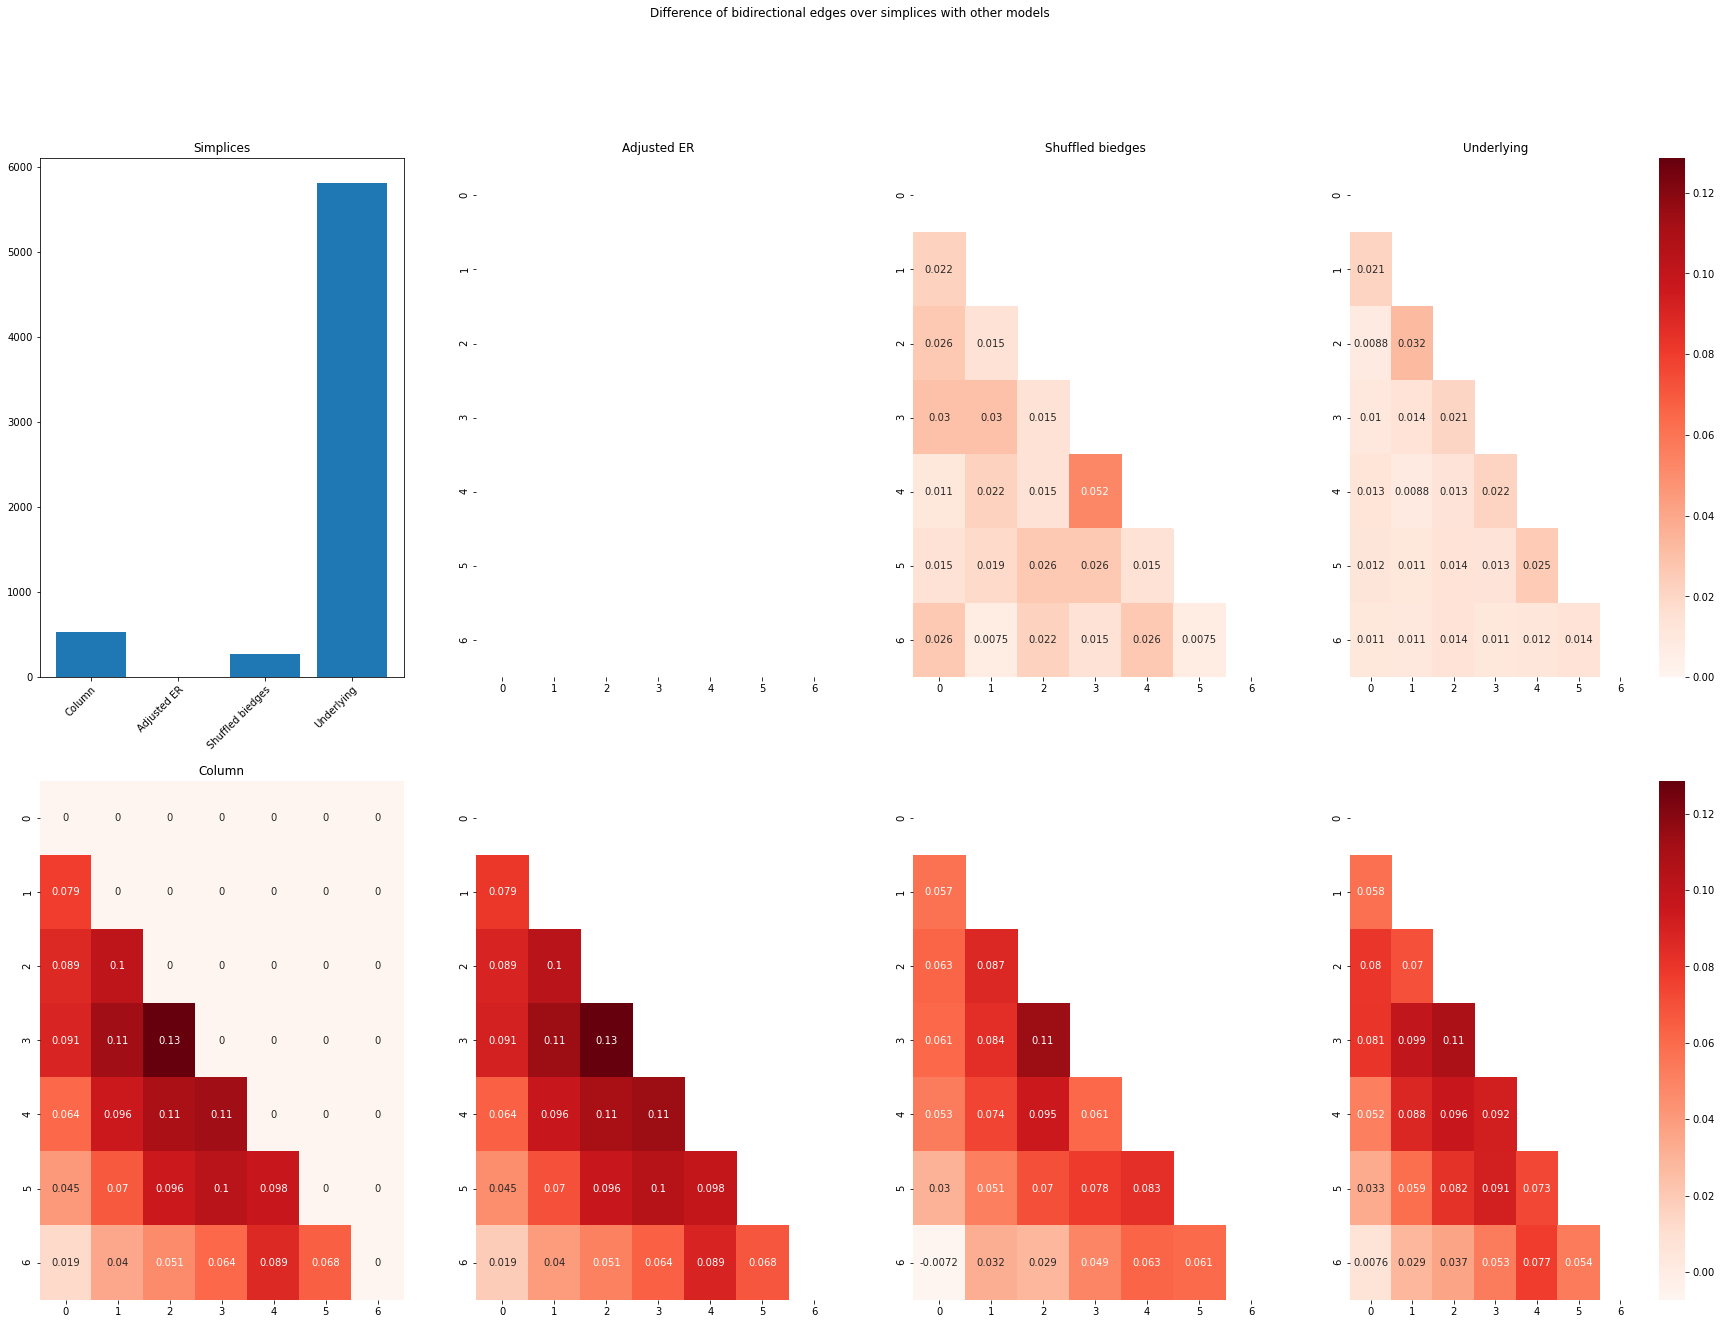

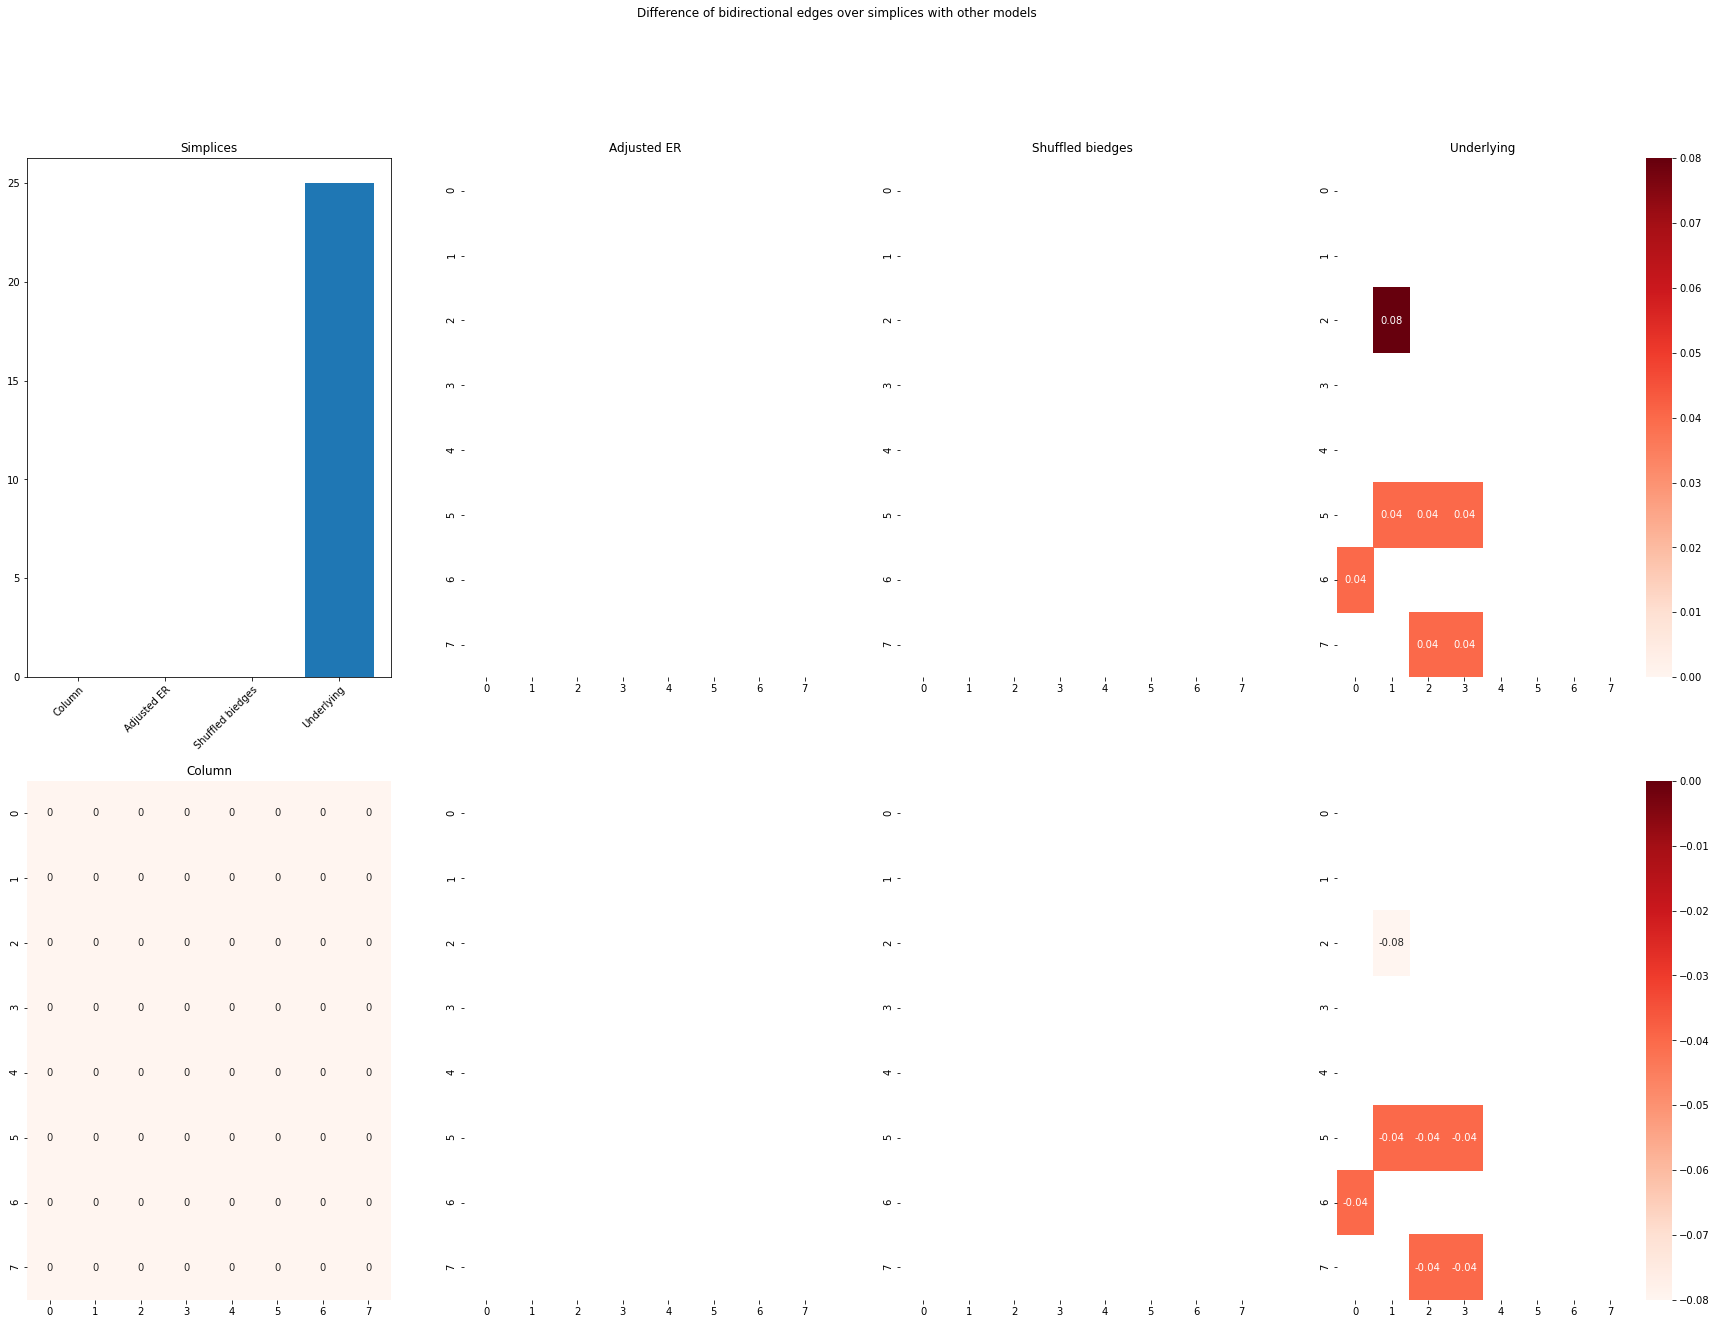

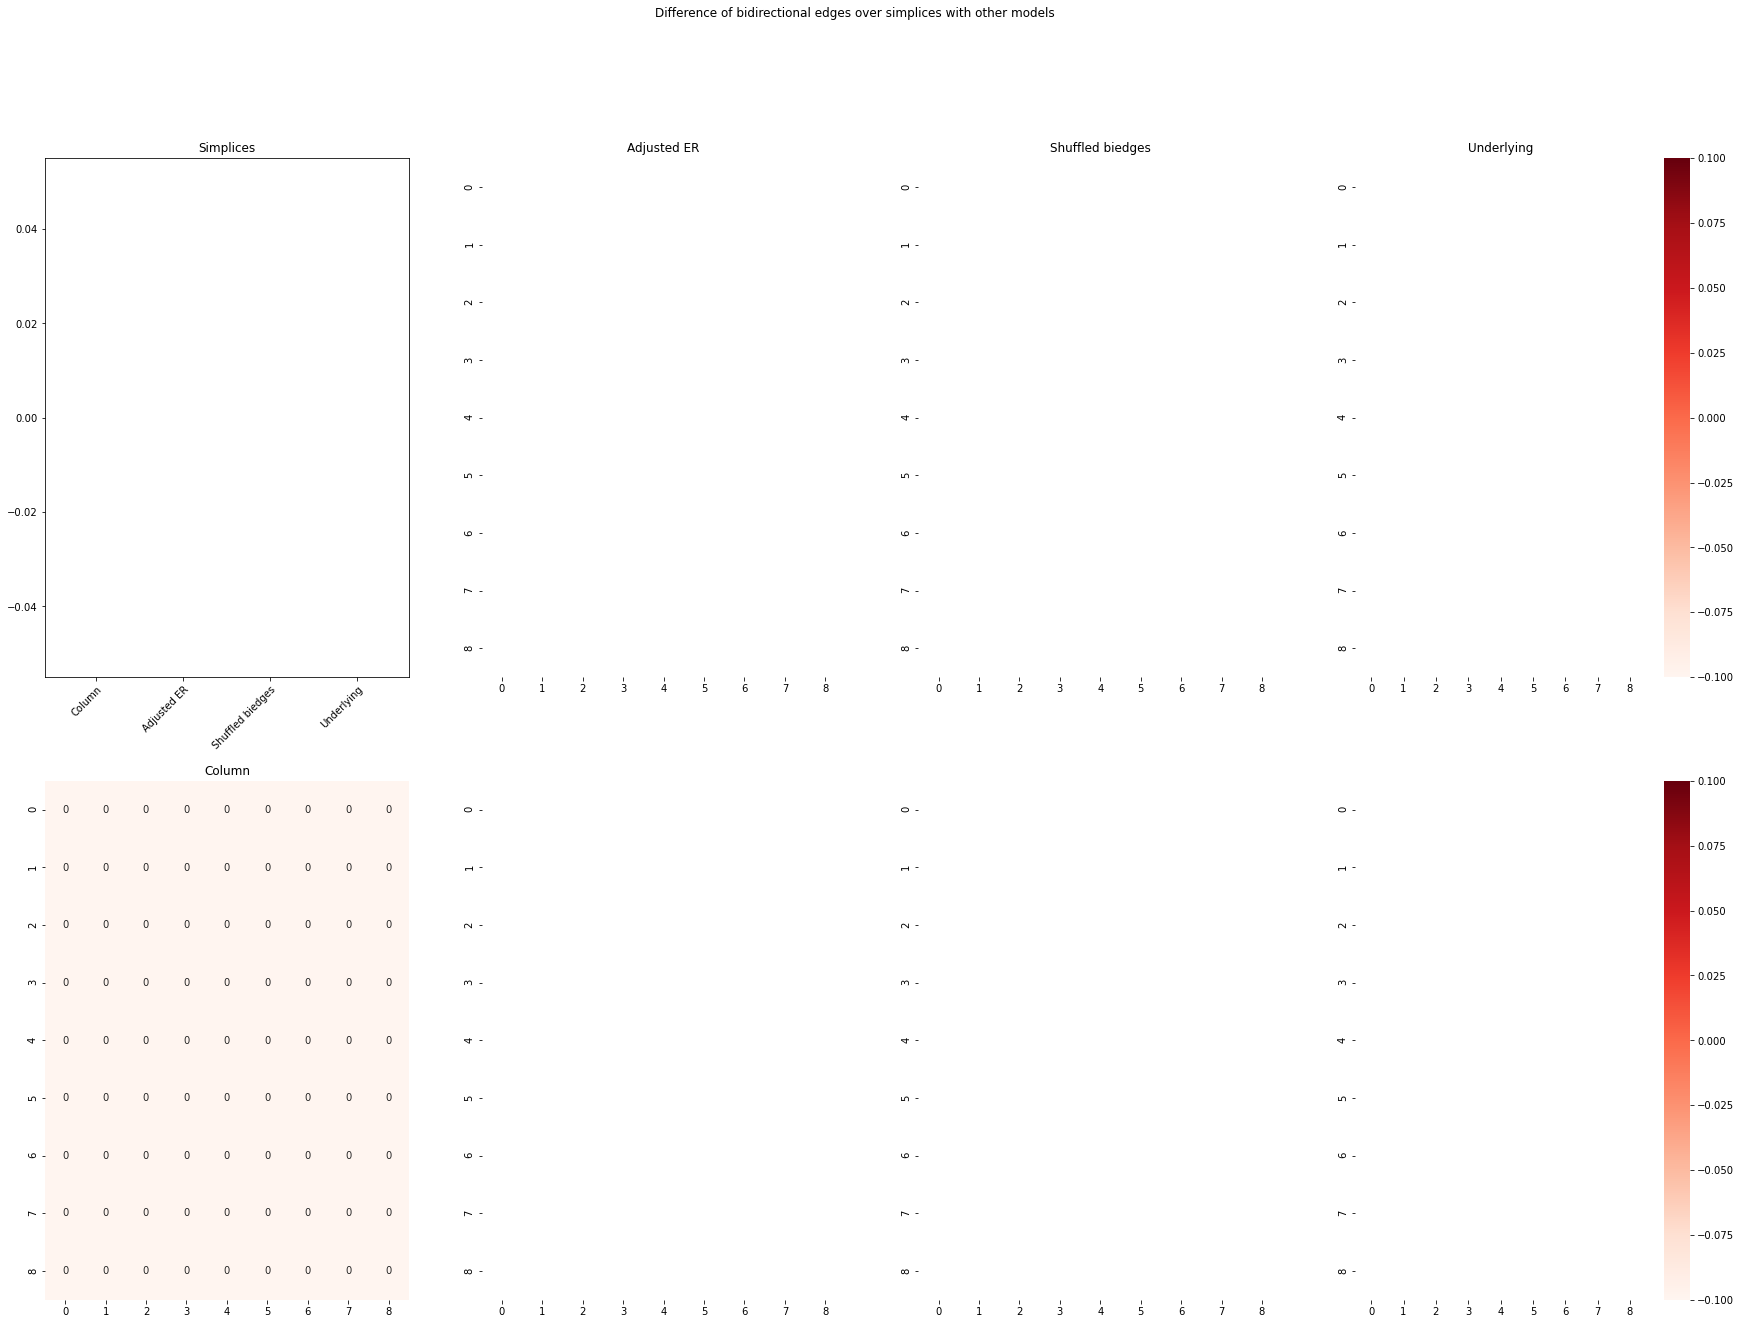

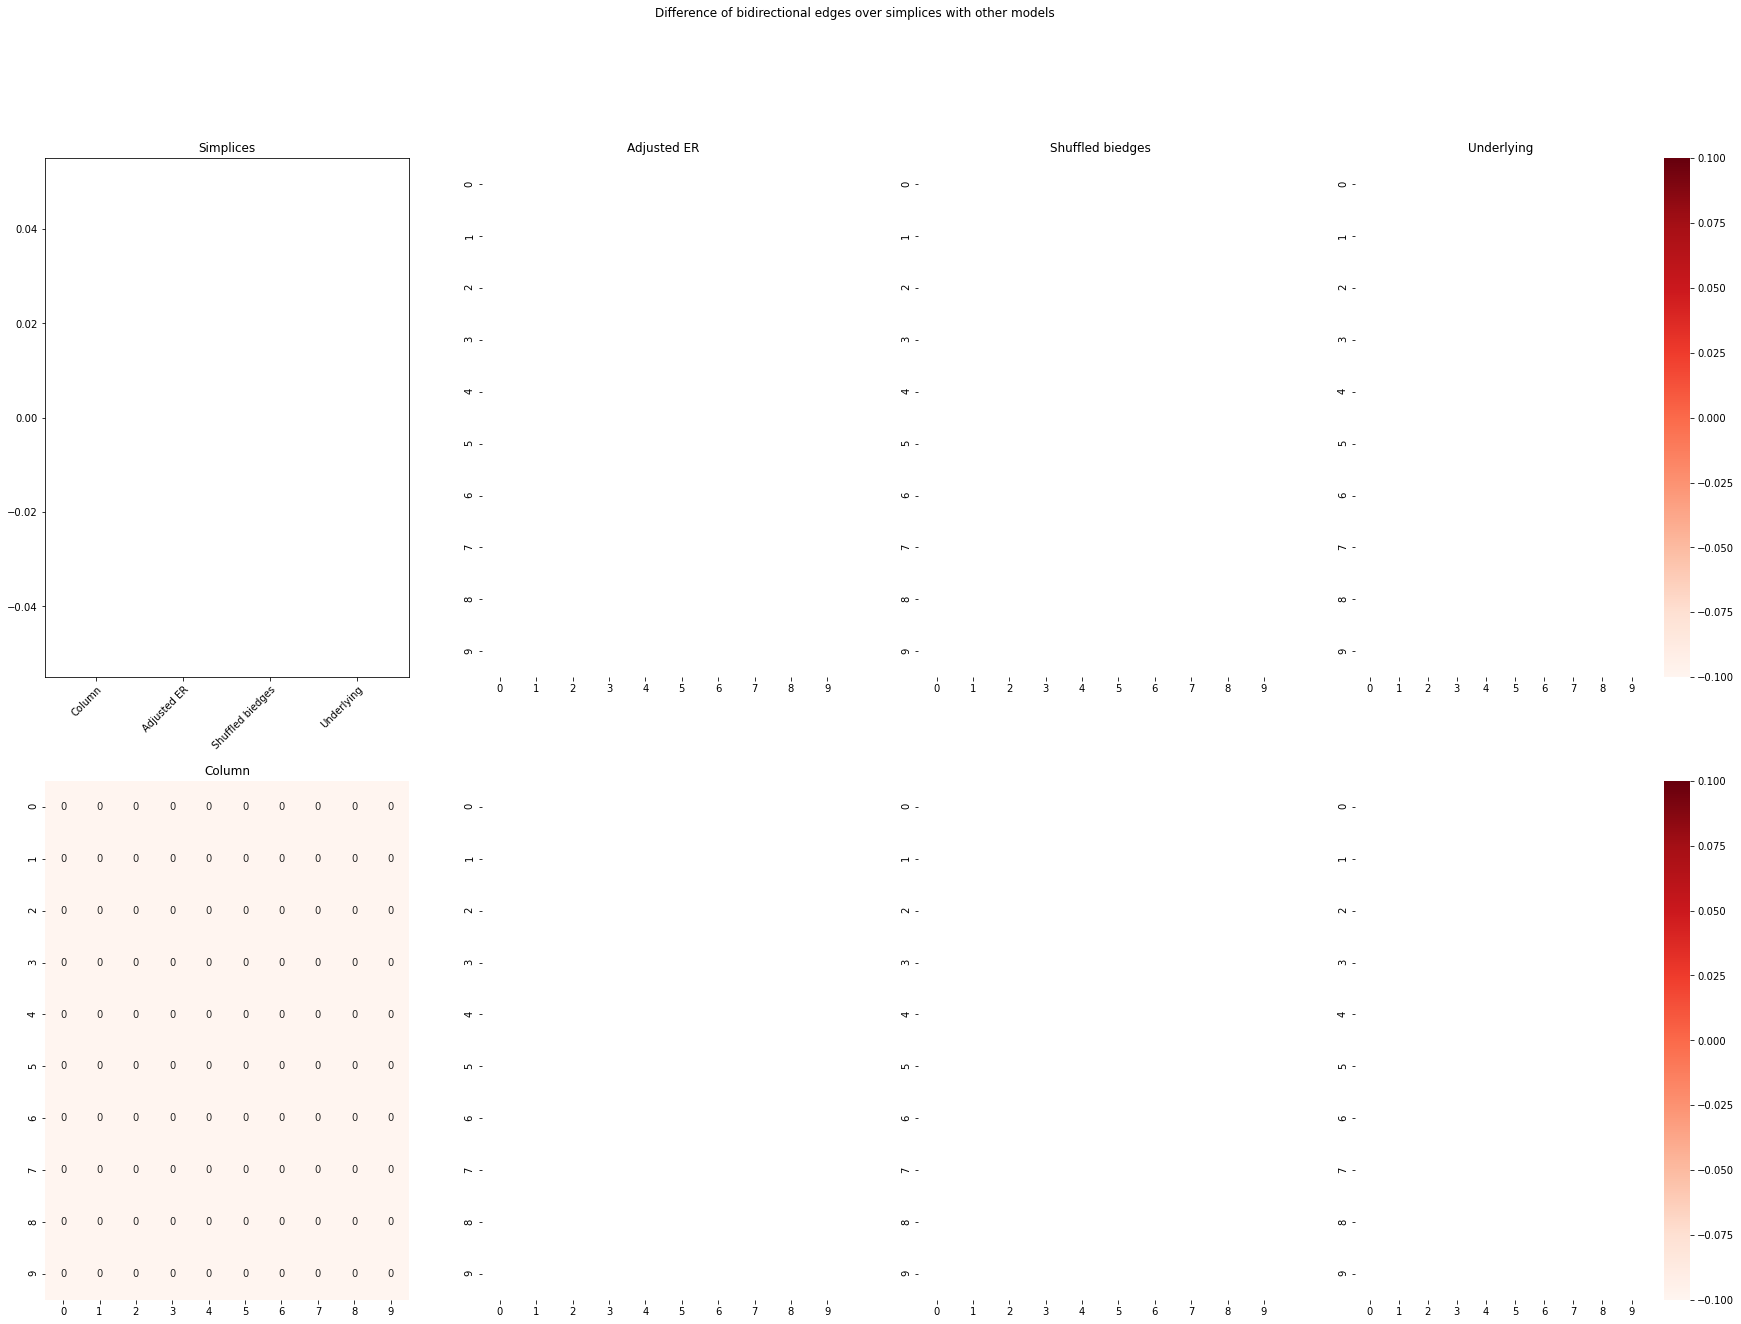

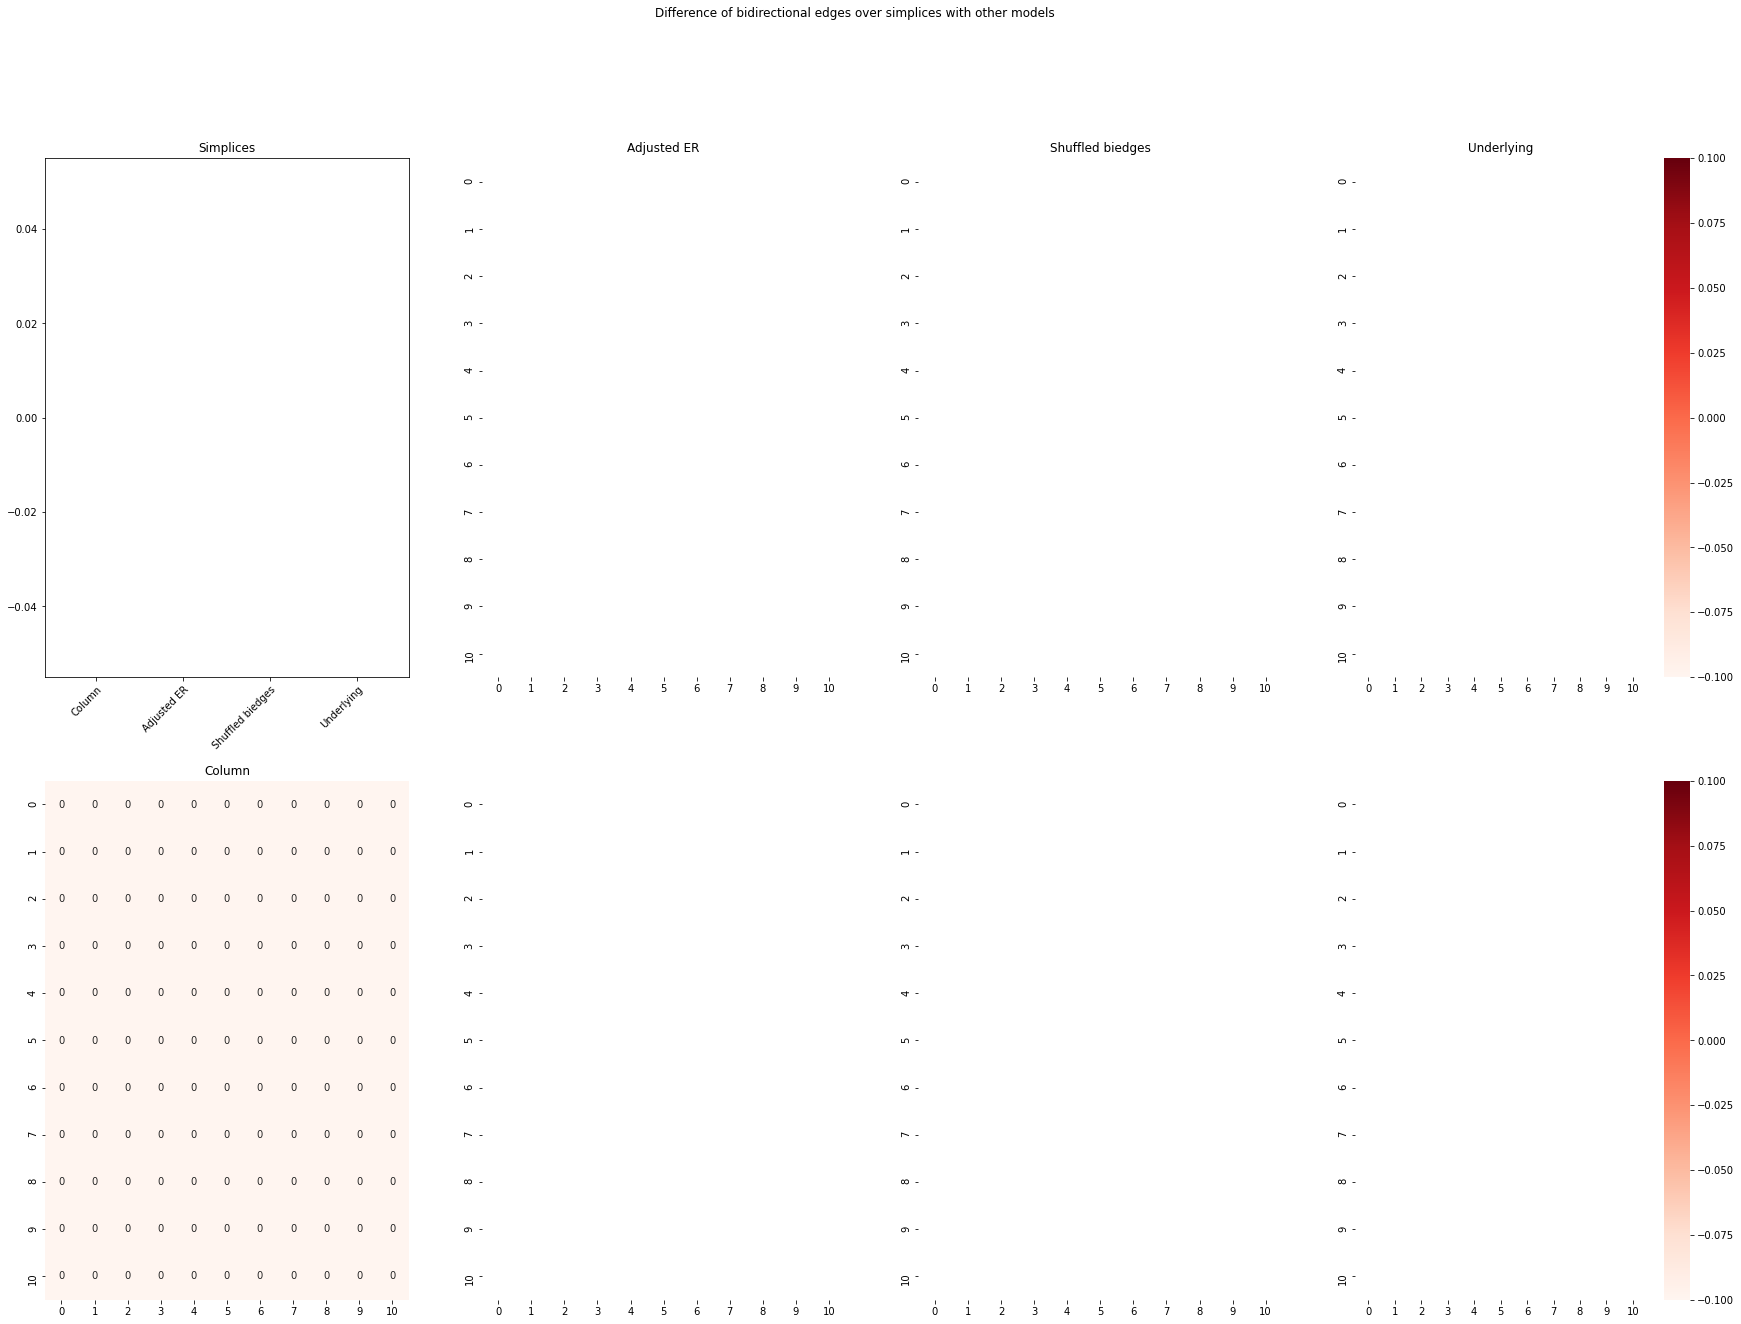

In [48]:
compare_graphs_diff_normalized([a,b0,c0,d0], 1, "difference_normalized")

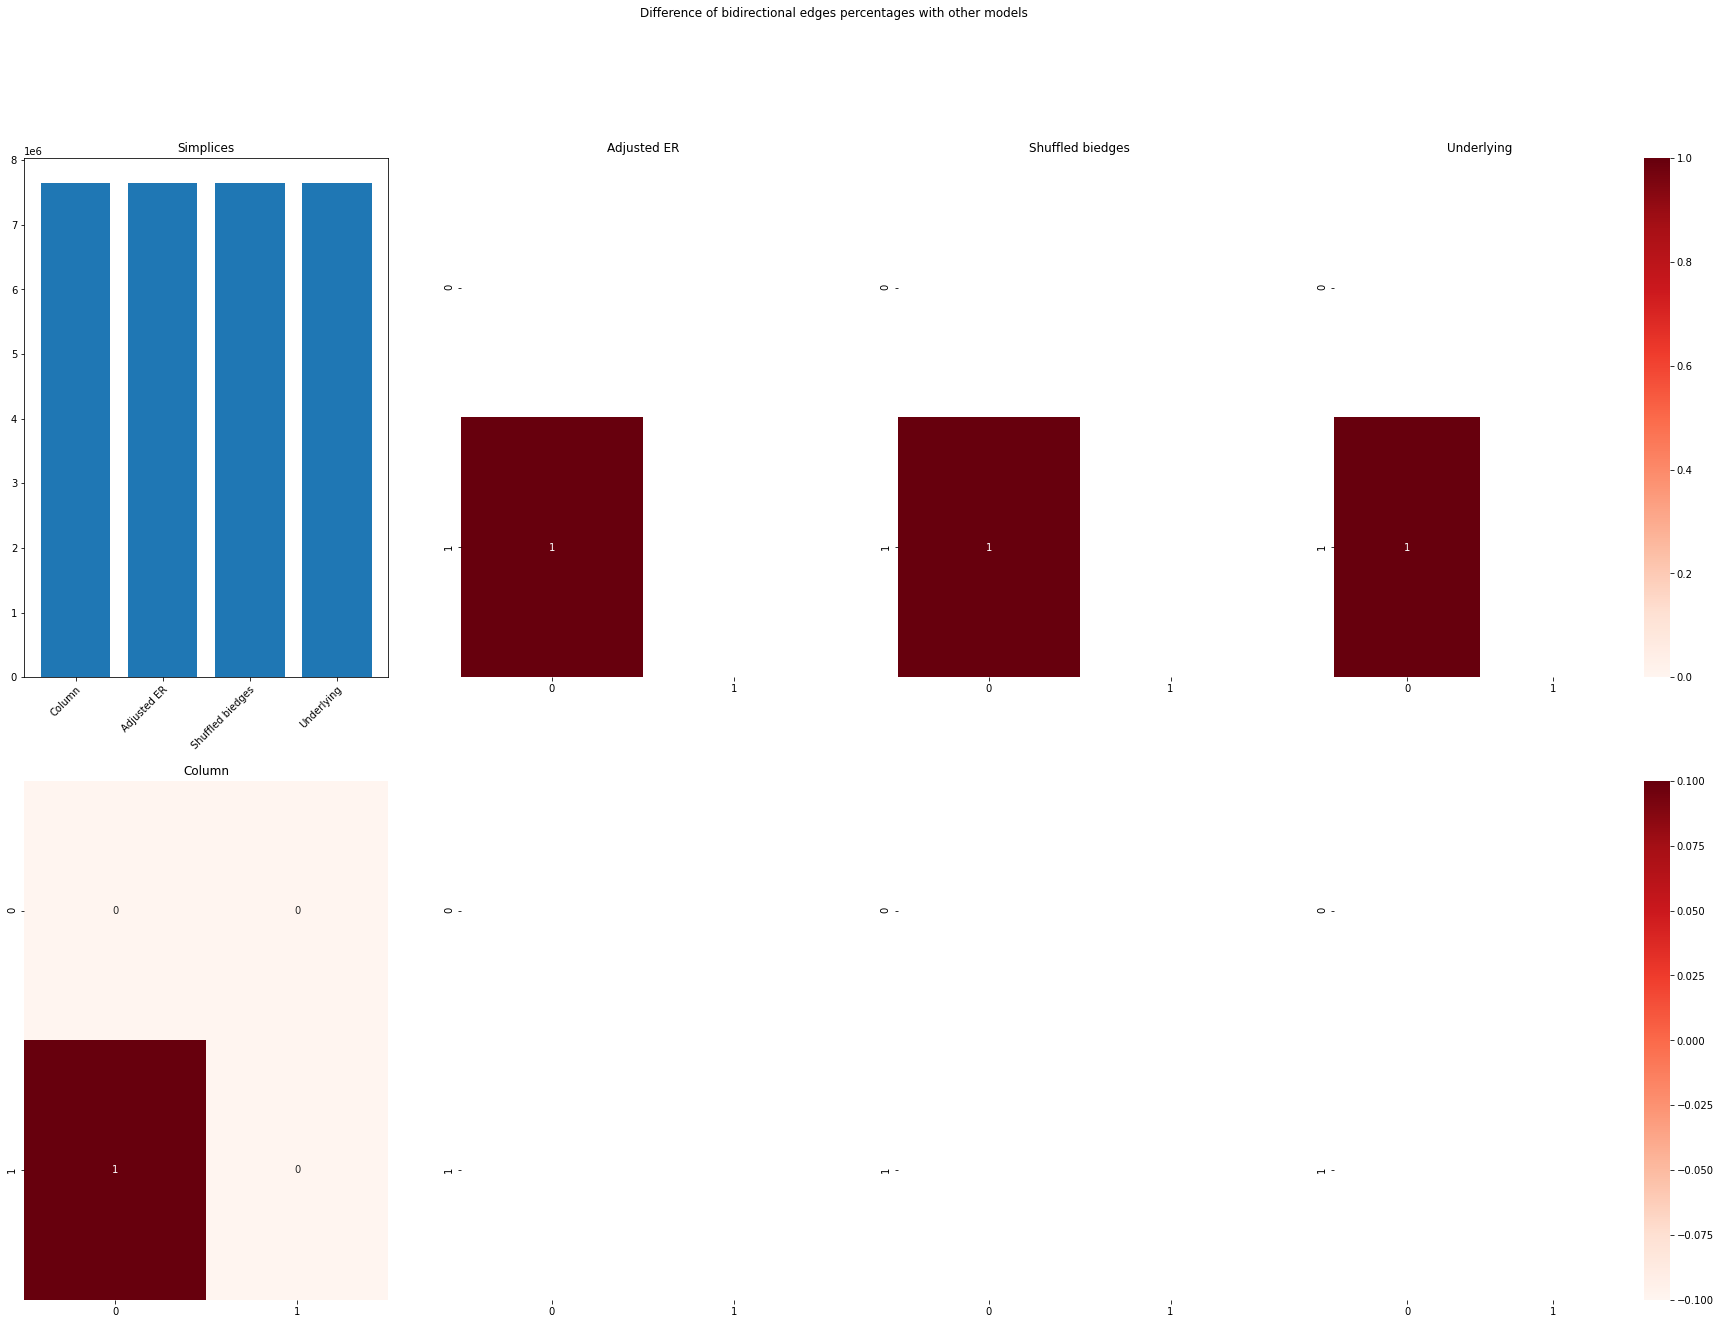

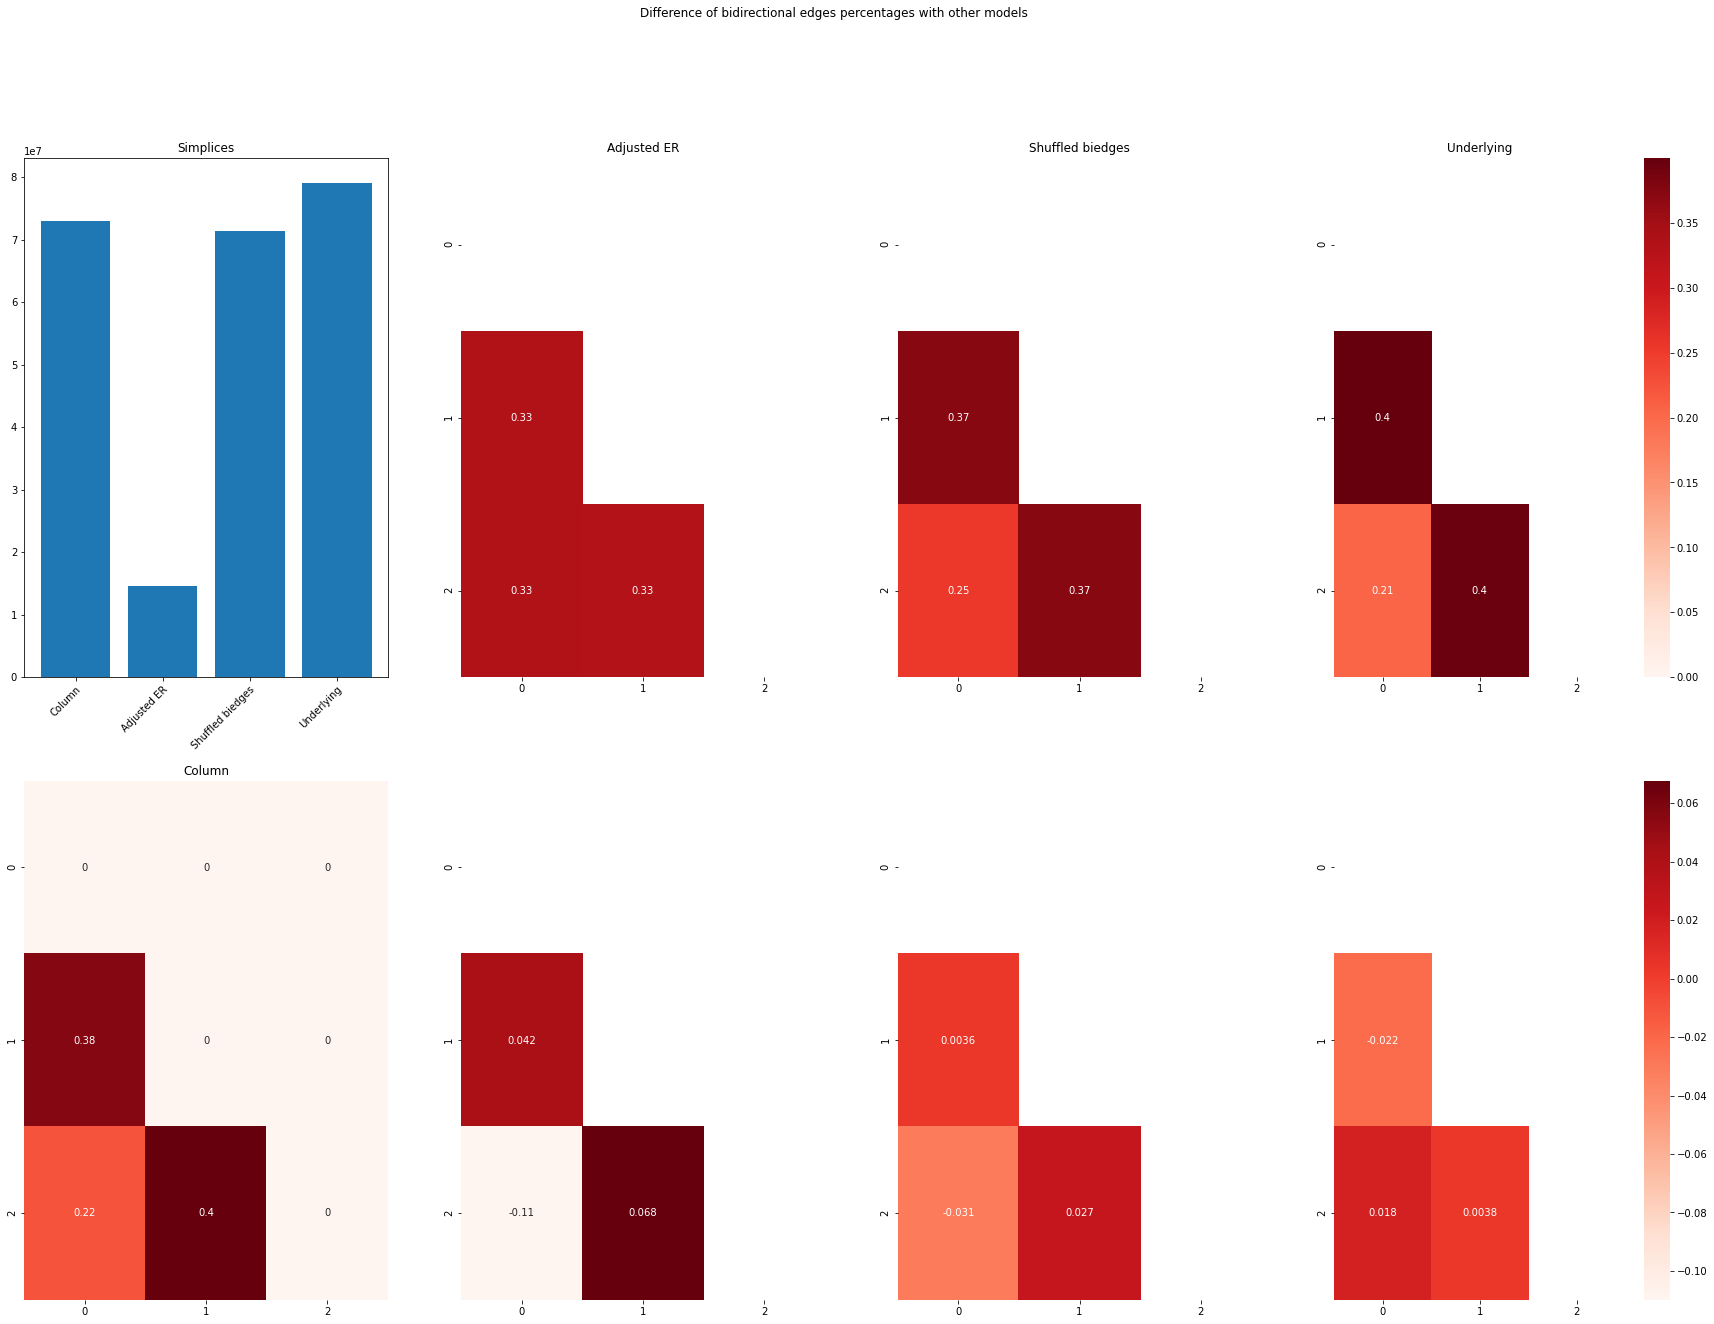

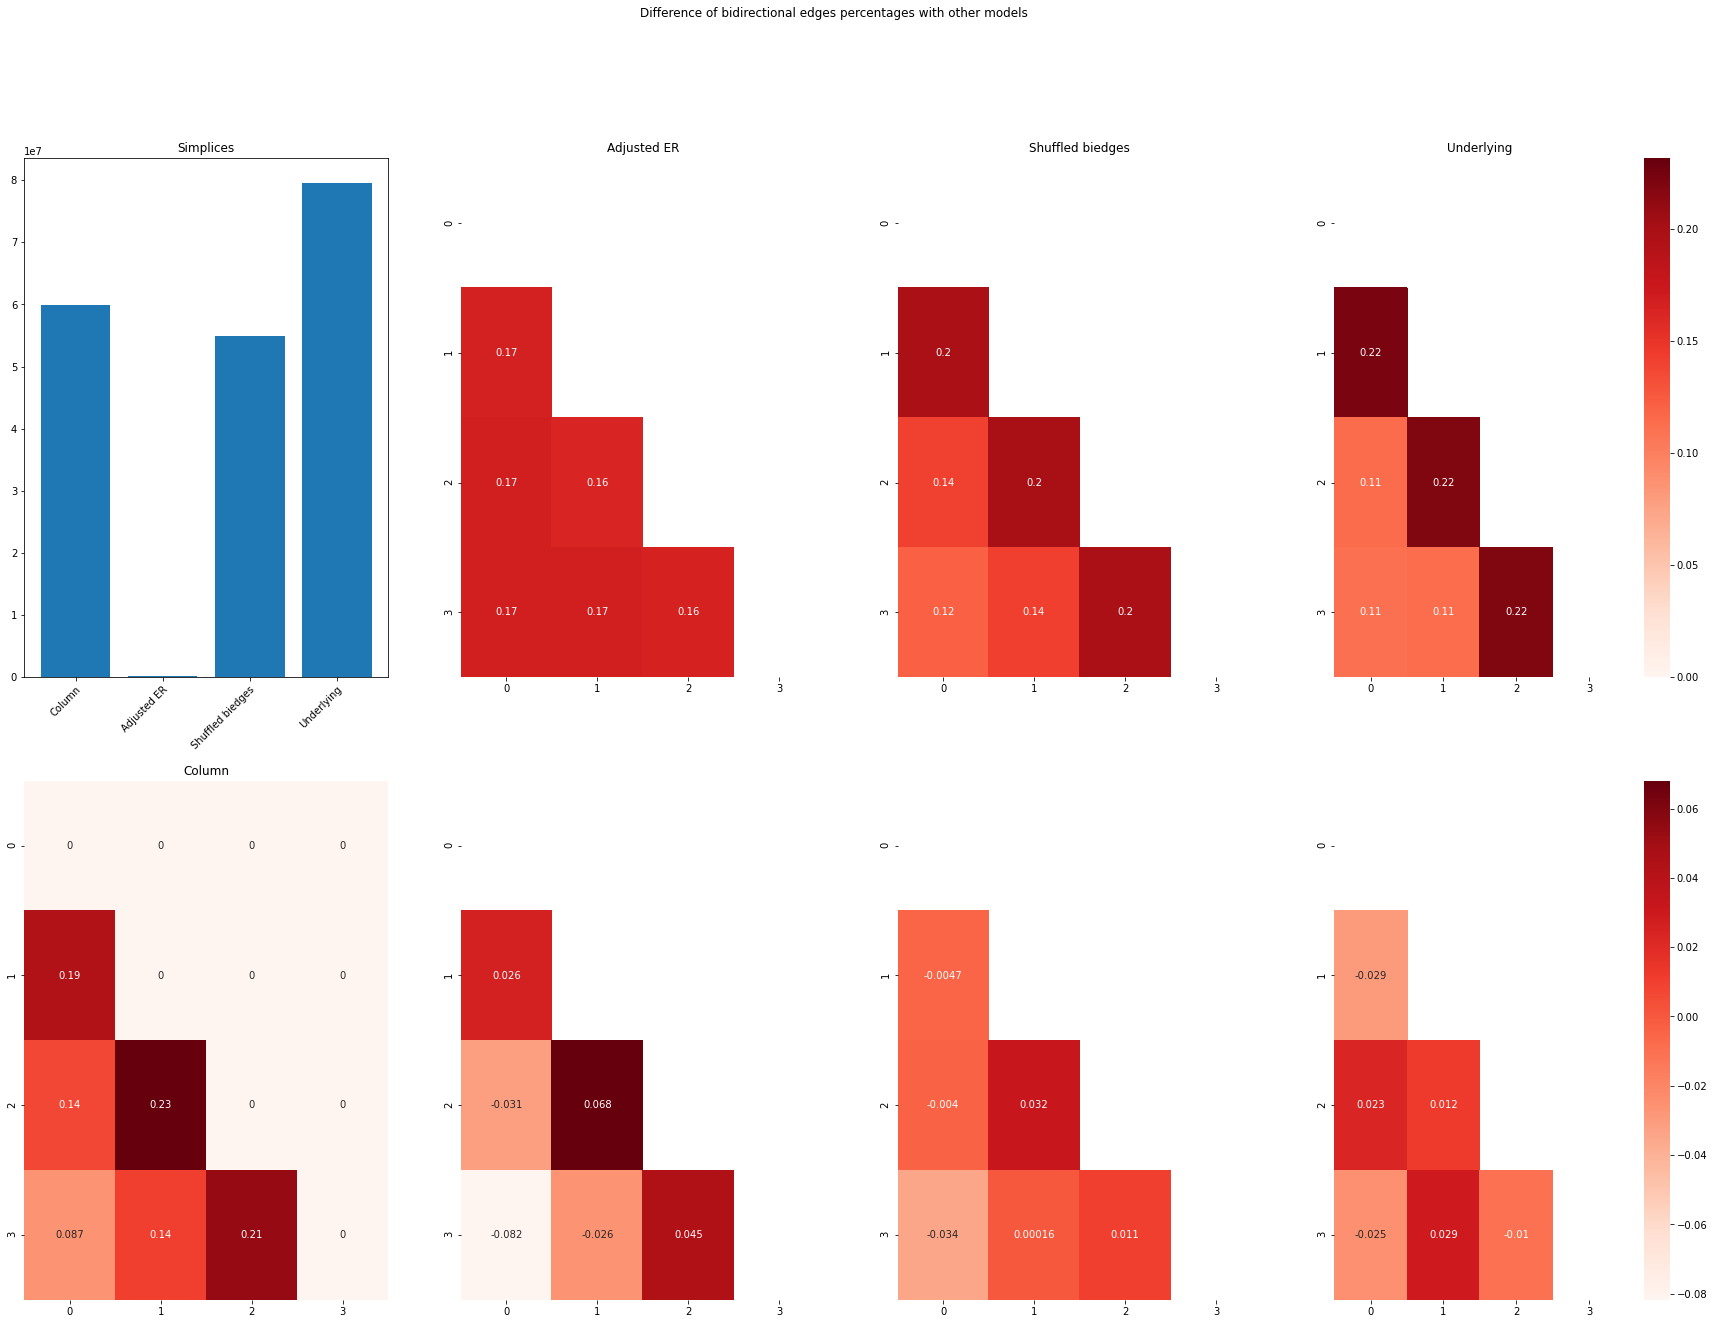

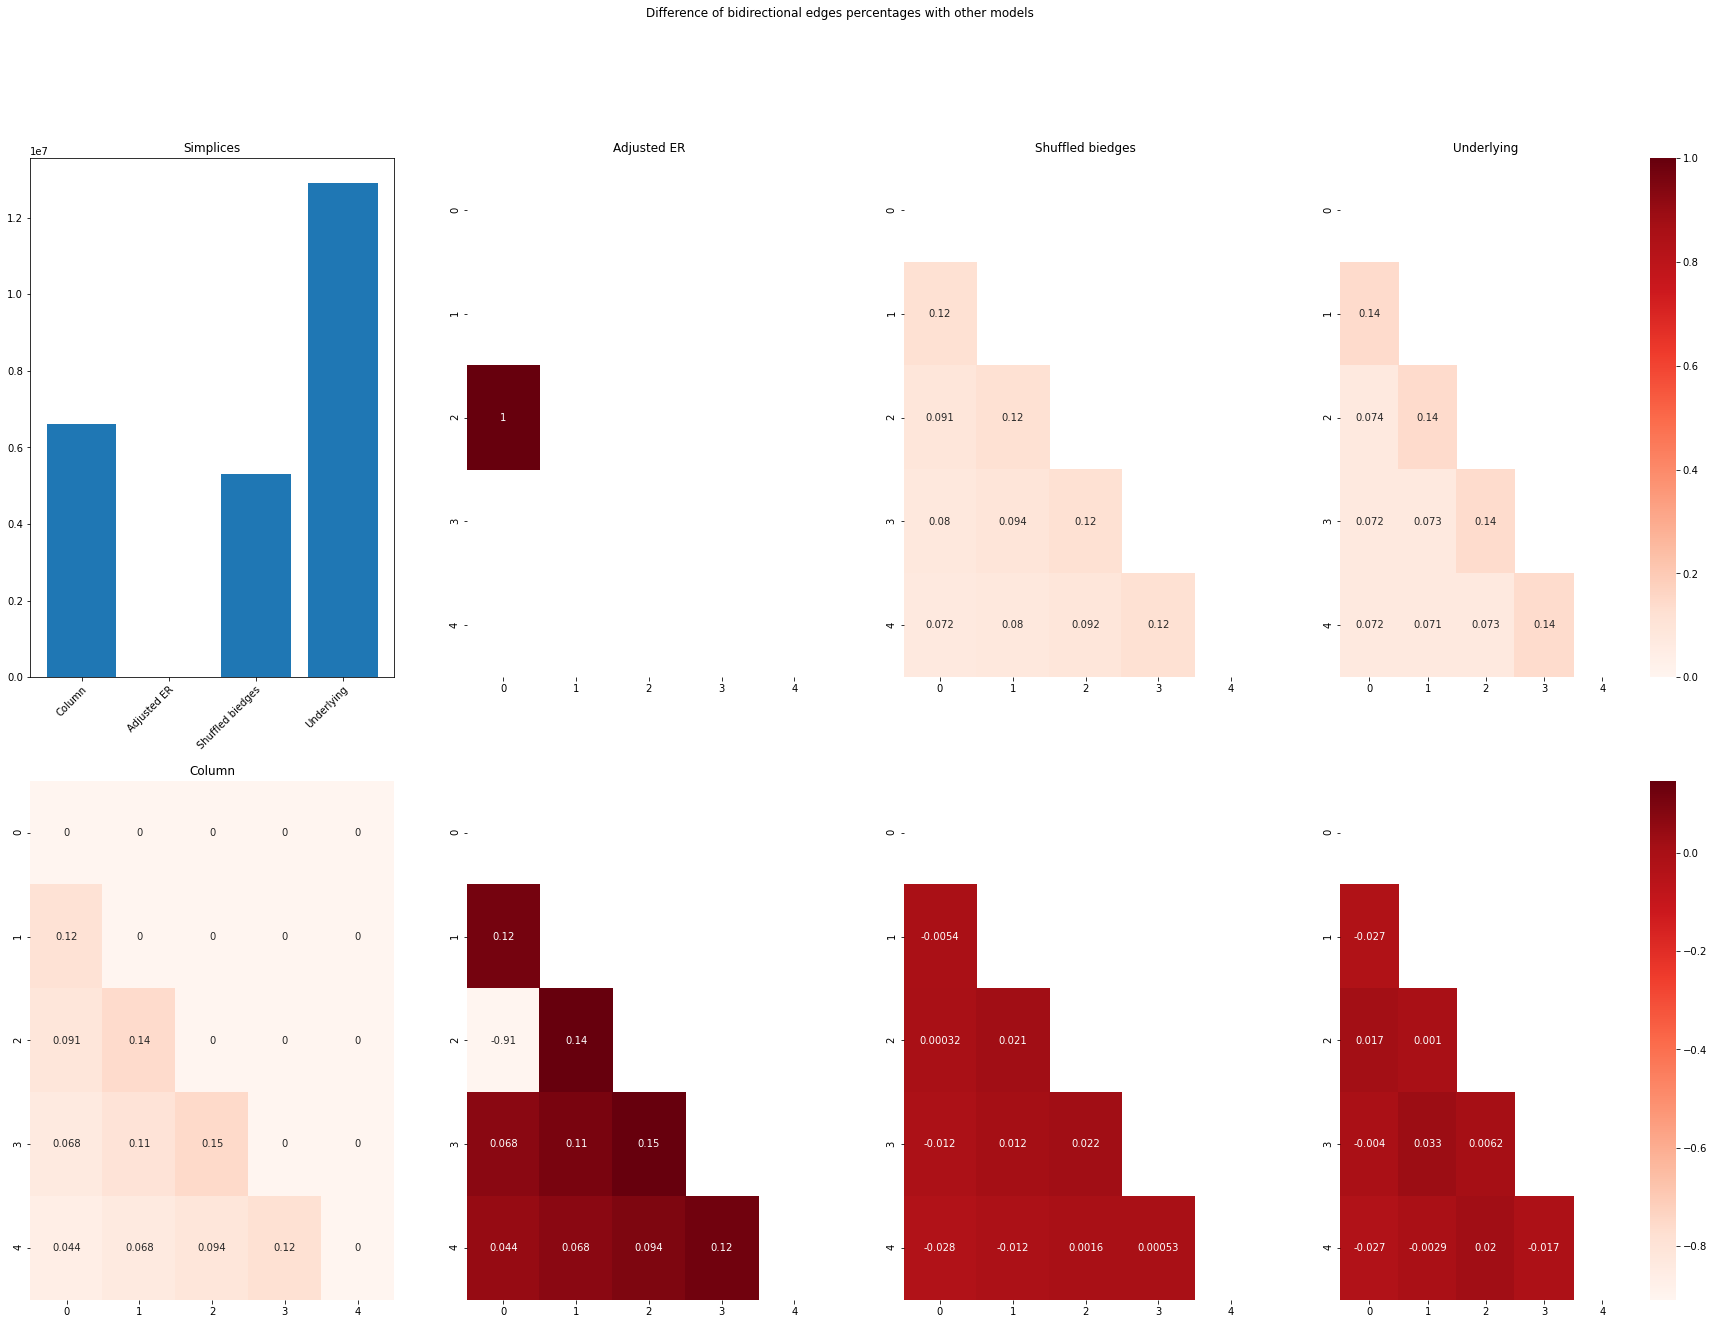

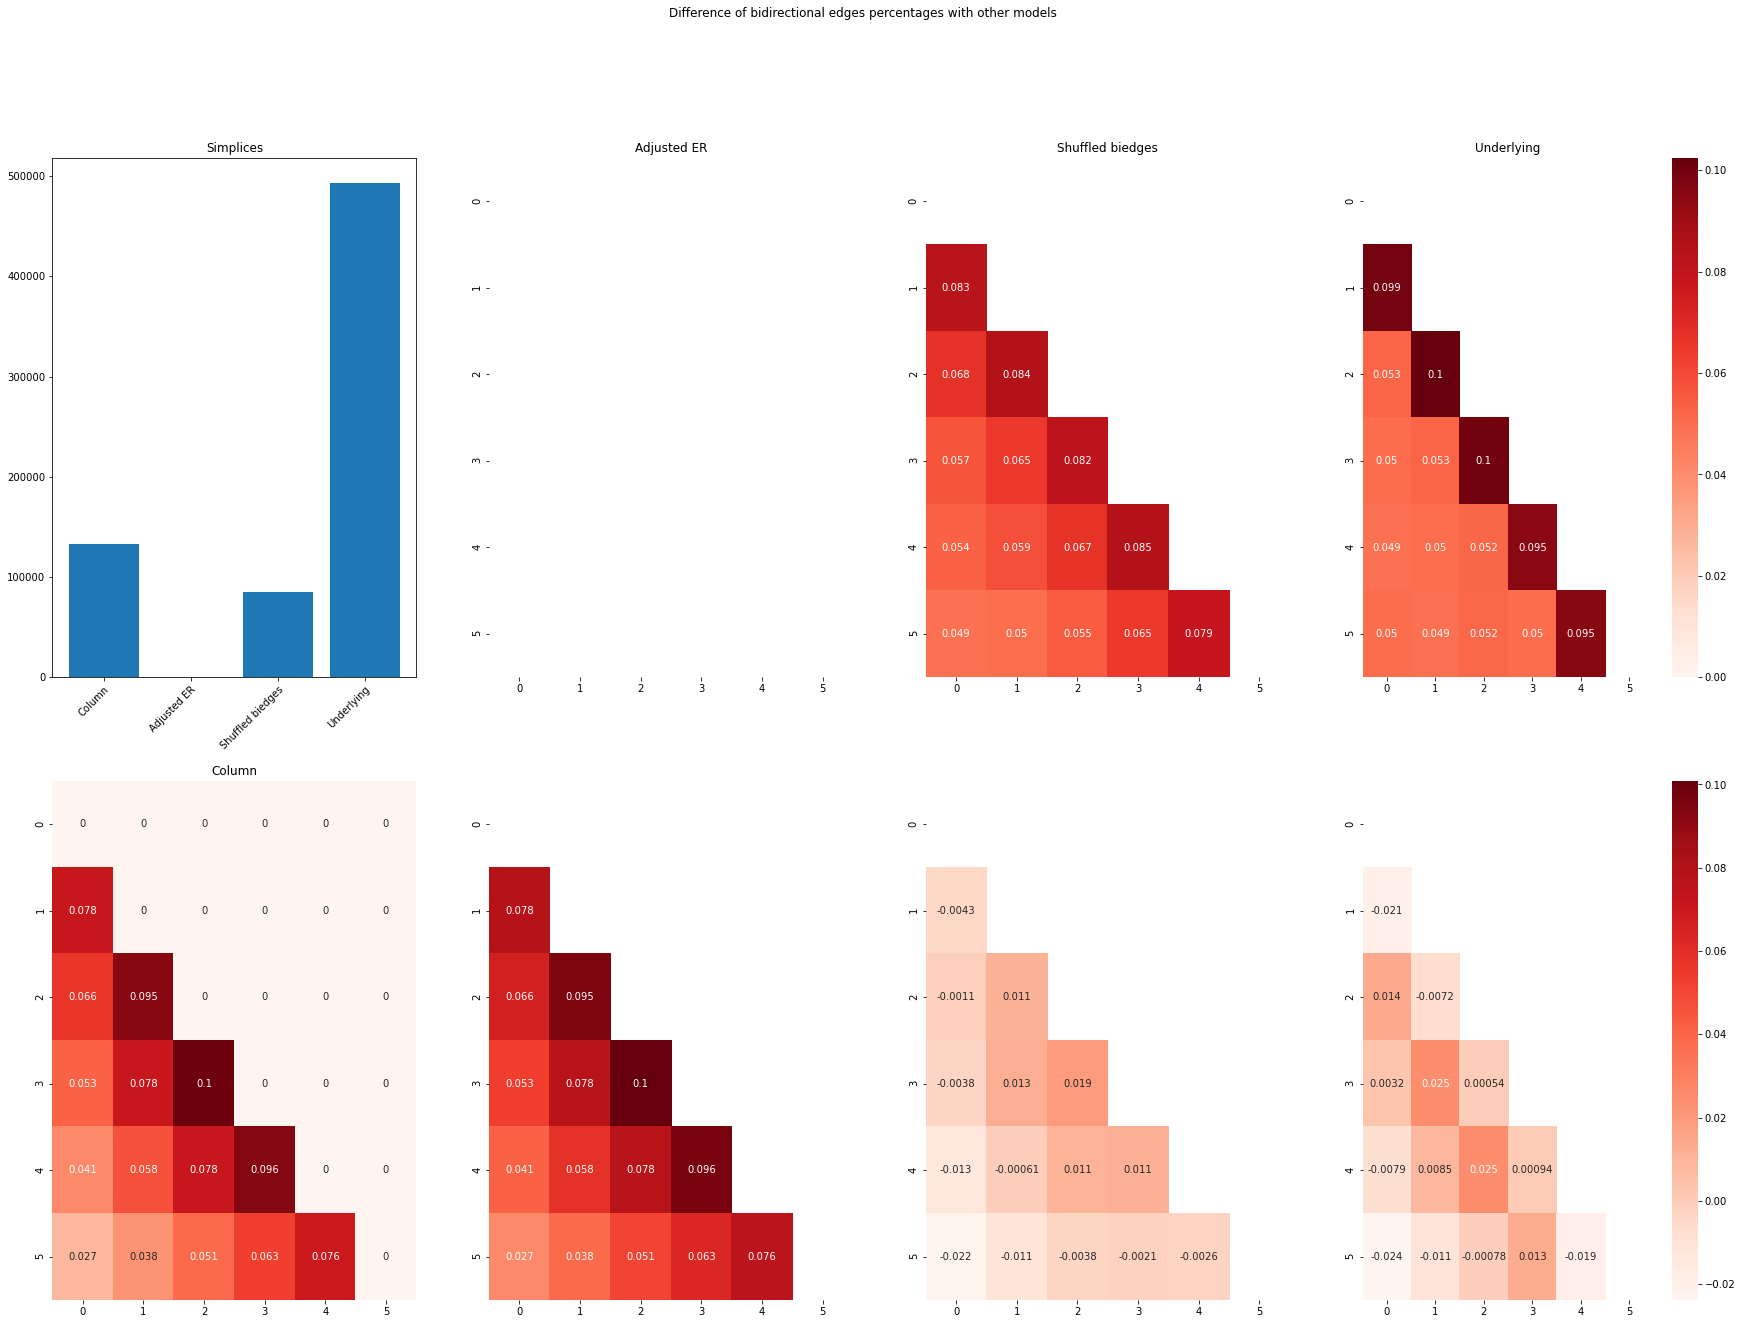

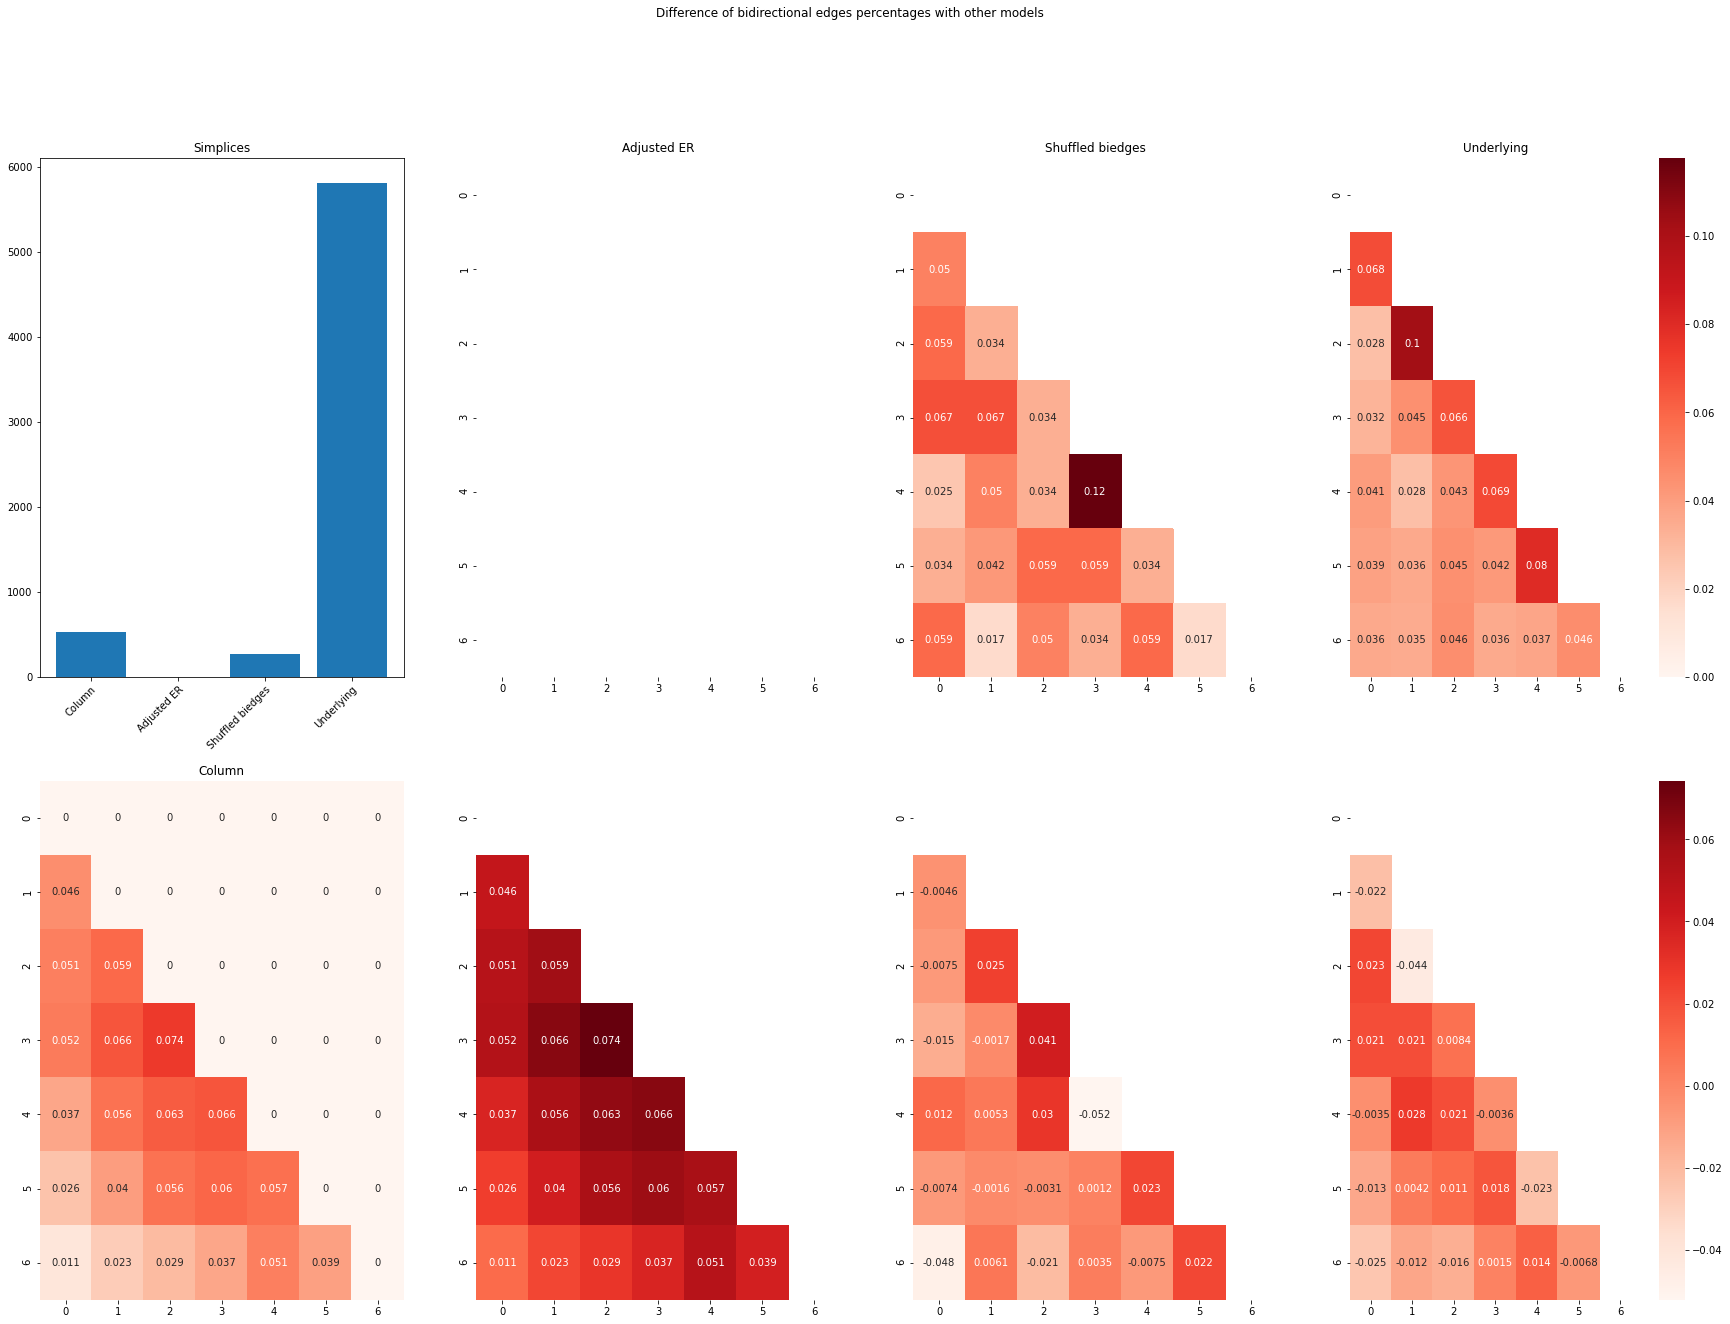

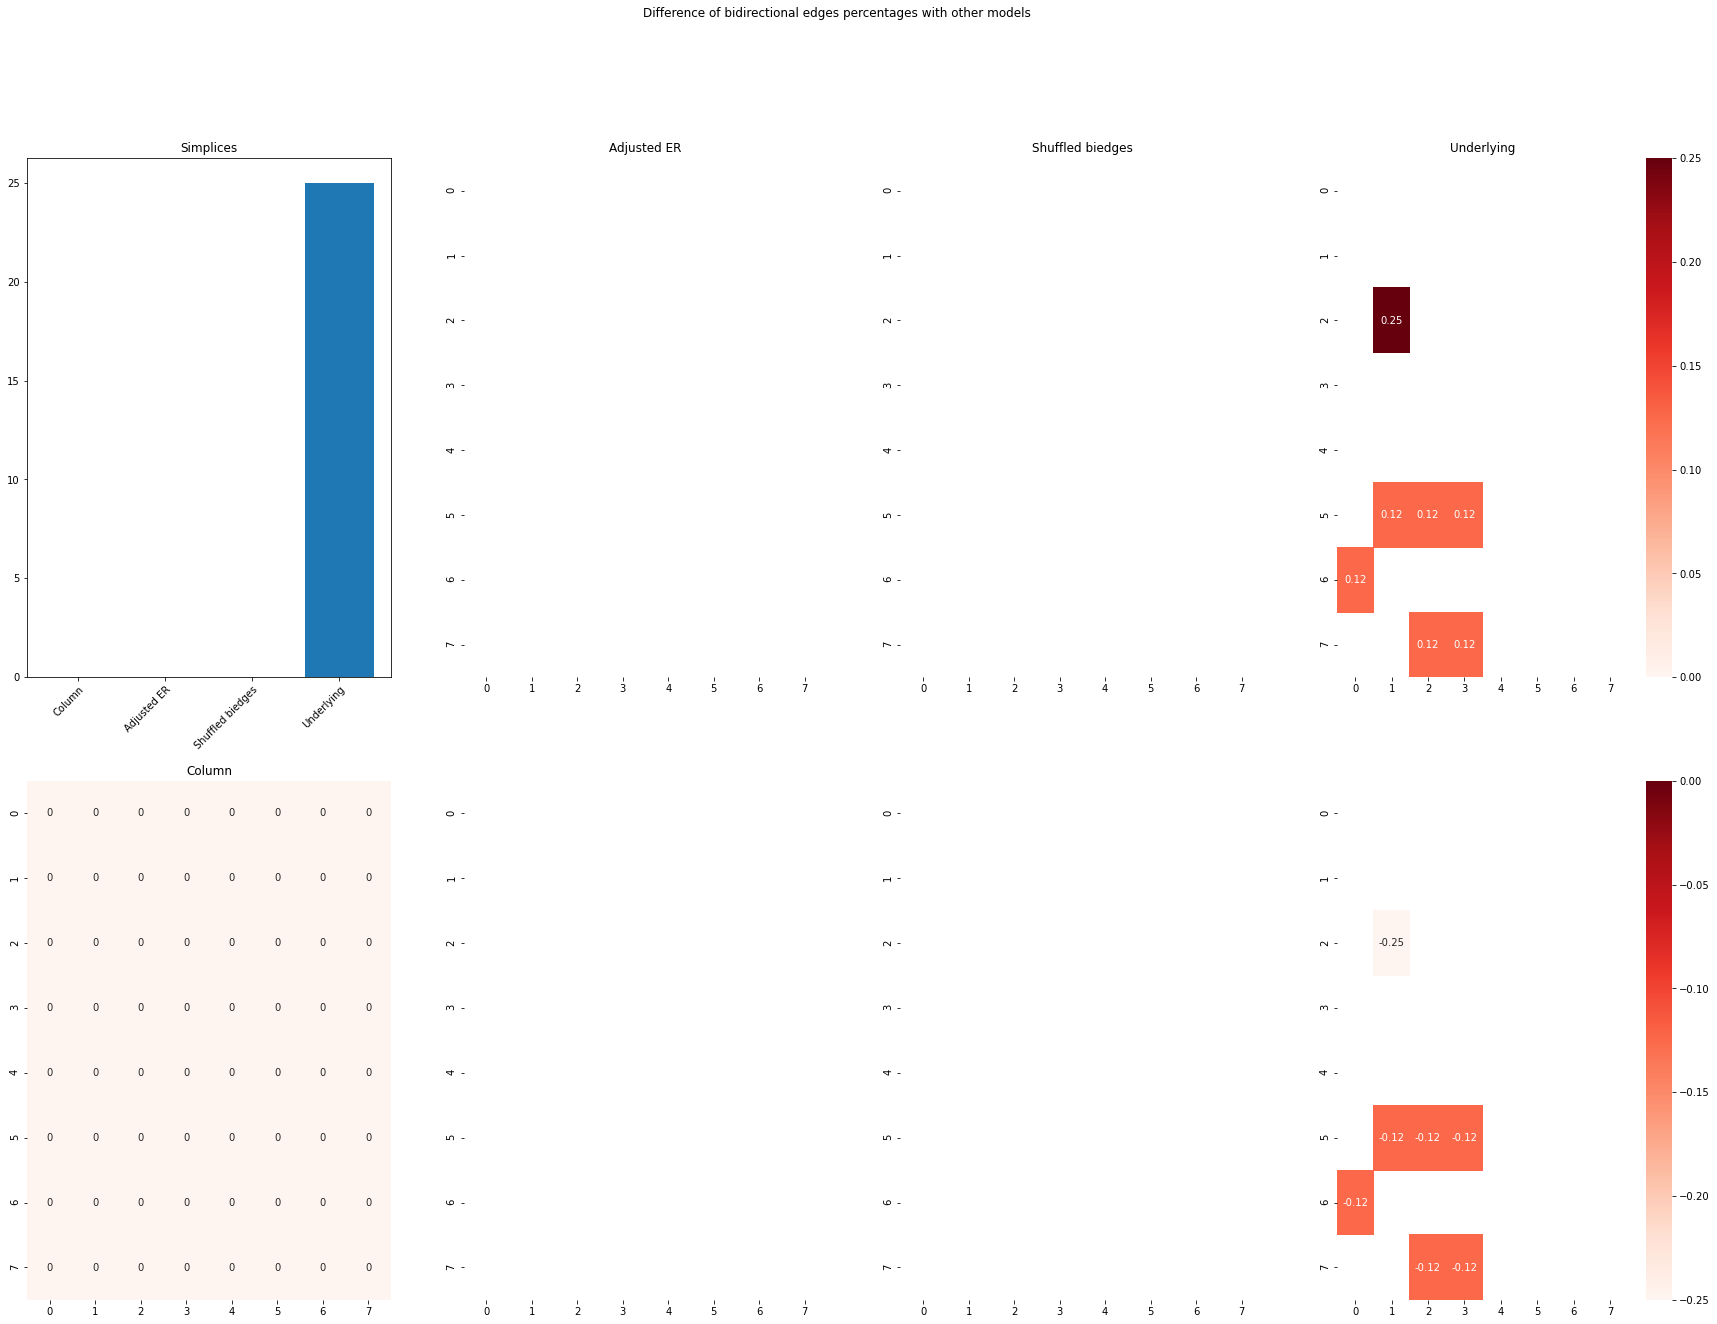

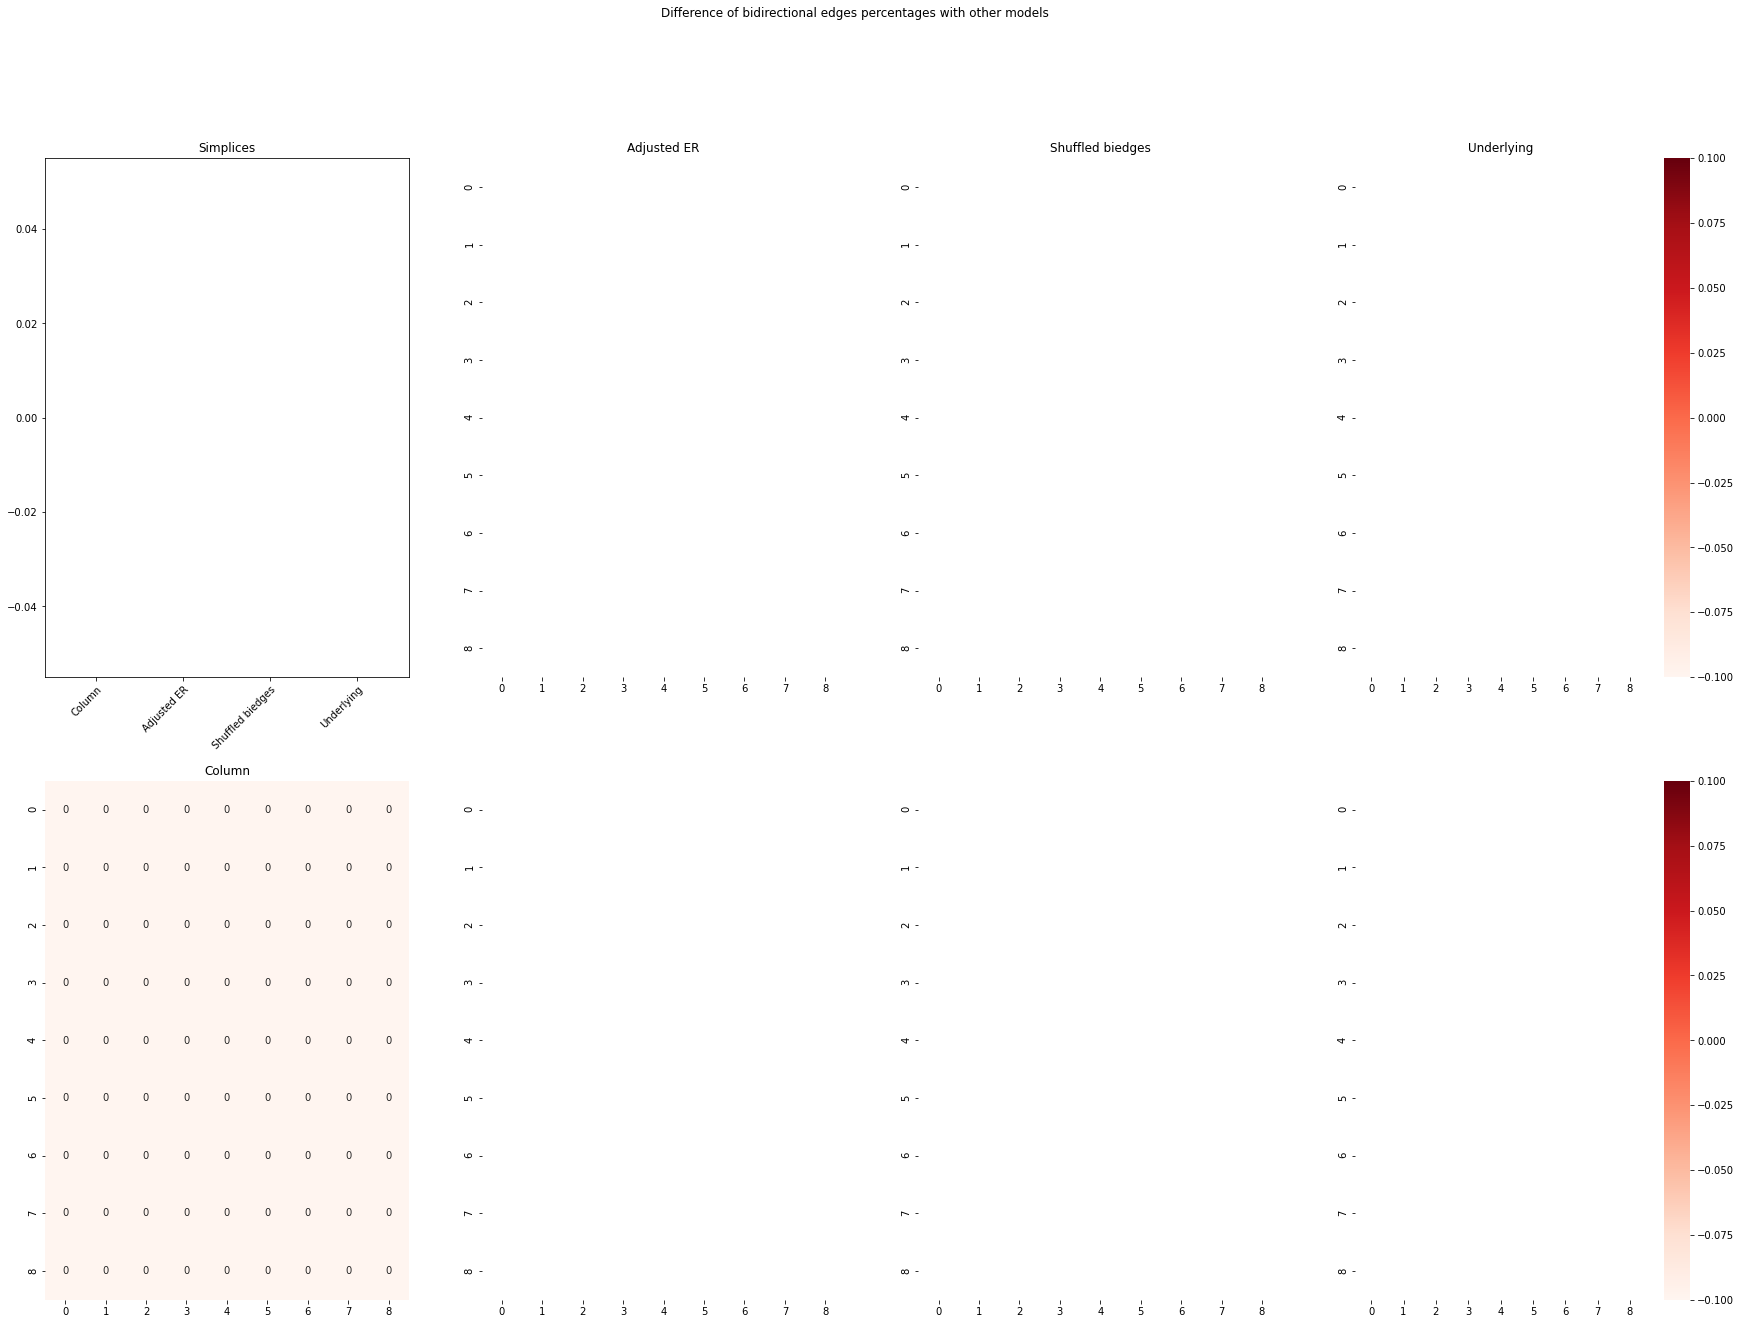

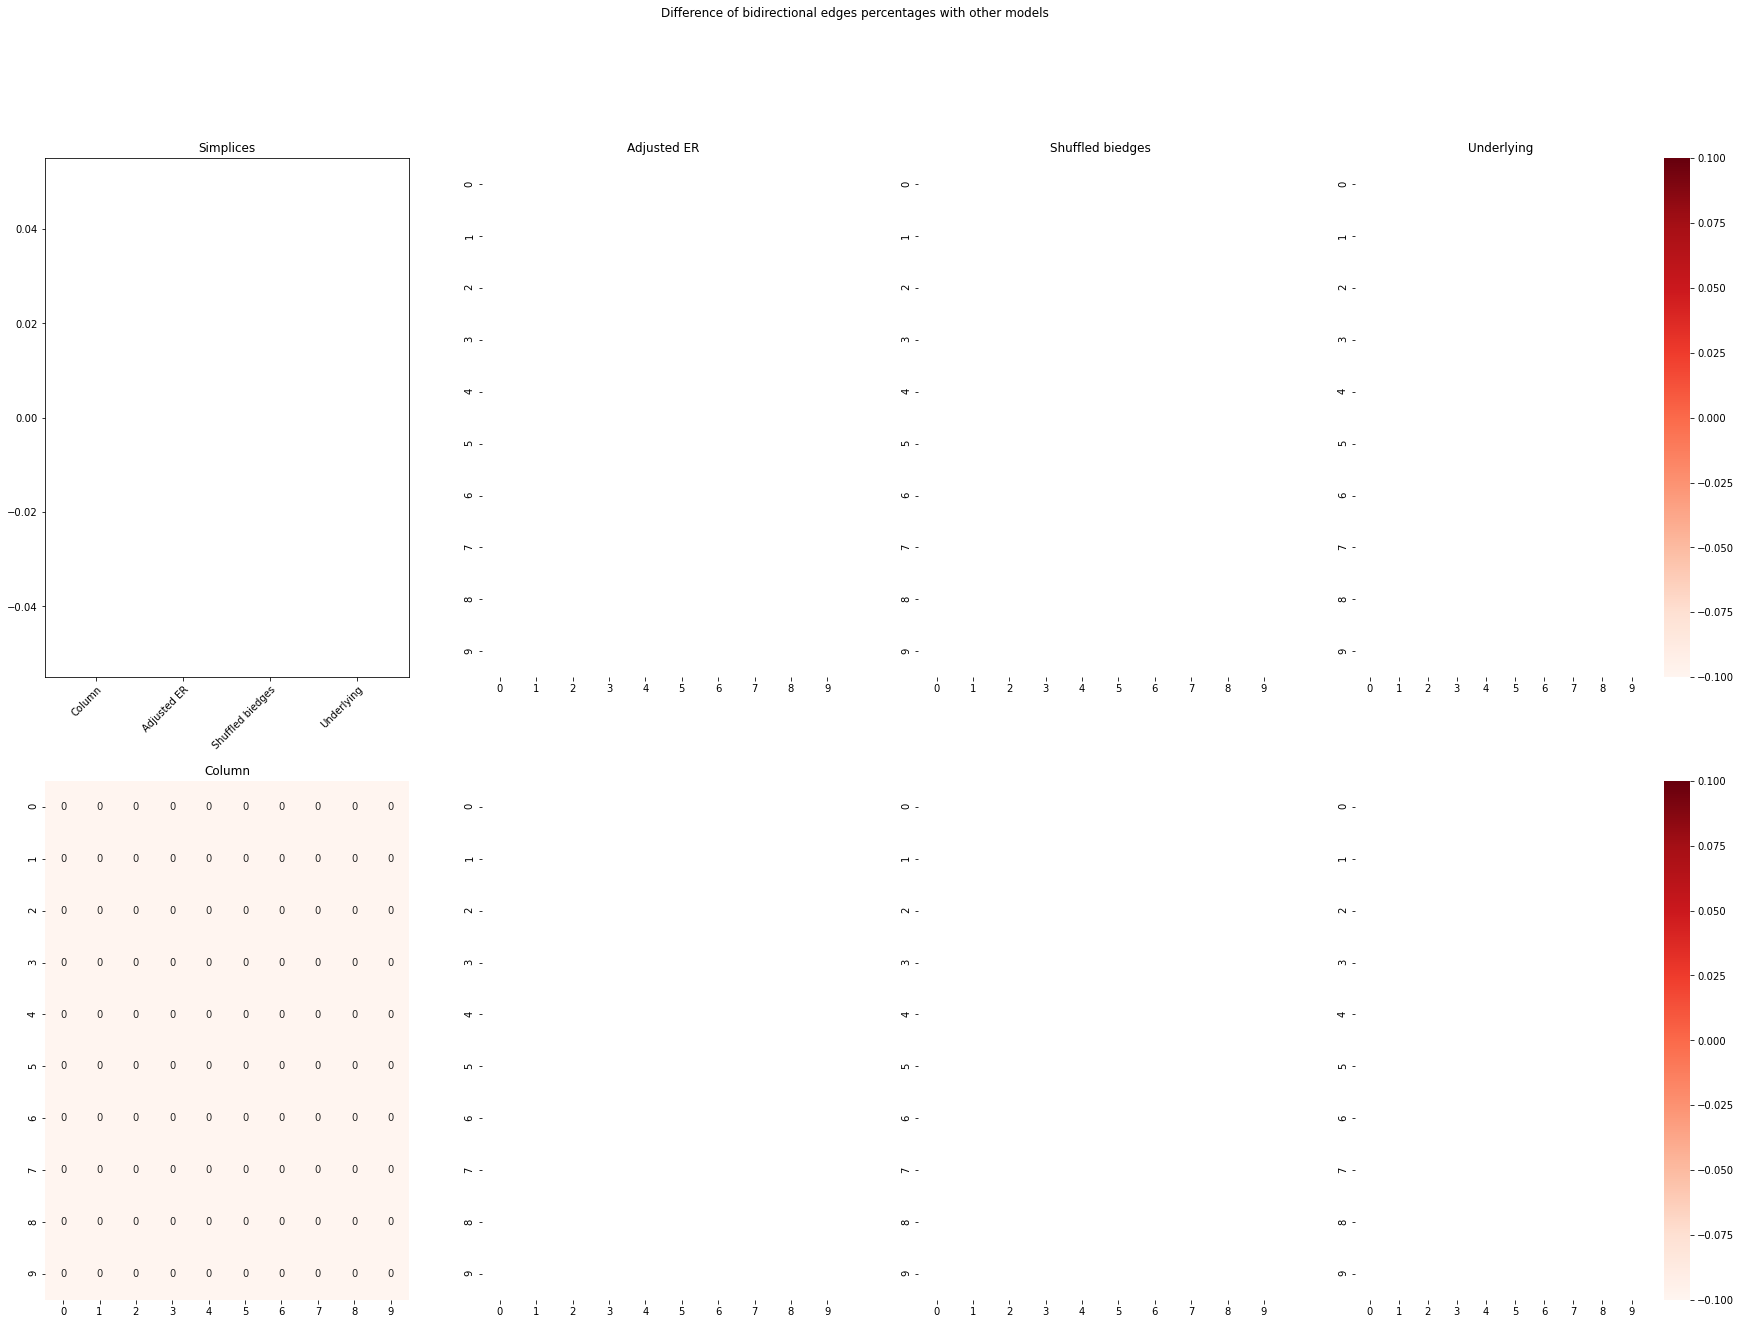

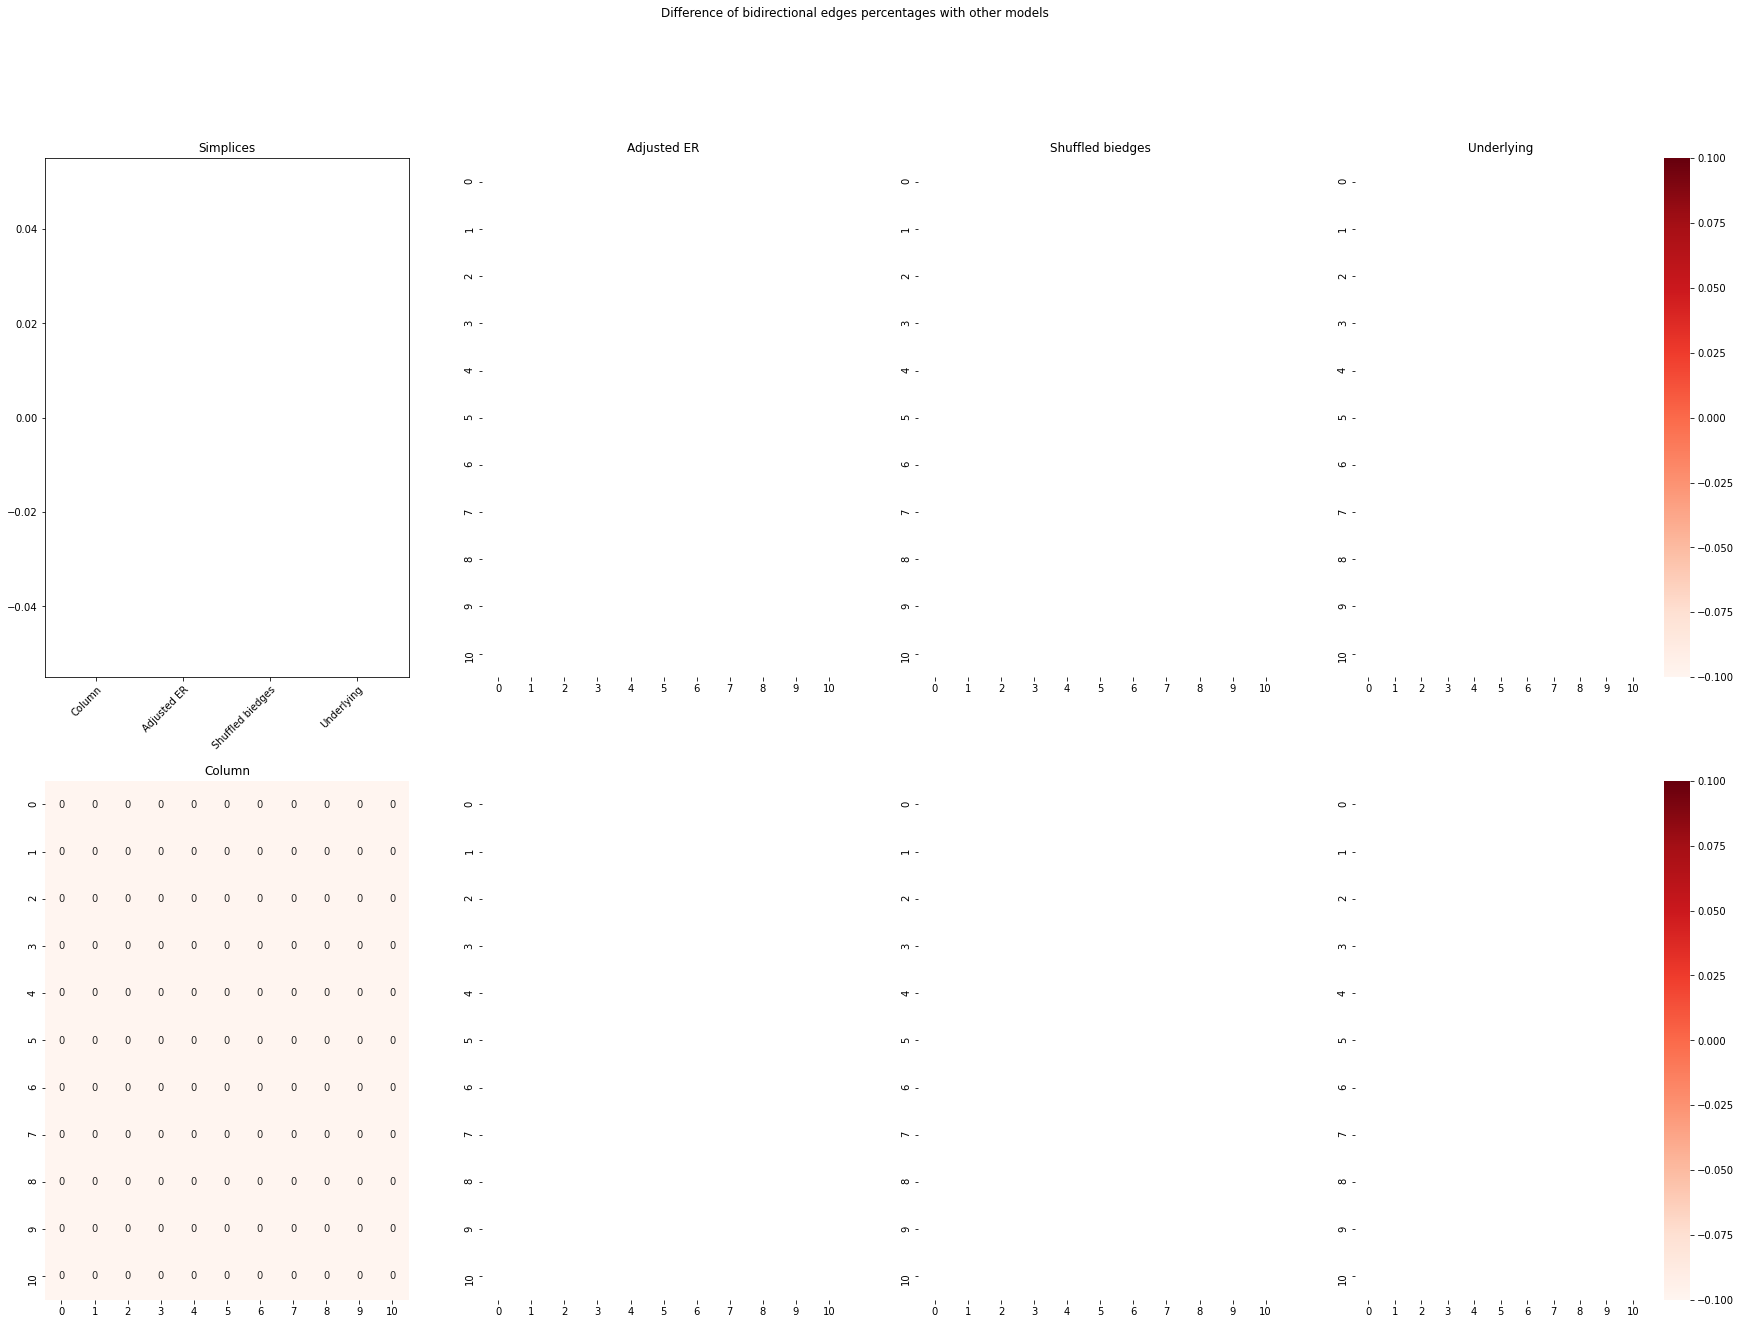

In [49]:
compare_graphs_diff_percent([a,b0,c0,d0], 1, "difference_percent")